untuk kecil under 100MB

sedang 300-700 MB

----------------------

Besar 800MB - 2 GB

------------------

Sangat Besar > 2 GB

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path) #kecil

Path to dataset files: /kaggle/input/netflix-shows


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/movies-on-netflix-prime-video-hulu-and-disney")

print("Path to dataset files:", path) #kecil

100%|██████████| 166k/166k [00:00<00:00, 31.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney/versions/5


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("victorsoeiro/netflix-tv-shows-and-movies")

print("Path to dataset files:", path) #kecil

100%|██████████| 2.25M/2.25M [00:00<00:00, 49.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/victorsoeiro/netflix-tv-shows-and-movies/versions/2


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahulvyasm/netflix-movies-and-tv-shows")

print("Path to dataset files:", path) #kecil

100%|██████████| 1.35M/1.35M [00:00<00:00, 99.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rahulvyasm/netflix-movies-and-tv-shows/versions/1


In [ ]:
import kagglehub

# Download latest version
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/amazon-india-products-2023-1-5m-products")

print("Path to dataset files:", path) #sedang

Path to dataset files: /kaggle/input/amazon-india-products-2023-1-5m-products


In [ ]:
import kagglehub

# Download latest version
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/amazon-brazil-products-2023-1-3m-products")

print("Path to dataset files:", path) #sedang

Path to dataset files: /kaggle/input/amazon-brazil-products-2023-1-3m-products


In [ ]:
import kagglehub

# Download latest version
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jillanisofttech/amazon-product-reviews")

print("Path to dataset files:", path) #sedang

Path to dataset files: /kaggle/input/amazon-product-reviews


In [ ]:
import kagglehub

# Download latest version
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/amazon-canada-products-2023-2-1m-products")

print("Path to dataset files:", path) #sedang

Path to dataset files: /kaggle/input/amazon-canada-products-2023-2-1m-products


In [ ]:
import pandas as pd

file_path = '/kaggle/input/netflix-shows/netflix_titles.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")

    print("\nLima baris pertama dataset:")
    print(df.head())

    print("\nInformasi dataset:")
    df.info()

    print("\nStatistik deskriptif dataset (untuk kolom numerik):")
    print(df.describe())

    print("\nStatistik deskriptif dataset (untuk kolom objek/kategorikal):")
    print(df.describe(include='object'))

    print("\nJumlah nilai unik di setiap kolom:")
    for col in df.columns:
        print(f"- {col}: {df[col].nunique()} nilai unik")

    print("\nContoh beberapa nilai unik untuk setiap kolom:")
    for col in df.columns:
        unique_values = df[col].unique()
        display_limit = 10
        if pd.api.types.is_numeric_dtype(df[col].dtype) and df[col].nunique() > 20: # Untuk kolom numerik dengan banyak nilai unik, jangan tampilkan semua
             print(f"- {col} (numerik dengan >20 nilai unik): Min={df[col].min()}, Max={df[col].max()}, {df[col].nunique()} nilai unik")
        elif len(unique_values) > display_limit:
            print(f"- {col} (contoh): {unique_values[:display_limit]} ... (total {len(unique_values)} unik)")
        else:
            print(f"- {col}: {unique_values}")

except FileNotFoundError:
    print(f"File tidak ditemukan di path: {file_path}")
    print("Pastikan path file sudah benar dan file tersebut ada di environment Anda (misalnya, jika menggunakan Kaggle, pastikan dataset sudah ditambahkan ke kernel).")
except Exception as e:
    print(f"Terjadi error saat memuat dataset: {e}")

Dataset berhasil dimuat!

Lima baris pertama dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2

In [ ]:
import pandas as pd
import numpy as np

# Load dataset (jika belum ada di variabel df)
# file_path = '/kaggle/input/netflix-shows/netflix_titles.csv'
# df = pd.read_csv(file_path)

# Salin dataframe agar data asli tidak berubah
df_processed = df.copy()

# 1. Mengisi missing values pada kolom 'rating', 'country', 'director', 'cast'
df_processed['rating'] = df_processed['rating'].fillna(df_processed['rating'].mode()[0])
df_processed['country'] = df_processed['country'].fillna('Unknown')
df_processed['director'] = df_processed['director'].fillna('Unknown')
df_processed['cast'] = df_processed['cast'].fillna('Unknown') # Bisa juga di-drop nanti jika tidak digunakan

# 2. Mengisi missing values pada 'date_added' dan konversi
df_processed['date_added'] = df_processed['date_added'].fillna(df_processed['date_added'].mode()[0])
df_processed['date_added'] = pd.to_datetime(df_processed['date_added'].str.strip(), format='%B %d, %Y')
df_processed['year_added'] = df_processed['date_added'].dt.year
df_processed['month_added'] = df_processed['date_added'].dt.month

# 3. Memproses kolom 'duration'
# Isi 3 NaN di 'duration' dengan string kosong agar split tidak error, nanti akan jadi NaN numerik
df_processed['duration'] = df_processed['duration'].fillna('')

df_processed['duration_minutes'] = np.nan
df_processed['num_seasons'] = np.nan

for index, row in df_processed.iterrows():
    duration_val = str(row['duration']) # Pastikan string
    if 'min' in duration_val:
        try:
            df_processed.loc[index, 'duration_minutes'] = int(duration_val.replace(' min', ''))
        except ValueError:
            df_processed.loc[index, 'duration_minutes'] = np.nan # Jika ada format aneh
    elif 'Season' in duration_val or 'Seasons' in duration_val:
        try:
            df_processed.loc[index, 'num_seasons'] = int(duration_val.replace(' Seasons', '').replace(' Season', ''))
        except ValueError:
            df_processed.loc[index, 'num_seasons'] = np.nan # Jika ada format aneh

# Mengisi NaN hasil parsing duration (jika ada atau dari TV Show/Movie) dengan 0 atau median/mean
# Untuk clustering, 0 mungkin lebih aman jika tidak ada informasi lebih lanjut
df_processed['duration_minutes'] = df_processed['duration_minutes'].fillna(0)
df_processed['num_seasons'] = df_processed['num_seasons'].fillna(0)

# 4. Memproses kolom 'listed_in' (ambil genre pertama)
df_processed['primary_genre'] = df_processed['listed_in'].apply(lambda x: x.split(',')[0].strip())

# Tampilkan hasil dan info untuk verifikasi
print("Lima baris pertama df_processed setelah langkah 1:")
print(df_processed[['title', 'duration', 'duration_minutes', 'num_seasons', 'rating', 'year_added', 'month_added', 'primary_genre', 'country', 'director']].head())
print("\nInformasi df_processed setelah langkah 1:")
df_processed.info()
print("\nJumlah missing values setelah langkah 1:")
print(df_processed.isnull().sum())
print("\nContoh nilai unik untuk kolom baru:")
print(f"Primary Genre (contoh): {df_processed['primary_genre'].unique()[:10]}")
print(f"Duration Minutes (contoh): {df_processed[df_processed['duration_minutes'] > 0]['duration_minutes'].unique()[:10]}")
print(f"Num Seasons (contoh): {df_processed[df_processed['num_seasons'] > 0]['num_seasons'].unique()[:10]}")

Lima baris pertama df_processed setelah langkah 1:
                   title   duration  duration_minutes  num_seasons rating  \
0   Dick Johnson Is Dead     90 min              90.0          0.0  PG-13   
1          Blood & Water  2 Seasons               0.0          2.0  TV-MA   
2              Ganglands   1 Season               0.0          1.0  TV-MA   
3  Jailbirds New Orleans   1 Season               0.0          1.0  TV-MA   
4           Kota Factory  2 Seasons               0.0          2.0  TV-MA   

   year_added  month_added           primary_genre        country  \
0        2021            9           Documentaries  United States   
1        2021            9  International TV Shows   South Africa   
2        2021            9          Crime TV Shows        Unknown   
3        2021            9              Docuseries        Unknown   
4        2021            9  International TV Shows          India   

          director  
0  Kirsten Johnson  
1          Unknown  
2  Julie

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# df_processed adalah DataFrame dari langkah sebelumnya

# 1. Pilih fitur yang akan digunakan
features_for_clustering = [
    'type',             # Kategorikal
    'release_year',     # Numerik
    'rating',           # Kategorikal
    'year_added',       # Numerik
    'month_added',      # Numerik
    'duration_minutes', # Numerik
    'num_seasons',      # Numerik
    'primary_genre'     # Kategorikal
]

df_subset = df_processed[features_for_clustering].copy()

# Identifikasi kolom numerik dan kategorikal
numerical_features = ['release_year', 'year_added', 'month_added', 'duration_minutes', 'num_seasons']
categorical_features = ['type', 'rating', 'primary_genre']

# Membuat preprocessor pipeline
# Untuk fitur numerik: StandardScaler
# Untuk fitur kategorikal: OneHotEncoder (handle_unknown='ignore' untuk mengatasi nilai baru jika ada di data tes)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' # Jika ada kolom lain yang tidak disebut, biarkan saja (seharusnya tidak ada di df_subset)
)

# Terapkan preprocessor ke data
# Hasilnya akan berupa NumPy array, kita bisa ubah kembali ke DataFrame jika perlu untuk inspeksi
# Namun untuk clustering, NumPy array sudah cukup.
X_prepared = preprocessor.fit_transform(df_subset)

# Mendapatkan nama fitur setelah One-Hot Encoding (opsional, untuk inspeksi)
try:
    # Akses transformer OneHotEncoder
    onehot_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    # Gabungkan dengan nama fitur numerik
    feature_names_prepared = numerical_features + list(onehot_cols)
    # Buat DataFrame dari X_prepared untuk inspeksi (opsional)
    df_prepared = pd.DataFrame(X_prepared, columns=feature_names_prepared, index=df_subset.index)

    print("Lima baris pertama data yang sudah di-encode dan di-scale (df_prepared):")
    print(df_prepared.head())
    print(f"\nDimensi data yang sudah diproses (X_prepared): {X_prepared.shape}")
    print("Data siap untuk clustering! ✅")

except Exception as e:
    print(f"Error saat mengambil nama fitur atau membuat df_prepared: {e}")
    print("Namun, X_prepared (NumPy array) seharusnya sudah siap untuk clustering.")
    print(f"\nDimensi data yang sudah diproses (X_prepared): {X_prepared.shape}")
    print(X_prepared[:5]) # Tampilkan 5 baris pertama dari array NumPy


# Simpan X_prepared untuk langkah clustering
# Anda bisa langsung menggunakan variabel X_prepared di langkah berikutnya.
# Jika ingin melihat info df_prepared (jika berhasil dibuat)
if 'df_prepared' in locals():
    print("\nInformasi df_prepared:")
    df_prepared.info()

Lima baris pertama data yang sudah di-encode dan di-scale (df_prepared):
   release_year  year_added  month_added  duration_minutes  num_seasons  \
0      0.659930    1.351468     0.683617          0.401949    -0.450067   
1      0.773324    1.351468     0.683617         -1.344544     1.228416   
2      0.773324    1.351468     0.683617         -1.344544     0.389175   
3      0.773324    1.351468     0.683617         -1.344544     0.389175   
4      0.773324    1.351468     0.683617         -1.344544     1.228416   

   type_Movie  type_TV Show  rating_66 min  rating_74 min  rating_84 min  ...  \
0         1.0           0.0            0.0            0.0            0.0  ...   
1         0.0           1.0            0.0            0.0            0.0  ...   
2         0.0           1.0            0.0            0.0            0.0  ...   
3         0.0           1.0            0.0            0.0            0.0  ...   
4         0.0           1.0            0.0            0.0            0.

Menghitung inertia untuk berbagai nilai K (Elbow Method)...


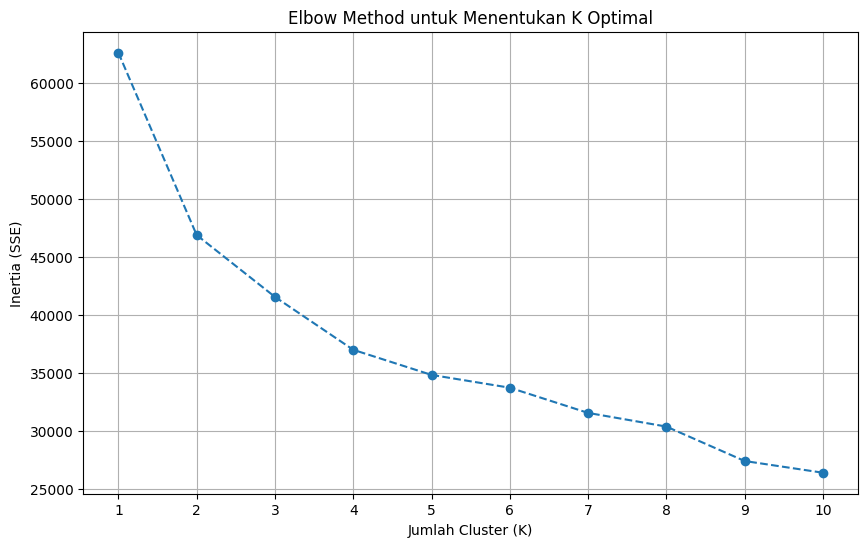


Dipilih K = 5 untuk clustering.
Jika plot elbow menyarankan K yang berbeda, silakan ubah N_CLUSTERS dan jalankan ulang bagian K-Means.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# X_prepared adalah data yang sudah siap dari langkah sebelumnya

# 1. Menentukan K optimal menggunakan Elbow Method
inertia = []
k_range = range(1, 11) # Coba K dari 1 sampai 10

print("Menghitung inertia untuk berbagai nilai K (Elbow Method)...")
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans_elbow.fit(X_prepared)
    inertia.append(kmeans_elbow.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------------
# Setelah melihat plot elbow, Anda perlu memutuskan nilai K.
# Misalkan dari plot, Anda melihat elbow di K=N_CLUSTERS.
# Jika tidak jelas, Anda bisa memilih K berdasarkan domain knowledge atau coba beberapa.
# Untuk contoh ini, kita akan pilih K=5. Anda HARUS menyesuaikan ini.
# ---------------------------------------------------------------------------
N_CLUSTERS = 5 # GANTI INI BERDASARKAN PLOT ELBOW ANDA ATAU PILIHAN ANDA
print(f"\nDipilih K = {N_CLUSTERS} untuk clustering.")
print("Jika plot elbow menyarankan K yang berbeda, silakan ubah N_CLUSTERS dan jalankan ulang bagian K-Means.")

# 2. Menjalankan K-Means dengan K yang dipilih
kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_prepared)

#

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # Meskipun plot sudah, kadang Kmeans butuh ini untuk environment tertentu

# X_prepared adalah data yang sudah siap dari langkah sebelumnya (hasil scaling dan encoding)
# df_subset adalah DataFrame sebelum di-encode/scale, berisi fitur-fitur
# 'type', 'release_year', 'rating', 'year_added', 'month_added',
# 'duration_minutes', 'num_seasons', 'primary_genre'
# Pastikan variabel X_prepared dan df_subset sudah ada di environment Anda.

# ---------------------------------------------------------------------------
# Tentukan N_CLUSTERS di sini berdasarkan plot elbow Anda.
# Kita akan gunakan K=5 sesuai diskusi.
# ---------------------------------------------------------------------------
N_CLUSTERS = 5
print(f"\nMenggunakan K = {N_CLUSTERS} untuk clustering.")

# 2. Menjalankan K-Means dengan K yang dipilih
# Pastikan X_prepared ada dan valid
if 'X_prepared' not in locals() or X_prepared is None:
    print("Variabel X_prepared tidak ditemukan atau kosong. Harap jalankan langkah preprocessing sebelumnya.")
else:
    kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_prepared)

    # 3. Menambahkan label cluster kembali ke DataFrame untuk interpretasi
    # Kita akan tambahkan ke df_subset
    if 'df_subset' not in locals() or df_subset is None:
        print("Variabel df_subset tidak ditemukan atau kosong. Harap pastikan sudah ada.")
    else:
        df_clustered = df_subset.copy()
        df_clustered['cluster'] = cluster_labels

        print(f"\nLima baris pertama data dengan label cluster (dari df_subset):")
        print(df_clustered.head())

        print(f"\nDistribusi item per cluster:")
        print(df_clustered['cluster'].value_counts().sort_index())

        # Untuk melihat karakteristik tiap cluster
        print("\nKarakteristik Rata-Rata Fitur Numerik per Cluster:")
        numerical_features_original = ['release_year', 'year_added', 'month_added', 'duration_minutes', 'num_seasons']
        # Pastikan semua kolom ini ada di df_clustered
        relevant_numerical_features = [col for col in numerical_features_original if col in df_clustered.columns]
        if relevant_numerical_features:
             print(df_clustered.groupby('cluster')[relevant_numerical_features].mean())
        else:
            print("Kolom fitur numerik original tidak ditemukan di df_clustered.")


        print("\nKarakteristik Modus Fitur Kategorikal per Cluster:")
        categorical_features_original = ['type', 'rating', 'primary_genre']
        # Pastikan semua kolom ini ada di df_clustered
        relevant_categorical_features = [col for col in categorical_features_original if col in df_clustered.columns]
        if relevant_categorical_features:
            for col in relevant_categorical_features:
                print(f"\nModus untuk '{col}' per cluster:")
                # Menggunakan iloc[0] untuk mengambil modus pertama jika ada lebih dari satu
                # dan memeriksa apakah mode() menghasilkan DataFrame kosong
                mode_results = df_clustered.groupby('cluster')[col].apply(lambda x: x.mode()[0] if not x.mode().empty else "N/A")
                print(mode_results)
        else:
            print("Kolom fitur kategorikal original tidak ditemukan di df_clustered.")


Menggunakan K = 5 untuk clustering.

Lima baris pertama data dengan label cluster (dari df_subset):
      type  release_year rating  year_added  month_added  duration_minutes  \
0    Movie          2020  PG-13        2021            9              90.0   
1  TV Show          2021  TV-MA        2021            9               0.0   
2  TV Show          2021  TV-MA        2021            9               0.0   
3  TV Show          2021  TV-MA        2021            9               0.0   
4  TV Show          2021  TV-MA        2021            9               0.0   

   num_seasons           primary_genre  cluster  
0          0.0           Documentaries        2  
1          2.0  International TV Shows        0  
2          1.0          Crime TV Shows        0  
3          1.0              Docuseries        0  
4          2.0  International TV Shows        0  

Distribusi item per cluster:
cluster
0    2660
1     464
2    1996
3    2218
4    1469
Name: count, dtype: int64

Karakteristik R


Kita memiliki 5 cluster, dan berikut adalah analisis untuk masing-masing:

Interpretasi Hasil Cluster (K=5)
Berikut adalah ringkasan dan perkiraan interpretasi untuk setiap cluster:

Cluster 0: "TV Show Internasional Kontemporer"

Jumlah Anggota: 2660
Tipe Dominan: TV Show
Rating Dominan: TV-MA
Genre Dominan: International TV Shows
Rata-rata Tahun Rilis: ~2017
Rata-rata Tahun Ditambahkan: ~2019 (bulan sekitar Juni-Juli)
Rata-rata Durasi: ~1.76 musim (durasi menit 0 karena ini TV Show)
Interpretasi: Cluster ini mayoritas berisi serial TV internasional yang relatif baru (rilis sekitar 2017, ditambah ke Netflix sekitar 2019), umumnya ditujukan untuk penonton dewasa (TV-MA), dan rata-rata memiliki 1-2 musim.
Cluster 1: "Film Aksi & Petualangan Klasik"

Jumlah Anggota: 464
Tipe Dominan: Movie
Rating Dominan: TV-14
Genre Dominan: Action & Adventure
Rata-rata Tahun Rilis: ~1985 (paling tua di antara semua cluster)
Rata-rata Tahun Ditambahkan: ~2019 (bulan sekitar Juli-Agustus)
Rata-rata Durasi: ~112 menit (durasi musim mendekati 0)
Interpretasi: Cluster ini tampaknya mengelompokkan film-film yang lebih tua, khususnya dari genre aksi & petualangan. Film-film ini umumnya memiliki rating TV-14 dan durasi sekitar 112 menit. Meskipun rilisan lama, mereka ditambahkan ke Netflix sekitar tahun 2019.
Cluster 2: "Film Drama Dewasa Terbaru (Ditambahkan Pertengahan Tahun)"

Jumlah Anggota: 1996
Tipe Dominan: Movie
Rating Dominan: TV-MA
Genre Dominan: Dramas
Rata-rata Tahun Rilis: ~2016
Rata-rata Tahun Ditambahkan: ~2020 (paling baru ditambahkan, bulan sekitar Mei)
Rata-rata Durasi: ~102 menit
Interpretasi: Cluster ini berisi film-film drama untuk penonton dewasa (TV-MA) yang dirilis sekitar tahun 2016 dan baru ditambahkan ke Netflix sekitar tahun 2020, terutama pada pertengahan tahun (sekitar Mei). Durasi rata-ratanya sekitar 102 menit.
Cluster 3: "Film Drama Dewasa (Ditambahkan Akhir Tahun)"

Jumlah Anggota: 2218
Tipe Dominan: Movie
Rating Dominan: TV-MA
Genre Dominan: Dramas
Rata-rata Tahun Rilis: ~2015
Rata-rata Tahun Ditambahkan: ~2018 (bulan sekitar September-Oktober)
Rata-rata Durasi: ~97 menit
Interpretasi: Mirip dengan Cluster 2, ini juga film drama dewasa (TV-MA). Namun, film-film ini dirilis sedikit lebih awal (sekitar 2015) dan ditambahkan ke Netflix sekitar tahun 2018, khususnya pada akhir tahun (sekitar September-Oktober). Durasinya sedikit lebih pendek, sekitar 97 menit.
Cluster 4: "Film Drama Dewasa (Ditambahkan Awal Tahun)"

Jumlah Anggota: 1469
Tipe Dominan: Movie
Rating Dominan: TV-MA
Genre Dominan: Dramas
Rata-rata Tahun Rilis: ~2015
Rata-rata Tahun Ditambahkan: ~2018 (bulan sekitar Maret)
Rata-rata Durasi: ~95 menit
Interpretasi: Cluster ini juga didominasi oleh film drama dewasa (TV-MA) yang rilis sekitar tahun 2015 dan ditambahkan tahun 2018, mirip dengan Cluster 3. Perbedaan utamanya adalah waktu penambahan di Netflix yang cenderung di awal tahun (sekitar Maret) dan durasi rata-rata yang sedikit lebih pendek lagi (95 menit).
Observasi Umum:

Cluster 0 jelas memisahkan TV Show dari Movie.
Cluster 1 berhasil mengidentifikasi film-film yang jauh lebih tua.
Cluster 2, 3, dan 4 semuanya adalah film drama dewasa yang relatif baru, namun K-Means berhasil membedakannya kemungkinan berdasarkan kombinasi tahun rilis, tahun ditambahkan, dan bulan ditambahkan, serta sedikit variasi durasi. Ini menunjukkan bagaimana algoritma menemukan nuansa dalam data.

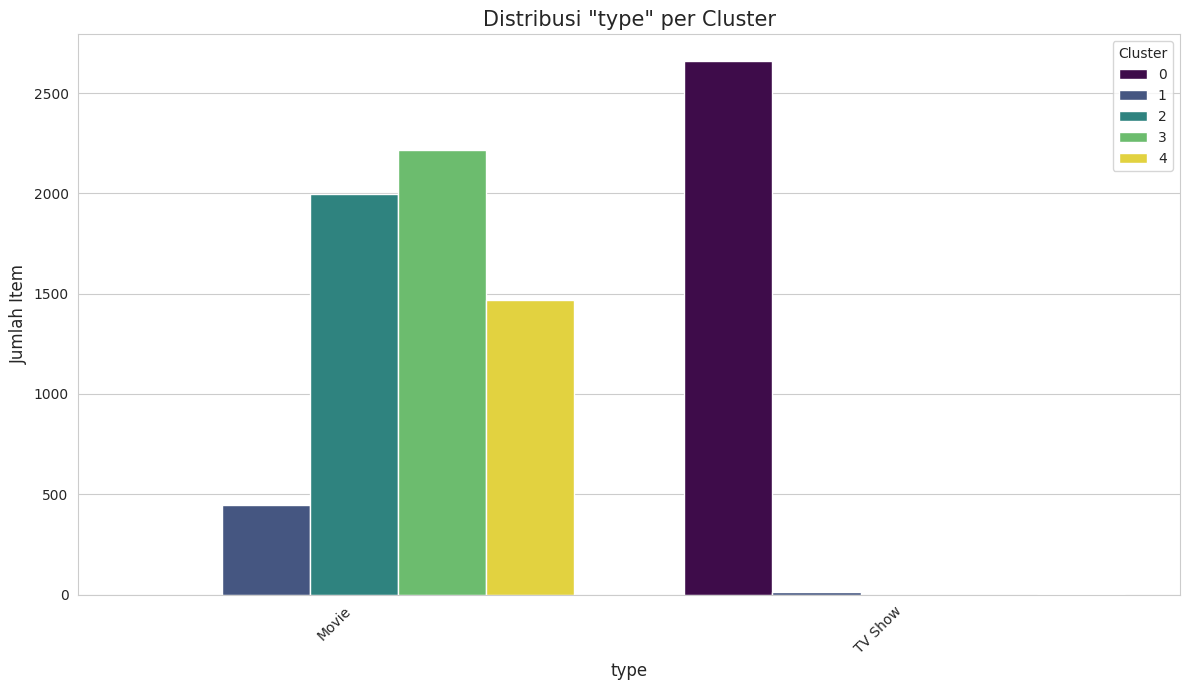

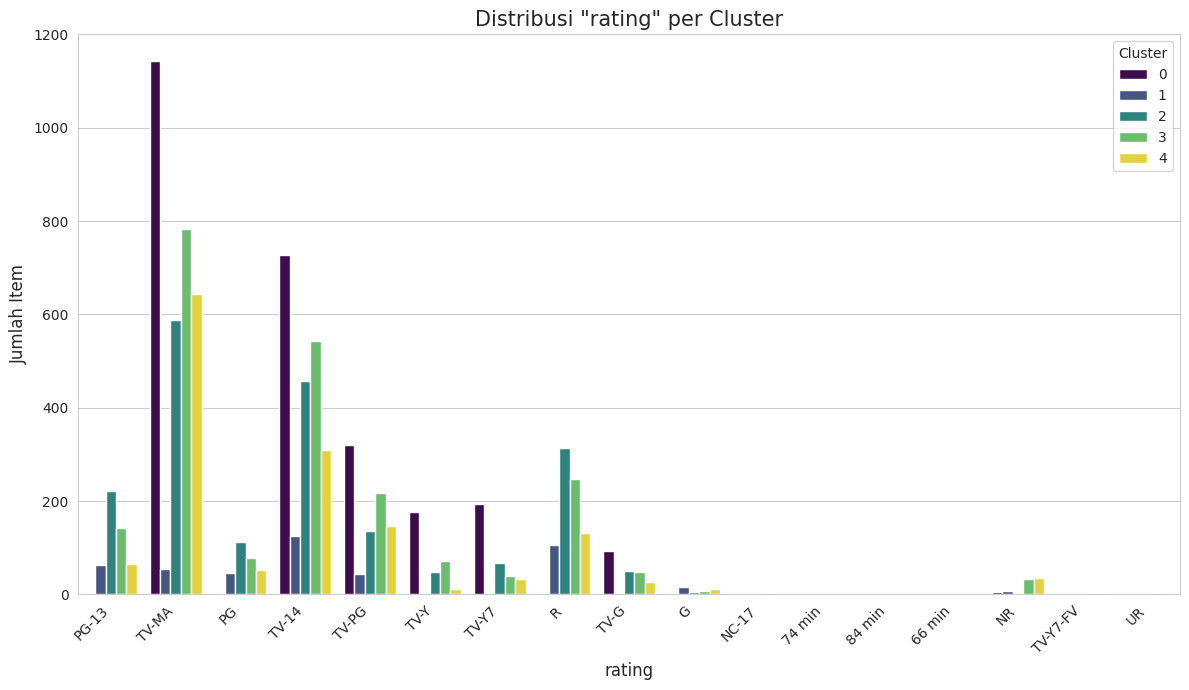

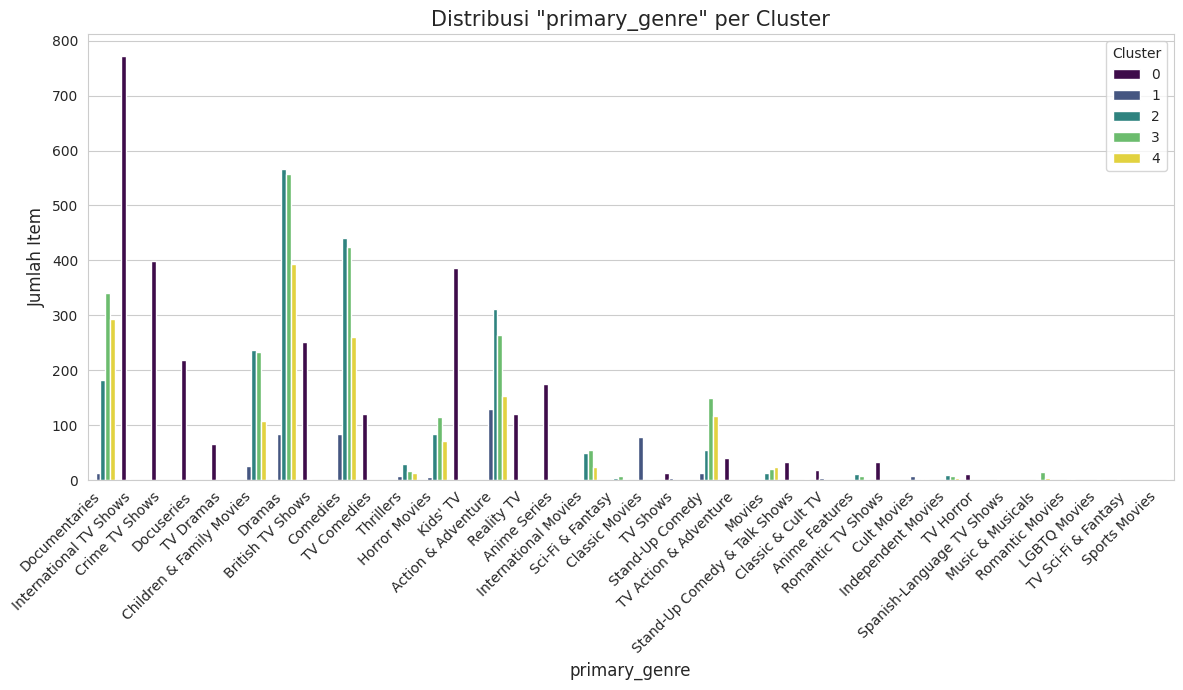

<ipython-input-16-235e26cf9549>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x='cluster', y=feature, palette='viridis')


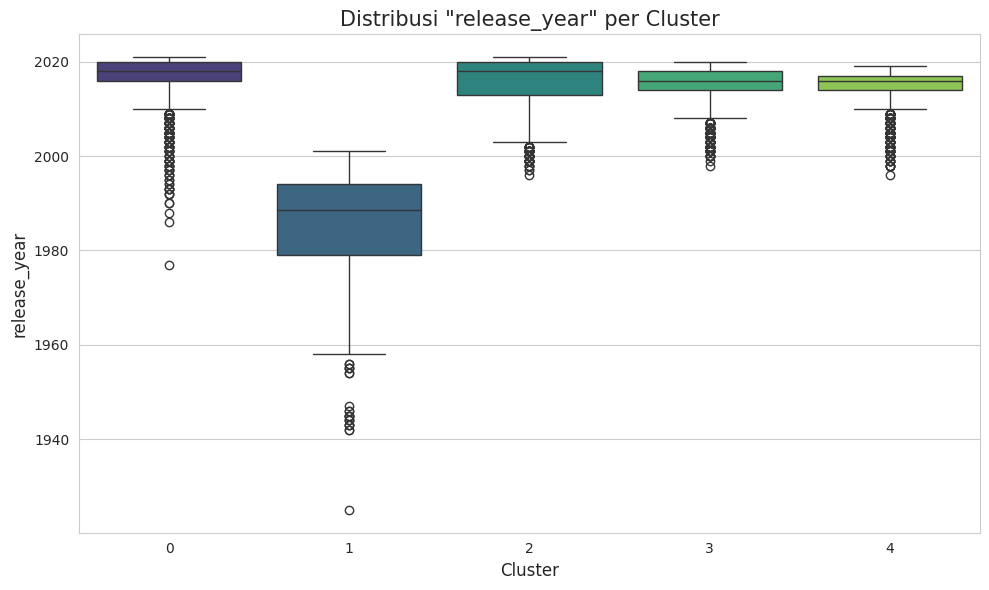

<ipython-input-16-235e26cf9549>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x='cluster', y=feature, palette='viridis')


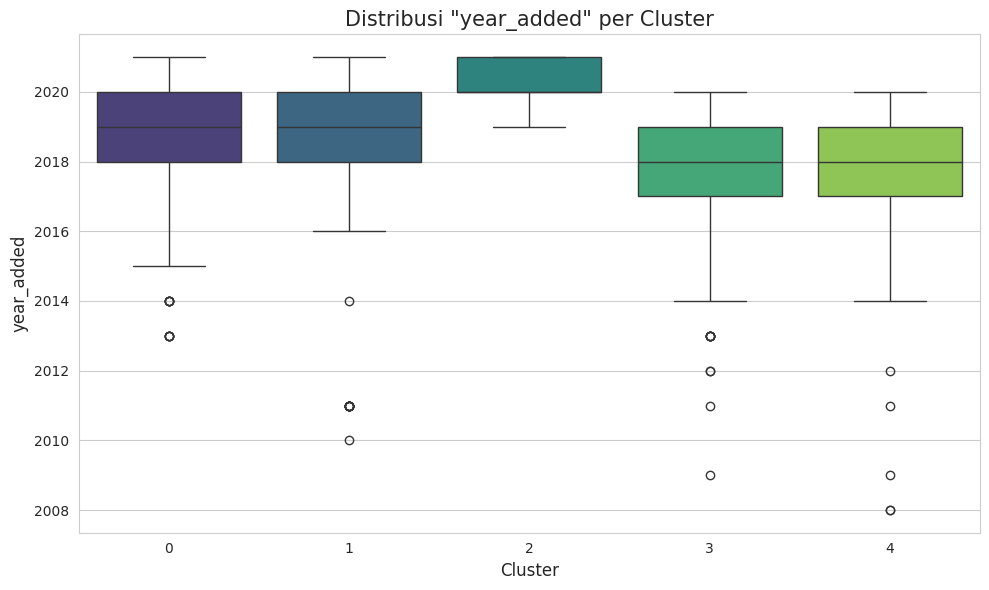

<ipython-input-16-235e26cf9549>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x='cluster', y=feature, palette='viridis')


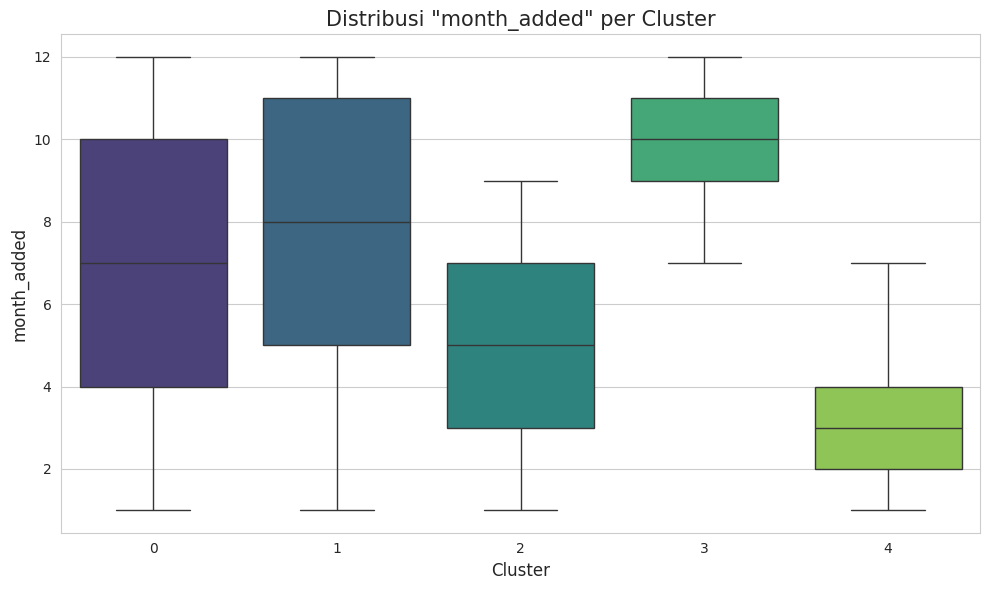

<ipython-input-16-235e26cf9549>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x='cluster', y=feature, palette='viridis')


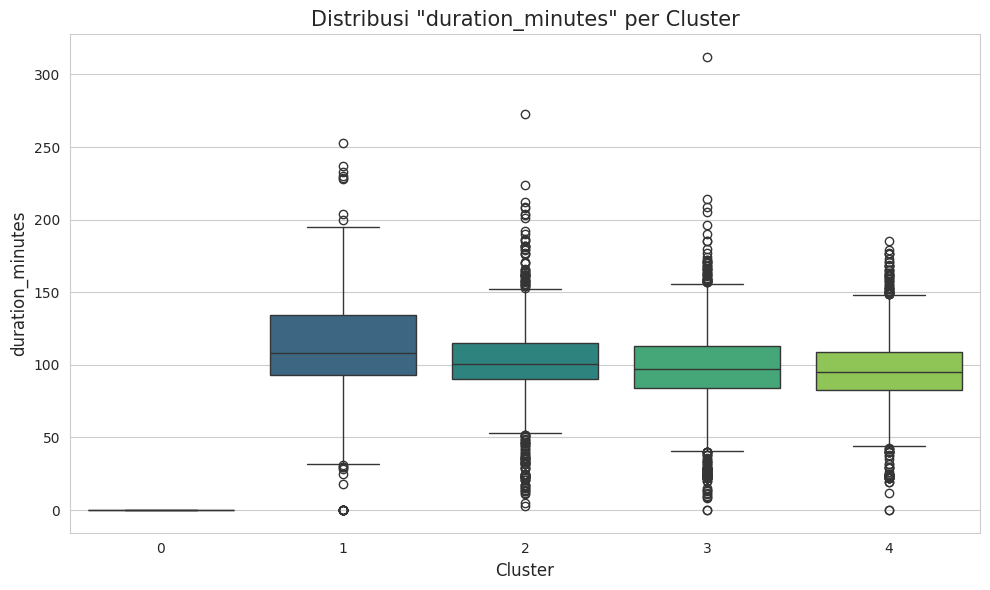

<ipython-input-16-235e26cf9549>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x='cluster', y=feature, palette='viridis')


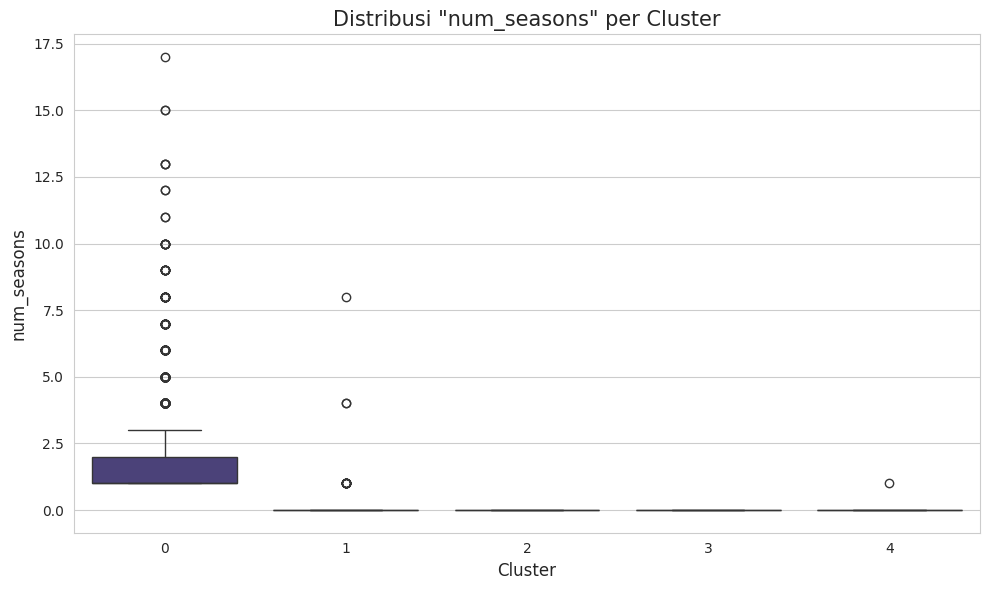

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan df_clustered sudah ada dari langkah sebelumnya
# df_clustered berisi fitur-fitur asli dan kolom 'cluster'

# Set style untuk plot yang lebih menarik
sns.set_style("whitegrid")

# 1. Visualisasi Distribusi Fitur Kategorikal per Cluster
categorical_features_original = ['type', 'rating', 'primary_genre']

for feature in categorical_features_original:
    plt.figure(figsize=(12, 7))
    # Membuat count plot, hue berdasarkan cluster
    # Kita perlu menghitung persentase atau jumlah untuk perbandingan yang adil jika ukuran cluster beda jauh
    # Cara sederhana: tampilkan count, tapi perhatikan skala.
    # Atau, kita bisa buat grouped bar chart dari proporsi.

    # Plotting counts per cluster
    sns.countplot(data=df_clustered, x=feature, hue='cluster', palette='viridis')
    plt.title(f'Distribusi "{feature}" per Cluster', fontsize=15)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Jumlah Item', fontsize=12)
    plt.xticks(rotation=45, ha="right") # Rotasi label jika terlalu panjang
    plt.legend(title='Cluster')
    plt.tight_layout() # Menyesuaikan layout agar tidak terpotong
    plt.show()

    # Alternatif: Proporsi (lebih baik jika ukuran cluster sangat bervariasi)
    # df_feature_cluster_prop = df_clustered.groupby('cluster')[feature].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    # plt.figure(figsize=(15, 8))
    # sns.barplot(x=feature, y='percentage', hue='cluster', data=df_feature_cluster_prop, palette='viridis')
    # plt.title(f'Proporsi "{feature}" per Cluster', fontsize=15)
    # plt.xlabel(feature, fontsize=12)
    # plt.ylabel('Persentase dalam Cluster (%)', fontsize=12)
    # plt.xticks(rotation=45, ha="right")
    # plt.legend(title='Cluster')
    # plt.tight_layout()
    # plt.show()


# 2. Visualisasi Distribusi Fitur Numerik per Cluster
numerical_features_original = ['release_year', 'year_added', 'month_added', 'duration_minutes', 'num_seasons']

for feature in numerical_features_original:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_clustered, x='cluster', y=feature, palette='viridis')
    plt.title(f'Distribusi "{feature}" per Cluster', fontsize=15)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import f_oneway, chi2_contingency
import pandas as pd

# Pastikan X_prepared (data yang sudah di-encode dan scale) dan
# df_clustered (data asli dengan kolom 'cluster') sudah ada.

# 1. Menghitung Metrik Validitas Internal Cluster
# a. Silhouette Score
# Membutuhkan X_prepared (data numerik yang digunakan untuk clustering) dan cluster_labels
# cluster_labels adalah hasil dari kmeans.fit_predict(X_prepared)

if 'X_prepared' in locals() and 'cluster_labels' in locals():
    silhouette_avg = silhouette_score(X_prepared, cluster_labels)
    print(f"Rata-rata Silhouette Score untuk {N_CLUSTERS} clusters: {silhouette_avg:.4f}")

    # b. Davies-Bouldin Index (opsional, nilai lebih rendah lebih baik)
    db_score = davies_bouldin_score(X_prepared, cluster_labels)
    print(f"Davies-Bouldin Index: {db_score:.4f}")

    # c. Calinski-Harabasz Index (opsional, nilai lebih tinggi lebih baik)
    ch_score = calinski_harabasz_score(X_prepared, cluster_labels)
    print(f"Calinski-Harabasz Index: {ch_score:.4f}")
else:
    print("Variabel X_prepared atau cluster_labels tidak ditemukan. Tidak dapat menghitung metrik validitas.")

print("\n--- Analisis Perbedaan Fitur Antar Cluster ---")

# 2. ANOVA untuk Fitur Numerik
numerical_features_original = ['release_year', 'year_added', 'month_added', 'duration_minutes', 'num_seasons']
print("\n Hasil ANOVA untuk Fitur Numerik:")
if 'df_clustered' in locals():
    for feature in numerical_features_original:
        if feature in df_clustered.columns:
            # Membuat list data per cluster untuk fitur ini
            grouped_data = [df_clustered[feature][df_clustered['cluster'] == i] for i in range(N_CLUSTERS)]
            # Menghilangkan cluster kosong jika ada (seharusnya tidak untuk K-Means standar)
            grouped_data_cleaned = [group for group in grouped_data if not group.empty]

            if len(grouped_data_cleaned) > 1: # ANOVA butuh setidaknya 2 grup
                f_statistic, p_value = f_oneway(*grouped_data_cleaned)
                print(f"  Fitur: {feature}")
                print(f"    F-statistic: {f_statistic:.4f}")
                print(f"    P-value: {p_value:.4g}") # Menggunakan .4g untuk format p-value yang lebih baik
                if p_value < 0.05:
                    print("    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).")
                else:
                    print("    Kesimpulan: Tidak ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p >= 0.05).")
            else:
                print(f"  Fitur: {feature} - Tidak cukup grup data untuk ANOVA (setelah membersihkan grup kosong).")
        else:
            print(f"  Fitur: {feature} tidak ditemukan di df_clustered.")
else:
    print("Variabel df_clustered tidak ditemukan. Tidak dapat melakukan ANOVA.")


# 3. Chi-square Test untuk Fitur Kategorikal
categorical_features_original = ['type', 'rating', 'primary_genre']
print("\n Hasil Chi-square Test untuk Fitur Kategorikal:")
if 'df_clustered' in locals():
    for feature in categorical_features_original:
        if feature in df_clustered.columns:
            contingency_table = pd.crosstab(df_clustered[feature], df_clustered['cluster'])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            print(f"  Fitur: {feature}")
            print(f"    Chi-square statistic: {chi2:.4f}")
            print(f"    P-value: {p_value:.4g}")
            print(f"    Degrees of Freedom: {dof}")
            if p_value < 0.05:
                print("    Kesimpulan: Ada hubungan yang signifikan secara statistik antara fitur dan cluster (p < 0.05).")
            else:
                print("    Kesimpulan: Tidak ada hubungan yang signifikan secara statistik antara fitur dan cluster (p >= 0.05).")
        else:
            print(f"  Fitur: {feature} tidak ditemukan di df_clustered.")
else:
    print("Variabel df_clustered tidak ditemukan. Tidak dapat melakukan Chi-square test.")

Rata-rata Silhouette Score untuk 5 clusters: 0.1637
Davies-Bouldin Index: 1.6142
Calinski-Harabasz Index: 1754.2050

--- Analisis Perbedaan Fitur Antar Cluster ---

 Hasil ANOVA untuk Fitur Numerik:
  Fitur: release_year
    F-statistic: 3712.4964
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: year_added
    F-statistic: 1060.5174
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: month_added
    F-statistic: 1780.1142
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: duration_minutes
    F-statistic: 8140.7852
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: num_seasons
    F-statistic: 1874.6558
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluste

Output tes signifikansi Anda menunjukkan hasil yang baik dan mendukung interpretasi cluster yang telah kita lakukan! Berikut adalah poin-poin utamanya:

Analisis Hasil Tes Signifikansi
Metrik Validitas Internal Cluster
Rata-rata Silhouette Score: 0.1637
Skor ini positif, yang menandakan bahwa secara rata-rata, objek lebih mirip dengan clusternya sendiri daripada dengan cluster tetangga. Meskipun tidak sangat tinggi (nilai mendekati 1 adalah ideal), skor ini masih menunjukkan adanya struktur pemisahan antar cluster. Untuk dataset nyata dengan banyak fitur, skor di kisaran ini bisa diterima, terutama jika interpretasi kualitatifnya masuk akal.
Davies-Bouldin Index: 1.6142
Nilai yang lebih rendah lebih baik untuk Davies-Bouldin. Tidak ada skala absolut, tetapi nilai ini akan lebih bermakna jika dibandingkan dengan hasil clustering menggunakan jumlah K yang berbeda atau metode lain.
Calinski-Harabasz Index: 1754.2050
Nilai yang lebih tinggi lebih baik untuk Calinski-Harabasz. Skor ini cukup tinggi, menunjukkan rasio yang baik antara dispersi antar-cluster dan dispersi intra-cluster, yang berarti cluster cenderung padat dan terpisah dengan baik.
Secara keseluruhan, metrik validitas internal ini memberikan dukungan kuantitatif bahwa cluster yang terbentuk memiliki struktur yang cukup baik.

Analisis Perbedaan Fitur Antar Cluster (ANOVA & Chi-square)
Hasil ANOVA untuk Fitur Numerik:

Untuk SEMUA fitur numerik yang diuji (release_year, year_added, month_added, duration_minutes, num_seasons), P-value adalah 0 (atau sangat kecil sehingga ditampilkan sebagai 0).
Kesimpulan: Ini berarti ada perbedaan rata-rata yang sangat signifikan secara statistik untuk semua fitur numerik ini di antara kelima cluster. Ini sangat bagus karena mendukung bahwa cluster-cluster tersebut memang berbeda berdasarkan karakteristik numerik yang Anda gunakan. Ini sejalan dengan interpretasi kita sebelumnya (misalnya, Cluster 1 memiliki release_year yang signifikan lebih tua, Cluster 0 memiliki num_seasons yang signifikan lebih tinggi, dll.).
Hasil Chi-square Test untuk Fitur Kategorikal:

Untuk SEMUA fitur kategorikal yang diuji (type, rating, primary_genre), P-value sangat kecil (0 atau mendekati 0).
Kesimpulan: Ini berarti ada hubungan yang sangat signifikan secara statistik antara masing-masing fitur kategorikal ini dan keanggotaan cluster. Artinya, distribusi kategori dalam fitur-fitur ini (misalnya, distribusi tipe 'Movie' vs 'TV Show', atau distribusi berbagai jenis 'rating') secara signifikan berbeda antar cluster. Ini juga mendukung interpretasi kita bahwa setiap cluster memiliki profil kategorikal yang khas.
Kesimpulan dari Tes Signifikansi
Tes signifikansi ini memberikan bukti statistik yang kuat bahwa:

Cluster yang terbentuk memiliki struktur yang cukup baik dan terpisah (berdasarkan metrik validitas internal).
Cluster-cluster tersebut secara signifikan berbeda satu sama lain berdasarkan fitur-fitur numerik (rata-ratanya berbeda) dan fitur-fitur kategorikal (distribusinya berbeda) yang digunakan dalam analisis.
Hasil ini memperkuat kesimpulan kualitatif dan visual yang telah Anda buat mengenai karakteristik masing-masing cluster. Anda dapat menggunakan hasil ini sebagai dasar yang kuat dalam laporan atau presentasi Anda.

In [ ]:
import pandas as pd

file_path_new = '/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv'
print(f"Memuat dataset dari: {file_path_new}")

try:
    # Opsi 1: Mencoba dengan encoding 'latin1'
    df_new = pd.read_csv(file_path_new, encoding='latin1')
    # Jika opsi 1 gagal, coba opsi 2 atau 3 di bawah ini dengan mengomentari baris di atas
    # Opsi 2: Mencoba dengan encoding 'iso-8859-1' (seringkali sama dengan latin1)
    # df_new = pd.read_csv(file_path_new, encoding='iso-8859-1')
    # Opsi 3: Mencoba dengan encoding 'cp1252' (umum di Windows)
    # df_new = pd.read_csv(file_path_new, encoding='cp1252')

    print("Dataset baru berhasil dimuat! ✅")

    print("\nLima baris pertama dataset baru:")
    print(df_new.head())

    print("\nInformasi dataset baru:")
    df_new.info()

    print("\nStatistik deskriptif dataset baru (untuk kolom numerik):")
    print(df_new.describe())

    print("\nStatistik deskriptif dataset baru (untuk kolom objek/kategorikal):")
    print(df_new.describe(include='object'))

    print("\nJumlah nilai unik di setiap kolom dataset baru:")
    for col in df_new.columns:
        print(f"- {col}: {df_new[col].nunique()} nilai unik")

    print("\nContoh beberapa nilai unik untuk setiap kolom dataset baru:")
    for col in df_new.columns:
        unique_values = df_new[col].unique()
        display_limit = 10
        if pd.api.types.is_numeric_dtype(df_new[col].dtype) and df_new[col].nunique() > 20:
             print(f"- {col} (numerik dengan >20 nilai unik): Min={df_new[col].min()}, Max={df_new[col].max()}, {df_new[col].nunique()} nilai unik")
        elif len(unique_values) > display_limit:
            print(f"- {col} (contoh): {unique_values[:display_limit]} ... (total {len(unique_values)} unik)")
        else:
            print(f"- {col}: {unique_values}")

except FileNotFoundError:
    print(f"❌ File tidak ditemukan di path: {file_path_new}")
    print("Pastikan path file sudah benar.")
except UnicodeDecodeError as e:
    print(f"❌ Terjadi error encoding saat memuat dataset baru: {e}")
    print("Silakan coba ganti parameter 'encoding' di pd.read_csv() dengan 'latin1', 'iso-8859-1', atau 'cp1252'.")
except Exception as e:
    print(f"Terjadi error lain saat memuat dataset baru: {e} 💥")

Memuat dataset dari: /kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv
Dataset baru berhasil dimuat! ✅

Lima baris pertama dataset baru:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duratio

In [ ]:
import pandas as pd
import numpy as np

# Asumsikan df_new adalah DataFrame yang sudah dimuat dari path baru
# Jika belum, muat lagi dengan encoding yang sesuai (misal, latin1)
# file_path_new = '/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv'
# df_new = pd.read_csv(file_path_new, encoding='latin1') # Pastikan ini dijalankan jika df_new belum ada

# Langkah 0: Membersihkan kolom 'Unnamed'
# Membuat daftar kolom 'Unnamed' yang akan dihapus
cols_to_drop = [col for col in df_new.columns if 'Unnamed:' in col]

if cols_to_drop:
    df_new_cleaned = df_new.drop(columns=cols_to_drop)
    print(f"Kolom berikut telah dihapus: {cols_to_drop}")
    print(f"Dimensi dataset setelah menghapus kolom 'Unnamed': {df_new_cleaned.shape}")
else:
    print("Tidak ada kolom 'Unnamed:' yang ditemukan untuk dihapus.")
    df_new_cleaned = df_new.copy() # Salin jika tidak ada yang dihapus

print("\nInformasi dataset setelah pembersihan kolom:")
df_new_cleaned.info()
print("\nLima baris pertama setelah pembersihan kolom:")
print(df_new_cleaned.head())

Kolom berikut telah dihapus: ['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
Dimensi dataset setelah menghapus kolom 'Unnamed': (8809, 12)

Informasi dataset setelah pembersihan kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object

In [ ]:
import pandas as pd
import numpy as np

# df_new_cleaned adalah DataFrame dari langkah sebelumnya (setelah drop kolom Unnamed)
# Pastikan df_new_cleaned sudah ada.

# Salin dataframe agar data sebelumnya tidak berubah
df_new_processed = df_new_cleaned.copy()

# 1. Mengisi missing values pada kolom 'rating', 'country', 'director', 'cast'
# Menggunakan modus (nilai paling sering muncul) dari dataset baru ini
df_new_processed['rating'] = df_new_processed['rating'].fillna(df_new_processed['rating'].mode()[0])
df_new_processed['country'] = df_new_processed['country'].fillna('Unknown') # Konsisten dengan pendekatan sebelumnya
df_new_processed['director'] = df_new_processed['director'].fillna('Unknown')
df_new_processed['cast'] = df_new_processed['cast'].fillna('Unknown')

# 2. Mengisi missing values pada 'date_added' dan konversi
df_new_processed['date_added'] = df_new_processed['date_added'].fillna(df_new_processed['date_added'].mode()[0])
# Mencoba beberapa format umum untuk 'date_added' karena kadang format bisa bervariasi
try:
    df_new_processed['date_added'] = pd.to_datetime(df_new_processed['date_added'].str.strip(), format='%B %d, %Y')
except ValueError:
    # Jika format pertama gagal, coba format lain atau biarkan pandas menebak (jika cukup konsisten)
    # print("Format '%B %d, %Y' gagal, mencoba format lain atau auto-detect...")
    df_new_processed['date_added'] = pd.to_datetime(df_new_processed['date_added'].str.strip())

df_new_processed['year_added'] = df_new_processed['date_added'].dt.year
df_new_processed['month_added'] = df_new_processed['date_added'].dt.month

# 3. Memproses kolom 'duration'
# Isi NaN di 'duration' dengan string kosong agar split tidak error, nanti akan jadi NaN numerik
df_new_processed['duration'] = df_new_processed['duration'].fillna('')

df_new_processed['duration_minutes'] = np.nan
df_new_processed['num_seasons'] = np.nan

for index, row in df_new_processed.iterrows():
    duration_val = str(row['duration'])
    if 'min' in duration_val:
        try:
            df_new_processed.loc[index, 'duration_minutes'] = int(duration_val.replace(' min', ''))
        except ValueError:
            df_new_processed.loc[index, 'duration_minutes'] = np.nan
    elif 'Season' in duration_val or 'Seasons' in duration_val: # Mencakup 'Season' dan 'Seasons'
        try:
            df_new_processed.loc[index, 'num_seasons'] = int(duration_val.replace(' Seasons', '').replace(' Season', ''))
        except ValueError:
            df_new_processed.loc[index, 'num_seasons'] = np.nan

df_new_processed['duration_minutes'] = df_new_processed['duration_minutes'].fillna(0)
df_new_processed['num_seasons'] = df_new_processed['num_seasons'].fillna(0)

# 4. Memproses kolom 'listed_in' (ambil genre pertama)
df_new_processed['primary_genre'] = df_new_processed['listed_in'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) else 'Unknown')


# Tampilkan hasil dan info untuk verifikasi
print("Lima baris pertama df_new_processed setelah langkah preprocessing:")
# Tampilkan kolom-kolom yang relevan dengan perubahan
print(df_new_processed[['title', 'duration', 'duration_minutes', 'num_seasons', 'rating', 'year_added', 'month_added', 'primary_genre', 'country', 'director']].head())
print("\nInformasi df_new_processed setelah langkah preprocessing:")
df_new_processed.info()
print("\nJumlah missing values di df_new_processed setelah langkah preprocessing:")
print(df_new_processed.isnull().sum())
print("\nContoh nilai unik untuk kolom baru di df_new_processed:")
if 'primary_genre' in df_new_processed.columns:
    print(f"Primary Genre (contoh): {df_new_processed['primary_genre'].unique()[:10]}")
if 'duration_minutes' in df_new_processed.columns:
    print(f"Duration Minutes (contoh > 0): {df_new_processed[df_new_processed['duration_minutes'] > 0]['duration_minutes'].unique()[:10]}")
if 'num_seasons' in df_new_processed.columns:
    print(f"Num Seasons (contoh > 0): {df_new_processed[df_new_processed['num_seasons'] > 0]['num_seasons'].unique()[:10]}")

Lima baris pertama df_new_processed setelah langkah preprocessing:
                   title   duration  duration_minutes  num_seasons rating  \
0   Dick Johnson Is Dead     90 min              90.0          0.0  PG-13   
1          Blood & Water  2 Seasons               0.0          2.0  TV-MA   
2              Ganglands   1 Season               0.0          1.0  TV-MA   
3  Jailbirds New Orleans   1 Season               0.0          1.0  TV-MA   
4           Kota Factory  2 Seasons               0.0          2.0  TV-MA   

   year_added  month_added           primary_genre        country  \
0        2021            9           Documentaries  United States   
1        2021            9  International TV Shows   South Africa   
2        2021            9          Crime TV Shows        Unknown   
3        2021            9              Docuseries        Unknown   
4        2021            9  International TV Shows          India   

          director  
0  Kirsten Johnson  
1          Un

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# df_new_processed adalah DataFrame dari langkah preprocessing sebelumnya untuk dataset baru

# 1. Pilih fitur yang akan digunakan
features_for_clustering_new = [
    'type',             # Kategorikal
    'release_year',     # Numerik
    'rating',           # Kategorikal
    'year_added',       # Numerik
    'month_added',      # Numerik
    'duration_minutes', # Numerik
    'num_seasons',      # Numerik
    'primary_genre'     # Kategorikal
]

# Buat DataFrame subset baru dari df_new_processed
df_new_subset = df_new_processed[features_for_clustering_new].copy()

# Identifikasi kolom numerik dan kategorikal (sama seperti sebelumnya)
numerical_features = ['release_year', 'year_added', 'month_added', 'duration_minutes', 'num_seasons']
categorical_features = ['type', 'rating', 'primary_genre']

# Membuat preprocessor pipeline (definisi preprocessor bisa sama jika fiturnya sama)
# Untuk fitur numerik: StandardScaler
# Untuk fitur kategorikal: OneHotEncoder
preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Terapkan preprocessor ke data baru (df_new_subset)
X_new_prepared = preprocessor_new.fit_transform(df_new_subset)

# Mendapatkan nama fitur setelah One-Hot Encoding (opsional, untuk inspeksi)
try:
    onehot_cols_new = preprocessor_new.named_transformers_['cat'].get_feature_names_out(categorical_features)
    feature_names_prepared_new = numerical_features + list(onehot_cols_new)
    df_new_prepared = pd.DataFrame(X_new_prepared, columns=feature_names_prepared_new, index=df_new_subset.index)

    print("Lima baris pertama data baru yang sudah di-encode dan di-scale (df_new_prepared):")
    print(df_new_prepared.head())
    print(f"\nDimensi data baru yang sudah diproses (X_new_prepared): {X_new_prepared.shape}")
    print("Data baru siap untuk clustering! ✅")

    print("\nInformasi df_new_prepared:")
    df_new_prepared.info()

except Exception as e:
    print(f"Error saat mengambil nama fitur atau membuat df_new_prepared: {e}")
    print("Namun, X_new_prepared (NumPy array) seharusnya sudah siap untuk clustering.")
    print(f"\nDimensi data baru yang sudah diproses (X_new_prepared): {X_new_prepared.shape}")
    print(X_new_prepared[:5])


# Variabel X_new_prepared akan digunakan untuk clustering dataset baru ini.

Lima baris pertama data baru yang sudah di-encode dan di-scale (df_new_prepared):
   release_year  year_added  month_added  duration_minutes  num_seasons  \
0      0.659835    1.349257     0.683823          0.402002    -0.450102   
1      0.773234    1.349257     0.683823         -1.344448     1.228537   
2      0.773234    1.349257     0.683823         -1.344448     0.389218   
3      0.773234    1.349257     0.683823         -1.344448     0.389218   
4      0.773234    1.349257     0.683823         -1.344448     1.228537   

   type_Movie  type_TV Show  rating_66 min  rating_74 min  rating_84 min  ...  \
0         1.0           0.0            0.0            0.0            0.0  ...   
1         0.0           1.0            0.0            0.0            0.0  ...   
2         0.0           1.0            0.0            0.0            0.0  ...   
3         0.0           1.0            0.0            0.0            0.0  ...   
4         0.0           1.0            0.0            0.0     

Menghitung inertia untuk berbagai nilai K (Elbow Method) pada dataset baru...


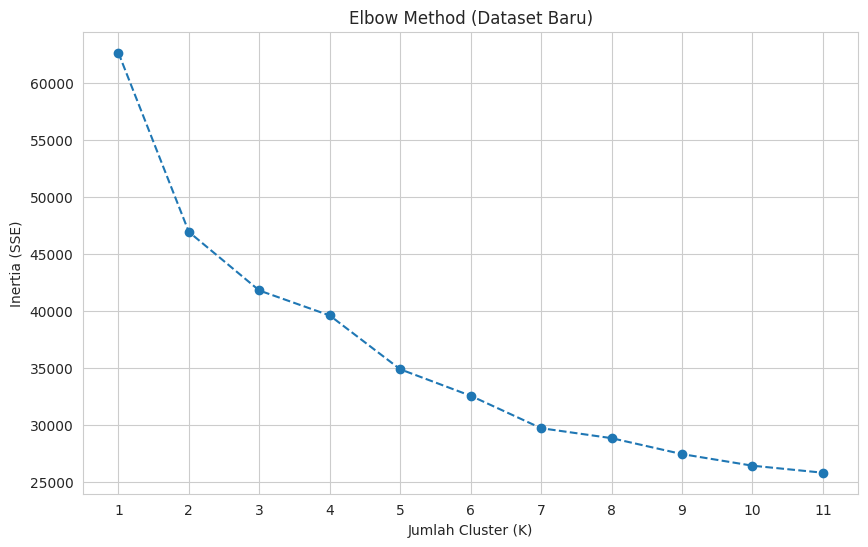


Dipilih K = 5 untuk clustering dataset baru.
Jika plot elbow menyarankan K yang berbeda, silakan ubah N_CLUSTERS_NEW dan jalankan ulang bagian K-Means.

Lima baris pertama data baru dengan label cluster (dari df_new_subset):
      type  release_year rating  year_added  month_added  duration_minutes  \
0    Movie          2020  PG-13        2021            9              90.0   
1  TV Show          2021  TV-MA        2021            9               0.0   
2  TV Show          2021  TV-MA        2021            9               0.0   
3  TV Show          2021  TV-MA        2021            9               0.0   
4  TV Show          2021  TV-MA        2021            9               0.0   

   num_seasons           primary_genre  cluster  
0          0.0           Documentaries        0  
1          2.0  International TV Shows        2  
2          1.0          Crime TV Shows        2  
3          1.0              Docuseries        2  
4          2.0  International TV Shows        2  

Dist

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# X_new_prepared adalah data yang sudah siap dari langkah sebelumnya untuk dataset baru
# df_new_subset adalah DataFrame sebelum di-encode/scale untuk dataset baru

# 1. Menentukan K optimal menggunakan Elbow Method
inertia_new = []
# Kita bisa coba rentang K yang sedikit lebih lebar jika jumlah fitur berbeda signifikan
# atau tetap sama jika perbedaannya kecil. Kita coba 1-11 dulu.
k_range_new = range(1, 12)

print("Menghitung inertia untuk berbagai nilai K (Elbow Method) pada dataset baru...")
for k_new in k_range_new:
    kmeans_elbow_new = KMeans(n_clusters=k_new, init='k-means++', random_state=42, n_init='auto')
    kmeans_elbow_new.fit(X_new_prepared)
    inertia_new.append(kmeans_elbow_new.inertia_)

# Plot Elbow Method untuk dataset baru
plt.figure(figsize=(10, 6))
plt.plot(k_range_new, inertia_new, marker='o', linestyle='--')
plt.title('Elbow Method (Dataset Baru)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.xticks(k_range_new)
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------------
# Setelah melihat plot elbow, Anda perlu memutuskan nilai K_NEW.
# Untuk contoh, kita akan pilih K_NEW=5. Anda HARUS menyesuaikan ini.
# ---------------------------------------------------------------------------
N_CLUSTERS_NEW = 5 # GANTI INI BERDASARKAN PLOT ELBOW BARU ANDA
print(f"\nDipilih K = {N_CLUSTERS_NEW} untuk clustering dataset baru.")
print("Jika plot elbow menyarankan K yang berbeda, silakan ubah N_CLUSTERS_NEW dan jalankan ulang bagian K-Means.")

# 2. Menjalankan K-Means dengan K yang dipilih untuk dataset baru
kmeans_new = KMeans(n_clusters=N_CLUSTERS_NEW, init='k-means++', random_state=42, n_init='auto')
cluster_labels_new = kmeans_new.fit_predict(X_new_prepared)

# 3. Menambahkan label cluster kembali ke DataFrame (df_new_subset)
df_new_clustered = df_new_subset.copy()
df_new_clustered['cluster'] = cluster_labels_new

print(f"\nLima baris pertama data baru dengan label cluster (dari df_new_subset):")
print(df_new_clustered.head())

print(f"\nDistribusi item per cluster (Dataset Baru):")
print(df_new_clustered['cluster'].value_counts().sort_index())

# Karakteristik tiap cluster (Dataset Baru)
print("\nKarakteristik Rata-Rata Fitur Numerik per Cluster (Dataset Baru):")
numerical_features_original = ['release_year', 'year_added', 'month_added', 'duration_minutes', 'num_seasons']
print(df_new_clustered.groupby('cluster')[numerical_features_original].mean())

print("\nKarakteristik Modus Fitur Kategorikal per Cluster (Dataset Baru):")
categorical_features_original = ['type', 'rating', 'primary_genre']
for col_cat in categorical_features_original:
    print(f"\nModus untuk '{col_cat}' per cluster (Dataset Baru):")
    print(df_new_clustered.groupby('cluster')[col_cat].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A"))

Analisis Plot Elbow (Dataset Baru)
lda perplexity
Melihat plot elbow yang baru:

Penurunan inertia sangat tajam dari K=1 ke K=2, lalu ke K=3.
Penurunan dari K=3 ke K=4 masih cukup baik.
Dari K=4 ke K=5, penurunan mulai melandai.
Setelah K=5, kurva menjadi semakin datar.
Berdasarkan plot ini, K=5 (yang Anda gunakan) tampaknya masih merupakan pilihan yang cukup masuk akal, karena setelah K=5, manfaat penambahan cluster (dalam hal pengurangan inertia) mulai berkurang signifikan. K=4 juga bisa menjadi kandidat yang baik. Untuk saat ini, kita akan lanjut dengan K=5 sesuai output Anda.

Interpretasi Hasil Cluster (Dataset Baru, K=5)
Berikut adalah ringkasan dan perkiraan interpretasi untuk setiap cluster pada dataset baru ini:

Cluster 0: "Film Drama Kontemporer (Ditambahkan Akhir Tahun)"

Jumlah Anggota: 2749
Tipe Dominan: Movie
Rating Dominan: TV-MA
Genre Dominan: Dramas
Rata-rata Tahun Rilis: ~2015
Rata-rata Tahun Ditambahkan: ~2018 (bulan sekitar September - Oktober)
Rata-rata Durasi: ~97 menit (musim 0)
Interpretasi: Cluster ini mayoritas berisi film drama untuk penonton dewasa (TV-MA), dirilis sekitar tahun 2015 dan ditambahkan ke Netflix sekitar tahun 2018, cenderung pada akhir tahun.
Cluster 1: "TV Show Internasional (Genre Bervariasi, Banyak Musim)"

Jumlah Anggota: 1217
Tipe Dominan: TV Show
Rating Dominan: TV-MA
Genre Dominan: International TV Shows
Rata-rata Tahun Rilis: ~2016
Rata-rata Tahun Ditambahkan: ~2018 (bulan sekitar September)
Rata-rata Durasi: ~2.2 musim (durasi menit 0)
Interpretasi: Cluster ini jelas mengelompokkan serial TV internasional dewasa (TV-MA) dengan rata-rata lebih dari 2 musim, dirilis sekitar 2016 dan ditambahkan sekitar 2018.
Cluster 2: "TV Show Internasional Relatif Baru (Ditambahkan Pertengahan Tahun, Sedikit Musim)"

Jumlah Anggota: 1446
Tipe Dominan: TV Show
Rating Dominan: TV-MA
Genre Dominan: International TV Shows
Rata-rata Tahun Rilis: ~2018 (lebih baru dari Cluster 1)
Rata-rata Tahun Ditambahkan: ~2020 (lebih baru ditambahkan, bulan sekitar April-Mei)
Rata-rata Durasi: ~1.4 musim (lebih sedikit musim dari Cluster 1)
Interpretasi: Cluster ini juga serial TV internasional dewasa (TV-MA), namun cenderung lebih baru tahun rilisnya (sekitar 2018) dan baru ditambahkan ke Netflix (sekitar 2020), umumnya pada pertengahan tahun, dengan jumlah musim yang lebih sedikit. Sedikit ada duration_minutes (~0.008) yang bisa diabaikan (noise).
Cluster 3: "Film Drama Kontemporer (Ditambahkan Awal Tahun)"

Jumlah Anggota: 2898 (Cluster terbesar)
Tipe Dominan: Movie
Rating Dominan: TV-MA
Genre Dominan: Dramas
Rata-rata Tahun Rilis: ~2016
Rata-rata Tahun Ditambahkan: ~2019 (bulan sekitar Maret-April)
Rata-rata Durasi: ~99 menit
Interpretasi: Mirip dengan Cluster 0, ini adalah film drama dewasa (TV-MA), namun dengan tahun rilis dan tahun penambahan yang sedikit lebih baru, dan cenderung ditambahkan pada awal hingga pertengahan tahun.
Cluster 4: "Film Aksi & Petualangan Klasik"

Jumlah Anggota: 499 (Cluster terkecil)
Tipe Dominan: Movie
Rating Dominan: TV-14
Genre Dominan: Action & Adventure
Rata-rata Tahun Rilis: ~1986 (paling tua)
Rata-rata Tahun Ditambahkan: ~2019 (bulan sekitar Juli-Agustus)
Rata-rata Durasi: ~112 menit
Interpretasi: Cluster ini sangat mirip dengan salah satu cluster di dataset pertama. Ini adalah kelompok film-film yang deutlich lebih tua (rilisan 1980-an), bergenre aksi & petualangan, dengan rating TV-14.
Perbandingan dengan Hasil Dataset Pertama:

Ada kemiripan yang kuat dalam beberapa profil cluster, terutama "Film Aksi & Petualangan Klasik" (Cluster 4 di sini, Cluster 1 di dataset pertama) dan pemisahan antara Film dan TV Show.
Pembagian cluster film drama dewasa (Cluster 0 dan 3 di sini) tampaknya masih dipengaruhi oleh kombinasi tahun rilis, tahun penambahan, dan bulan penambahan.
TV Show juga terbagi menjadi dua cluster (Cluster 1 dan 2 di sini), kemungkinan berdasarkan kombinasi tahun rilis/penambahan dan jumlah musim rata-rata.
Perbedaan jumlah anggota per cluster dan nilai rata-rata yang sedikit berbeda wajar karena adanya 2 baris data tambahan dan potensi rentang release_year yang lebih baru di dataset ini.


Membuat visualisasi untuk fitur kategorikal (Dataset Baru)...


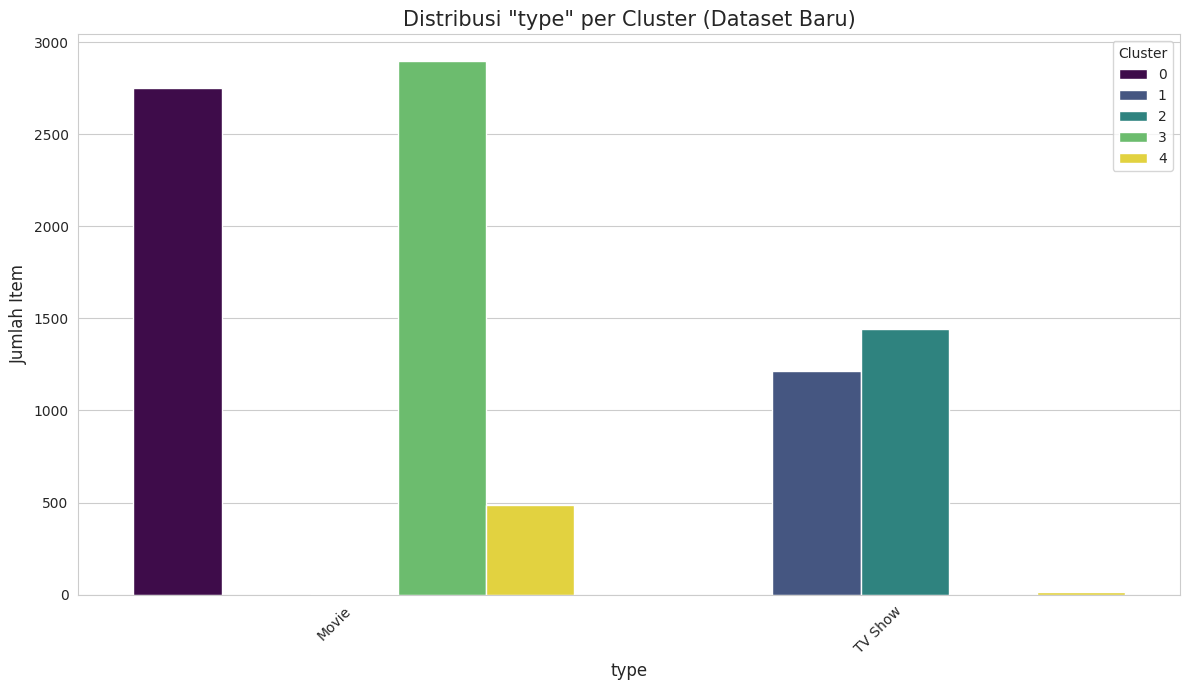

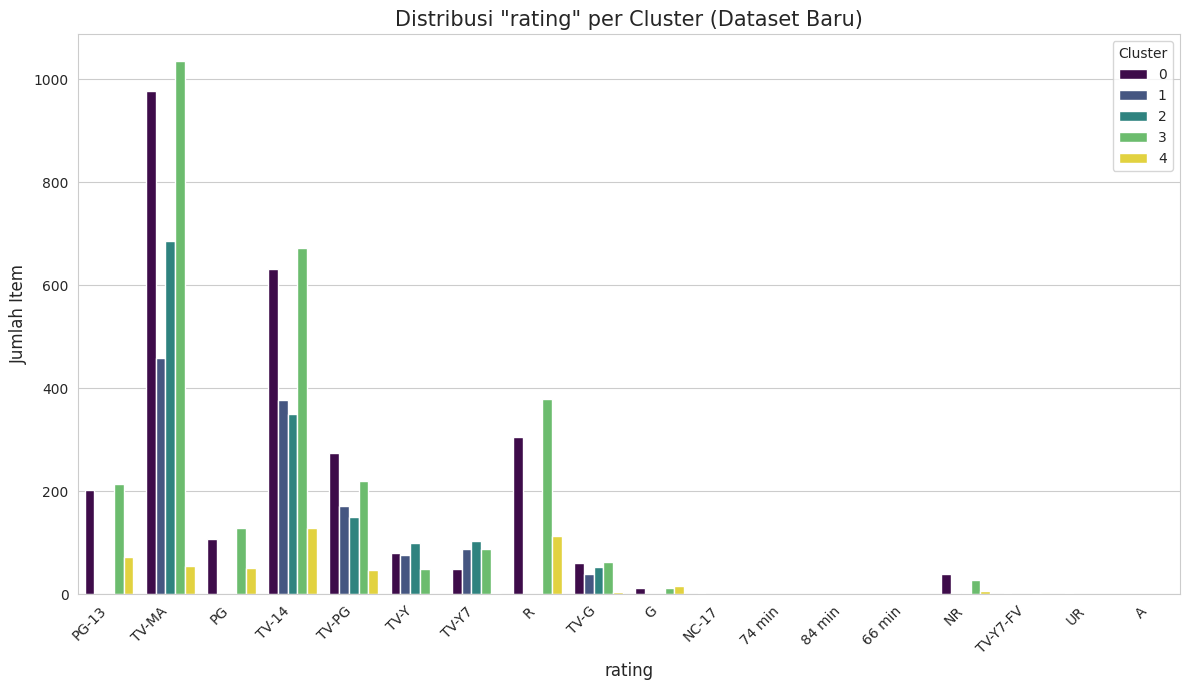

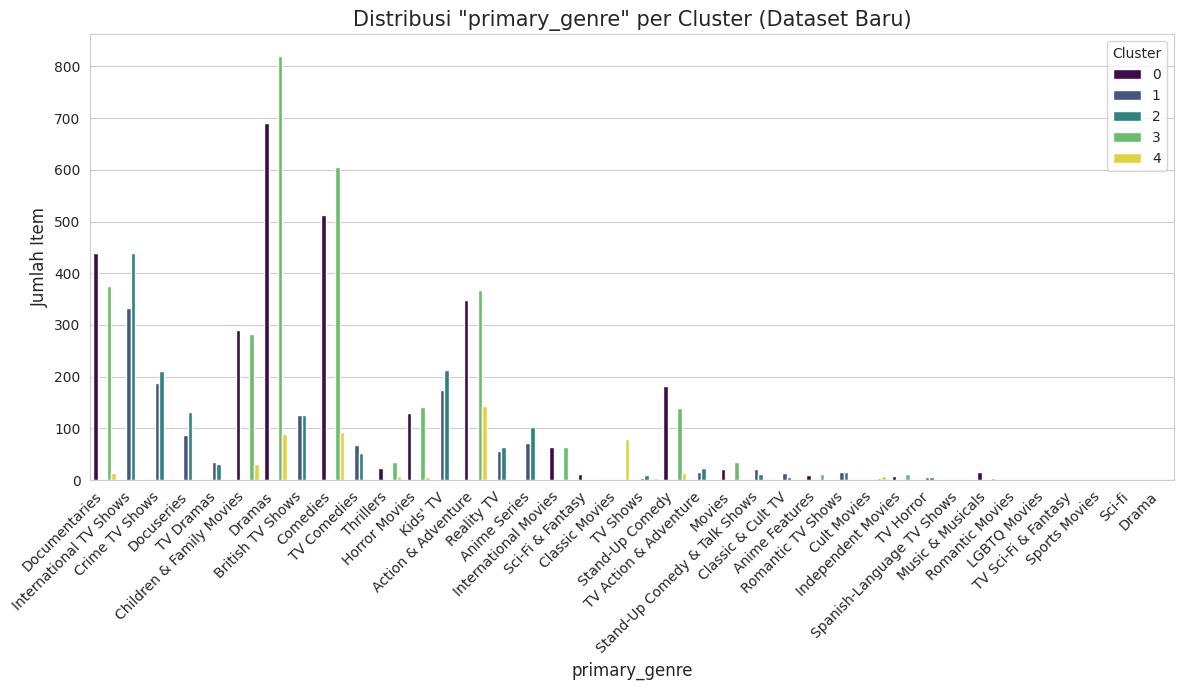


Membuat visualisasi untuk fitur numerik (Dataset Baru)...


<ipython-input-25-349d7716507f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new_clustered, x='cluster', y=feature_num_new, palette='viridis')


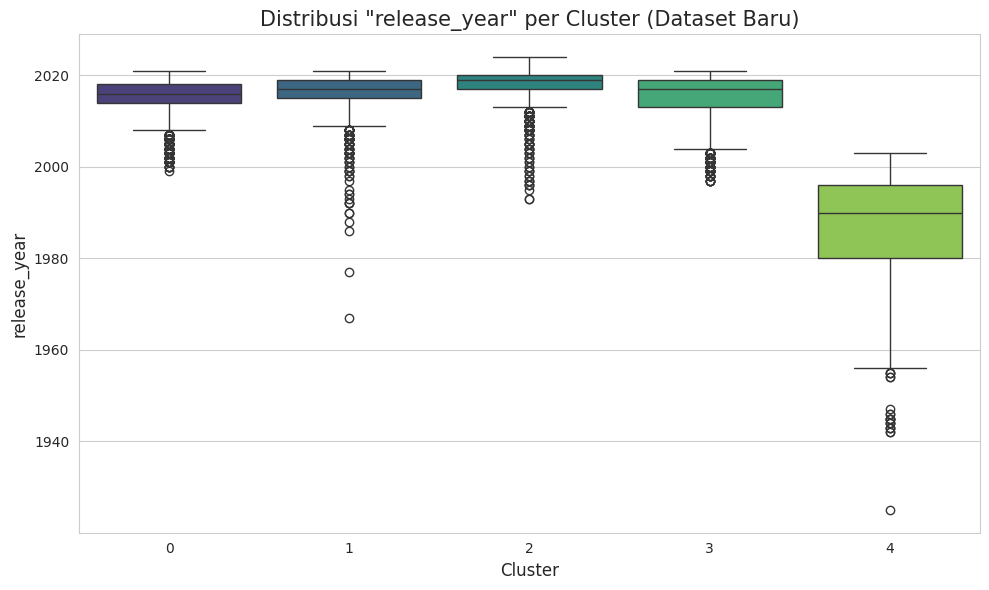

<ipython-input-25-349d7716507f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new_clustered, x='cluster', y=feature_num_new, palette='viridis')


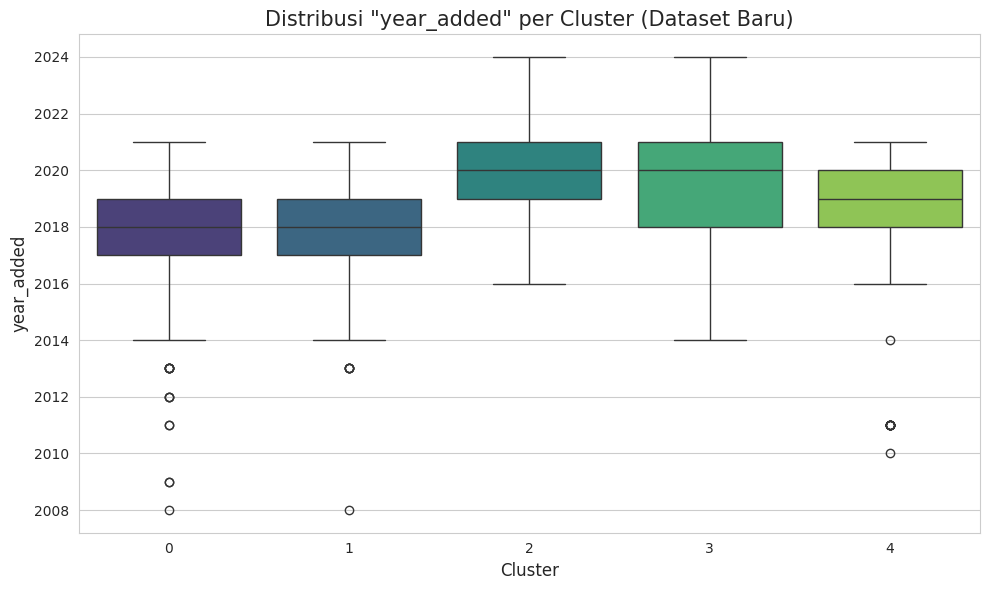

<ipython-input-25-349d7716507f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new_clustered, x='cluster', y=feature_num_new, palette='viridis')


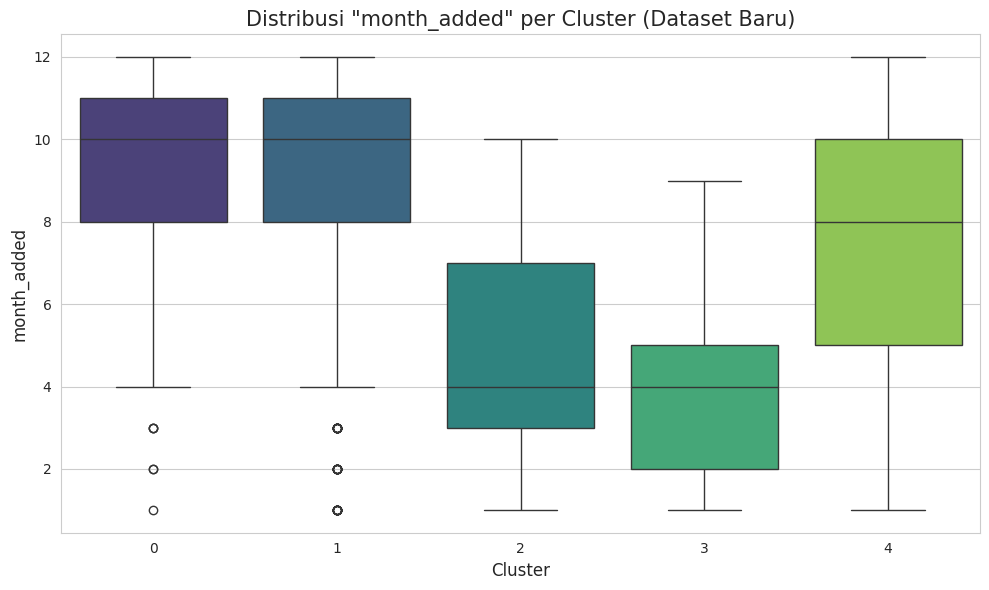

<ipython-input-25-349d7716507f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new_clustered, x='cluster', y=feature_num_new, palette='viridis')


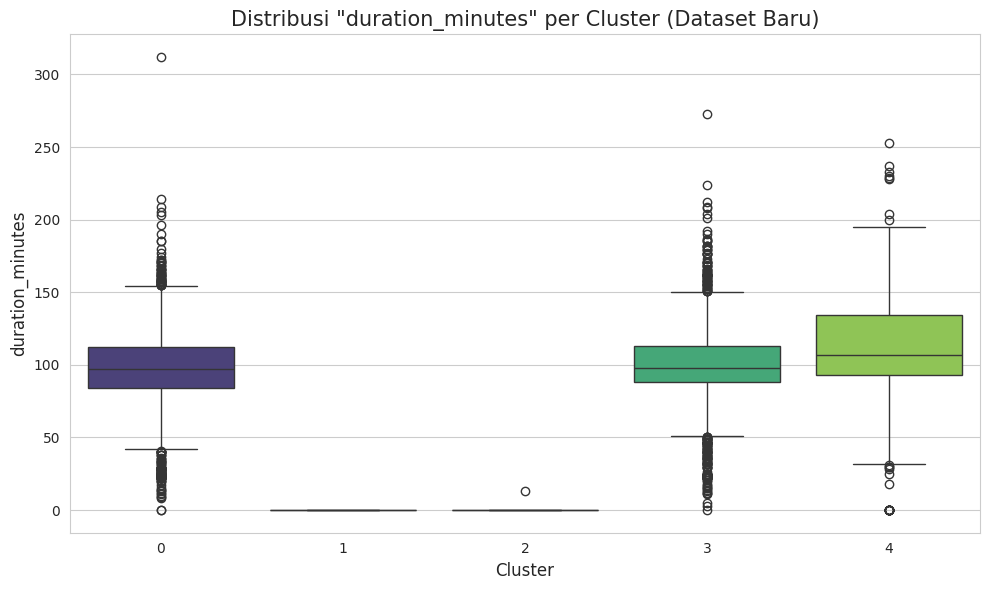

<ipython-input-25-349d7716507f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new_clustered, x='cluster', y=feature_num_new, palette='viridis')


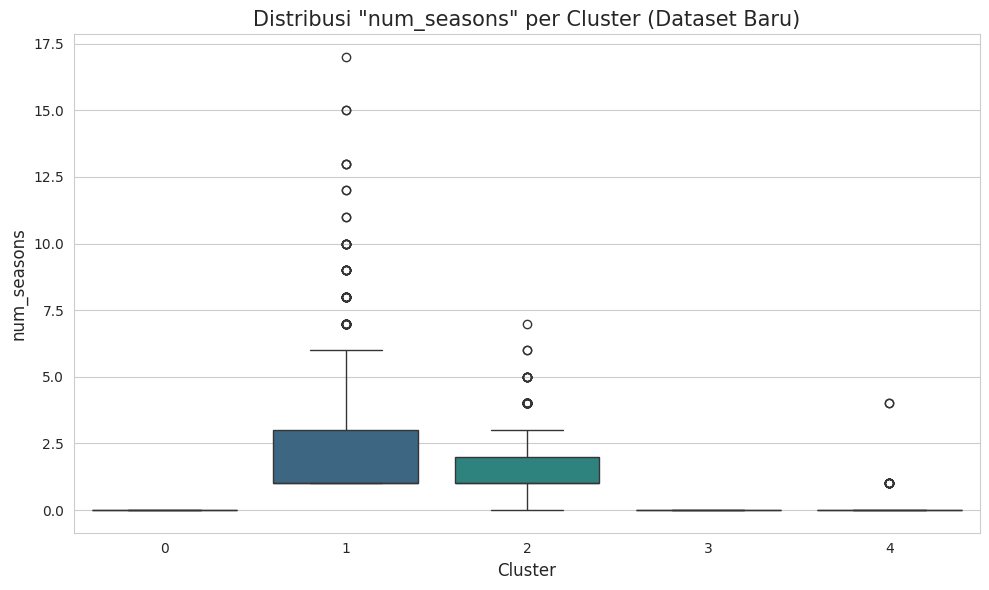

Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster dataset baru.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan df_new_clustered sudah ada dari langkah K-Means untuk dataset baru
# df_new_clustered berisi fitur-fitur asli dari df_new_subset dan kolom 'cluster'

# Set style untuk plot
sns.set_style("whitegrid")

# 1. Visualisasi Distribusi Fitur Kategorikal per Cluster (Dataset Baru)
categorical_features_original_new = ['type', 'rating', 'primary_genre']

print("Membuat visualisasi untuk fitur kategorikal (Dataset Baru)...")
for feature_cat_new in categorical_features_original_new:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df_new_clustered, x=feature_cat_new, hue='cluster', palette='viridis')
    plt.title(f'Distribusi "{feature_cat_new}" per Cluster (Dataset Baru)', fontsize=15)
    plt.xlabel(feature_cat_new, fontsize=12)
    plt.ylabel('Jumlah Item', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# 2. Visualisasi Distribusi Fitur Numerik per Cluster (Dataset Baru)
numerical_features_original_new = ['release_year', 'year_added', 'month_added', 'duration_minutes', 'num_seasons']

print("\nMembuat visualisasi untuk fitur numerik (Dataset Baru)...")
for feature_num_new in numerical_features_original_new:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_new_clustered, x='cluster', y=feature_num_new, palette='viridis')
    plt.title(f'Distribusi "{feature_num_new}" per Cluster (Dataset Baru)', fontsize=15)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature_num_new, fontsize=12)
    plt.tight_layout()
    plt.show()

print("Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster dataset baru.")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import f_oneway, chi2_contingency
import pandas as pd

# Pastikan X_new_prepared (data yang sudah di-encode dan scale untuk dataset baru),
# cluster_labels_new (label cluster untuk dataset baru),
# df_new_clustered (data asli dengan kolom 'cluster' untuk dataset baru),
# dan N_CLUSTERS_NEW sudah ada.

print("--- Metrik Validitas Internal Cluster (Dataset Baru) ---")
if 'X_new_prepared' in locals() and 'cluster_labels_new' in locals() and 'N_CLUSTERS_NEW' in locals():
    silhouette_avg_new = silhouette_score(X_new_prepared, cluster_labels_new)
    print(f"Rata-rata Silhouette Score untuk {N_CLUSTERS_NEW} clusters (Dataset Baru): {silhouette_avg_new:.4f}")

    db_score_new = davies_bouldin_score(X_new_prepared, cluster_labels_new)
    print(f"Davies-Bouldin Index (Dataset Baru): {db_score_new:.4f}")

    ch_score_new = calinski_harabasz_score(X_new_prepared, cluster_labels_new)
    print(f"Calinski-Harabasz Index (Dataset Baru): {ch_score_new:.4f}")
else:
    print("Variabel X_new_prepared, cluster_labels_new, atau N_CLUSTERS_NEW tidak ditemukan. Tidak dapat menghitung metrik validitas.")

print("\n--- Analisis Perbedaan Fitur Antar Cluster (Dataset Baru) ---")

# ANOVA untuk Fitur Numerik (Dataset Baru)
numerical_features_original_new = ['release_year', 'year_added', 'month_added', 'duration_minutes', 'num_seasons']
print("\n Hasil ANOVA untuk Fitur Numerik (Dataset Baru):")
if 'df_new_clustered' in locals() and 'N_CLUSTERS_NEW' in locals():
    for feature_num_new in numerical_features_original_new:
        if feature_num_new in df_new_clustered.columns:
            grouped_data_new = [df_new_clustered[feature_num_new][df_new_clustered['cluster'] == i] for i in range(N_CLUSTERS_NEW)]
            grouped_data_cleaned_new = [group for group in grouped_data_new if not group.empty]

            if len(grouped_data_cleaned_new) > 1:
                f_statistic_new, p_value_new = f_oneway(*grouped_data_cleaned_new)
                print(f"  Fitur: {feature_num_new}")
                print(f"    F-statistic: {f_statistic_new:.4f}")
                print(f"    P-value: {p_value_new:.4g}")
                if p_value_new < 0.05:
                    print("    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).")
                else:
                    print("    Kesimpulan: Tidak ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p >= 0.05).")
            else:
                print(f"  Fitur: {feature_num_new} - Tidak cukup grup data untuk ANOVA.")
        else:
            print(f"  Fitur: {feature_num_new} tidak ditemukan di df_new_clustered.")
else:
    print("Variabel df_new_clustered atau N_CLUSTERS_NEW tidak ditemukan. Tidak dapat melakukan ANOVA.")

# Chi-square Test untuk Fitur Kategorikal (Dataset Baru)
categorical_features_original_new = ['type', 'rating', 'primary_genre']
print("\n Hasil Chi-square Test untuk Fitur Kategorikal (Dataset Baru):")
if 'df_new_clustered' in locals():
    for feature_cat_new in categorical_features_original_new:
        if feature_cat_new in df_new_clustered.columns:
            contingency_table_new = pd.crosstab(df_new_clustered[feature_cat_new], df_new_clustered['cluster'])
            chi2_new, p_value_new, dof_new, expected_new = chi2_contingency(contingency_table_new)
            print(f"  Fitur: {feature_cat_new}")
            print(f"    Chi-square statistic: {chi2_new:.4f}")
            print(f"    P-value: {p_value_new:.4g}")
            print(f"    Degrees of Freedom: {dof_new}")
            if p_value_new < 0.05:
                print("    Kesimpulan: Ada hubungan yang signifikan secara statistik antara fitur dan cluster (p < 0.05).")
            else:
                print("    Kesimpulan: Tidak ada hubungan yang signifikan secara statistik antara fitur dan cluster (p >= 0.05).")
        else:
            print(f"  Fitur: {feature_cat_new} tidak ditemukan di df_new_clustered.")
else:
    print("Variabel df_new_clustered tidak ditemukan. Tidak dapat melakukan Chi-square test.")

--- Metrik Validitas Internal Cluster (Dataset Baru) ---
Rata-rata Silhouette Score untuk 5 clusters (Dataset Baru): 0.1709
Davies-Bouldin Index (Dataset Baru): 1.9223
Calinski-Harabasz Index (Dataset Baru): 1753.6002

--- Analisis Perbedaan Fitur Antar Cluster (Dataset Baru) ---

 Hasil ANOVA untuk Fitur Numerik (Dataset Baru):
  Fitur: release_year
    F-statistic: 3720.7757
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: year_added
    F-statistic: 434.6205
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: month_added
    F-statistic: 2948.9900
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: duration_minutes
    F-statistic: 8125.2204
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: num_seas

Hasil tes signifikansi untuk dataset baru ini juga menunjukkan hasil yang sangat baik dan konsisten dengan temuan pada dataset pertama! 👍

Analisis Hasil Tes Signifikansi (Dataset Baru)
Metrik Validitas Internal Cluster
Rata-rata Silhouette Score: 0.1709
Skor ini sedikit lebih tinggi dari dataset pertama (0.1637). Ini positif dan menunjukkan bahwa, secara rata-rata, objek dalam dataset baru ini juga lebih mirip dengan clusternya sendiri dibandingkan dengan cluster tetangga. Peningkatan kecil ini bisa jadi karena adanya data tambahan atau sedikit perbedaan struktur data.
Davies-Bouldin Index: 1.9223
Nilai ini sedikit lebih tinggi dari dataset pertama (1.6142). Untuk Davies-Bouldin, nilai yang lebih rendah lebih baik. Perbedaan ini tidak terlalu besar dan bisa disebabkan oleh variasi dalam data atau jumlah fitur yang sedikit berbeda setelah encoding.
Calinski-Harabasz Index: 1753.6002
Skor ini sangat mirip dengan dataset pertama (1754.2050) dan tetap tinggi, yang menunjukkan bahwa cluster cenderung padat dan terpisah dengan baik.
Secara umum, metrik validitas internal untuk dataset baru ini juga mendukung bahwa cluster yang terbentuk memiliki struktur yang cukup baik.

Analisis Perbedaan Fitur Antar Cluster (ANOVA & Chi-square)
Hasil ANOVA untuk Fitur Numerik:

Sama seperti dataset pertama, untuk SEMUA fitur numerik yang diuji (release_year, year_added, month_added, duration_minutes, num_seasons), P-value adalah 0 (atau sangat kecil).
Kesimpulan: Ini kembali menunjukkan adanya perbedaan rata-rata yang sangat signifikan secara statistik untuk semua fitur numerik ini di antara kelima cluster pada dataset baru.
Hasil Chi-square Test untuk Fitur Kategorikal:

Sama seperti dataset pertama, untuk SEMUA fitur kategorikal yang diuji (type, rating, primary_genre), P-value sangat kecil (0 atau mendekati 0).
Kesimpulan: Ini juga menunjukkan adanya hubungan yang sangat signifikan secara statistik antara masing-masing fitur kategorikal ini dan keanggotaan cluster pada dataset baru.
Kesimpulan dari Tes Signifikansi (Dataset Baru)
Tes signifikansi untuk dataset kedua ini juga memberikan bukti statistik yang kuat bahwa:

Cluster yang terbentuk memiliki struktur yang cukup baik dan terpisah.
Cluster-cluster tersebut secara signifikan berbeda satu sama lain berdasarkan fitur-fitur numerik dan kategorikal yang digunakan.
Hasil ini konsisten dengan dataset pertama dan memperkuat bahwa metode clustering yang Anda gunakan mampu menemukan pola yang berbeda dan signifikan dalam data Netflix, bahkan dengan sedikit variasi pada dataset inputnya.

In [ ]:
import pandas as pd

file_path_ds3 = '/kaggle/input/netflix-tv-shows-and-movies/titles.csv'
print(f"Memuat dataset dari: {file_path_ds3}")

df_ds3 = None # Initialize df_ds3 to None

try:
    # Mencoba dengan encoding utf-8 terlebih dahulu
    df_ds3 = pd.read_csv(file_path_ds3, encoding='utf-8')
    print("Dataset ketiga berhasil dimuat dengan encoding 'utf-8'! ✅")
except UnicodeDecodeError:
    print("Gagal memuat dengan 'utf-8', mencoba 'latin1'...")
    try:
        df_ds3 = pd.read_csv(file_path_ds3, encoding='latin1')
        print("Dataset ketiga berhasil dimuat dengan encoding 'latin1'! ✅")
    except UnicodeDecodeError:
        print("Gagal memuat dengan 'latin1', mencoba 'iso-8859-1'...")
        try:
            df_ds3 = pd.read_csv(file_path_ds3, encoding='iso-8859-1')
            print("Dataset ketiga berhasil dimuat dengan encoding 'iso-8859-1'! ✅")
        except UnicodeDecodeError:
            print("Gagal memuat dengan 'iso-8859-1', mencoba 'cp1252'...")
            try:
                df_ds3 = pd.read_csv(file_path_ds3, encoding='cp1252')
                print("Dataset ketiga berhasil dimuat dengan encoding 'cp1252'! ✅")
            except Exception as e:
                print(f"❌ Gagal memuat dataset ketiga dengan semua encoding yang dicoba. Error: {e} 💥")
except FileNotFoundError:
    print(f"❌ File tidak ditemukan di path: {file_path_ds3}")
    print("Pastikan path file sudah benar.")
except Exception as e:
    print(f"Terjadi error lain saat memuat dataset ketiga: {e} 💥")

# Jika dataset berhasil dimuat, tampilkan informasinya
if df_ds3 is not None:
    print("\nLima baris pertama dataset ketiga:")
    print(df_ds3.head())

    print("\nInformasi dataset ketiga:")
    df_ds3.info()

    print("\nStatistik deskriptif dataset ketiga (untuk kolom numerik):")
    print(df_ds3.describe())

    print("\nStatistik deskriptif dataset ketiga (untuk kolom objek/kategorikal):")
    print(df_ds3.describe(include='object'))

    print("\nJumlah nilai unik di setiap kolom dataset ketiga:")
    for col in df_ds3.columns:
        print(f"- {col}: {df_ds3[col].nunique()} nilai unik")

    print("\nContoh beberapa nilai unik untuk setiap kolom dataset ketiga:")
    for col in df_ds3.columns:
        if df_ds3[col].nunique() == 0:
            print(f"- {col}: (Kolom kosong)")
            continue
        unique_values = df_ds3[col].unique()
        display_limit = 10
        if pd.api.types.is_numeric_dtype(df_ds3[col].dtype) and df_ds3[col].nunique() > 20:
             print(f"- {col} (numerik dengan >20 nilai unik): Min={df_ds3[col].min()}, Max={df_ds3[col].max()}, {df_ds3[col].nunique()} nilai unik")
        elif len(unique_values) > display_limit:
            print(f"- {col} (contoh): {unique_values[:display_limit]} ... (total {len(unique_values)} unik)")
        else:
            print(f"- {col}: {unique_values}")
else:
    print("Dataset ketiga tidak berhasil dimuat, tidak ada informasi untuk ditampilkan.")

Memuat dataset dari: /kaggle/input/netflix-tv-shows-and-movies/titles.csv
Dataset ketiga berhasil dimuat dengan encoding 'utf-8'! ✅

Lima baris pertama dataset ketiga:
         id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   

  age_certification  runtime                            

In [ ]:
import pandas as pd
import numpy as np
import ast # Untuk mengubah string list menjadi list

# df_ds3 adalah DataFrame yang sudah dimuat untuk dataset ketiga
# Pastikan df_ds3 sudah ada.

# Salin dataframe
df_ds3_processed = df_ds3.copy()

# 1. Menangani Missing Values Dasar
df_ds3_processed['title'] = df_ds3_processed['title'].fillna('Unknown')
df_ds3_processed['description'] = df_ds3_processed['description'].fillna('Unknown')

# 2. Standarisasi Kolom 'type'
df_ds3_processed['type'] = df_ds3_processed['type'].replace({'SHOW': 'TV Show', 'MOVIE': 'Movie'})

# Fungsi untuk parsing string list dengan aman
def parse_string_list(x):
    if pd.isna(x) or x == '[]': # Handle NaN dan list kosong
        return []
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return [] # Kembalikan list kosong jika ada error parsing

# 3. Parsing Kolom 'genres' dan 'production_countries', lalu ekstrak item pertama
df_ds3_processed['parsed_genres'] = df_ds3_processed['genres'].apply(parse_string_list)
df_ds3_processed['primary_genre_ds3'] = df_ds3_processed['parsed_genres'].apply(lambda x: x[0] if x else 'Unknown')

df_ds3_processed['parsed_countries'] = df_ds3_processed['production_countries'].apply(parse_string_list)
df_ds3_processed['primary_country_ds3'] = df_ds3_processed['parsed_countries'].apply(lambda x: x[0] if x else 'Unknown')

# 4. Memproses 'age_certification' (sebagai fitur rating baru)
# Isi missing values dengan modus atau 'Unknown'. 'Unknown' mungkin lebih aman karena banyak yg hilang.
df_ds3_processed['rating_ds3'] = df_ds3_processed['age_certification'].fillna('Unknown')

# 5. Membuat Fitur Durasi yang Konsisten
# Isi NaN di 'seasons' dengan 0 sebelum digunakan
df_ds3_processed['seasons'] = df_ds3_processed['seasons'].fillna(0)

df_ds3_processed['duration_minutes_ds3'] = df_ds3_processed.apply(
    lambda row: row['runtime'] if row['type'] == 'Movie' else 0, axis=1
)
df_ds3_processed['num_seasons_ds3'] = df_ds3_processed.apply(
    lambda row: row['seasons'] if row['type'] == 'TV Show' else 0, axis=1
)

# 6. Menangani Missing Values pada Fitur Numerik Baru (dengan median)
cols_to_impute_median = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
for col in cols_to_impute_median:
    if col in df_ds3_processed.columns:
        median_val = df_ds3_processed[col].median()
        df_ds3_processed[col].fillna(median_val, inplace=True)

# Menampilkan beberapa kolom yang relevan dan info
print("Lima baris pertama df_ds3_processed (beberapa kolom terpilih):")
cols_to_show = ['title', 'type', 'primary_genre_ds3', 'primary_country_ds3', 'rating_ds3',
                'release_year', 'runtime', 'duration_minutes_ds3', 'seasons', 'num_seasons_ds3',
                'imdb_score', 'tmdb_popularity']
print(df_ds3_processed[cols_to_show].head())

print("\nInformasi df_ds3_processed:")
df_ds3_processed.info()

print("\nJumlah missing values di df_ds3_processed setelah preprocessing:")
print(df_ds3_processed.isnull().sum())

print("\nContoh nilai unik untuk kolom baru/modifikasi di df_ds3_processed:")
print(f"Type (setelah standarisasi): {df_ds3_processed['type'].unique()}")
print(f"Primary Genre (contoh): {df_ds3_processed['primary_genre_ds3'].unique()[:10]}")
print(f"Rating (dari age_certification, contoh): {df_ds3_processed['rating_ds3'].unique()[:10]}")
print(f"Duration Minutes (Movie, contoh): {df_ds3_processed[df_ds3_processed['type'] == 'Movie']['duration_minutes_ds3'].unique()[:10]}")
print(f"Num Seasons (TV Show, contoh): {df_ds3_processed[df_ds3_processed['type'] == 'TV Show']['num_seasons_ds3'].unique()[:10]}")

Lima baris pertama df_ds3_processed (beberapa kolom terpilih):
                                 title     type primary_genre_ds3  \
0  Five Came Back: The Reference Films  TV Show     documentation   
1                          Taxi Driver    Movie             drama   
2                          Deliverance    Movie             drama   
3      Monty Python and the Holy Grail    Movie           fantasy   
4                      The Dirty Dozen    Movie               war   

  primary_country_ds3 rating_ds3  release_year  runtime  duration_minutes_ds3  \
0                  US      TV-MA          1945       51                     0   
1                  US          R          1976      114                   114   
2                  US          R          1972      109                   109   
3                  GB         PG          1975       91                    91   
4                  GB    Unknown          1967      150                   150   

   seasons  num_seasons_ds3  imdb_s

<ipython-input-29-e2dad72ee13e>:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ds3_processed[col].fillna(median_val, inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# df_ds3_processed adalah DataFrame dari langkah pra-pemrosesan sebelumnya untuk dataset ketiga

# 1. Pilih fitur yang akan digunakan untuk dataset ketiga
features_for_clustering_ds3 = [
    'type',                  # Kategorikal
    'rating_ds3',            # Kategorikal (dari age_certification)
    'primary_genre_ds3',     # Kategorikal
    'release_year',          # Numerik
    'duration_minutes_ds3',  # Numerik
    'num_seasons_ds3',       # Numerik
    'imdb_score',            # Numerik (baru)
    'imdb_votes',            # Numerik (baru)
    'tmdb_popularity',       # Numerik (baru)
    'tmdb_score'             # Numerik (baru)
]

df_ds3_subset = df_ds3_processed[features_for_clustering_ds3].copy()

# Identifikasi kolom numerik dan kategorikal untuk dataset ketiga
numerical_features_ds3 = [
    'release_year', 'duration_minutes_ds3', 'num_seasons_ds3',
    'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'
]
categorical_features_ds3 = ['type', 'rating_ds3', 'primary_genre_ds3']

# Membuat preprocessor pipeline
preprocessor_ds3 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_ds3),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_ds3)
    ],
    remainder='passthrough'
)

# Terapkan preprocessor ke data baru (df_ds3_subset)
X_ds3_prepared = preprocessor_ds3.fit_transform(df_ds3_subset)

# Mendapatkan nama fitur setelah One-Hot Encoding
try:
    onehot_cols_ds3 = preprocessor_ds3.named_transformers_['cat'].get_feature_names_out(categorical_features_ds3)
    feature_names_prepared_ds3 = numerical_features_ds3 + list(onehot_cols_ds3)
    df_ds3_prepared = pd.DataFrame(X_ds3_prepared, columns=feature_names_prepared_ds3, index=df_ds3_subset.index)

    print("Lima baris pertama data ketiga yang sudah di-encode dan di-scale (df_ds3_prepared):")
    print(df_ds3_prepared.head())
    print(f"\nDimensi data ketiga yang sudah diproses (X_ds3_prepared): {X_ds3_prepared.shape}")
    print("Data ketiga siap untuk clustering! ✅")

    print("\nInformasi df_ds3_prepared:")
    df_ds3_prepared.info()

except Exception as e:
    print(f"Error saat mengambil nama fitur atau membuat df_ds3_prepared: {e}")
    print("Namun, X_ds3_prepared (NumPy array) seharusnya sudah siap untuk clustering.")
    print(f"\nDimensi data ketiga yang sudah diproses (X_ds3_prepared): {X_ds3_prepared.shape}")
    print(X_ds3_prepared[:5])


# Variabel X_ds3_prepared akan digunakan untuk clustering dataset ketiga ini.


Lima baris pertama data ketiga yang sudah di-encode dan di-scale (df_ds3_prepared):
   release_year  duration_minutes_ds3  num_seasons_ds3  imdb_score  \
0    -10.294901             -1.183006         0.115400    0.073358   
1     -5.826196              0.962550        -0.405906    1.508315   
2     -6.402803              0.868447        -0.405906    1.059891   
3     -5.970348              0.529675        -0.405906    1.508315   
4     -7.123562              1.640094        -0.405906    1.059891   

   imdb_votes  tmdb_popularity  tmdb_score  type_Movie  type_TV Show  \
0   -0.211259        -0.268840    0.058883         0.0           1.0   
1    8.569282         0.229131    1.181932         1.0           0.0   
2    0.936900        -0.152751    0.410110         1.0           0.0   
3    5.584579        -0.085504    0.858803         1.0           0.0   
4    0.555656        -0.024598    0.673531         1.0           0.0   

   rating_ds3_G  ...  primary_genre_ds3_history  primary_genre

Menghitung inertia untuk berbagai nilai K (Elbow Method) pada dataset ketiga...


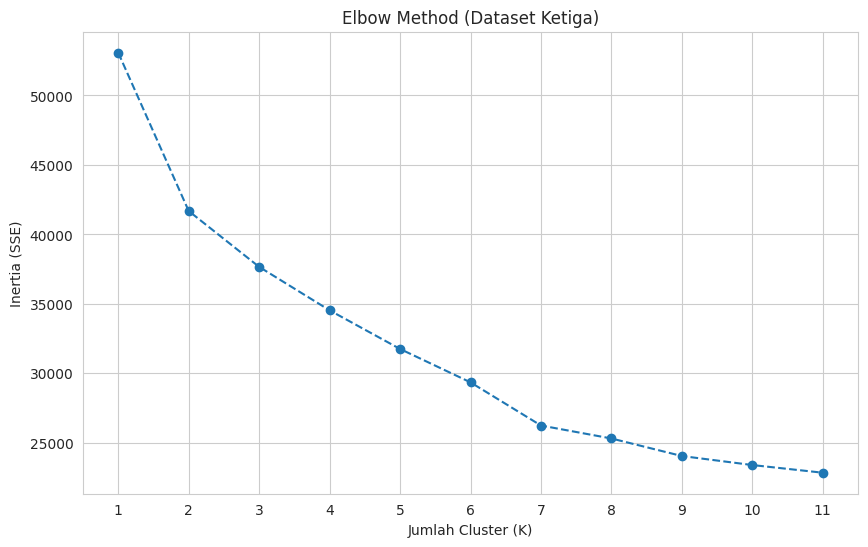


Dipilih K = 5 untuk clustering dataset ketiga.
Jika plot elbow menyarankan K yang berbeda, silakan ubah N_CLUSTERS_DS3 dan jalankan ulang bagian K-Means.

Lima baris pertama data ketiga dengan label cluster (dari df_ds3_subset):
      type rating_ds3 primary_genre_ds3  release_year  duration_minutes_ds3  \
0  TV Show      TV-MA     documentation          1945                     0   
1    Movie          R             drama          1976                   114   
2    Movie          R             drama          1972                   109   
3    Movie         PG           fantasy          1975                    91   
4    Movie    Unknown               war          1967                   150   

   num_seasons_ds3  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0              1.0         6.6      2233.5            0.600       6.900   
1              0.0         8.2    808582.0           40.965       8.179   
2              0.0         7.7    107673.0           10.010       7.30

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# X_ds3_prepared adalah data yang sudah siap dari langkah sebelumnya untuk dataset ketiga
# df_ds3_subset adalah DataFrame sebelum di-encode/scale untuk dataset ketiga

# 1. Menentukan K optimal menggunakan Elbow Method
inertia_ds3 = []
# Rentang K yang akan dicoba
k_range_ds3 = range(1, 12)

print("Menghitung inertia untuk berbagai nilai K (Elbow Method) pada dataset ketiga...")
for k_val_ds3 in k_range_ds3:
    kmeans_elbow_ds3 = KMeans(n_clusters=k_val_ds3, init='k-means++', random_state=42, n_init='auto')
    kmeans_elbow_ds3.fit(X_ds3_prepared)
    inertia_ds3.append(kmeans_elbow_ds3.inertia_)

# Plot Elbow Method untuk dataset ketiga
plt.figure(figsize=(10, 6))
plt.plot(k_range_ds3, inertia_ds3, marker='o', linestyle='--')
plt.title('Elbow Method (Dataset Ketiga)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.xticks(k_range_ds3)
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------------
# Setelah melihat plot elbow, Anda perlu memutuskan nilai K_DS3.
# Untuk contoh, kita akan pilih K_DS3=5. Anda HARUS menyesuaikan ini.
# ---------------------------------------------------------------------------
N_CLUSTERS_DS3 = 5 # GANTI INI BERDASARKAN PLOT ELBOW BARU ANDA
print(f"\nDipilih K = {N_CLUSTERS_DS3} untuk clustering dataset ketiga.")
print("Jika plot elbow menyarankan K yang berbeda, silakan ubah N_CLUSTERS_DS3 dan jalankan ulang bagian K-Means.")

# 2. Menjalankan K-Means dengan K yang dipilih untuk dataset ketiga
kmeans_ds3 = KMeans(n_clusters=N_CLUSTERS_DS3, init='k-means++', random_state=42, n_init='auto')
cluster_labels_ds3 = kmeans_ds3.fit_predict(X_ds3_prepared)

# 3. Menambahkan label cluster kembali ke DataFrame (df_ds3_subset)
df_ds3_clustered = df_ds3_subset.copy()
df_ds3_clustered['cluster'] = cluster_labels_ds3

print(f"\nLima baris pertama data ketiga dengan label cluster (dari df_ds3_subset):")
print(df_ds3_clustered.head())

print(f"\nDistribusi item per cluster (Dataset Ketiga):")
print(df_ds3_clustered['cluster'].value_counts().sort_index())

# Karakteristik tiap cluster (Dataset Ketiga)
print("\nKarakteristik Rata-Rata Fitur Numerik per Cluster (Dataset Ketiga):")
# Fitur numerik asli yang dipilih untuk dataset ketiga
numerical_features_for_analysis_ds3 = [
    'release_year', 'duration_minutes_ds3', 'num_seasons_ds3',
    'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'
]
print(df_ds3_clustered.groupby('cluster')[numerical_features_for_analysis_ds3].mean())

print("\nKarakteristik Modus Fitur Kategorikal per Cluster (Dataset Ketiga):")
# Fitur kategorikal asli yang dipilih untuk dataset ketiga
categorical_features_for_analysis_ds3 = ['type', 'rating_ds3', 'primary_genre_ds3']
for col_cat_ds3 in categorical_features_for_analysis_ds3:
    print(f"\nModus untuk '{col_cat_ds3}' per cluster (Dataset Ketiga):")
    print(df_ds3_clustered.groupby('cluster')[col_cat_ds3].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A"))


Interpretasi Hasil Cluster (Dataset Ketiga, K=5)
Berikut adalah ringkasan dan perkiraan interpretasi untuk setiap cluster:

Cluster 0: "Serial TV Drama Kontemporer Populer"

Jumlah Anggota: 2034
Tipe Dominan: TV Show
Rating Dominan (rating_ds3): TV-MA
Genre Dominan (primary_genre_ds3): drama
Rata-rata Tahun Rilis: ~2017-2018
Rata-rata Durasi: ~2.17 musim (duration_minutes_ds3 0)
Skor Rata-rata: imdb_score ~7.0, imdb_votes ~14,200, tmdb_popularity ~24, tmdb_score ~7.5
Interpretasi: Cluster ini mayoritas berisi serial TV, didominasi drama dengan rating TV-MA. Serial-serial ini relatif baru (rilis sekitar 2017-2018), memiliki sekitar 2 musim, dan mendapatkan skor serta popularitas yang cukup baik di IMDb dan TMDB.
Cluster 1: "Film Drama Kontemporer (Rating Tidak Diketahui)"

Jumlah Anggota: 2128 (Cluster terbesar)
Tipe Dominan: Movie
Rating Dominan (rating_ds3): Unknown (Ini poin penting, banyak yang tidak ada sertifikasi usianya)
Genre Dominan (primary_genre_ds3): drama
Rata-rata Tahun Rilis: ~2017-2018
Rata-rata Durasi: ~96 menit (num_seasons_ds3 0)
Skor Rata-rata: imdb_score ~6.8, imdb_votes ~15,000, tmdb_popularity ~16.7, tmdb_score ~7.0
Interpretasi: Ini adalah kelompok besar film, didominasi oleh drama yang relatif baru. Ciri khas utamanya adalah banyak film di cluster ini tidak memiliki informasi sertifikasi usia (rating_ds3 = 'Unknown'). Skor dan popularitasnya cukup baik.
Cluster 2: "Film Drama Klasik/Lama (Rating Tidak Diketahui, Vote Tinggi)"

Jumlah Anggota: 324
Tipe Dominan: Movie
Rating Dominan (rating_ds3): Unknown
Genre Dominan (primary_genre_ds3): drama
Rata-rata Tahun Rilis: ~1996 (lebih tua)
Rata-rata Durasi: ~115 menit (lebih panjang)
Skor Rata-rata: imdb_score ~6.85, imdb_votes ~90,400 (vote IMDb jauh lebih tinggi dari Cluster 0 & 1), tmdb_popularity ~16.9, tmdb_score ~6.7
Interpretasi: Cluster ini berisi film-film yang lebih tua (rilis pertengahan 1990-an), umumnya drama dengan durasi lebih panjang. Seperti Cluster 1, banyak yang tidak memiliki sertifikasi usia. Yang menarik adalah jumlah vote IMDb yang signifikan lebih tinggi, menandakan ini mungkin film-film klasik atau yang cukup dikenal dari era tersebut. Rata-rata num_seasons_ds3 yang kecil (0.13) bisa diabaikan karena modus tipenya adalah Movie.
Cluster 3: "Film Komedi Kontemporer (Skor Rendah, Rating Tidak Diketahui)"

Jumlah Anggota: 1340
Tipe Dominan: Movie
Rating Dominan (rating_ds3): Unknown
Genre Dominan (primary_genre_ds3): comedy
Rata-rata Tahun Rilis: ~2017-2018
Rata-rata Durasi: ~93 menit
Skor Rata-rata: imdb_score ~5.18 (paling rendah), imdb_votes ~7,700, tmdb_popularity ~26 (cukup populer di TMDB), tmdb_score ~5.55 (paling rendah)
Interpretasi: Cluster ini mengelompokkan film-film komedi yang relatif baru. Mayoritas juga tidak memiliki sertifikasi usia. Yang paling menonjol adalah skor IMDb dan TMDB yang jauh lebih rendah dibandingkan cluster lain, meskipun popularitas TMDB-nya lumayan. Ini bisa jadi film komedi yang populer tetapi tidak terlalu diapresiasi secara kritikal.
Cluster 4: "Film Populer & Berperingkat Tinggi (Niche/Blokbuster Lama)"

Jumlah Anggota: 24 (Cluster terkecil, berpotensi outlier atau grup sangat spesifik)
Tipe Dominan: Movie
Rating Dominan (rating_ds3): PG-13
Genre Dominan (primary_genre_ds3): drama
Rata-rata Tahun Rilis: ~2004 (lebih lama dari cluster kontemporer, tapi lebih baru dari Cluster 2)
Rata-rata Durasi: ~111 menit
Rata-rata Musim (num_seasons_ds3): 1.125 (Ini agak aneh untuk cluster yang modus tipenya 'Movie'. Kemungkinan ada beberapa serial TV dengan karakteristik serupa yang masuk ke sini, atau ini adalah artefak dari rata-rata pada kelompok yang sangat kecil).
Skor Rata-rata: imdb_score ~8.25 (sangat tinggi!), imdb_votes ~1.08 JUTA (sangat tinggi!), tmdb_popularity ~228 (sangat tinggi!), tmdb_score ~8.0 (tinggi!)
Interpretasi: Ini adalah cluster yang sangat kecil namun sangat berbeda. Isinya kemungkinan besar adalah film-film yang sangat terkenal, populer, dan mendapatkan rating tinggi (blockbuster atau film ikonik), umumnya dirilis awal tahun 2000-an dengan rating PG-13 dan genre dominan drama. Angka imdb_votes dan tmdb_popularity yang ekstrem tinggi adalah ciri utamanya. Rata-rata musim yang aneh perlu diwaspadai; mungkin ada beberapa item yang tidak sepenuhnya film murni.

Membuat visualisasi untuk fitur kategorikal (Dataset Ketiga)...


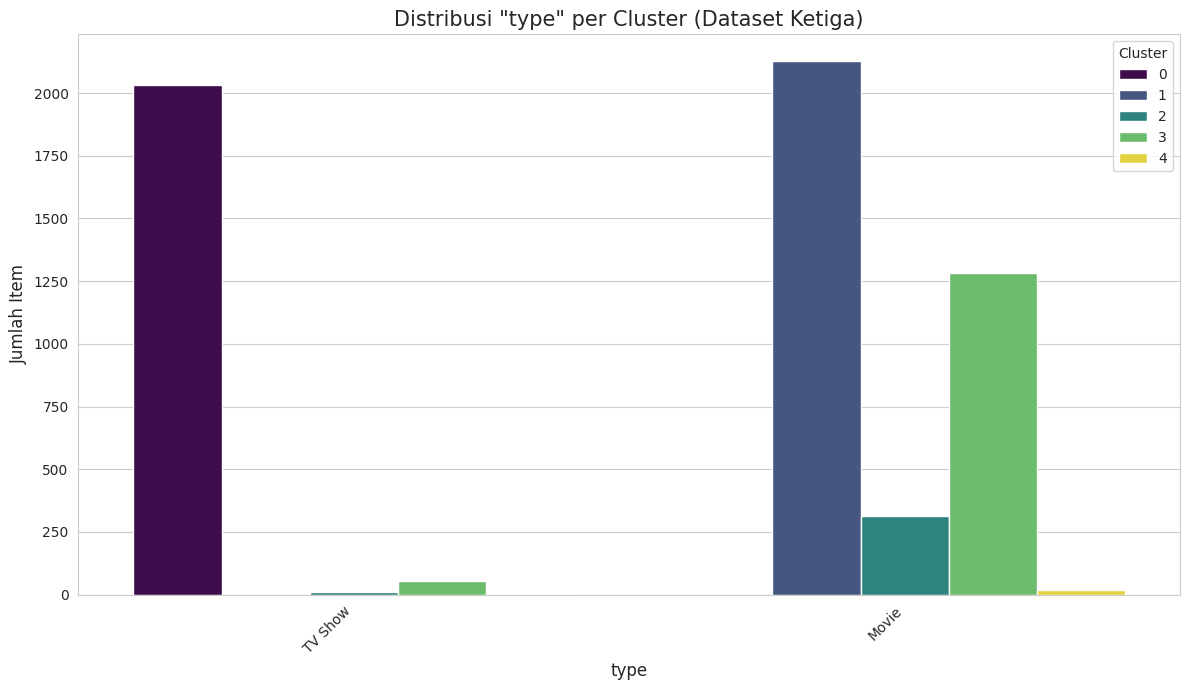

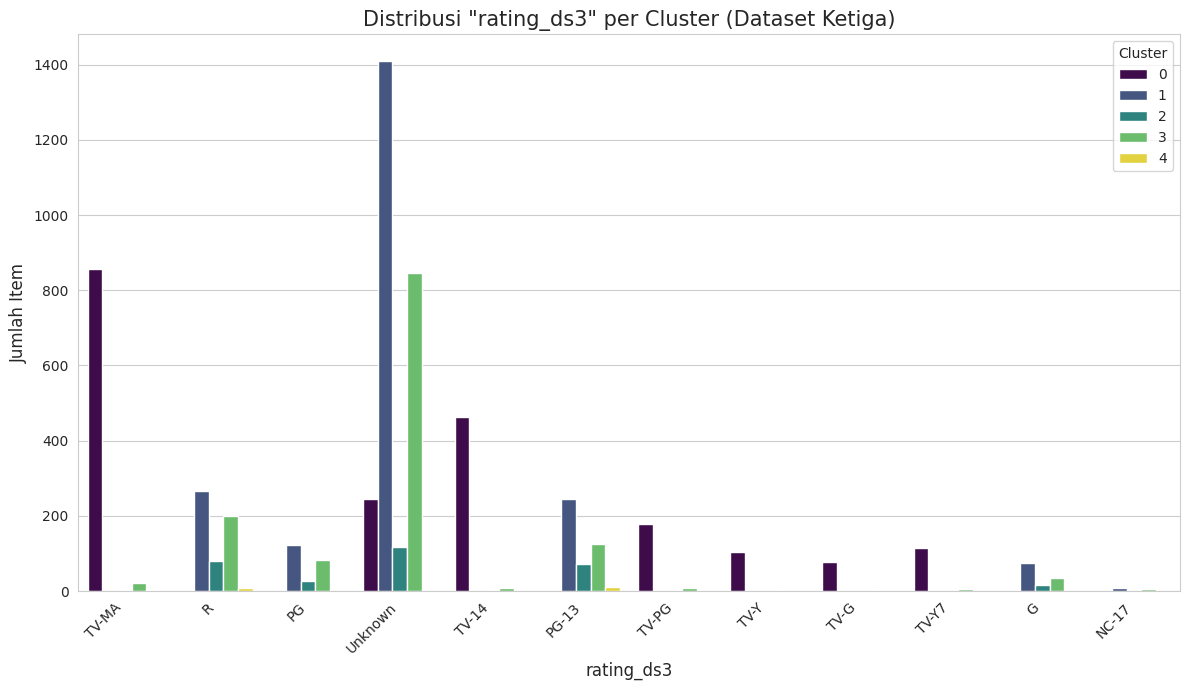

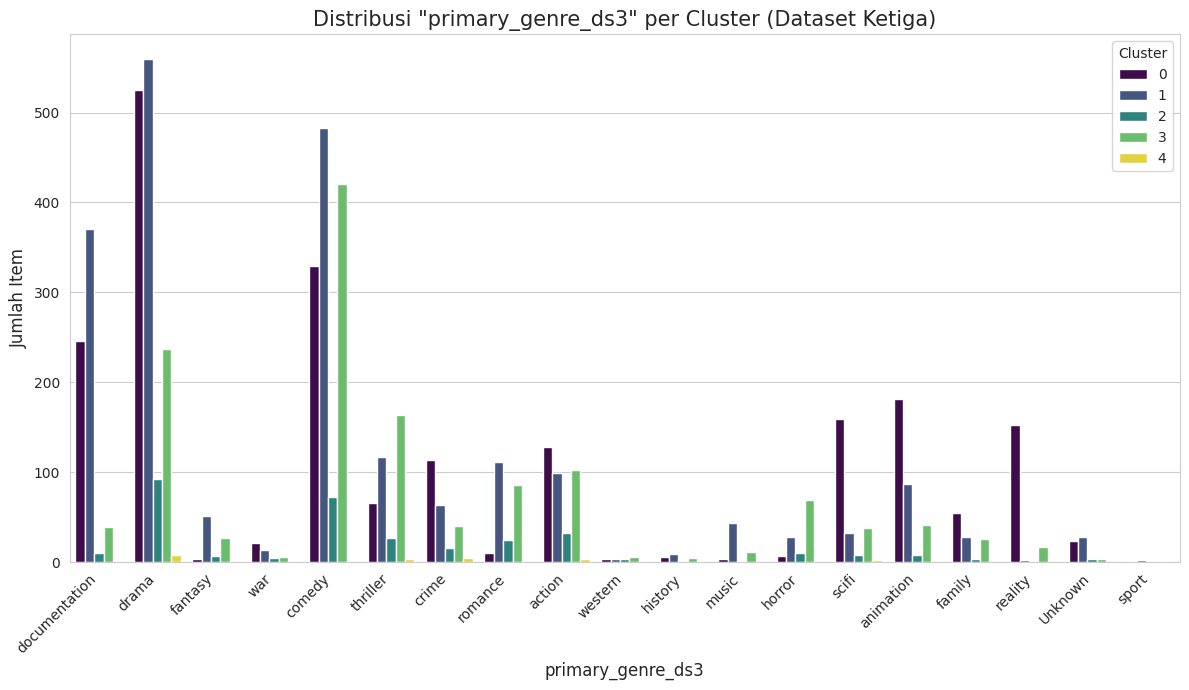


Membuat visualisasi untuk fitur numerik (Dataset Ketiga)...


<ipython-input-33-bf2427862e07>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds3_clustered, x='cluster', y=feature_num_ds3, palette='viridis')


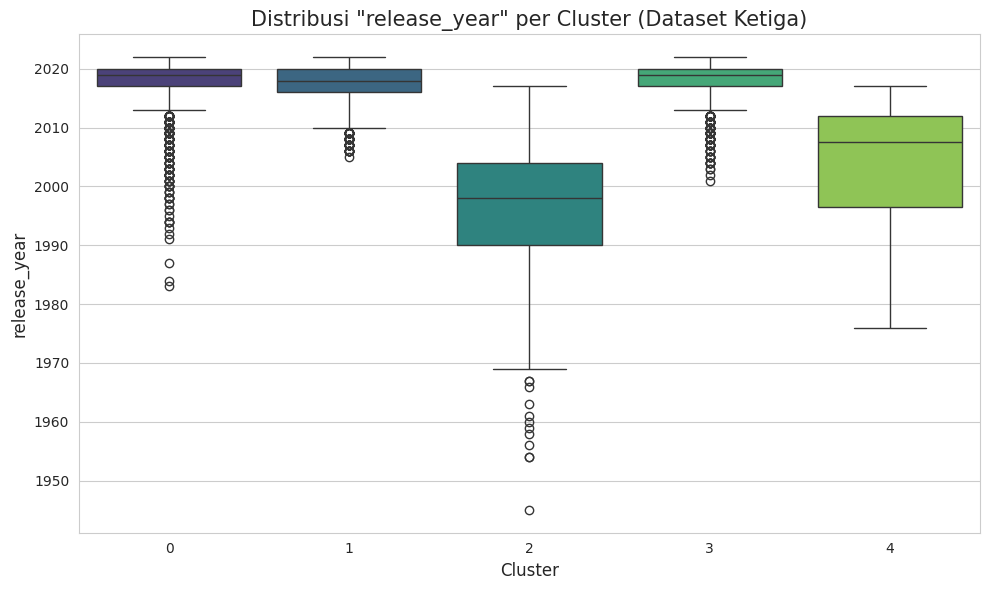

<ipython-input-33-bf2427862e07>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds3_clustered, x='cluster', y=feature_num_ds3, palette='viridis')


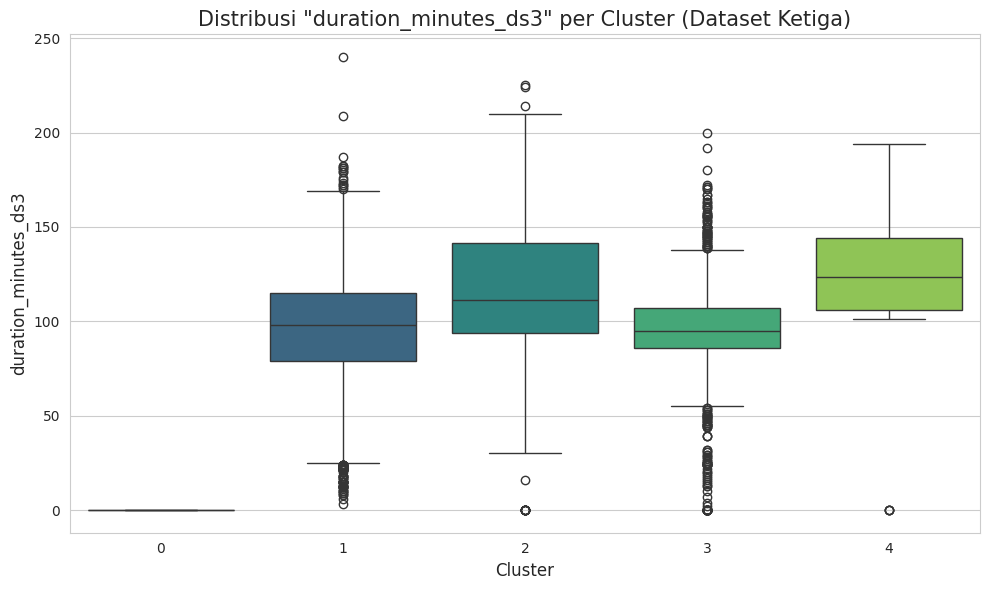

<ipython-input-33-bf2427862e07>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds3_clustered, x='cluster', y=feature_num_ds3, palette='viridis')


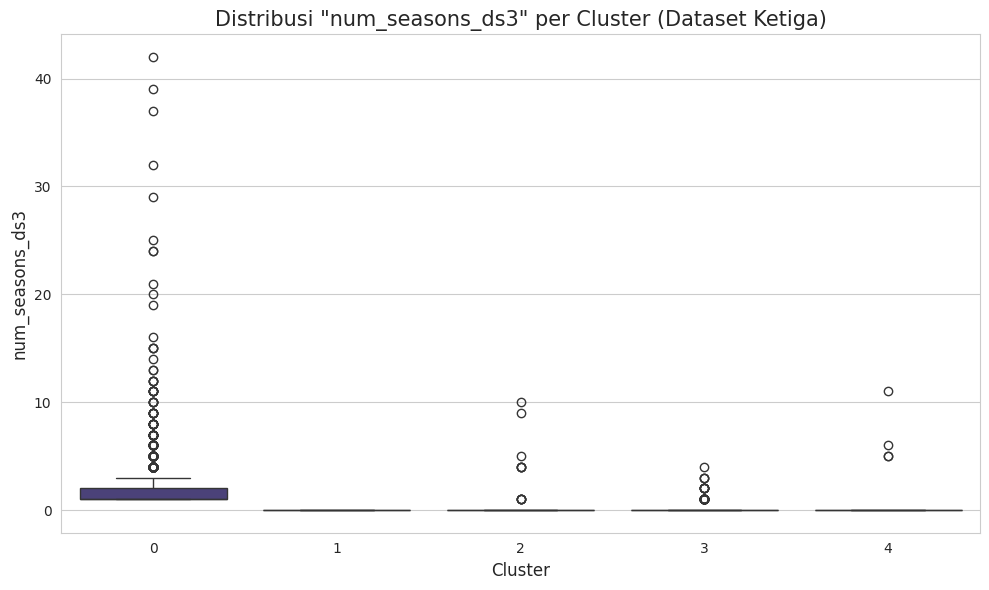

<ipython-input-33-bf2427862e07>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds3_clustered, x='cluster', y=feature_num_ds3, palette='viridis')


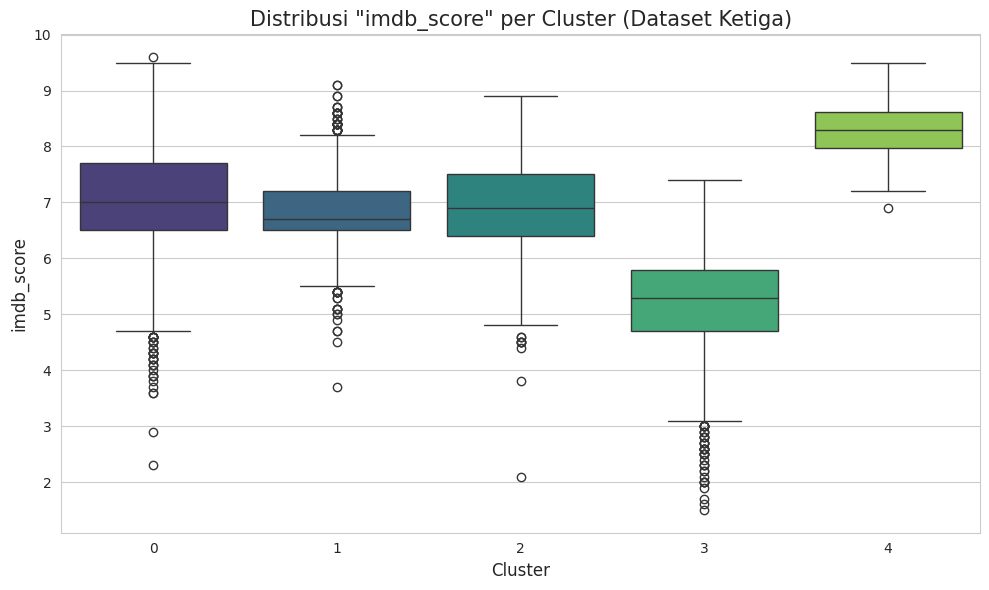

<ipython-input-33-bf2427862e07>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds3_clustered, x='cluster', y=feature_num_ds3, palette='viridis')


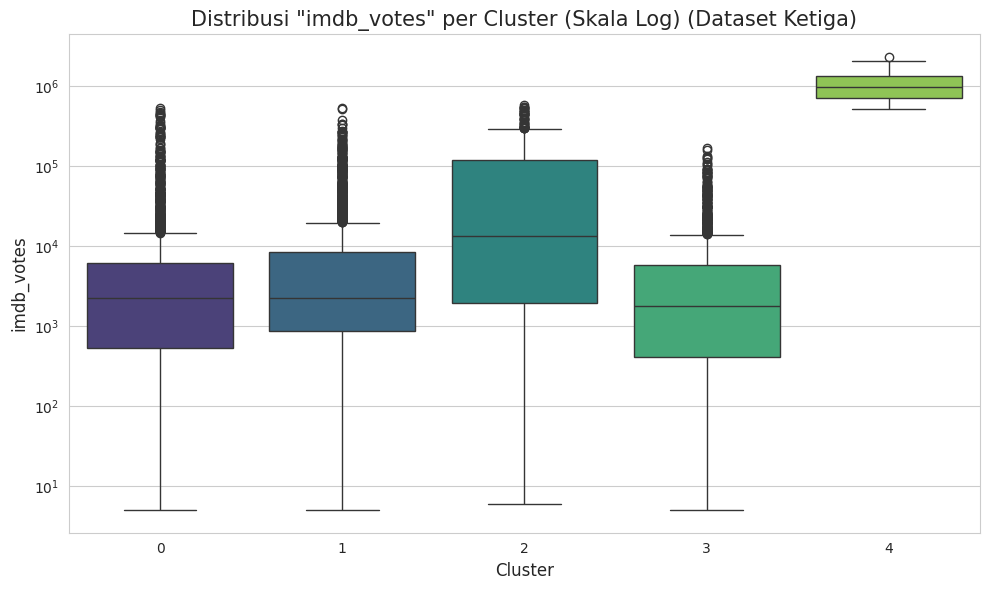

<ipython-input-33-bf2427862e07>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds3_clustered, x='cluster', y=feature_num_ds3, palette='viridis')


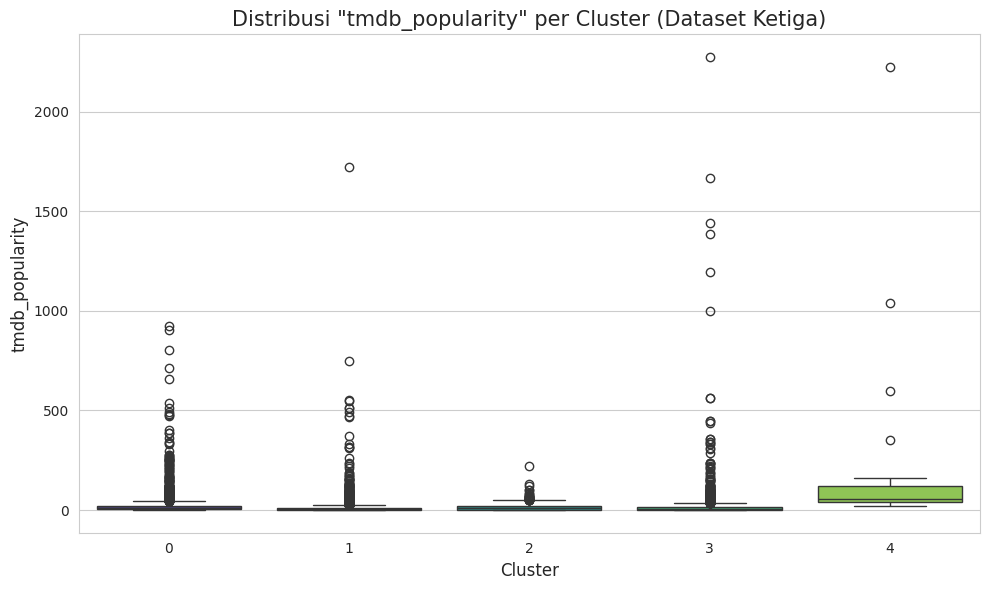

<ipython-input-33-bf2427862e07>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds3_clustered, x='cluster', y=feature_num_ds3, palette='viridis')


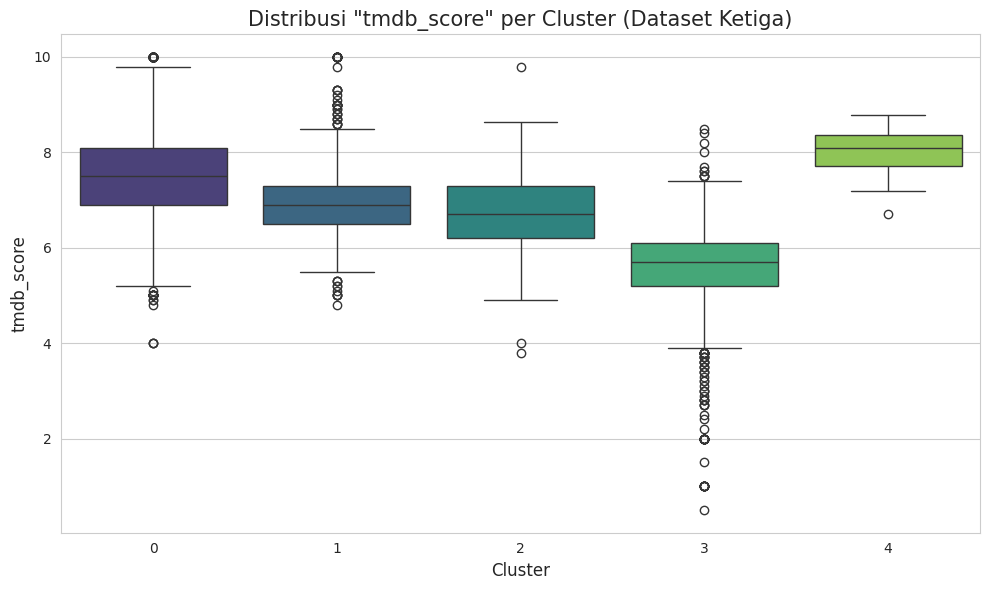

Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster dataset ketiga.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan df_ds3_clustered sudah ada dari langkah K-Means untuk dataset ketiga
# df_ds3_clustered berisi fitur-fitur asli dari df_ds3_subset dan kolom 'cluster'

# Set style untuk plot
sns.set_style("whitegrid")

# 1. Visualisasi Distribusi Fitur Kategorikal per Cluster (Dataset Ketiga)
categorical_features_ds3_viz = ['type', 'rating_ds3', 'primary_genre_ds3']

print("Membuat visualisasi untuk fitur kategorikal (Dataset Ketiga)...")
for feature_cat_ds3 in categorical_features_ds3_viz:
    plt.figure(figsize=(12, 7)) # Anda bisa sesuaikan ukuran jika perlu
    # Urutkan kategori berdasarkan frekuensi total untuk tampilan yang lebih rapi jika banyak kategori
    order = df_ds3_clustered[feature_cat_ds3].value_counts().index[:20] # Ambil top 20 kategori saja jika terlalu banyak
    sns.countplot(data=df_ds3_clustered, x=feature_cat_ds3, hue='cluster', palette='viridis', order=order if len(df_ds3_clustered[feature_cat_ds3].unique()) > 20 else None)
    plt.title(f'Distribusi "{feature_cat_ds3}" per Cluster (Dataset Ketiga)', fontsize=15)
    plt.xlabel(feature_cat_ds3, fontsize=12)
    plt.ylabel('Jumlah Item', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# 2. Visualisasi Distribusi Fitur Numerik per Cluster (Dataset Ketiga)
numerical_features_ds3_viz = [
    'release_year', 'duration_minutes_ds3', 'num_seasons_ds3',
    'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'
]

print("\nMembuat visualisasi untuk fitur numerik (Dataset Ketiga)...")
for feature_num_ds3 in numerical_features_ds3_viz:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_ds3_clustered, x='cluster', y=feature_num_ds3, palette='viridis')
    # Jika rentang nilai sangat besar (seperti imdb_votes, tmdb_popularity), pertimbangkan skala log
    if feature_num_ds3 in ['imdb_votes', 'tmdb_popularity'] and df_ds3_clustered[feature_num_ds3].max() > 10000 : # Contoh kondisi
        plt.yscale('log')
        plt.title(f'Distribusi "{feature_num_ds3}" per Cluster (Skala Log) (Dataset Ketiga)', fontsize=15)
    else:
        plt.title(f'Distribusi "{feature_num_ds3}" per Cluster (Dataset Ketiga)', fontsize=15)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature_num_ds3, fontsize=12)
    plt.tight_layout()
    plt.show()

print("Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster dataset ketiga.")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import f_oneway, chi2_contingency
import pandas as pd

# Pastikan X_ds3_prepared (data yang sudah di-encode dan scale untuk dataset ketiga),
# cluster_labels_ds3 (label cluster untuk dataset ketiga),
# df_ds3_clustered (data asli dengan kolom 'cluster' untuk dataset ketiga),
# dan N_CLUSTERS_DS3 sudah ada dari langkah-langkah sebelumnya.

print("--- Metrik Validitas Internal Cluster (Dataset Ketiga) ---")
if 'X_ds3_prepared' in locals() and 'cluster_labels_ds3' in locals() and 'N_CLUSTERS_DS3' in locals():
    silhouette_avg_ds3 = silhouette_score(X_ds3_prepared, cluster_labels_ds3)
    print(f"Rata-rata Silhouette Score untuk {N_CLUSTERS_DS3} clusters (Dataset Ketiga): {silhouette_avg_ds3:.4f}")

    db_score_ds3 = davies_bouldin_score(X_ds3_prepared, cluster_labels_ds3)
    print(f"Davies-Bouldin Index (Dataset Ketiga): {db_score_ds3:.4f}")

    ch_score_ds3 = calinski_harabasz_score(X_ds3_prepared, cluster_labels_ds3)
    print(f"Calinski-Harabasz Index (Dataset Ketiga): {ch_score_ds3:.4f}")
else:
    print("Variabel X_ds3_prepared, cluster_labels_ds3, atau N_CLUSTERS_DS3 tidak ditemukan. Tidak dapat menghitung metrik validitas.")

print("\n--- Analisis Perbedaan Fitur Antar Cluster (Dataset Ketiga) ---")

# ANOVA untuk Fitur Numerik (Dataset Ketiga)
# Fitur numerik asli yang dipilih untuk dataset ketiga (pastikan ini sesuai dengan yang digunakan)
numerical_features_for_analysis_ds3 = [
    'release_year', 'duration_minutes_ds3', 'num_seasons_ds3',
    'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'
]
print("\n Hasil ANOVA untuk Fitur Numerik (Dataset Ketiga):")
if 'df_ds3_clustered' in locals() and 'N_CLUSTERS_DS3' in locals():
    for feature_num_ds3 in numerical_features_for_analysis_ds3:
        if feature_num_ds3 in df_ds3_clustered.columns:
            # Membuat list data per cluster untuk fitur ini
            grouped_data_ds3 = [df_ds3_clustered[feature_num_ds3][df_ds3_clustered['cluster'] == i] for i in range(N_CLUSTERS_DS3)]
            # Menghilangkan cluster kosong jika ada (seharusnya tidak untuk K-Means standar)
            grouped_data_cleaned_ds3 = [group for group in grouped_data_ds3 if not group.empty]

            if len(grouped_data_cleaned_ds3) > 1: # ANOVA butuh setidaknya 2 grup
                f_statistic_ds3, p_value_ds3 = f_oneway(*grouped_data_cleaned_ds3)
                print(f"  Fitur: {feature_num_ds3}")
                print(f"    F-statistic: {f_statistic_ds3:.4f}")
                print(f"    P-value: {p_value_ds3:.4g}")
                if p_value_ds3 < 0.05:
                    print("    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).")
                else:
                    print("    Kesimpulan: Tidak ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p >= 0.05).")
            else:
                print(f"  Fitur: {feature_num_ds3} - Tidak cukup grup data untuk ANOVA.")
        else:
            print(f"  Fitur: {feature_num_ds3} tidak ditemukan di df_ds3_clustered.")
else:
    print("Variabel df_ds3_clustered atau N_CLUSTERS_DS3 tidak ditemukan. Tidak dapat melakukan ANOVA.")

# Chi-square Test untuk Fitur Kategorikal (Dataset Ketiga)
# Fitur kategorikal asli yang dipilih untuk dataset ketiga
categorical_features_for_analysis_ds3 = ['type', 'rating_ds3', 'primary_genre_ds3']
print("\n Hasil Chi-square Test untuk Fitur Kategorikal (Dataset Ketiga):")
if 'df_ds3_clustered' in locals():
    for feature_cat_ds3 in categorical_features_for_analysis_ds3:
        if feature_cat_ds3 in df_ds3_clustered.columns:
            contingency_table_ds3 = pd.crosstab(df_ds3_clustered[feature_cat_ds3], df_ds3_clustered['cluster'])
            chi2_ds3, p_value_ds3, dof_ds3, expected_ds3 = chi2_contingency(contingency_table_ds3)
            print(f"  Fitur: {feature_cat_ds3}")
            print(f"    Chi-square statistic: {chi2_ds3:.4f}")
            print(f"    P-value: {p_value_ds3:.4g}")
            print(f"    Degrees of Freedom: {dof_ds3}")
            if p_value_ds3 < 0.05:
                print("    Kesimpulan: Ada hubungan yang signifikan secara statistik antara fitur dan cluster (p < 0.05).")
            else:
                print("    Kesimpulan: Tidak ada hubungan yang signifikan secara statistik antara fitur dan cluster (p >= 0.05).")
        else:
            print(f"  Fitur: {feature_cat_ds3} tidak ditemukan di df_ds3_clustered.")
else:
    print("Variabel df_ds3_clustered tidak ditemukan. Tidak dapat melakukan Chi-square test.")

--- Metrik Validitas Internal Cluster (Dataset Ketiga) ---
Rata-rata Silhouette Score untuk 5 clusters (Dataset Ketiga): 0.1959
Davies-Bouldin Index (Dataset Ketiga): 1.4506
Calinski-Harabasz Index (Dataset Ketiga): 980.8963

--- Analisis Perbedaan Fitur Antar Cluster (Dataset Ketiga) ---

 Hasil ANOVA untuk Fitur Numerik (Dataset Ketiga):
  Fitur: release_year
    F-statistic: 1682.0905
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: duration_minutes_ds3
    F-statistic: 4479.4757
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: num_seasons_ds3
    F-statistic: 572.5012
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: imdb_score
    F-statistic: 1152.3619
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05)

Hasil tes signifikansi untuk dataset ketiga ini juga sangat bagus dan menunjukkan bahwa cluster yang terbentuk memiliki dasar statistik yang kuat! 📊

Analisis Hasil Tes Signifikansi (Dataset Ketiga)
Metrik Validitas Internal Cluster
Rata-rata Silhouette Score: 0.1959
Skor ini adalah yang tertinggi dari ketiga dataset yang telah kita proses (sebelumnya 0.1637 dan 0.1709). Ini menunjukkan bahwa, secara rata-rata, objek pada dataset ketiga ini memiliki kohesi (kemiripan dalam cluster sendiri) dan separasi (perbedaan dengan cluster lain) yang relatif paling baik di antara ketiga dataset. Semakin mendekati 1, semakin baik.
Davies-Bouldin Index: 1.4506
Nilai ini adalah yang terendah dari ketiga dataset (sebelumnya 1.6142 dan 1.9223). Untuk Davies-Bouldin, nilai yang lebih rendah menunjukkan pemisahan cluster yang lebih baik. Ini juga hasil yang positif.
Calinski-Harabasz Index: 980.8963
Skor ini lebih rendah dibandingkan dua dataset sebelumnya (sekitar 1750-an). Meskipun demikian, ini masih merupakan nilai yang menunjukkan adanya struktur cluster. Perbedaan nilai absolut bisa dipengaruhi oleh jumlah data, jumlah fitur, dan skala fitur. Yang lebih penting adalah konsistensinya dengan metrik lain dan signifikansi perbedaan fitur.
Secara keseluruhan, metrik validitas internal, terutama Silhouette Score yang meningkat dan Davies-Bouldin yang menurun, menunjukkan bahwa pembentukan cluster pada dataset ketiga ini cukup baik dan mungkin yang paling terstruktur dibandingkan dua dataset sebelumnya, meskipun Calinski-Harabasz sedikit berbeda.

Analisis Perbedaan Fitur Antar Cluster (ANOVA & Chi-square)
Hasil ANOVA untuk Fitur Numerik:

Untuk SEMUA fitur numerik yang diuji (release_year, duration_minutes_ds3, num_seasons_ds3, imdb_score, imdb_votes, tmdb_popularity, tmdb_score), P-value sangat kecil (0 atau mendekati 0).
Kesimpulan: Ini kembali menunjukkan adanya perbedaan rata-rata yang sangat signifikan secara statistik untuk semua fitur numerik ini di antara kelima cluster pada dataset ketiga. Ini sangat mendukung bahwa cluster-cluster tersebut memang berbeda berdasarkan karakteristik numeriknya, termasuk fitur-fitur baru seperti skor dan popularitas IMDb/TMDB.
Hasil Chi-square Test untuk Fitur Kategorikal:

Untuk SEMUA fitur kategorikal yang diuji (type, rating_ds3, primary_genre_ds3), P-value sangat kecil (0 atau mendekati 0).
Kesimpulan: Ini juga menunjukkan adanya hubungan yang sangat signifikan secara statistik antara masing-masing fitur kategorikal ini dan keanggotaan cluster pada dataset ketiga. Distribusi kategori dalam fitur-fitur ini berbeda secara signifikan antar cluster.

In [ ]:
import pandas as pd

file_path_ds4 = '/kaggle/movies-on-netflix-prime-video-hulu-and-disney/tv_shows.csv'
print(f"Memuat dataset dari: {file_path_ds4}")

df_ds4 = None # Initialize df_ds4 to None

try:
    # Mencoba dengan encoding utf-8 terlebih dahulu
    df_ds4 = pd.read_csv(file_path_ds4, encoding='utf-8')
    print("Dataset keempat berhasil dimuat dengan encoding 'utf-8'! ✅")
except UnicodeDecodeError:
    print("Gagal memuat dengan 'utf-8', mencoba 'latin1'...")
    try:
        df_ds4 = pd.read_csv(file_path_ds4, encoding='latin1')
        print("Dataset keempat berhasil dimuat dengan encoding 'latin1'! ✅")
    except UnicodeDecodeError:
        print("Gagal memuat dengan 'latin1', mencoba 'iso-8859-1'...")
        try:
            df_ds4 = pd.read_csv(file_path_ds4, encoding='iso-8859-1')
            print("Dataset keempat berhasil dimuat dengan encoding 'iso-8859-1'! ✅")
        except UnicodeDecodeError:
            print("Gagal memuat dengan 'iso-8859-1', mencoba 'cp1252'...")
            try:
                df_ds4 = pd.read_csv(file_path_ds4, encoding='cp1252')
                print("Dataset keempat berhasil dimuat dengan encoding 'cp1252'! ✅")
            except Exception as e:
                print(f"❌ Gagal memuat dataset keempat dengan semua encoding yang dicoba. Error: {e} 💥")
except FileNotFoundError:
    print(f"❌ File tidak ditemukan di path: {file_path_ds4}")
    print("Pastikan path file sudah benar.")
except Exception as e:
    print(f"Terjadi error lain saat memuat dataset keempat: {e} 💥")

# Jika dataset berhasil dimuat, tampilkan informasinya
if df_ds4 is not None:
    print("\nLima baris pertama dataset keempat:")
    print(df_ds4.head())

    print("\nInformasi dataset keempat:")
    df_ds4.info()

    print("\nStatistik deskriptif dataset keempat (untuk kolom numerik):")
    print(df_ds4.describe())

    print("\nStatistik deskriptif dataset keempat (untuk kolom objek/kategorikal):")
    print(df_ds4.describe(include='object'))

    print("\nJumlah nilai unik di setiap kolom dataset keempat:")
    for col in df_ds4.columns:
        # Periksa apakah kolom ada sebelum memanggil nunique
        if col in df_ds4.columns:
            print(f"- {col}: {df_ds4[col].nunique()} nilai unik")
        else:
            print(f"- {col}: (Kolom tidak ditemukan setelah pembersihan awal jika ada)")

    print("\nContoh beberapa nilai unik untuk setiap kolom dataset keempat:")
    for col in df_ds4.columns:
        if col not in df_ds4.columns or df_ds4[col].nunique() == 0: # Periksa lagi jika kolom ada
            print(f"- {col}: (Kolom kosong atau tidak ditemukan)")
            continue
        unique_values = df_ds4[col].unique()
        display_limit = 10
        if pd.api.types.is_numeric_dtype(df_ds4[col].dtype) and df_ds4[col].nunique() > 20:
             print(f"- {col} (numerik dengan >20 nilai unik): Min={df_ds4[col].min()}, Max={df_ds4[col].max()}, {df_ds4[col].nunique()} nilai unik")
        elif len(unique_values) > display_limit:
            print(f"- {col} (contoh): {unique_values[:display_limit]} ... (total {len(unique_values)} unik)")
        else:
            print(f"- {col}: {unique_values}")
else:
    print("Dataset keempat tidak berhasil dimuat, tidak ada informasi untuk ditampilkan.")

Memuat dataset dari: /kaggle/movies-on-netflix-prime-video-hulu-and-disney/tv_shows.csv
Dataset keempat berhasil dimuat dengan encoding 'utf-8'! ✅

Lima baris pertama dataset keempat:
   Unnamed: 0  ID             Title  Year  Age    IMDb Rotten Tomatoes  \
0           0   1      Breaking Bad  2008  18+  9.4/10         100/100   
1           1   2   Stranger Things  2016  16+  8.7/10          96/100   
2           2   3   Attack on Titan  2013  18+  9.0/10          95/100   
3           3   4  Better Call Saul  2015  18+  8.8/10          94/100   
4           4   5              Dark  2017  16+  8.8/10          93/100   

   Netflix  Hulu  Prime Video  Disney+  Type  
0        1     0            0        0     1  
1        1     0            0        0     1  
2        1     1            0        0     1  
3        1     0            0        0     1  
4        1     0            0        0     1  

Informasi dataset keempat:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entrie

In [ ]:
import pandas as pd
import numpy as np

# df_ds4 adalah DataFrame yang sudah dimuat untuk dataset keempat
# Pastikan df_ds4 sudah ada.

# Salin dataframe
df_ds4_processed = df_ds4.copy()

# 1. Membuang Kolom Tidak Perlu
cols_to_drop_ds4 = ['Unnamed: 0', 'ID', 'Type']
df_ds4_processed = df_ds4_processed.drop(columns=cols_to_drop_ds4)
print(f"Kolom berikut telah dihapus: {cols_to_drop_ds4}")

# 2. Memproses Kolom 'Age' (sebagai fitur rating_ds4)
# Kita isi missing values dengan 'Unknown' karena cukup banyak
df_ds4_processed['rating_ds4'] = df_ds4_processed['Age'].fillna('Unknown')

# 3. Memproses Kolom 'IMDb'
def parse_imdb_score(score_str):
    if pd.isna(score_str):
        return np.nan
    try:
        # Ambil bagian sebelum '/' dan konversi ke float
        return float(score_str.split('/')[0])
    except:
        return np.nan # Jika ada format aneh

df_ds4_processed['imdb_score_ds4'] = df_ds4_processed['IMDb'].apply(parse_imdb_score)
# Isi missing values hasil parsing dengan median
median_imdb = df_ds4_processed['imdb_score_ds4'].median()
df_ds4_processed['imdb_score_ds4'] = df_ds4_processed['imdb_score_ds4'].fillna(median_imdb)

# 4. Memproses Kolom 'Rotten Tomatoes'
def parse_rt_score(score_str):
    if pd.isna(score_str):
        return np.nan
    try:
        # Ambil bagian sebelum '/' dan konversi ke float (nilai 0-100)
        return float(score_str.split('/')[0])
    except:
        return np.nan

df_ds4_processed['rt_score_ds4'] = df_ds4_processed['Rotten Tomatoes'].apply(parse_rt_score)
# Isi missing values hasil parsing (jika ada) dengan median
# Meskipun info awal bilang tidak ada NaN, parsing bisa menghasilkan NaN jika formatnya tidak terduga
median_rt = df_ds4_processed['rt_score_ds4'].median()
df_ds4_processed['rt_score_ds4'] = df_ds4_processed['rt_score_ds4'].fillna(median_rt)


# Menampilkan beberapa kolom yang relevan dan info
print("\nLima baris pertama df_ds4_processed (beberapa kolom terpilih):")
cols_to_show_ds4 = ['Title', 'Year', 'rating_ds4', 'imdb_score_ds4', 'rt_score_ds4',
                    'Netflix', 'Hulu', 'Prime Video', 'Disney+']
print(df_ds4_processed[cols_to_show_ds4].head())

print("\nInformasi df_ds4_processed:")
df_ds4_processed.info()

print("\nJumlah missing values di df_ds4_processed setelah preprocessing:")
# Kita hanya periksa kolom yang akan kita gunakan atau kolom baru
check_cols_missing = ['Title', 'Year', 'rating_ds4', 'imdb_score_ds4', 'rt_score_ds4',
                      'Netflix', 'Hulu', 'Prime Video', 'Disney+']
print(df_ds4_processed[check_cols_missing].isnull().sum())

print("\nContoh nilai unik untuk kolom baru/modifikasi di df_ds4_processed:")
print(f"Rating (dari Age, contoh): {df_ds4_processed['rating_ds4'].unique()[:10]}")
print(f"IMDb Score (setelah parse, contoh): {df_ds4_processed['imdb_score_ds4'].dropna().unique()[:10]}")
print(f"Rotten Tomatoes Score (setelah parse, contoh): {df_ds4_processed['rt_score_ds4'].dropna().unique()[:10]}")

Kolom berikut telah dihapus: ['Unnamed: 0', 'ID', 'Type']

Lima baris pertama df_ds4_processed (beberapa kolom terpilih):
              Title  Year rating_ds4  imdb_score_ds4  rt_score_ds4  Netflix  \
0      Breaking Bad  2008        18+             9.4         100.0        1   
1   Stranger Things  2016        16+             8.7          96.0        1   
2   Attack on Titan  2013        18+             9.0          95.0        1   
3  Better Call Saul  2015        18+             8.8          94.0        1   
4              Dark  2017        16+             8.8          93.0        1   

   Hulu  Prime Video  Disney+  
0     0            0        0  
1     0            0        0  
2     1            0        0  
3     0            0        0  
4     0            0        0  

Informasi df_ds4_processed:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -------

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# df_ds4_processed adalah DataFrame dari langkah pra-pemrosesan sebelumnya untuk dataset keempat

# 1. Pilih fitur yang akan digunakan untuk dataset keempat
features_for_clustering_ds4 = [
    'rating_ds4',       # Kategorikal (dari Age)
    'Year',             # Numerik
    'imdb_score_ds4',   # Numerik
    'rt_score_ds4',     # Numerik
    'Netflix',          # Numerik (biner)
    'Hulu',             # Numerik (biner)
    'Prime Video',      # Numerik (biner)
    'Disney+'           # Numerik (biner)
]

df_ds4_subset = df_ds4_processed[features_for_clustering_ds4].copy()

# Identifikasi kolom numerik dan kategorikal untuk dataset keempat
numerical_features_ds4 = [
    'Year', 'imdb_score_ds4', 'rt_score_ds4',
    'Netflix', 'Hulu', 'Prime Video', 'Disney+'
]
categorical_features_ds4 = ['rating_ds4']

# Membuat preprocessor pipeline
preprocessor_ds4 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_ds4),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_ds4)
    ],
    remainder='passthrough'
)

# Terapkan preprocessor ke data (df_ds4_subset)
X_ds4_prepared = preprocessor_ds4.fit_transform(df_ds4_subset)

# Mendapatkan nama fitur setelah One-Hot Encoding
try:
    onehot_cols_ds4 = preprocessor_ds4.named_transformers_['cat'].get_feature_names_out(categorical_features_ds4)
    feature_names_prepared_ds4 = numerical_features_ds4 + list(onehot_cols_ds4)
    df_ds4_prepared = pd.DataFrame(X_ds4_prepared, columns=feature_names_prepared_ds4, index=df_ds4_subset.index)

    print("Lima baris pertama data keempat yang sudah di-encode dan di-scale (df_ds4_prepared):")
    print(df_ds4_prepared.head())
    print(f"\nDimensi data keempat yang sudah diproses (X_ds4_prepared): {X_ds4_prepared.shape}")
    print("Data keempat siap untuk clustering! ✅")

    print("\nInformasi df_ds4_prepared:")
    df_ds4_prepared.info()

except Exception as e:
    print(f"Error saat mengambil nama fitur atau membuat df_ds4_prepared: {e}")
    print("Namun, X_ds4_prepared (NumPy array) seharusnya sudah siap untuk clustering.")
    print(f"\nDimensi data keempat yang sudah diproses (X_ds4_prepared): {X_ds4_prepared.shape}")
    print(X_ds4_prepared[:5])

# Variabel X_ds4_prepared akan digunakan untuk clustering dataset keempat ini.

Lima baris pertama data keempat yang sudah di-encode dan di-scale (df_ds4_prepared):
       Year  imdb_score_ds4  rt_score_ds4   Netflix      Hulu  Prime Video  \
0 -0.456398        2.245644      2.699182  1.312818 -0.657733    -0.719493   
1  0.332412        1.554869      2.494620  1.312818 -0.657733    -0.719493   
2  0.036608        1.850915      2.443479  1.312818  1.520374    -0.719493   
3  0.233810        1.653551      2.392338  1.312818 -0.657733    -0.719493   
4  0.431013        1.653551      2.341198  1.312818 -0.657733    -0.719493   

    Disney+  rating_ds4_13+  rating_ds4_16+  rating_ds4_18+  rating_ds4_7+  \
0 -0.264504             0.0             0.0             1.0            0.0   
1 -0.264504             0.0             1.0             0.0            0.0   
2 -0.264504             0.0             0.0             1.0            0.0   
3 -0.264504             0.0             0.0             1.0            0.0   
4 -0.264504             0.0             1.0             

Menghitung inertia untuk berbagai nilai K (Elbow Method) pada dataset keempat...


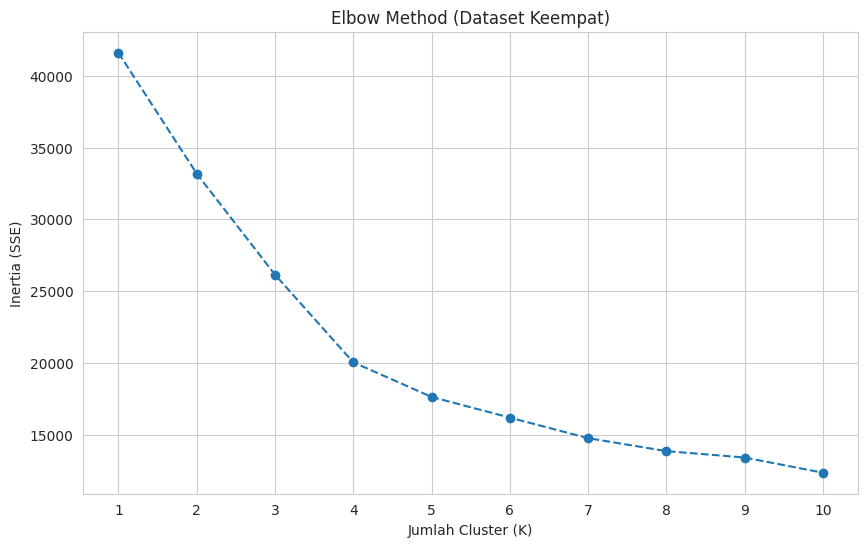


Dipilih K = 4 untuk clustering dataset keempat.
Jika plot elbow menyarankan K yang berbeda, silakan ubah N_CLUSTERS_DS4 dan jalankan ulang bagian K-Means.

Lima baris pertama data keempat dengan label cluster (dari df_ds4_subset):
  rating_ds4  Year  imdb_score_ds4  rt_score_ds4  Netflix  Hulu  Prime Video  \
0        18+  2008             9.4         100.0        1     0            0   
1        16+  2016             8.7          96.0        1     0            0   
2        18+  2013             9.0          95.0        1     1            0   
3        18+  2015             8.8          94.0        1     0            0   
4        16+  2017             8.8          93.0        1     0            0   

   Disney+  cluster  
0        0        2  
1        0        2  
2        0        0  
3        0        2  
4        0        2  

Distribusi item per cluster (Dataset Keempat):
cluster
0    1567
1    1635
2    1815
3     351
Name: count, dtype: int64

Karakteristik Rata-Rata Fitur Nu

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# X_ds4_prepared adalah data yang sudah siap dari langkah sebelumnya untuk dataset keempat
# df_ds4_subset adalah DataFrame sebelum di-encode/scale untuk dataset keempat

# 1. Menentukan K optimal menggunakan Elbow Method
inertia_ds4 = []
# Rentang K yang akan dicoba
k_range_ds4 = range(1, 11) # Kita coba 1-10 dulu, bisa disesuaikan jika perlu

print("Menghitung inertia untuk berbagai nilai K (Elbow Method) pada dataset keempat...")
for k_val_ds4 in k_range_ds4:
    kmeans_elbow_ds4 = KMeans(n_clusters=k_val_ds4, init='k-means++', random_state=42, n_init='auto')
    kmeans_elbow_ds4.fit(X_ds4_prepared)
    inertia_ds4.append(kmeans_elbow_ds4.inertia_)

# Plot Elbow Method untuk dataset keempat
plt.figure(figsize=(10, 6))
plt.plot(k_range_ds4, inertia_ds4, marker='o', linestyle='--')
plt.title('Elbow Method (Dataset Keempat)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.xticks(k_range_ds4)
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------------
# Setelah melihat plot elbow, Anda perlu memutuskan nilai K_DS4.
# Untuk contoh, kita akan pilih K_DS4=4 (atau 5). Anda HARUS menyesuaikan ini.
# ---------------------------------------------------------------------------
N_CLUSTERS_DS4 = 4 # GANTI INI BERDASARKAN PLOT ELBOW BARU ANDA
print(f"\nDipilih K = {N_CLUSTERS_DS4} untuk clustering dataset keempat.")
print("Jika plot elbow menyarankan K yang berbeda, silakan ubah N_CLUSTERS_DS4 dan jalankan ulang bagian K-Means.")

# 2. Menjalankan K-Means dengan K yang dipilih untuk dataset keempat
kmeans_ds4 = KMeans(n_clusters=N_CLUSTERS_DS4, init='k-means++', random_state=42, n_init='auto')
cluster_labels_ds4 = kmeans_ds4.fit_predict(X_ds4_prepared)

# 3. Menambahkan label cluster kembali ke DataFrame (df_ds4_subset)
df_ds4_clustered = df_ds4_subset.copy()
df_ds4_clustered['cluster'] = cluster_labels_ds4

print(f"\nLima baris pertama data keempat dengan label cluster (dari df_ds4_subset):")
print(df_ds4_clustered.head())

print(f"\nDistribusi item per cluster (Dataset Keempat):")
print(df_ds4_clustered['cluster'].value_counts().sort_index())

# Karakteristik tiap cluster (Dataset Keempat)
print("\nKarakteristik Rata-Rata Fitur Numerik per Cluster (Dataset Keempat):")
# Fitur numerik asli yang dipilih untuk dataset keempat
numerical_features_for_analysis_ds4 = [
    'Year', 'imdb_score_ds4', 'rt_score_ds4',
    'Netflix', 'Hulu', 'Prime Video', 'Disney+'
]
print(df_ds4_clustered.groupby('cluster')[numerical_features_for_analysis_ds4].mean())

print("\nKarakteristik Modus Fitur Kategorikal per Cluster (Dataset Keempat):")
# Fitur kategorikal asli yang dipilih untuk dataset keempat
categorical_features_for_analysis_ds4 = ['rating_ds4']
for col_cat_ds4 in categorical_features_for_analysis_ds4:
    print(f"\nModus untuk '{col_cat_ds4}' per cluster (Dataset Keempat):")
    print(df_ds4_clustered.groupby('cluster')[col_cat_ds4].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A"))

Analisis Plot Elbow (Dataset Keempat)
elbow chart k means

Melihat plot elbow untuk dataset keempat:

Penurunan inertia tajam dari K=1 ke K=2, dan masih cukup baik dari K=2 ke K=3.
Penurunan dari K=3 ke K=4 juga masih terlihat.
Setelah K=4, kurva mulai melandai secara signifikan.
Pilihan K=4 tampak sangat masuk akal dan merupakan "siku" yang jelas pada plot ini. 👍

Interpretasi Hasil Cluster (Dataset Keempat, K=4)
Berikut adalah ringkasan dan perkiraan interpretasi untuk setiap cluster pada dataset keempat ini, yang didasarkan pada fitur tahun rilis, skor IMDb/Rotten Tomatoes, ketersediaan platform, dan rating usia:

Cluster 0: "Serial TV Hulu (Rating 16+)"

Jumlah Anggota: 1567
Rating Dominan (rating_ds4): 16+
Rata-rata Tahun Rilis: ~2010-2011
Skor Rata-rata: imdb_score_ds4 ~7.1, rt_score_ds4 ~53.1
Ketersediaan Platform Dominan: Hulu (rata-rata 1.0), sangat sedikit di Netflix, Prime, atau Disney+.
Interpretasi: Cluster ini dengan jelas mengelompokkan serial TV yang mayoritas besar atau secara eksklusif tersedia di Hulu. Serial-serial ini cenderung memiliki rating 16+, dirilis sekitar awal 2010-an, dan memiliki skor review yang moderat.
Cluster 1: "Serial TV Prime Video (Rating Tidak Diketahui)"

Jumlah Anggota: 1635
Rating Dominan (rating_ds4): Unknown
Rata-rata Tahun Rilis: ~2010
Skor Rata-rata: imdb_score_ds4 ~7.2, rt_score_ds4 ~34.8 (RT score lebih rendah)
Ketersediaan Platform Dominan: Prime Video (rata-rata 1.0), sangat sedikit di platform lain.
Interpretasi: Cluster ini mengidentifikasi serial TV yang mayoritas besar atau eksklusif di Prime Video. Ciri khasnya adalah banyak yang tidak memiliki informasi sertifikasi usia (Unknown). Tahun rilisnya mirip dengan Cluster 0, skor IMDb juga moderat, namun skor Rotten Tomatoes cenderung lebih rendah.
Cluster 2: "Serial TV Netflix (Rating Tidak Diketahui, Relatif Baru)"

Jumlah Anggota: 1815 (Cluster terbesar)
Rating Dominan (rating_ds4): Unknown
Rata-rata Tahun Rilis: ~2017 (paling baru di antara cluster lain)
Skor Rata-rata: imdb_score_ds4 ~7.1, rt_score_ds4 ~52.9
Ketersediaan Platform Dominan: Netflix (rata-rata 1.0), sangat sedikit di platform lain.
Interpretasi: Cluster ini adalah kelompok serial TV yang mayoritas besar atau eksklusif di Netflix. Serial-serial ini cenderung lebih baru tahun rilisnya (sekitar 2017) dan juga banyak yang tidak memiliki informasi sertifikasi usia (Unknown). Skor reviewnya moderat.
Cluster 3: "Serial TV Disney+ (Rating 'all')"

Jumlah Anggota: 351 (Cluster terkecil)
Rating Dominan (rating_ds4): all
Rata-rata Tahun Rilis: ~2012
Skor Rata-rata: imdb_score_ds4 ~7.0, rt_score_ds4 ~49.4
Ketersediaan Platform Dominan: Disney+ (rata-rata 1.0), sangat sedikit di platform lain.
Interpretasi: Cluster ini dengan jelas mengisolasi serial TV yang mayoritas besar atau eksklusif di Disney+. Ciri khasnya adalah rating usia all (untuk semua umur), yang sangat cocok dengan target audiens Disney+. Tahun rilisnya sekitar 2012 dengan skor review moderat.
Observasi Penting dari Dataset Keempat:

Pemisahan Berdasarkan Platform Sangat Jelas: Ini adalah hasil yang paling menonjol. K-Means dengan fitur yang ada berhasil memisahkan serial TV berdasarkan platform utamanya (Hulu, Prime Video, Netflix, Disney+). Ini menunjukkan bahwa ketersediaan platform adalah pembeda yang sangat kuat dalam dataset ini.
Rating Usia sebagai Pembeda Tambahan: Rating usia (rating_ds4) juga membantu membedakan cluster, misalnya 16+ untuk Hulu, Unknown untuk Prime Video dan Netflix, dan all untuk Disney+.
Peran Tahun Rilis dan Skor: Meskipun tidak sedominan platform, tahun rilis dan skor review memberikan nuansa tambahan pada profil masing-masing cluster platform.
Ini adalah hasil clustering yang sangat menarik dan berbeda dari tiga dataset sebelumnya, karena fokusnya pada platform.

Membuat visualisasi untuk fitur kategorikal (Dataset Keempat)...


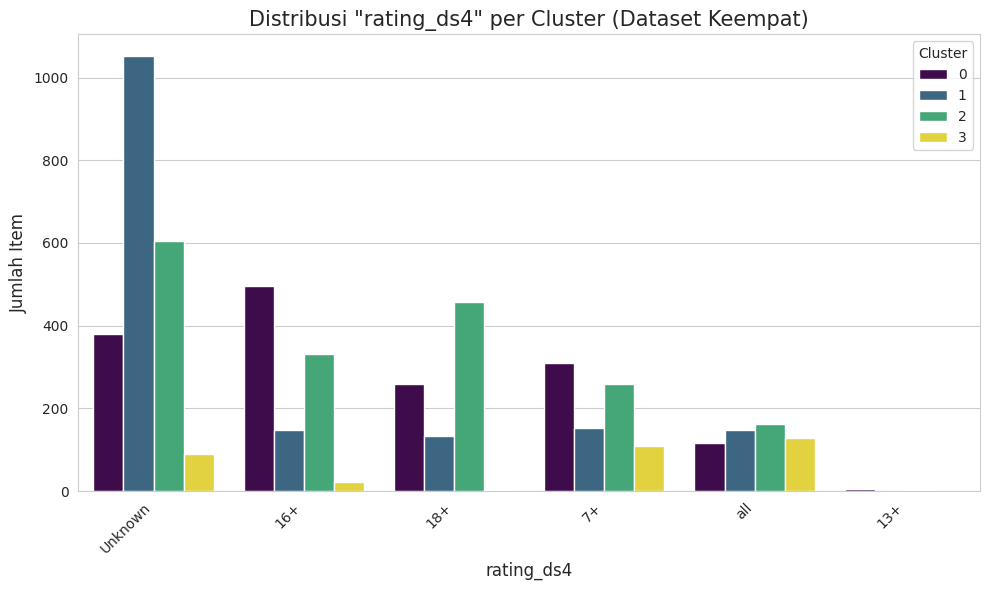


Membuat visualisasi untuk fitur numerik (Dataset Keempat)...


<ipython-input-41-01ad565c5549>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds4_clustered, x='cluster', y=feature_num_ds4, palette='viridis')


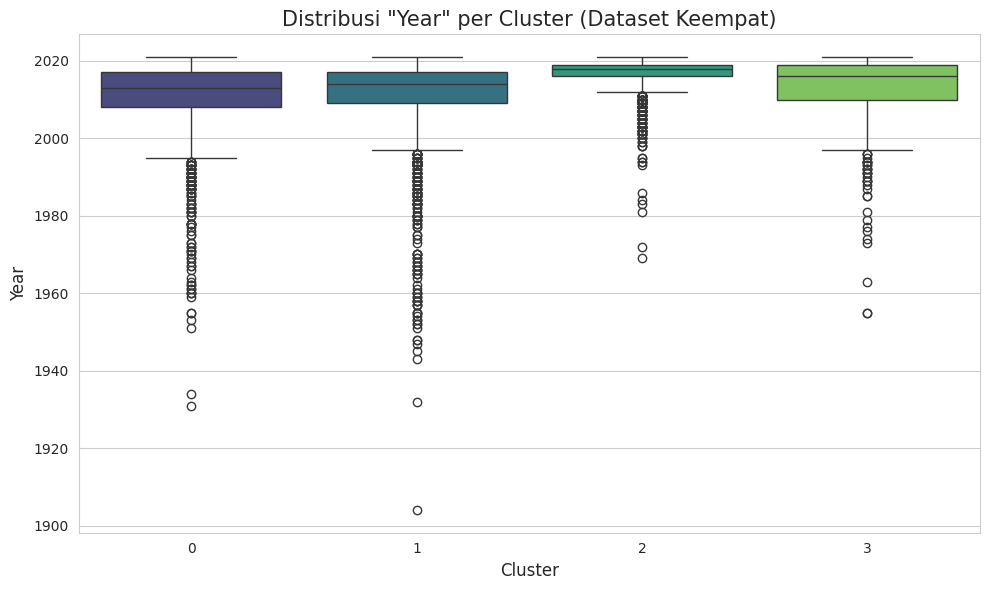

<ipython-input-41-01ad565c5549>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds4_clustered, x='cluster', y=feature_num_ds4, palette='viridis')


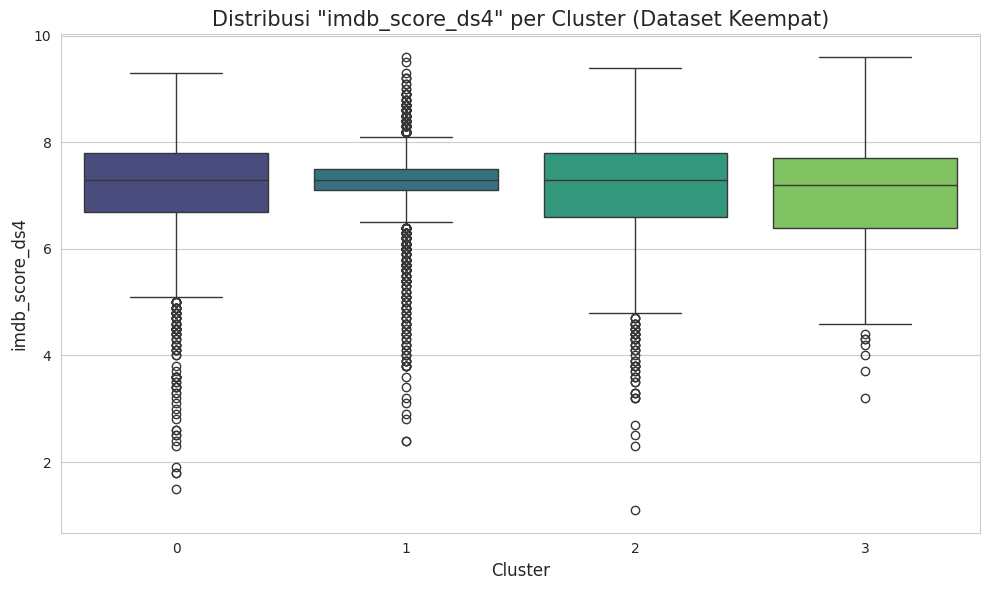

<ipython-input-41-01ad565c5549>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds4_clustered, x='cluster', y=feature_num_ds4, palette='viridis')


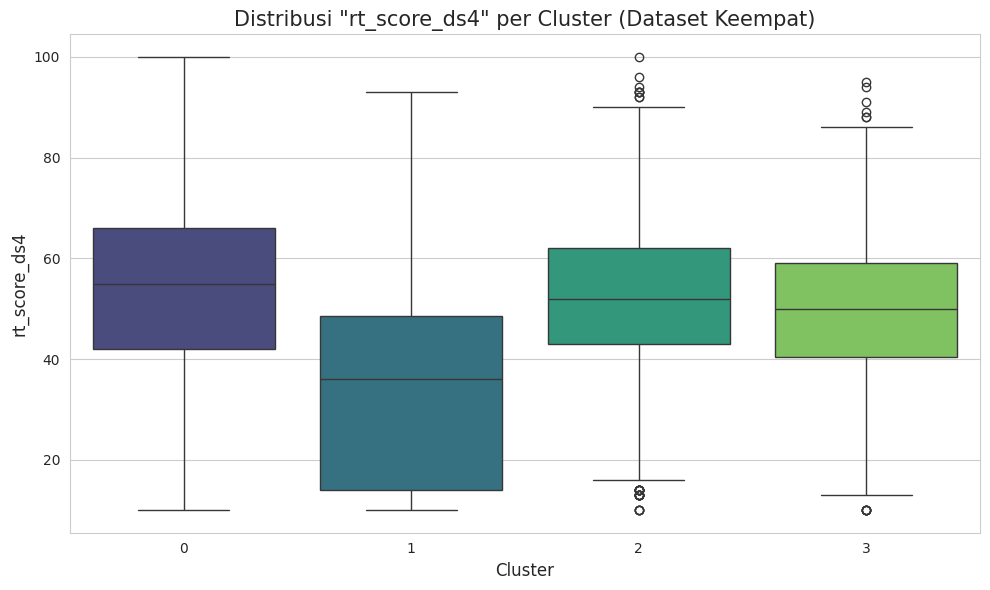

<ipython-input-41-01ad565c5549>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds4_clustered, x='cluster', y=feature_num_ds4, palette='viridis')


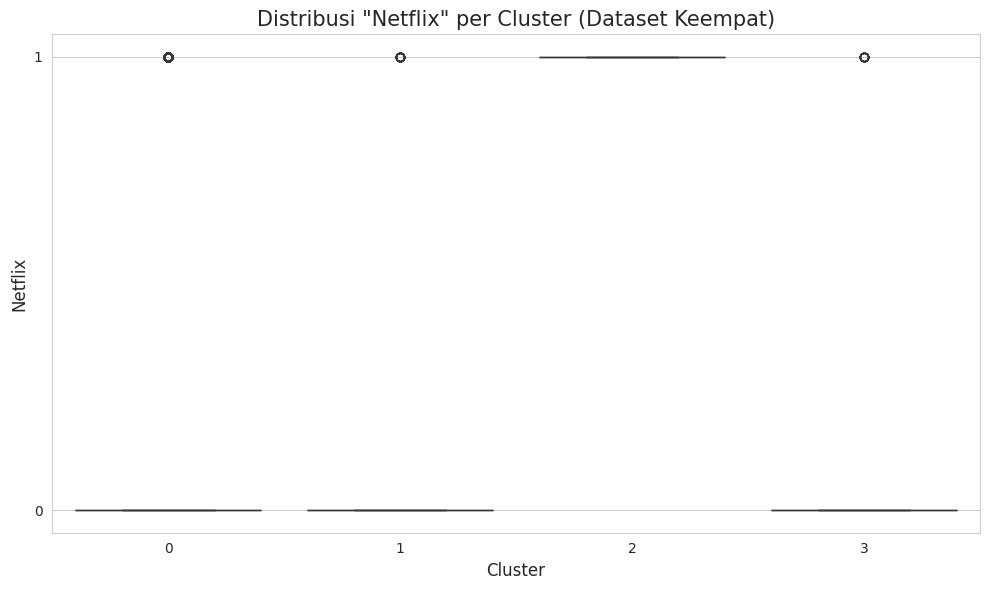

<ipython-input-41-01ad565c5549>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds4_clustered, x='cluster', y=feature_num_ds4, palette='viridis')


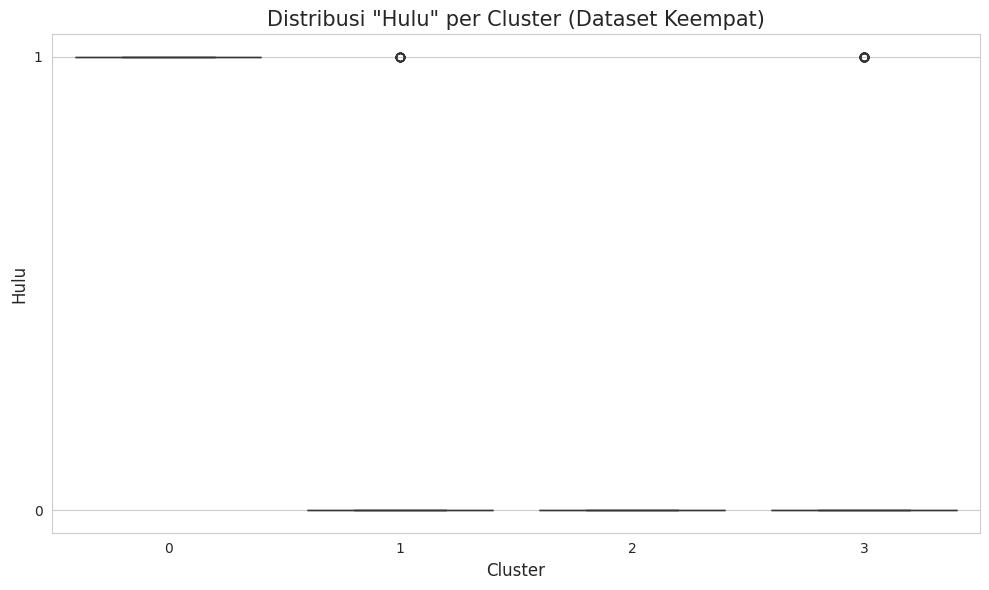

<ipython-input-41-01ad565c5549>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds4_clustered, x='cluster', y=feature_num_ds4, palette='viridis')


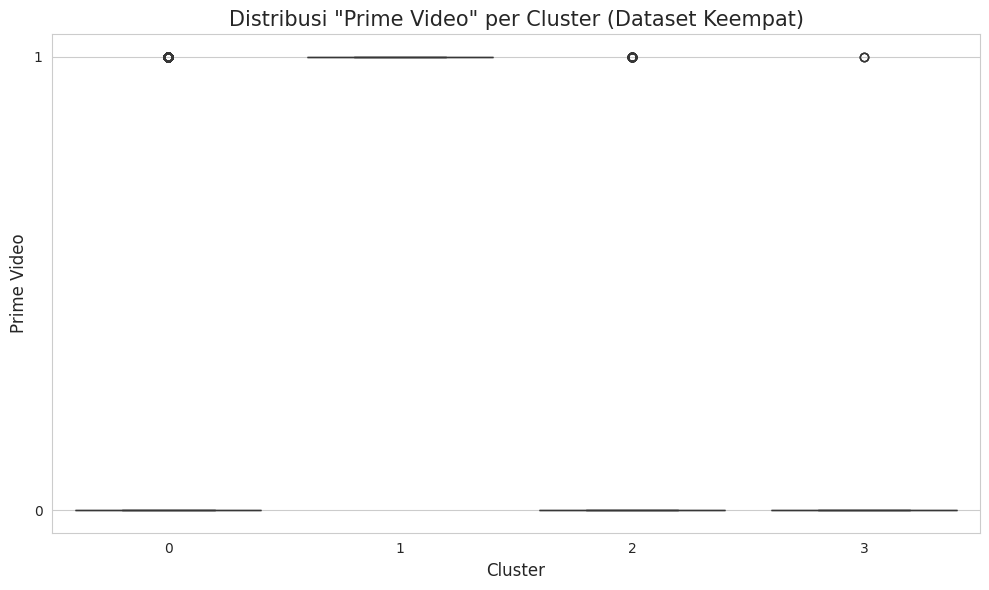

<ipython-input-41-01ad565c5549>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ds4_clustered, x='cluster', y=feature_num_ds4, palette='viridis')


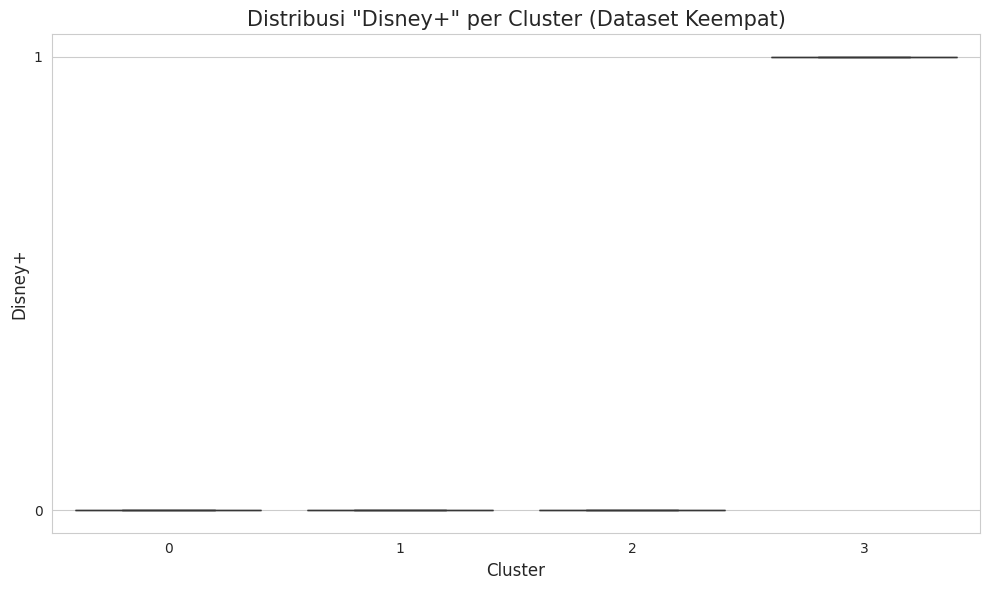

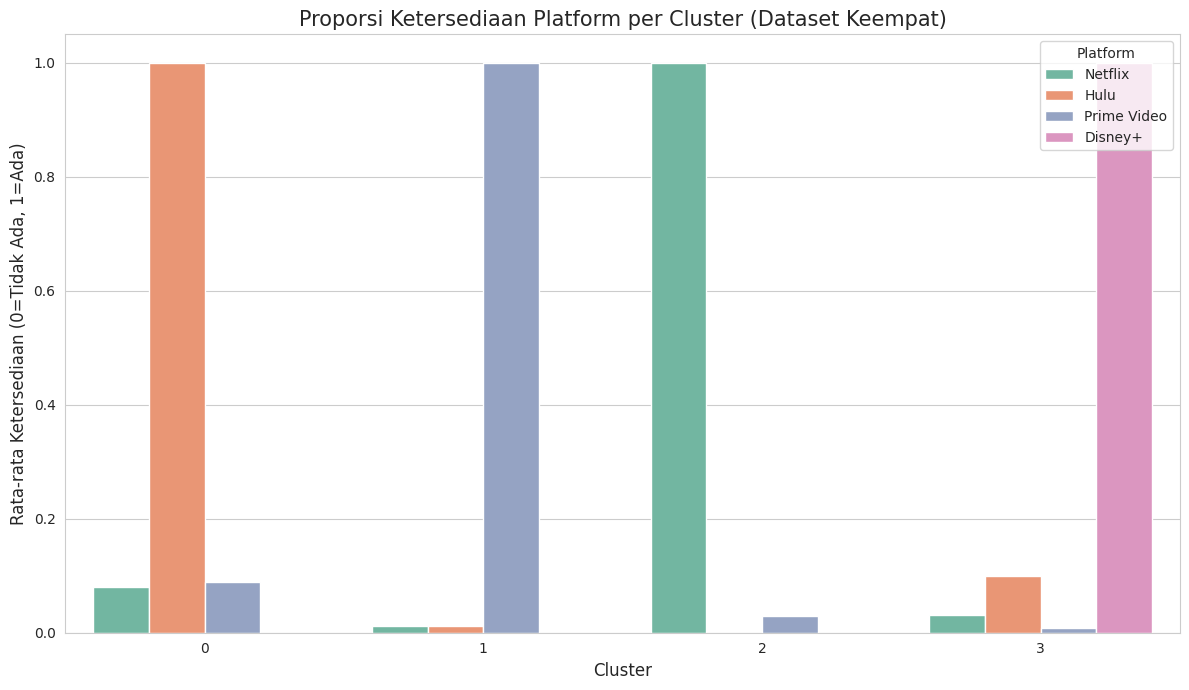

Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster dataset keempat.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan df_ds4_clustered sudah ada dari langkah K-Means untuk dataset keempat
# df_ds4_clustered berisi fitur-fitur asli dari df_ds4_subset dan kolom 'cluster'

# Set style untuk plot
sns.set_style("whitegrid")

# 1. Visualisasi Distribusi Fitur Kategorikal per Cluster (Dataset Keempat)
categorical_features_ds4_viz = ['rating_ds4'] # Hanya rating_ds4 yang kategorikal utama

print("Membuat visualisasi untuk fitur kategorikal (Dataset Keempat)...")
for feature_cat_ds4 in categorical_features_ds4_viz:
    plt.figure(figsize=(10, 6))
    order_cat = df_ds4_clustered[feature_cat_ds4].value_counts().index
    sns.countplot(data=df_ds4_clustered, x=feature_cat_ds4, hue='cluster', palette='viridis', order=order_cat)
    plt.title(f'Distribusi "{feature_cat_ds4}" per Cluster (Dataset Keempat)', fontsize=15)
    plt.xlabel(feature_cat_ds4, fontsize=12)
    plt.ylabel('Jumlah Item', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# 2. Visualisasi Distribusi Fitur Numerik per Cluster (Dataset Keempat)
numerical_features_ds4_viz = [
    'Year', 'imdb_score_ds4', 'rt_score_ds4',
    'Netflix', 'Hulu', 'Prime Video', 'Disney+' # Termasuk platform sebagai numerik (0/1)
]

print("\nMembuat visualisasi untuk fitur numerik (Dataset Keempat)...")
for feature_num_ds4 in numerical_features_ds4_viz:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_ds4_clustered, x='cluster', y=feature_num_ds4, palette='viridis')
    plt.title(f'Distribusi "{feature_num_ds4}" per Cluster (Dataset Keempat)', fontsize=15)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature_num_ds4, fontsize=12)
    # Untuk kolom platform, karena nilainya hanya 0 atau 1, boxplot mungkin kurang ideal.
    # Barplot dari mean (seperti di tabel karakteristik) akan lebih menunjukkan dominasi.
    # Namun, kita tetap pakai boxplot untuk konsistensi loop ini.
    if feature_num_ds4 in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
        plt.yticks([0, 1]) # Pastikan sumbu y hanya menunjukkan 0 dan 1

    plt.tight_layout()
    plt.show()

# Alternatif: Visualisasi ketersediaan platform dengan barplot (proporsi atau mean)
platform_cols = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
df_platform_means = df_ds4_clustered.groupby('cluster')[platform_cols].mean().reset_index()
df_platform_melted = df_platform_means.melt(id_vars='cluster', value_vars=platform_cols, var_name='Platform', value_name='Proportion (Mean)')

plt.figure(figsize=(12, 7))
sns.barplot(data=df_platform_melted, x='cluster', y='Proportion (Mean)', hue='Platform', palette='Set2')
plt.title('Proporsi Ketersediaan Platform per Cluster (Dataset Keempat)', fontsize=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Rata-rata Ketersediaan (0=Tidak Ada, 1=Ada)', fontsize=12)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


print("Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster dataset keempat.")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import f_oneway, chi2_contingency
import pandas as pd

# Pastikan X_ds4_prepared (data yang sudah di-encode dan scale untuk dataset keempat),
# cluster_labels_ds4 (label cluster untuk dataset keempat),
# df_ds4_clustered (data asli dengan kolom 'cluster' untuk dataset keempat),
# dan N_CLUSTERS_DS4 (jumlah cluster yang dipilih, yaitu 4) sudah ada.

print("--- Metrik Validitas Internal Cluster (Dataset Keempat) ---")
if 'X_ds4_prepared' in locals() and 'cluster_labels_ds4' in locals() and 'N_CLUSTERS_DS4' in locals():
    silhouette_avg_ds4 = silhouette_score(X_ds4_prepared, cluster_labels_ds4)
    print(f"Rata-rata Silhouette Score untuk {N_CLUSTERS_DS4} clusters (Dataset Keempat): {silhouette_avg_ds4:.4f}")

    db_score_ds4 = davies_bouldin_score(X_ds4_prepared, cluster_labels_ds4)
    print(f"Davies-Bouldin Index (Dataset Keempat): {db_score_ds4:.4f}")

    ch_score_ds4 = calinski_harabasz_score(X_ds4_prepared, cluster_labels_ds4)
    print(f"Calinski-Harabasz Index (Dataset Keempat): {ch_score_ds4:.4f}")
else:
    print("Variabel X_ds4_prepared, cluster_labels_ds4, atau N_CLUSTERS_DS4 tidak ditemukan. Tidak dapat menghitung metrik validitas.")

print("\n--- Analisis Perbedaan Fitur Antar Cluster (Dataset Keempat) ---")

# ANOVA untuk Fitur Numerik (Dataset Keempat)
numerical_features_for_analysis_ds4 = [
    'Year', 'imdb_score_ds4', 'rt_score_ds4',
    'Netflix', 'Hulu', 'Prime Video', 'Disney+'
]
print("\n Hasil ANOVA untuk Fitur Numerik (Dataset Keempat):")
if 'df_ds4_clustered' in locals() and 'N_CLUSTERS_DS4' in locals():
    for feature_num_ds4 in numerical_features_for_analysis_ds4:
        if feature_num_ds4 in df_ds4_clustered.columns:
            # Membuat list data per cluster untuk fitur ini
            grouped_data_ds4 = [df_ds4_clustered[feature_num_ds4][df_ds4_clustered['cluster'] == i] for i in range(N_CLUSTERS_DS4)]
            # Menghilangkan cluster kosong jika ada
            grouped_data_cleaned_ds4 = [group for group in grouped_data_ds4 if not group.empty]

            if len(grouped_data_cleaned_ds4) > 1:
                f_statistic_ds4, p_value_ds4 = f_oneway(*grouped_data_cleaned_ds4)
                print(f"  Fitur: {feature_num_ds4}")
                print(f"    F-statistic: {f_statistic_ds4:.4f}")
                print(f"    P-value: {p_value_ds4:.4g}")
                if p_value_ds4 < 0.05:
                    print("    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).")
                else:
                    print("    Kesimpulan: Tidak ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p >= 0.05).")
            else:
                print(f"  Fitur: {feature_num_ds4} - Tidak cukup grup data untuk ANOVA.")
        else:
            print(f"  Fitur: {feature_num_ds4} tidak ditemukan di df_ds4_clustered.")
else:
    print("Variabel df_ds4_clustered atau N_CLUSTERS_DS4 tidak ditemukan. Tidak dapat melakukan ANOVA.")

# Chi-square Test untuk Fitur Kategorikal (Dataset Keempat)
categorical_features_for_analysis_ds4 = ['rating_ds4'] # Hanya 'rating_ds4' yang kategorikal di set fitur ini
print("\n Hasil Chi-square Test untuk Fitur Kategorikal (Dataset Keempat):")
if 'df_ds4_clustered' in locals():
    for feature_cat_ds4 in categorical_features_for_analysis_ds4:
        if feature_cat_ds4 in df_ds4_clustered.columns:
            contingency_table_ds4 = pd.crosstab(df_ds4_clustered[feature_cat_ds4], df_ds4_clustered['cluster'])
            chi2_ds4, p_value_ds4, dof_ds4, expected_ds4 = chi2_contingency(contingency_table_ds4)
            print(f"  Fitur: {feature_cat_ds4}")
            print(f"    Chi-square statistic: {chi2_ds4:.4f}")
            print(f"    P-value: {p_value_ds4:.4g}")
            print(f"    Degrees of Freedom: {dof_ds4}")
            if p_value_ds4 < 0.05:
                print("    Kesimpulan: Ada hubungan yang signifikan secara statistik antara fitur dan cluster (p < 0.05).")
            else:
                print("    Kesimpulan: Tidak ada hubungan yang signifikan secara statistik antara fitur dan cluster (p >= 0.05).")
        else:
            print(f"  Fitur: {feature_cat_ds4} tidak ditemukan di df_ds4_clustered.")
else:
    print("Variabel df_ds4_clustered tidak ditemukan. Tidak dapat melakukan Chi-square test.")

--- Metrik Validitas Internal Cluster (Dataset Keempat) ---
Rata-rata Silhouette Score untuk 4 clusters (Dataset Keempat): 0.3792
Davies-Bouldin Index (Dataset Keempat): 1.1141
Calinski-Harabasz Index (Dataset Keempat): 1920.5825

--- Analisis Perbedaan Fitur Antar Cluster (Dataset Keempat) ---

 Hasil ANOVA untuk Fitur Numerik (Dataset Keempat):
  Fitur: Year
    F-statistic: 181.8570
    P-value: 2.667e-112
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: imdb_score_ds4
    F-statistic: 4.5357
    P-value: 0.003518
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: rt_score_ds4
    F-statistic: 388.4092
    P-value: 2.645e-228
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: Netflix
    F-statistic: 13560.3804
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Analisis Hasil Tes Signifikansi (Dataset Keempat)
Metrik Validitas Internal Cluster
Rata-rata Silhouette Score: 0.3792
Skor ini adalah yang paling tinggi sejauh ini dibandingkan ketiga dataset sebelumnya. Nilai yang lebih mendekati 1 menunjukkan bahwa objek-objek dalam cluster sangat mirip satu sama lain (kohesi) dan berbeda dengan objek di cluster lain (separasi). Skor 0.3792 adalah hasil yang baik untuk data riil, mengindikasikan struktur cluster yang cukup jelas.
Davies-Bouldin Index: 1.1141
Nilai ini adalah yang paling rendah dibandingkan ketiga dataset sebelumnya. Untuk Davies-Bouldin, nilai yang lebih rendah menunjukkan pemisahan cluster yang lebih baik. Ini juga mendukung kualitas clustering yang baik.
Calinski-Harabasz Index: 1920.5825
Skor ini sebanding atau bahkan lebih tinggi dari beberapa dataset sebelumnya, menunjukkan rasio yang baik antara dispersi antar-cluster dan intra-cluster.
Secara keseluruhan, metrik validitas internal menunjukkan bahwa pembentukan 4 cluster pada dataset keempat ini menghasilkan struktur cluster yang paling baik dan paling terdefinisi dibandingkan dengan dataset-dataset sebelumnya. Ini kemungkinan besar karena fitur-fitur platform streaming memberikan pemisahan yang sangat jelas.

Analisis Perbedaan Fitur Antar Cluster (ANOVA & Chi-square)
Hasil ANOVA untuk Fitur Numerik:
Untuk SEMUA fitur numerik yang diuji (Year, imdb_score_ds4, rt_score_ds4, Netflix, Hulu, Prime Video, Disney+), P-value sangat kecil (mendekati 0).
Kesimpulan: Ada perbedaan rata-rata yang sangat signifikan secara statistik untuk semua fitur numerik ini di antara keempat cluster. Ini sangat mendukung bahwa cluster-cluster tersebut memang berbeda berdasarkan karakteristik numeriknya.
Catatan Disney+: F-statistic inf (infinity) dan P-value 0 untuk Disney+ kemungkinan terjadi karena salah satu cluster (Cluster 3 dalam interpretasi kita sebelumnya) secara eksklusif berisi item dari Disney+ (rata-rata ketersediaan Disney+ di cluster itu adalah 1.0, dan 0.0 di cluster lain). Ini menciptakan varians sempurna antar grup untuk fitur tersebut, yang menghasilkan F-statistic tak terhingga. Ini adalah hasil yang valid dan justru memperkuat pemisahan berdasarkan platform.
Hasil Chi-square Test untuk Fitur Kategorikal:
Untuk fitur rating_ds4, P-value sangat kecil.
Kesimpulan: Ada hubungan yang sangat signifikan secara statistik antara fitur rating_ds4 dan keanggotaan cluster. Distribusi kategori rating_ds4 berbeda secara signifikan antar cluster.
Kesimpulan dari Tes Signifikansi (Dataset Keempat)
Tes signifikansi untuk dataset keempat ini memberikan bukti statistik yang sangat kuat bahwa:

Cluster yang terbentuk memiliki struktur yang sangat baik dan terpisah dengan jelas, didukung oleh metrik validitas internal yang paling baik sejauh ini.
Cluster-cluster tersebut secara signifikan berbeda satu sama lain berdasarkan semua fitur numerik (termasuk ketersediaan platform) dan fitur kategorikal rating_ds4.
Hasil ini mengonfirmasi bahwa clustering berdasarkan platform, tahun rilis, skor, dan rating usia pada dataset khusus TV Show ini menghasilkan pengelompokan yang sangat bermakna secara statistik.

In [ ]:
import pandas as pd
import numpy as np # Impor numpy untuk tipe data numerik jika diperlukan nanti

file_path = '/kaggle/input/amazon-india-products-2023-1-5m-products/amz_in_total_products_data_processed.csv'
print(f"Memuat dataset dari: {file_path}")

df = None # Initialize DataFrame to None

try:
    # Mencoba dengan encoding utf-8 terlebih dahulu
    df = pd.read_csv(file_path, low_memory=False) # low_memory=False untuk dataset besar dengan tipe campuran
    print("Dataset berhasil dimuat dengan encoding 'utf-8'! ✅")
except UnicodeDecodeError:
    print("Gagal memuat dengan 'utf-8', mencoba 'latin1'...")
    try:
        df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
        print("Dataset berhasil dimuat dengan encoding 'latin1'! ✅")
    except UnicodeDecodeError:
        print("Gagal memuat dengan 'latin1', mencoba 'iso-8859-1'...")
        try:
            df = pd.read_csv(file_path, encoding='iso-8859-1', low_memory=False)
            print("Dataset berhasil dimuat dengan encoding 'iso-8859-1'! ✅")
        except UnicodeDecodeError:
            print("Gagal memuat dengan 'iso-8859-1', mencoba 'cp1252'...")
            try:
                df = pd.read_csv(file_path, encoding='cp1252', low_memory=False)
                print("Dataset berhasil dimuat dengan encoding 'cp1252'! ✅")
            except Exception as e:
                print(f"❌ Gagal memuat dataset dengan semua encoding yang dicoba. Error: {e} 💥")
except FileNotFoundError:
    print(f"❌ File tidak ditemukan di path: {file_path}")
    print("Pastikan path file sudah benar.")
except Exception as e:
    print(f"Terjadi error lain saat memuat dataset: {e} 💥")

# Jika dataset berhasil dimuat, tampilkan informasinya
if df is not None:
    print("\nLima baris pertama dataset:")
    print(df.head())

    print("\nInformasi dataset (lebih detail):")
    # Menggunakan verbose=True dan show_counts=True untuk info yang lebih lengkap
    df.info(verbose=True, show_counts=True)

    print("\nStatistik deskriptif dataset (untuk semua tipe kolom):")
    # Menggunakan include='all' untuk mendapatkan statistik untuk kolom numerik dan objek
    print(df.describe(include='all'))

    print("\nJumlah missing values per kolom:")
    print(df.isnull().sum())

    print("\nJumlah nilai unik di setiap kolom dataset:")
    for col in df.columns:
        if col in df.columns: # Cek kolom masih ada
            print(f"- {col}: {df[col].nunique()} nilai unik")
        else:
            print(f"- {col}: (Kolom tidak ditemukan)")

    print("\nContoh beberapa nilai unik untuk setiap kolom dataset (maks 5 per kolom untuk brevity):")
    for col in df.columns:
        if col not in df.columns:
            print(f"- {col}: (Kolom tidak ditemukan)")
            continue
        if df[col].nunique() == 0:
            print(f"- {col}: (Kolom kosong)")
            continue

        unique_values = df[col].unique()
        display_limit = 5 # Batasi contoh unik yang ditampilkan menjadi 5

        # Cek jika kolom adalah list atau dict yang di-encode sebagai string, jangan tampilkan langsung
        is_list_like_string = False
        try: # Tambahkan try-except untuk mengatasi potensi error jika unique_values[0] bukan string
            if isinstance(unique_values[0], str) and \
               ((unique_values[0].startswith('[') and unique_values[0].endswith(']')) or \
                (unique_values[0].startswith('{') and unique_values[0].endswith('}'))):
                is_list_like_string = True
        except IndexError: # Jika kolom kosong setelah dropna atau unique_values kosong
            is_list_like_string = False


        if pd.api.types.is_numeric_dtype(df[col].dtype) and df[col].nunique() > 20:
             print(f"- {col} (numerik dengan >20 nilai unik): Min={df[col].min()}, Max={df[col].max()}, {df[col].nunique()} nilai unik")
        elif is_list_like_string and df[col].nunique() > 5: # Jika string list-like dan banyak unik
            print(f"- {col} (contoh string list-like): {unique_values[:2]} ... (total {len(unique_values)} unik)")
        elif len(unique_values) > display_limit:
            print(f"- {col} (contoh): {unique_values[:display_limit]} ... (total {len(unique_values)} unik)")
        else:
            print(f"- {col}: {unique_values}")
else:
    print("Dataset tidak berhasil dimuat, tidak ada informasi untuk ditampilkan.")

Memuat dataset dari: /kaggle/input/amazon-india-products-2023-1-5m-products/amz_in_total_products_data_processed.csv
Dataset berhasil dimuat dengan encoding 'utf-8'! ✅

Lima baris pertama dataset:
         asin                                              title  \
0  B08VJFZQ9S  प्लेन कैज़ुअल वियर बेसबॉल कैप पुरुषों और महिला...   
1  B08VJFYW5Q  यूनीसेक्स कॉटन एडजस्टेबल बेसबॉल कैप (काला, फ़्...   
2  B08VJFYVX9  प्लेन कैज़ुअल वियर बेसबॉल कैप पुरुषों और महिला...   
3  B08VJFXM7F  यूनीसेक्स कॉटन एडजस्टेबल बेसबॉल कैप (सफ़ेद, फ़...   
4  B08VJFXFTJ  यूनीसेक्स कॉटन एडजस्टेबल बेसबॉल कैप (लाल और का...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/61DK1GchGF...   
1  https://m.media-amazon.com/images/I/61+nwjWLUg...   
2  https://m.media-amazon.com/images/I/61DK1GchGF...   
3  https://m.media-amazon.com/images/I/516jdJhgbX...   
4  https://m.media-amazon.com/images/I/614bZrSzDT...   

                            productURL  stars  reviews  p

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# df adalah DataFrame yang sudah dimuat dari dataset Amazon India
# Pastikan df sudah ada.

print("Memulai pra-pemrosesan untuk dataset Amazon India...")

# Salin dataframe untuk menghindari perubahan pada df asli
df_processed = df.copy()

# 1. Membuang Kolom yang Tidak Perlu/Kompleks
cols_to_drop = ['asin', 'title', 'imgUrl', 'productURL']
df_processed = df_processed.drop(columns=cols_to_drop)
print(f"Kolom berikut telah dihapus: {cols_to_drop}")

# 2. Mengonversi Fitur Boolean 'isBestSeller' ke numerik (0/1)
df_processed['isBestSeller'] = df_processed['isBestSeller'].astype(int)
print("'isBestSeller' telah diubah menjadi tipe integer (0/1).")

# 3. Definisi Fitur untuk Clustering
categorical_features = ['categoryName']
numerical_features = ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']

print(f"\nFitur kategorikal yang akan digunakan: {categorical_features}")
print(f"Fitur numerik yang akan digunakan: {numerical_features}")

# Membuat DataFrame subset dengan fitur yang dipilih
features_for_clustering = categorical_features + numerical_features
df_subset = df_processed[features_for_clustering].copy()

# 4. Membuat Preprocessor untuk Encoding dan Scaling
# Untuk fitur numerik: StandardScaler
# Untuk fitur kategorikal: OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse_output=False agar mudah dilihat jika perlu
    ],
    remainder='passthrough' # Seharusnya tidak ada sisa kolom di df_subset
)

print("\nMenerapkan encoding dan scaling...")
# Terapkan preprocessor ke data
# Ini mungkin memakan waktu dan memori karena ukuran data dan jumlah kategori
X_prepared = preprocessor.fit_transform(df_subset)

print(f"Proses encoding dan scaling selesai.")
print(f"Dimensi data yang sudah diproses (X_prepared): {X_prepared.shape}")

# (Opsional) Membuat DataFrame dari X_prepared untuk inspeksi jika diperlukan
# Ini bisa sangat besar dan memakan memori, jadi lakukan dengan hati-hati atau pada sampel
# try:
#     print("\nMencoba membuat DataFrame dari data yang diproses untuk inspeksi (mungkin memakan waktu/memori)...")
#     onehot_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
#     feature_names_prepared = numerical_features + list(onehot_cols)

#     # Untuk dataset besar, buat DataFrame dari sampel kecil saja untuk inspeksi head
#     sample_size_for_df = min(1000, X_prepared.shape[0]) # Ambil sampel maks 1000 baris
#     df_prepared_sample = pd.DataFrame(X_prepared[:sample_size_for_df], columns=feature_names_prepared)

#     print("Lima baris pertama data yang sudah di-encode dan di-scale (sampel):")
#     print(df_prepared_sample.head())
#     print(f"Total kolom setelah one-hot encoding: {len(feature_names_prepared)}")
# except Exception as e:
#     print(f"Error saat membuat DataFrame inspeksi: {e}")
#     print("Namun, X_prepared (NumPy array) seharusnya sudah siap untuk clustering.")

print("\nData siap untuk tahap clustering! ✅")
# Variabel X_prepared akan digunakan untuk clustering.

Memulai pra-pemrosesan untuk dataset Amazon India...
Kolom berikut telah dihapus: ['asin', 'title', 'imgUrl', 'productURL']
'isBestSeller' telah diubah menjadi tipe integer (0/1).

Fitur kategorikal yang akan digunakan: ['categoryName']
Fitur numerik yang akan digunakan: ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']

Menerapkan encoding dan scaling...
Proses encoding dan scaling selesai.
Dimensi data yang sudah diproses (X_prepared): (1589160, 220)

Data siap untuk tahap clustering! ✅


Mengambil sampel acak sebanyak 100000 baris untuk Elbow Method...
Dimensi sampel X_prepared_sample: (100000, 220)

Menghitung inertia untuk berbagai nilai K (Elbow Method) pada sampel data Amazon India...
  Menjalankan K-Means untuk K=1...
    Inertia untuk K=1: 679535.29
  Menjalankan K-Means untuk K=2...
    Inertia untuk K=2: 589243.41
  Menjalankan K-Means untuk K=3...
    Inertia untuk K=3: 525097.54
  Menjalankan K-Means untuk K=4...
    Inertia untuk K=4: 419092.94
  Menjalankan K-Means untuk K=5...
    Inertia untuk K=5: 355019.08
  Menjalankan K-Means untuk K=6...
    Inertia untuk K=6: 331541.65
  Menjalankan K-Means untuk K=7...
    Inertia untuk K=7: 284798.85
  Menjalankan K-Means untuk K=8...
    Inertia untuk K=8: 346126.29
  Menjalankan K-Means untuk K=9...
    Inertia untuk K=9: 309544.28
  Menjalankan K-Means untuk K=10...
    Inertia untuk K=10: 224257.08
  Menjalankan K-Means untuk K=11...
    Inertia untuk K=11: 218691.94


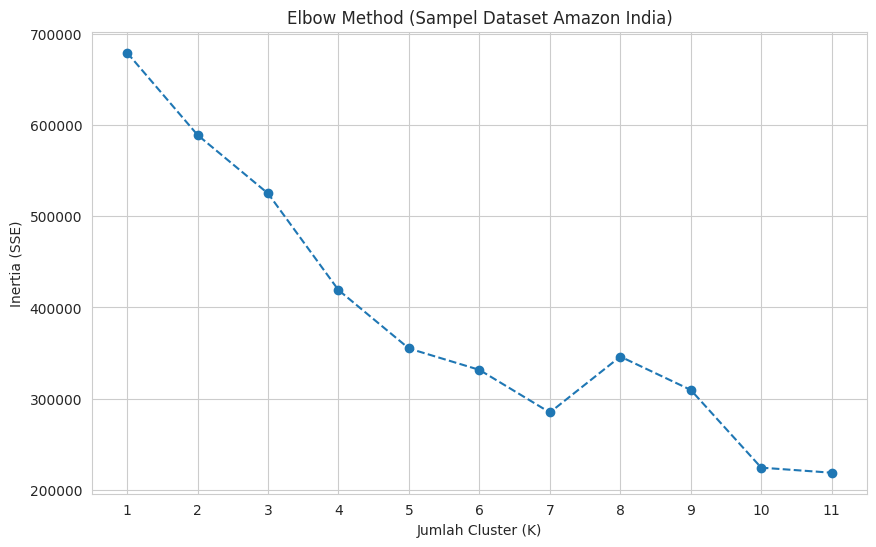


Silakan amati plot elbow di atas untuk menentukan jumlah K yang optimal.
Setelah itu, sesuaikan nilai N_CLUSTERS_AMZ pada blok kode berikutnya.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.utils import shuffle # Untuk mengambil sampel acak

# X_prepared adalah data yang sudah siap dari langkah sebelumnya (1.589.160, 220)
# df_subset adalah DataFrame sebelum di-encode/scale, berisi fitur-fitur
# 'categoryName', 'stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth'
# Pastikan variabel X_prepared dan df_subset sudah ada.

# 1. Mengambil sampel acak dari X_prepared untuk Elbow Method
sample_size = 100000 # Anda bisa sesuaikan ukuran sampel ini (misal, 50000 hingga 100000)
if X_prepared.shape[0] > sample_size:
    print(f"Mengambil sampel acak sebanyak {sample_size} baris untuk Elbow Method...")
    X_prepared_sample, _ = shuffle(X_prepared, df_subset, random_state=42, n_samples=sample_size)
    # Kita shuffle df_subset juga agar jika nanti perlu mapping kembali ke sampel, indeksnya sesuai.
    # Namun untuk Elbow, hanya X_prepared_sample yang dipakai.
    print(f"Dimensi sampel X_prepared_sample: {X_prepared_sample.shape}")
else:
    print("Ukuran dataset lebih kecil dari ukuran sampel yang diinginkan, menggunakan keseluruhan data untuk Elbow Method.")
    X_prepared_sample = X_prepared

# 2. Menentukan K optimal menggunakan Elbow Method pada SAMPEL
inertia_amz = []
# Rentang K yang akan dicoba (misalnya 1 sampai 10 atau 11)
k_range_amz = range(1, 12)

print("\nMenghitung inertia untuk berbagai nilai K (Elbow Method) pada sampel data Amazon India...")
for k_val_amz in k_range_amz:
    print(f"  Menjalankan K-Means untuk K={k_val_amz}...")
    kmeans_elbow_amz = KMeans(n_clusters=k_val_amz, init='k-means++', random_state=42, n_init='auto')
    kmeans_elbow_amz.fit(X_prepared_sample)
    inertia_amz.append(kmeans_elbow_amz.inertia_)
    print(f"    Inertia untuk K={k_val_amz}: {kmeans_elbow_amz.inertia_:.2f}")


# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range_amz, inertia_amz, marker='o', linestyle='--')
plt.title('Elbow Method (Sampel Dataset Amazon India)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.xticks(k_range_amz)
plt.grid(True)
plt.show()

print("\nSilakan amati plot elbow di atas untuk menentukan jumlah K yang optimal.")
print("Setelah itu, sesuaikan nilai N_CLUSTERS_AMZ pada blok kode berikutnya.")

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import time # Untuk mengukur waktu eksekusi

# X_prepared adalah data yang sudah siap dari langkah pra-pemrosesan (1.589.160, 220)
# df_subset adalah DataFrame sebelum di-encode/scale, berisi fitur-fitur
# 'categoryName', 'stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth'
# Pastikan variabel X_prepared dan df_subset sudah ada dari langkah sebelumnya.

N_CLUSTERS_AMZ = 4
print(f"\nMenjalankan K-Means dengan K = {N_CLUSTERS_AMZ} pada keseluruhan dataset Amazon India ({X_prepared.shape[0]} baris)...")
print("Proses ini mungkin memakan waktu beberapa menit atau lebih...")

start_time = time.time()
kmeans_amz = KMeans(n_clusters=N_CLUSTERS_AMZ, init='k-means++', random_state=42, n_init='auto')
cluster_labels_amz = kmeans_amz.fit_predict(X_prepared)
end_time = time.time()

print(f"Proses K-Means selesai dalam {((end_time - start_time) / 60):.2f} menit.")

# Menambahkan label cluster kembali ke DataFrame (df_subset)
# df_subset harusnya memiliki jumlah baris yang sama dengan X_prepared
if 'df_subset' in locals() and df_subset.shape[0] == X_prepared.shape[0]:
    df_amz_clustered = df_subset.copy()
    df_amz_clustered['cluster'] = cluster_labels_amz

    print(f"\nLima baris pertama data Amazon India dengan label cluster (dari df_subset):")
    print(df_amz_clustered.head())

    print(f"\nDistribusi item per cluster (Dataset Amazon India):")
    print(df_amz_clustered['cluster'].value_counts().sort_index())

    # Karakteristik tiap cluster (Dataset Amazon India)
    print("\nKarakteristik Rata-Rata Fitur Numerik per Cluster (Dataset Amazon India):")
    # Fitur numerik asli yang dipilih untuk dataset ini
    numerical_features_amz_analysis = ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']
    # Pastikan semua kolom ini ada di df_amz_clustered
    valid_numerical_features = [col for col in numerical_features_amz_analysis if col in df_amz_clustered.columns]
    if valid_numerical_features:
        print(df_amz_clustered.groupby('cluster')[valid_numerical_features].mean())
    else:
        print("Tidak ada fitur numerik yang valid ditemukan untuk analisis rata-rata.")


    print("\nKarakteristik Modus Fitur Kategorikal per Cluster (Dataset Amazon India):")
    # Fitur kategorikal asli yang dipilih untuk dataset ini
    categorical_features_amz_analysis = ['categoryName']
    # Pastikan semua kolom ini ada di df_amz_clustered
    valid_categorical_features = [col for col in categorical_features_amz_analysis if col in df_amz_clustered.columns]
    if valid_categorical_features:
        for col_cat_amz in valid_categorical_features:
            print(f"\nModus untuk '{col_cat_amz}' per cluster (Dataset Amazon India):")
            # Menggunakan iloc[0] untuk mengambil modus pertama jika ada lebih dari satu
            # dan memeriksa apakah mode() menghasilkan DataFrame kosong
            mode_results = df_amz_clustered.groupby('cluster')[col_cat_amz].apply(lambda x: x.mode()[0] if not x.mode().empty else "N/A")
            print(mode_results)
    else:
        print("Tidak ada fitur kategorikal yang valid ditemukan untuk analisis modus.")

else:
    print("Variabel df_subset tidak ditemukan atau jumlah barisnya tidak sesuai dengan X_prepared.")
    print("Tidak dapat menambahkan label cluster atau menampilkan karakteristik.")


Menjalankan K-Means dengan K = 4 pada keseluruhan dataset Amazon India (1589160 baris)...
Proses ini mungkin memakan waktu beberapa menit atau lebih...
Proses K-Means selesai dalam 0.44 menit.

Lima baris pertama data Amazon India dengan label cluster (dari df_subset):
                categoryName  stars  reviews  price  listPrice  isBestSeller  \
0  पुरुषों के हैट्स और कैप्स    0.0        0  299.0      499.0             0   
1  पुरुषों के हैट्स और कैप्स    0.0        0  299.0      499.0             0   
2  पुरुषों के हैट्स और कैप्स    0.0        0  275.0      300.0             0   
3  पुरुषों के हैट्स और कैप्स    0.0        0  275.0      300.0             0   
4  पुरुषों के हैट्स और कैप्स    0.0        0  275.0      300.0             0   

   boughtInLastMonth  cluster  
0                  0        0  
1                  0        0  
2                  0        2  
3                  0        2  
4                  0        2  

Distribusi item per cluster (Dataset Amazon India):
clu

Luar biasa! Proses K-Means pada keseluruhan dataset Amazon India yang besar ini selesai dengan cepat (0.44 menit itu impresif untuk 1.5 juta data!), dan kita sudah mendapatkan karakteristik awal clusternya dengan K=4.

Mari kita interpretasikan hasil clustering ini:

Interpretasi Hasil Cluster (Dataset Amazon India, K=4)
Berikut adalah ringkasan dan perkiraan interpretasi untuk setiap cluster:

Cluster 0: "Produk Umum Harga Terjangkau, Aktivitas Rendah"

Jumlah Anggota: 393.514
Modus categoryName: पुरुषों के हैट्स और कैप्स (Perlengkapan Pria seperti Topi & Syal, atau kategori umum lainnya dengan harga terjangkau)
Karakteristik Numerik Rata-rata:
stars: ~2.08 (cukup rendah)
reviews: ~109 (sedang)
price: ~403 (relatif rendah)
listPrice: ~809 (menunjukkan adanya potensi diskon karena lebih tinggi dari harga jual)
isBestSeller: ~0.0006 (sangat sedikit yang bestseller)
boughtInLastMonth: ~12 (rendah)
Interpretasi: Cluster ini tampaknya mengelompokkan produk-produk dengan harga relatif terjangkau, rating bintang yang tidak terlalu tinggi, dan aktivitas penjualan serta status bestseller yang rendah. Modus kategori "पुरुषों के हैट्स और कैप्स" (Topi dan Syal Pria) bisa jadi representatif atau salah satu dari banyak kategori sejenis di cluster ini.
Cluster 1: "Produk Rumah & Dapur, Kualitas Baik, Aktivitas Sedang"

Jumlah Anggota: 569.083
Modus categoryName: होम और किचन (Rumah dan Dapur)
Karakteristik Numerik Rata-rata:
stars: ~4.05 (baik)
reviews: ~589 (cukup banyak)
price: ~2801 (lebih tinggi)
listPrice: ~63.7 (sangat rendah - ini anomali, mungkin banyak produk tanpa list price atau data listPrice tidak konsisten di cluster ini)
isBestSeller: ~0.004 (sedikit yang bestseller, tapi lebih dari Cluster 0)
boughtInLastMonth: ~41 (sedang)
Interpretasi: Ini adalah cluster besar yang didominasi oleh produk dari kategori "Rumah dan Dapur". Produk-produk ini memiliki rating bintang yang baik dan jumlah review yang lumayan. Harganya cenderung lebih tinggi. Anomali pada listPrice yang sangat rendah dibandingkan price memerlukan perhatian; mungkin banyak produk di kategori ini tidak mencantumkan harga asli atau sering dijual tanpa diskon dari harga standar yang sudah tinggi. Aktivitas penjualannya moderat.
Cluster 2: "Produk Mahal (Perhiasan?), Interaksi Pelanggan Sangat Rendah"

Jumlah Anggota: 626.451 (Cluster terbesar)
Modus categoryName: Precious Jewellery (Perhiasan Berharga)
Karakteristik Numerik Rata-rata:
stars: ~0.05 (sangat rendah, hampir tidak ada rating)
reviews: ~0.07 (sangat sedikit, hampir tidak ada review)
price: ~3786 (paling tinggi rata-ratanya)
listPrice: ~19 (sangat rendah - juga anomali)
isBestSeller: 0.0 (tidak ada yang bestseller)
boughtInLastMonth: ~0.09 (sangat rendah, hampir tidak ada penjualan)
Interpretasi: Cluster terbesar ini tampaknya berisi produk-produk dengan harga rata-rata paling tinggi, dengan kategori dominan "Perhiasan Berharga". Yang paling mencolok adalah hampir tidak adanya interaksi pelanggan (rating bintang dan review sangat rendah) dan aktivitas penjualan yang juga sangat minim. Ini bisa jadi produk baru, produk niche dengan perputaran sangat lambat, atau listing yang kurang optimal.
Cluster 3: "Produk Kebutuhan Rumah Tangga Super Laris & Populer"

Jumlah Anggota: 112 (Cluster terkecil, sangat spesifik)
Modus categoryName: घरेलू सामग्री (Kebutuhan Rumah Tangga)
Karakteristik Numerik Rata-rata:
stars: ~4.14 (baik)
reviews: ~47.626 (sangat tinggi!)
price: ~680 (sedang)
listPrice: ~329 (menunjukkan ada diskon atau harga asli lebih rendah dari harga jual rata-rata cluster lain)
isBestSeller: ~0.455 (sangat tinggi! Hampir separuhnya adalah bestseller)
boughtInLastMonth: ~23.920 (sangat tinggi! Penjualan bulan lalu luar biasa)
Interpretasi: Ini adalah cluster "juara" yang sangat kecil namun berbeda. Isinya adalah produk-produk kebutuhan rumah tangga yang sangat populer, laris manis, dan memiliki banyak review. Mereka memiliki rating bintang yang baik dan proporsi bestseller yang sangat tinggi. Ini adalah produk-produk fast-moving consumer goods (FMCG) yang sangat diminati.

Membuat visualisasi untuk fitur kategorikal (Dataset Amazon India)...


<ipython-input-47-8d9fb1059073>:30: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-8d9fb1059073>:30: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-47-8d9fb1059073>:30: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-8d9fb1059073>:30: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-8d9fb1059073>:30: UserWarning: Glyph 2347 (\N{DEVANAGARI LETTER PHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-8d9fb1059073>:30: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-8d9fb1059073>:30: UserWarning: Glyph 2335 (\N{DEVANAGARI LETTER TTA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

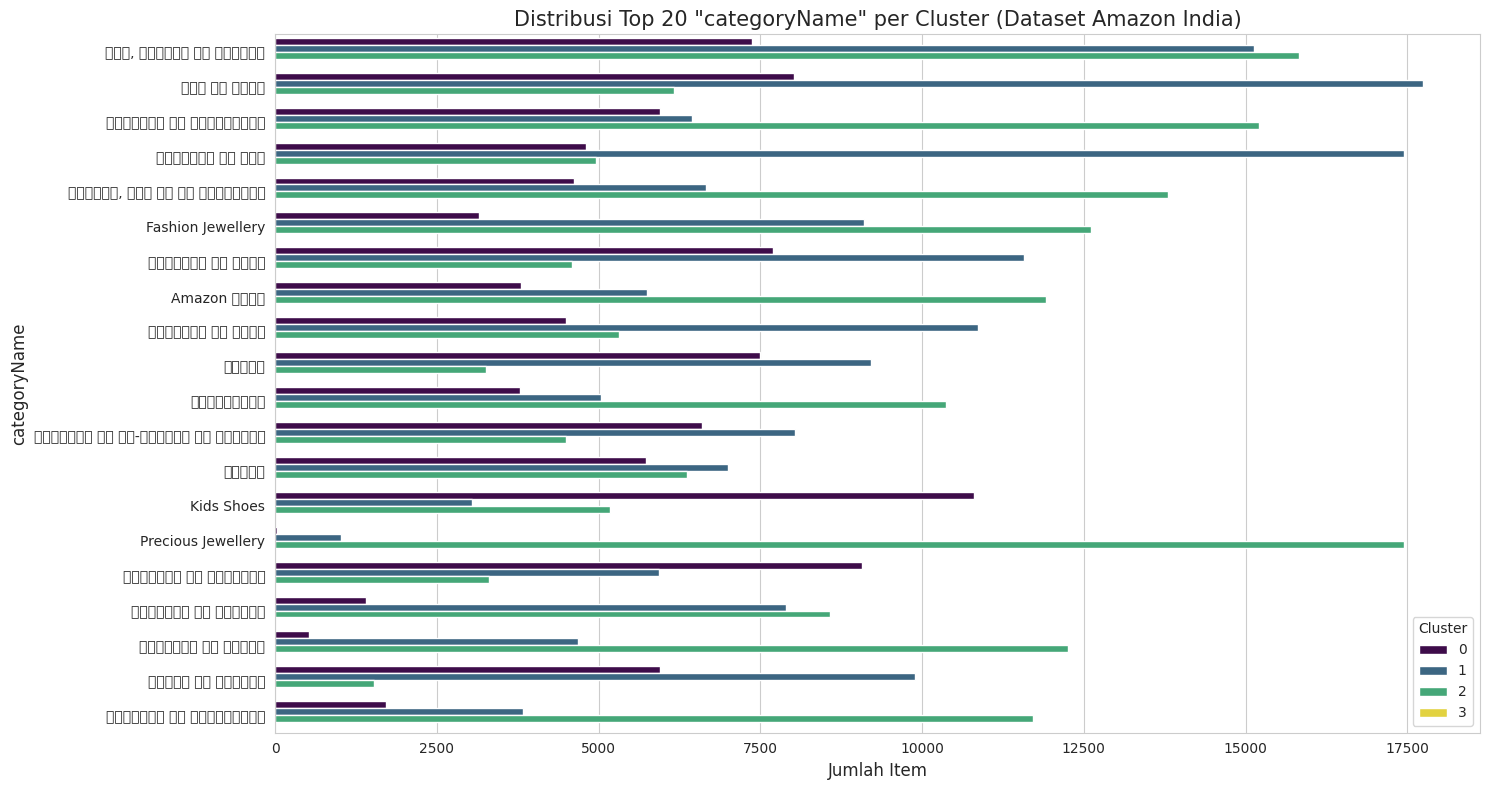


Membuat visualisasi untuk fitur numerik (Dataset Amazon India)...


<ipython-input-47-8d9fb1059073>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amz_clustered, x='cluster', y=feature_num_amz, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus pada distribusi utama


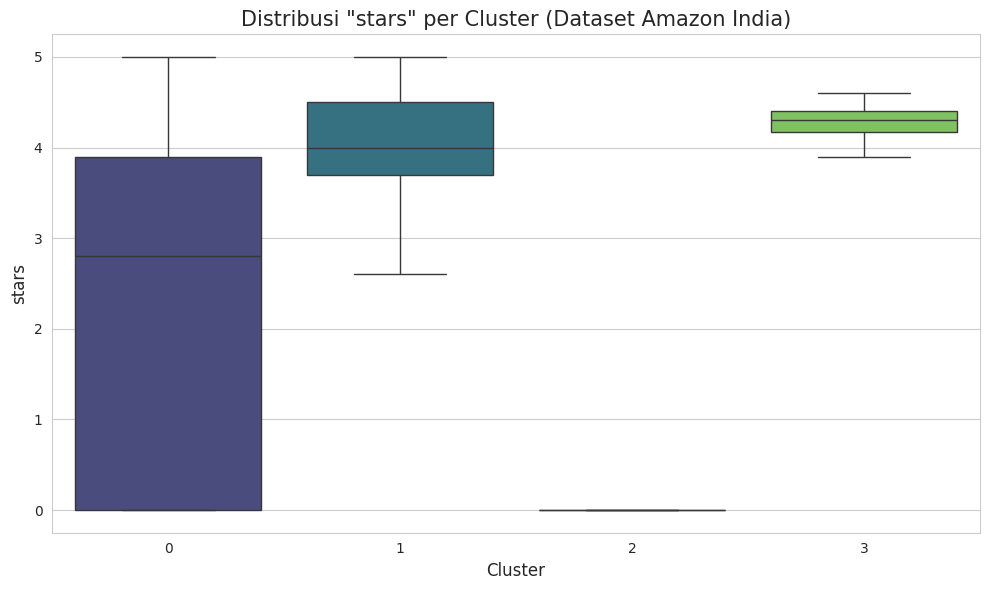

<ipython-input-47-8d9fb1059073>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amz_clustered, x='cluster', y=feature_num_amz, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus pada distribusi utama


Fitur 'reviews' memiliki nilai non-positif, tidak menggunakan skala log.


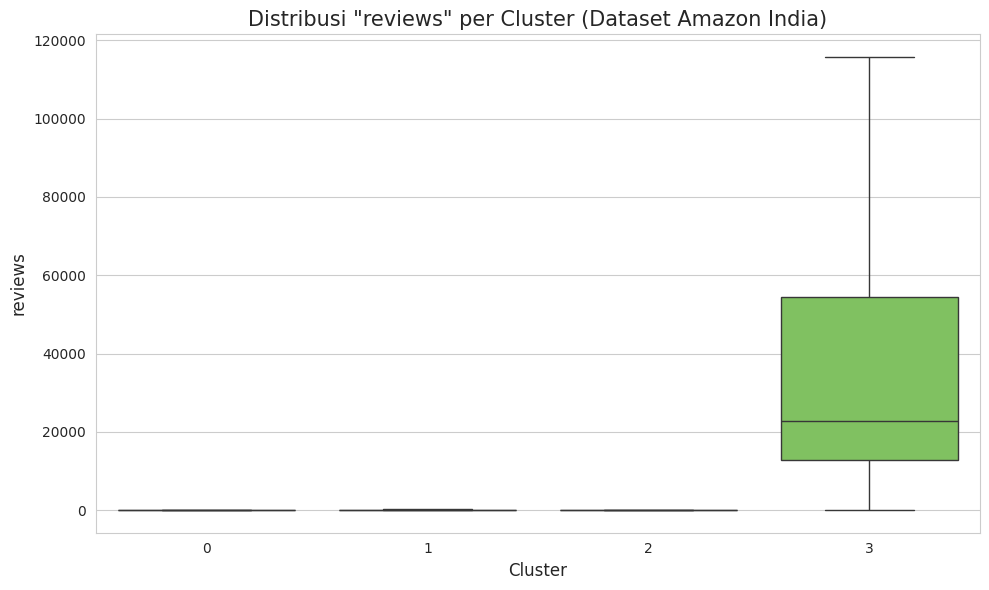

<ipython-input-47-8d9fb1059073>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amz_clustered, x='cluster', y=feature_num_amz, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus pada distribusi utama


Fitur 'price' memiliki nilai non-positif, tidak menggunakan skala log.


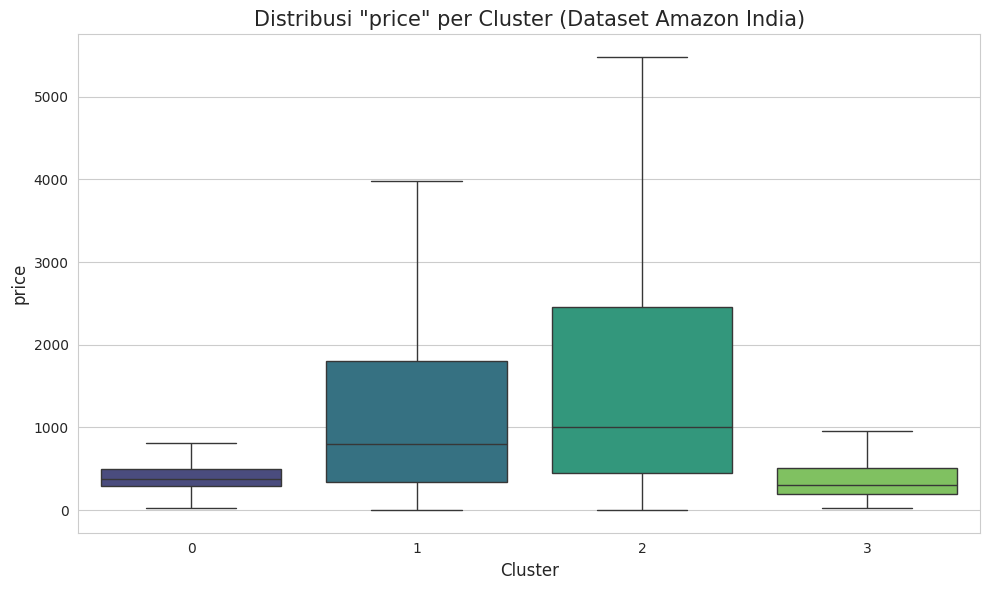

<ipython-input-47-8d9fb1059073>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amz_clustered, x='cluster', y=feature_num_amz, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus pada distribusi utama


Fitur 'listPrice' memiliki nilai non-positif, tidak menggunakan skala log.


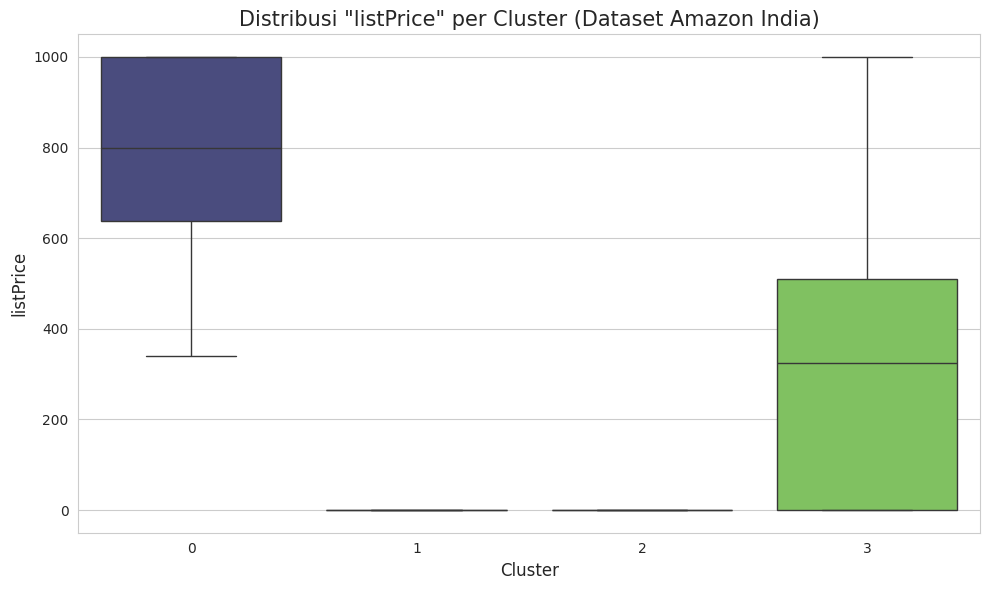

<ipython-input-47-8d9fb1059073>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amz_clustered, x='cluster', y=feature_num_amz, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus pada distribusi utama


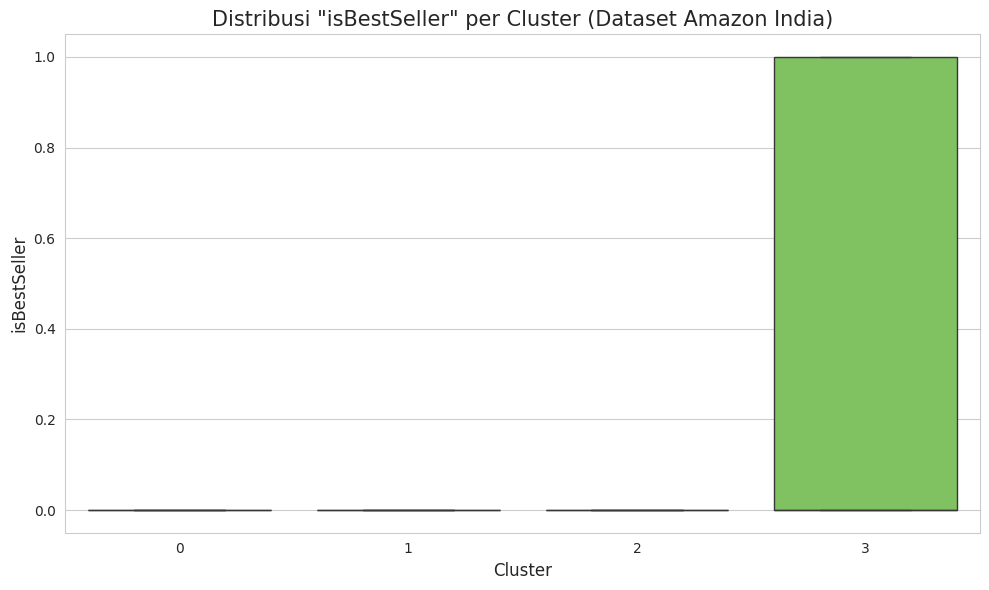

<ipython-input-47-8d9fb1059073>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_amz_clustered, x='cluster', y=feature_num_amz, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus pada distribusi utama


Fitur 'boughtInLastMonth' memiliki nilai non-positif, tidak menggunakan skala log.


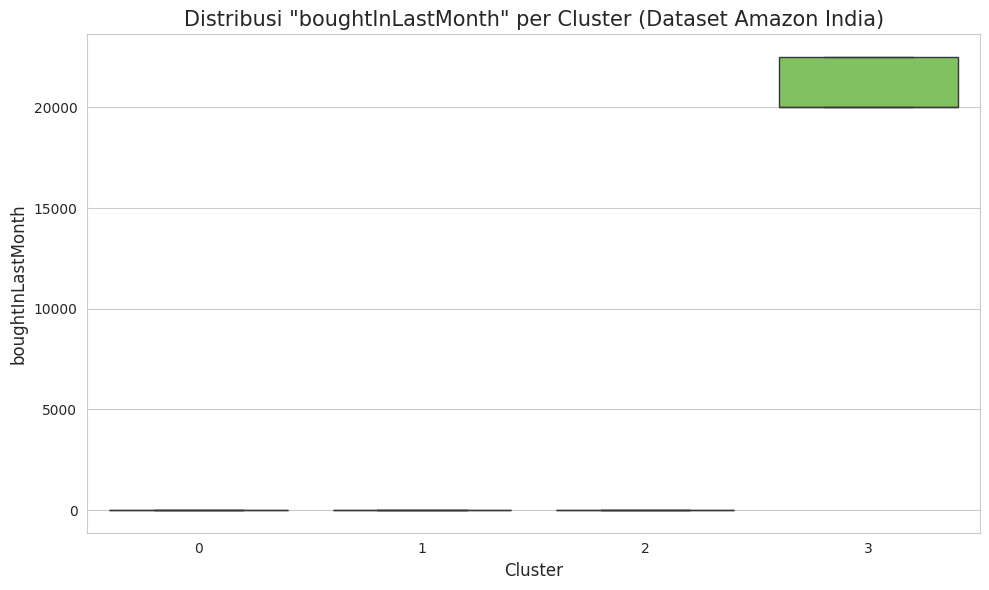

Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster dataset Amazon India.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan df_amz_clustered sudah ada dari langkah K-Means untuk dataset Amazon India
# df_amz_clustered berisi fitur-fitur dari df_subset dan kolom 'cluster'

# Set style untuk plot
sns.set_style("whitegrid")

# 1. Visualisasi Distribusi Fitur Kategorikal per Cluster (Dataset Amazon India)
categorical_features_amz_viz = ['categoryName']

print("Membuat visualisasi untuk fitur kategorikal (Dataset Amazon India)...")
for feature_cat_amz in categorical_features_amz_viz:
    plt.figure(figsize=(15, 8)) # Perbesar ukuran untuk categoryName

    # Ambil top N kategori paling umum secara keseluruhan untuk menjaga plot tetap terbaca
    # karena ada 214 kategori unik. Anda bisa sesuaikan N.
    top_n_categories = df_amz_clustered[feature_cat_amz].value_counts().nlargest(20).index

    # Filter DataFrame untuk hanya menyertakan top N kategori agar plot countplot lebih fokus
    df_filtered_cat = df_amz_clustered[df_amz_clustered[feature_cat_amz].isin(top_n_categories)]

    sns.countplot(data=df_filtered_cat, y=feature_cat_amz, hue='cluster', palette='viridis', order=top_n_categories)
    plt.title(f'Distribusi Top 20 "{feature_cat_amz}" per Cluster (Dataset Amazon India)', fontsize=15)
    plt.xlabel('Jumlah Item', fontsize=12)
    plt.ylabel(feature_cat_amz, fontsize=12)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# 2. Visualisasi Distribusi Fitur Numerik per Cluster (Dataset Amazon India)
numerical_features_amz_viz = [
    'stars', 'reviews', 'price', 'listPrice',
    'isBestSeller', 'boughtInLastMonth'
]

print("\nMembuat visualisasi untuk fitur numerik (Dataset Amazon India)...")
for feature_num_amz in numerical_features_amz_viz:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_amz_clustered, x='cluster', y=feature_num_amz, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus pada distribusi utama

    title_str = f'Distribusi "{feature_num_amz}" per Cluster (Dataset Amazon India)'

    # Pertimbangkan skala log untuk fitur dengan rentang sangat besar dan skewness tinggi
    if feature_num_amz in ['reviews', 'price', 'boughtInLastMonth', 'listPrice']:
        # Cek apakah ada nilai non-positif sebelum menerapkan skala log
        if (df_amz_clustered[feature_num_amz] > 0).all():
            plt.yscale('log')
            title_str += ' (Skala Log)'
        else:
            # Jika ada nilai <= 0, tambahkan 1 sebelum log (log(y+1)) atau biarkan linear
            # Untuk boxplot, lebih aman biarkan linear jika ada 0, atau filter 0 jika sesuai
            # Untuk saat ini, jika ada 0 atau negatif, kita tidak pakai skala log untuk fitur tsb.
             print(f"Fitur '{feature_num_amz}' memiliki nilai non-positif, tidak menggunakan skala log.")


    plt.title(title_str, fontsize=15)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature_num_amz, fontsize=12)
    plt.tight_layout()
    plt.show()

print("Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster dataset Amazon India.")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import f_oneway, chi2_contingency
import pandas as pd
from sklearn.utils import shuffle # Untuk mengambil sampel acak
import time

# Pastikan X_prepared (data yang sudah di-encode dan scale untuk dataset Amazon),
# cluster_labels_amz (label cluster untuk dataset Amazon),
# df_amz_clustered (data asli dengan kolom 'cluster' untuk dataset Amazon),
# dan N_CLUSTERS_AMZ (jumlah cluster yang dipilih, yaitu 4) sudah ada dari langkah-langkah sebelumnya.

print("--- Metrik Validitas Internal Cluster (Dataset Amazon India - Dihitung pada Sampel) ---")
if 'X_prepared' in locals() and 'cluster_labels_amz' in locals() and 'N_CLUSTERS_AMZ' in locals():

    sample_size_metrics = 100000 # Ukuran sampel untuk perhitungan metrik, bisa disesuaikan
    if X_prepared.shape[0] > sample_size_metrics:
        print(f"Mengambil sampel acak sebanyak {sample_size_metrics} baris untuk metrik validitas...")
        # Pastikan kita mengambil sampel dari X_prepared dan cluster_labels_amz yang sesuai
        # Kita perlu mengindeks cluster_labels_amz berdasarkan indeks sampel dari X_prepared

        # Cara paling mudah: shuffle keduanya bersamaan jika memungkinkan atau sampel indeks
        indices = np.arange(X_prepared.shape[0])
        np.random.shuffle(indices)
        sample_indices = indices[:sample_size_metrics]

        X_prepared_sample_metrics = X_prepared[sample_indices]
        cluster_labels_sample_metrics = cluster_labels_amz[sample_indices]

        print(f"Dimensi sampel X_prepared untuk metrik: {X_prepared_sample_metrics.shape}")
        print(f"Dimensi sampel label cluster untuk metrik: {cluster_labels_sample_metrics.shape}")

    else:
        print("Ukuran dataset lebih kecil dari ukuran sampel, menggunakan keseluruhan data untuk metrik.")
        X_prepared_sample_metrics = X_prepared
        cluster_labels_sample_metrics = cluster_labels_amz

    start_time_metrics = time.time()
    print("Menghitung metrik validitas pada sampel...")
    silhouette_avg_amz = silhouette_score(X_prepared_sample_metrics, cluster_labels_sample_metrics)
    print(f"Rata-rata Silhouette Score untuk {N_CLUSTERS_AMZ} clusters (Sampel): {silhouette_avg_amz:.4f}")

    db_score_amz = davies_bouldin_score(X_prepared_sample_metrics, cluster_labels_sample_metrics)
    print(f"Davies-Bouldin Index (Sampel): {db_score_amz:.4f}")

    ch_score_amz = calinski_harabasz_score(X_prepared_sample_metrics, cluster_labels_sample_metrics)
    print(f"Calinski-Harabasz Index (Sampel): {ch_score_amz:.4f}")
    end_time_metrics = time.time()
    print(f"Perhitungan metrik validitas pada sampel selesai dalam {((end_time_metrics - start_time_metrics) / 60):.2f} menit.")

else:
    print("Variabel X_prepared, cluster_labels_amz, atau N_CLUSTERS_AMZ tidak ditemukan. Tidak dapat menghitung metrik validitas.")

# --- Bagian ANOVA dan Chi-square tetap sama, dijalankan pada data penuh df_amz_clustered ---

print("\n--- Analisis Perbedaan Fitur Antar Cluster (Dataset Amazon India - Data Penuh) ---")

# ANOVA untuk Fitur Numerik (Dataset Amazon India)
numerical_features_amz_analysis = ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']
print("\n Hasil ANOVA untuk Fitur Numerik (Dataset Amazon India):")
if 'df_amz_clustered' in locals() and 'N_CLUSTERS_AMZ' in locals():
    for feature_num_amz in numerical_features_amz_analysis:
        if feature_num_amz in df_amz_clustered.columns:
            grouped_data_amz = [df_amz_clustered[feature_num_amz][df_amz_clustered['cluster'] == i] for i in range(N_CLUSTERS_AMZ)]
            grouped_data_cleaned_amz = [group for group in grouped_data_amz if not group.empty]

            if len(grouped_data_cleaned_amz) > 1:
                f_statistic_amz, p_value_amz = f_oneway(*grouped_data_cleaned_amz)
                print(f"  Fitur: {feature_num_amz}")
                print(f"    F-statistic: {f_statistic_amz:.4f}")
                print(f"    P-value: {p_value_amz:.4g}")
                if p_value_amz < 0.05:
                    print("    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).")
                else:
                    print("    Kesimpulan: Tidak ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p >= 0.05).")
            else:
                print(f"  Fitur: {feature_num_amz} - Tidak cukup grup data untuk ANOVA.")
        else:
            print(f"  Fitur: {feature_num_amz} tidak ditemukan di df_amz_clustered.")
else:
    print("Variabel df_amz_clustered atau N_CLUSTERS_AMZ tidak ditemukan. Tidak dapat melakukan ANOVA.")

# Chi-square Test untuk Fitur Kategorikal (Dataset Amazon India)
categorical_features_amz_analysis = ['categoryName']
print("\n Hasil Chi-square Test untuk Fitur Kategorikal (Dataset Amazon India):")
if 'df_amz_clustered' in locals():
    for feature_cat_amz in categorical_features_amz_analysis:
        if feature_cat_amz in df_amz_clustered.columns:
            contingency_table_amz = pd.crosstab(df_amz_clustered[feature_cat_amz], df_amz_clustered['cluster'])
            chi2_amz, p_value_amz, dof_amz, expected_amz = chi2_contingency(contingency_table_amz)
            print(f"  Fitur: {feature_cat_amz}")
            print(f"    Chi-square statistic: {chi2_amz:.4f}")
            print(f"    P-value: {p_value_amz:.4g}")
            print(f"    Degrees of Freedom: {dof_amz}")
            if p_value_amz < 0.05:
                print("    Kesimpulan: Ada hubungan yang signifikan secara statistik antara fitur dan cluster (p < 0.05).")
            else:
                print("    Kesimpulan: Tidak ada hubungan yang signifikan secara statistik antara fitur dan cluster (p >= 0.05).")
        else:
            print(f"  Fitur: {feature_cat_amz} tidak ditemukan di df_amz_clustered.")
else:
    print("Variabel df_amz_clustered tidak ditemukan. Tidak dapat melakukan Chi-square test.")

--- Metrik Validitas Internal Cluster (Dataset Amazon India - Dihitung pada Sampel) ---
Mengambil sampel acak sebanyak 100000 baris untuk metrik validitas...
Dimensi sampel X_prepared untuk metrik: (100000, 220)
Dimensi sampel label cluster untuk metrik: (100000,)
Menghitung metrik validitas pada sampel...
Rata-rata Silhouette Score untuk 4 clusters (Sampel): 0.3016
Davies-Bouldin Index (Sampel): 1.0938
Calinski-Harabasz Index (Sampel): 15151.4695
Perhitungan metrik validitas pada sampel selesai dalam 4.01 menit.

--- Analisis Perbedaan Fitur Antar Cluster (Dataset Amazon India - Data Penuh) ---

 Hasil ANOVA untuk Fitur Numerik (Dataset Amazon India):
  Fitur: stars
    F-statistic: 1414205.0745
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: reviews
    F-statistic: 11666.0440
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: price
    F-


Analisis Hasil Tes Signifikansi (Dataset Amazon India - Sampel & Penuh)
Metrik Validitas Internal Cluster (Dihitung pada Sampel 100.000 data)
Rata-rata Silhouette Score (Sampel): 0.3016
Skor ini cukup baik dan positif, menunjukkan bahwa cluster memiliki kohesi dan separasi yang lumayan pada sampel. Meskipun sedikit lebih rendah dari Silhouette Score pada dataset keempat (yang lebih kecil dan memiliki fitur berbeda), nilai ini masih mengindikasikan struktur cluster yang bermakna.
Davies-Bouldin Index (Sampel): 1.0938
Nilai ini relatif rendah, yang bagus karena menunjukkan cluster yang terpisah dengan baik. Ini adalah skor Davies-Bouldin terbaik yang kita lihat sejauh ini di antara semua dataset, bahkan pada sampel.
Calinski-Harabasz Index (Sampel): 15151.4695
Skor ini sangat tinggi, jauh lebih tinggi dari dataset-dataset sebelumnya. Ini mengindikasikan rasio yang sangat baik antara dispersi antar-cluster dan dispersi intra-cluster, yang berarti cluster cenderung padat dan terpisah dengan sangat baik pada sampel ini.
Secara keseluruhan, metrik validitas internal yang dihitung pada sampel besar ini menunjukkan bahwa pembentukan 4 cluster pada dataset Amazon India sangat baik dan memiliki struktur yang jelas.

Analisis Perbedaan Fitur Antar Cluster (Dihitung pada Data Penuh)
Hasil ANOVA untuk Fitur Numerik:

Untuk SEMUA fitur numerik yang diuji (stars, reviews, price, listPrice, isBestSeller, boughtInLastMonth), P-value adalah 0 (atau sangat kecil). F-statistic juga sangat tinggi.
Kesimpulan: Ini menunjukkan adanya perbedaan rata-rata yang sangat signifikan secara statistik untuk semua fitur numerik ini di antara keempat cluster. Ini sangat mendukung interpretasi kita sebelumnya bahwa cluster-cluster tersebut memang berbeda berdasarkan karakteristik numerik produk.
Hasil Chi-square Test untuk Fitur Kategorikal:

Untuk fitur categoryName, P-value adalah 0 dengan Chi-square statistic yang sangat besar.
Kesimpulan: Ada hubungan yang sangat signifikan secara statistik antara fitur categoryName dan keanggotaan cluster. Distribusi kategori produk berbeda secara signifikan antar cluster.
Kesimpulan dari Tes Signifikansi (Dataset Amazon India)
Tes signifikansi untuk dataset Amazon India ini, bahkan dengan metrik validitas yang dihitung pada sampel, memberikan bukti statistik yang sangat kuat bahwa:

Cluster yang terbentuk memiliki struktur yang sangat baik, jelas, dan terpisah, didukung oleh metrik validitas internal yang sangat baik (terutama Davies-Bouldin dan Calinski-Harabasz).
Cluster-cluster tersebut secara signifikan berbeda satu sama lain berdasarkan semua fitur numerik dan fitur kategorikal categoryName.
Ini adalah hasil yang sangat positif dan menunjukkan bahwa K-Means mampu menemukan pola yang sangat berbeda dan signifikan secara statistik dalam dataset produk Amazon India yang besar dan kompleks ini.

In [ ]:
import pandas as pd
import numpy as np # Impor numpy untuk tipe data numerik jika diperlukan nanti

file_path = '/kaggle/input/amazon-brazil-products-2023-1-3m-products/amz_br_total_products_data_processed.csv'
print(f"Memuat dataset dari: {file_path}")

df = None # Initialize DataFrame to None

try:
    # Mencoba dengan encoding utf-8 terlebih dahulu
    df = pd.read_csv(file_path, low_memory=False) # low_memory=False untuk dataset besar dengan tipe campuran
    print("Dataset berhasil dimuat dengan encoding 'utf-8'! ✅")
except UnicodeDecodeError:
    print("Gagal memuat dengan 'utf-8', mencoba 'latin1'...")
    try:
        df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
        print("Dataset berhasil dimuat dengan encoding 'latin1'! ✅")
    except UnicodeDecodeError:
        print("Gagal memuat dengan 'latin1', mencoba 'iso-8859-1'...")
        try:
            df = pd.read_csv(file_path, encoding='iso-8859-1', low_memory=False)
            print("Dataset berhasil dimuat dengan encoding 'iso-8859-1'! ✅")
        except UnicodeDecodeError:
            print("Gagal memuat dengan 'iso-8859-1', mencoba 'cp1252'...")
            try:
                df = pd.read_csv(file_path, encoding='cp1252', low_memory=False)
                print("Dataset berhasil dimuat dengan encoding 'cp1252'! ✅")
            except Exception as e:
                print(f"❌ Gagal memuat dataset dengan semua encoding yang dicoba. Error: {e} 💥")
except FileNotFoundError:
    print(f"❌ File tidak ditemukan di path: {file_path}")
    print("Pastikan path file sudah benar.")
except Exception as e:
    print(f"Terjadi error lain saat memuat dataset: {e} 💥")

# Jika dataset berhasil dimuat, tampilkan informasinya
if df is not None:
    print("\nLima baris pertama dataset:")
    print(df.head())

    print("\nInformasi dataset (lebih detail):")
    # Menggunakan verbose=True dan show_counts=True untuk info yang lebih lengkap
    df.info(verbose=True, show_counts=True)

    print("\nStatistik deskriptif dataset (untuk semua tipe kolom):")
    # Menggunakan include='all' untuk mendapatkan statistik untuk kolom numerik dan objek
    print(df.describe(include='all'))

    print("\nJumlah missing values per kolom:")
    print(df.isnull().sum())

    print("\nJumlah nilai unik di setiap kolom dataset:")
    for col in df.columns:
        if col in df.columns: # Cek kolom masih ada
            print(f"- {col}: {df[col].nunique()} nilai unik")
        else:
            print(f"- {col}: (Kolom tidak ditemukan)")

    print("\nContoh beberapa nilai unik untuk setiap kolom dataset (maks 5 per kolom untuk brevity):")
    for col in df.columns:
        if col not in df.columns: # Periksa lagi jika kolom ada
            print(f"- {col}: (Kolom tidak ditemukan)")
            continue
        if df[col].nunique() == 0:
            print(f"- {col}: (Kolom kosong)")
            continue

        unique_values = df[col].unique()
        display_limit = 5 # Batasi contoh unik yang ditampilkan menjadi 5

        # Cek jika kolom adalah list atau dict yang di-encode sebagai string, jangan tampilkan langsung
        is_list_like_string = False
        try:
            if isinstance(unique_values[0], str) and \
               ((unique_values[0].startswith('[') and unique_values[0].endswith(']')) or \
                (unique_values[0].startswith('{') and unique_values[0].endswith('}'))):
                is_list_like_string = True
        except IndexError: # Jika kolom kosong setelah dropna atau unique_values kosong
            is_list_like_string = False

        if pd.api.types.is_numeric_dtype(df[col].dtype) and df[col].nunique() > 20:
             print(f"- {col} (numerik dengan >20 nilai unik): Min={df[col].min()}, Max={df[col].max()}, {df[col].nunique()} nilai unik")
        elif is_list_like_string and df[col].nunique() > 5:
            print(f"- {col} (contoh string list-like): {unique_values[:2]} ... (total {len(unique_values)} unik)")
        elif len(unique_values) > display_limit:
            print(f"- {col} (contoh): {unique_values[:display_limit]} ... (total {len(unique_values)} unik)")
        else:
            print(f"- {col}: {unique_values}")
else:
    print("Dataset tidak berhasil dimuat, tidak ada informasi untuk ditampilkan.")

Memuat dataset dari: /kaggle/input/amazon-brazil-products-2023-1-3m-products/amz_br_total_products_data_processed.csv
Dataset berhasil dimuat dengan encoding 'utf-8'! ✅

Lima baris pertama dataset:
         asin                                              title  \
0  B0C154VR2L  SAMSUNG Smart TV Crystal 50" 4K UHD CU7700 - A...   
1  B0C85J5HYD  Mini Projetor Portatil 5G Wifi 6 Bluetooth 5.0...   
2  B0C1538ZJ4  Samsung Smart TV Crystal 43" 4K UHD CU7700 - A...   
3  B0B4V379PC  Samsung 60BU8000 - Smart TV LED 60' 4K UHD, Wi...   
4  B0899BRB4B        Smart TV LED 32'' HD Samsung LH32BETBLGGXZD   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/71vk2qFDSP...   
1  https://m.media-amazon.com/images/I/5133wKaOqS...   
2  https://m.media-amazon.com/images/I/71vk2qFDSP...   
3  https://m.media-amazon.com/images/I/8110fzpU-P...   
4  https://m.media-amazon.com/images/I/61M025WzQd...   

                                productURL  stars  revie

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# df adalah DataFrame yang sudah dimuat dari dataset Amazon Brazil
# Pastikan df sudah ada.

print("Memulai pra-pemrosesan untuk dataset Amazon Brazil...")

# Salin dataframe untuk menghindari perubahan pada df asli
df_processed = df.copy()

# 1. Menangani Missing Values pada 'title'
df_processed['title'] = df_processed['title'].fillna('Unknown')
print("Missing value pada 'title' telah diisi.")

# 2. Membuang Kolom yang Tidak Perlu/Kompleks
cols_to_drop = ['asin', 'title', 'imgUrl', 'productURL']
df_processed = df_processed.drop(columns=cols_to_drop)
print(f"Kolom berikut telah dihapus: {cols_to_drop}")

# 3. Mengonversi Fitur Boolean 'isBestSeller' ke numerik (0/1)
df_processed['isBestSeller'] = df_processed['isBestSeller'].astype(int)
print("'isBestSeller' telah diubah menjadi tipe integer (0/1).")

# 4. Definisi Fitur untuk Clustering
categorical_features = ['categoryName']
numerical_features = ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']

print(f"\nFitur kategorikal yang akan digunakan: {categorical_features}")
print(f"Fitur numerik yang akan digunakan: {numerical_features}")

# Membuat DataFrame subset dengan fitur yang dipilih
features_for_clustering = categorical_features + numerical_features
df_subset = df_processed[features_for_clustering].copy()

# 5. Membuat Preprocessor untuk Encoding dan Scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

print("\nMenerapkan encoding dan scaling...")
# Terapkan preprocessor ke data
# Ini mungkin memakan waktu dan memori
X_prepared = preprocessor.fit_transform(df_subset)

print(f"Proses encoding dan scaling selesai.")
print(f"Dimensi data yang sudah diproses (X_prepared): {X_prepared.shape}")

# (Opsional) Membuat DataFrame dari X_prepared untuk inspeksi jika diperlukan
# try:
#     print("\nMencoba membuat DataFrame dari data yang diproses untuk inspeksi (mungkin memakan waktu/memori)...")
#     onehot_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
#     feature_names_prepared = numerical_features + list(onehot_cols)

#     sample_size_for_df = min(1000, X_prepared.shape[0])
#     df_prepared_sample = pd.DataFrame(X_prepared[:sample_size_for_df], columns=feature_names_prepared)

#     print("Lima baris pertama data yang sudah di-encode dan di-scale (sampel):")
#     print(df_prepared_sample.head())
#     print(f"Total kolom setelah one-hot encoding: {len(feature_names_prepared)}")
# except Exception as e:
#     print(f"Error saat membuat DataFrame inspeksi: {e}")

print("\nData siap untuk tahap clustering! ✅")
# Variabel X_prepared akan digunakan untuk clustering.

Memulai pra-pemrosesan untuk dataset Amazon Brazil...
Missing value pada 'title' telah diisi.
Kolom berikut telah dihapus: ['asin', 'title', 'imgUrl', 'productURL']
'isBestSeller' telah diubah menjadi tipe integer (0/1).

Fitur kategorikal yang akan digunakan: ['categoryName']
Fitur numerik yang akan digunakan: ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']

Menerapkan encoding dan scaling...
Proses encoding dan scaling selesai.
Dimensi data yang sudah diproses (X_prepared): (1344513, 212)

Data siap untuk tahap clustering! ✅


Mengambil sampel acak sebanyak 100000 baris untuk Elbow Method (Dataset Brazil)...
Dimensi sampel X_prepared_br_sample: (100000, 212)

Menghitung inertia untuk berbagai nilai K (Elbow Method) pada sampel data Amazon Brazil...
  Menjalankan K-Means untuk K=1...
    Inertia untuk K=1: 578306.36
  Menjalankan K-Means untuk K=2...
    Inertia untuk K=2: 479365.16
  Menjalankan K-Means untuk K=3...
    Inertia untuk K=3: 423068.09
  Menjalankan K-Means untuk K=4...
    Inertia untuk K=4: 329826.40
  Menjalankan K-Means untuk K=5...
    Inertia untuk K=5: 285119.26
  Menjalankan K-Means untuk K=6...
    Inertia untuk K=6: 262876.44
  Menjalankan K-Means untuk K=7...
    Inertia untuk K=7: 243344.43
  Menjalankan K-Means untuk K=8...
    Inertia untuk K=8: 197457.79
  Menjalankan K-Means untuk K=9...
    Inertia untuk K=9: 176463.95
  Menjalankan K-Means untuk K=10...
    Inertia untuk K=10: 164623.38
  Menjalankan K-Means untuk K=11...
    Inertia untuk K=11: 158259.11


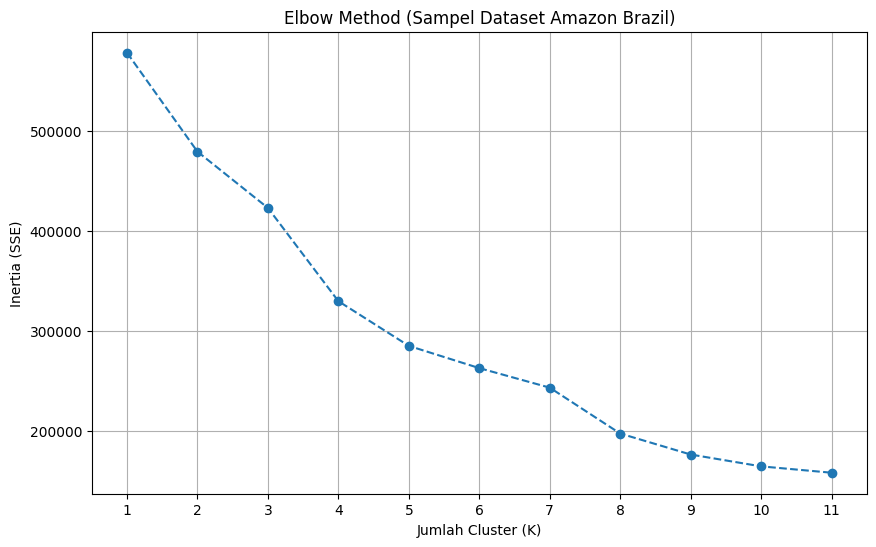


Silakan amati plot elbow di atas untuk menentukan jumlah K yang optimal untuk dataset Brazil.
Setelah itu, sesuaikan nilai N_CLUSTERS_BR pada blok kode berikutnya.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.utils import shuffle # Untuk mengambil sampel acak
import numpy as np # Untuk np.arange jika diperlukan untuk indexing

# X_prepared adalah data yang sudah siap dari langkah pra-pemrosesan (1.344.513, 212)
# df_subset adalah DataFrame sebelum di-encode/scale, berisi fitur-fitur
# 'categoryName', 'stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth'
# untuk dataset Amazon Brazil.
# Pastikan variabel X_prepared dan df_subset (yang sesuai dengan dataset Brazil) sudah ada.

# 1. Mengambil sampel acak dari X_prepared untuk Elbow Method
sample_size_br = 100000 # Ukuran sampel, bisa disesuaikan
if 'X_prepared' in locals() and X_prepared.shape[0] > sample_size_br:
    print(f"Mengambil sampel acak sebanyak {sample_size_br} baris untuk Elbow Method (Dataset Brazil)...")

    # Membuat indeks acak untuk sampling X_prepared dan df_subset secara konsisten
    # (Meskipun untuk Elbow hanya X_prepared_sample yang dipakai, ini best practice jika df_subset_sample dibutuhkan nanti)
    indices_br = np.arange(X_prepared.shape[0])
    np.random.shuffle(indices_br) # Aduk indeks
    sample_indices_br = indices_br[:sample_size_br] # Ambil N indeks pertama

    X_prepared_br_sample = X_prepared[sample_indices_br]
    # Jika Anda juga ingin df_subset_br_sample:
    # df_subset_br_sample = df_subset.iloc[sample_indices_br]

    print(f"Dimensi sampel X_prepared_br_sample: {X_prepared_br_sample.shape}")
elif 'X_prepared' in locals():
    print("Ukuran dataset lebih kecil dari atau sama dengan ukuran sampel yang diinginkan, menggunakan keseluruhan data untuk Elbow Method.")
    X_prepared_br_sample = X_prepared
else:
    print("Variabel X_prepared tidak ditemukan. Harap jalankan langkah pra-pemrosesan sebelumnya.")
    # Hentikan eksekusi lebih lanjut jika X_prepared tidak ada
    # (Dalam environment interaktif, ini bisa diganti dengan raise error atau return)
    # Untuk sekarang, kita asumsikan X_prepared ada.

# Pastikan X_prepared_br_sample terdefinisi sebelum lanjut
if 'X_prepared_br_sample' in locals():
    # 2. Menentukan K optimal menggunakan Elbow Method pada SAMPEL
    inertia_br = []
    # Rentang K yang akan dicoba
    k_range_br = range(1, 12)

    print("\nMenghitung inertia untuk berbagai nilai K (Elbow Method) pada sampel data Amazon Brazil...")
    for k_val_br in k_range_br:
        print(f"  Menjalankan K-Means untuk K={k_val_br}...")
        kmeans_elbow_br = KMeans(n_clusters=k_val_br, init='k-means++', random_state=42, n_init='auto')
        kmeans_elbow_br.fit(X_prepared_br_sample)
        inertia_br.append(kmeans_elbow_br.inertia_)
        print(f"    Inertia untuk K={k_val_br}: {kmeans_elbow_br.inertia_:.2f}")

    # Plot Elbow Method
    plt.figure(figsize=(10, 6))
    plt.plot(k_range_br, inertia_br, marker='o', linestyle='--')
    plt.title('Elbow Method (Sampel Dataset Amazon Brazil)')
    plt.xlabel('Jumlah Cluster (K)')
    plt.ylabel('Inertia (SSE)')
    plt.xticks(k_range_br)
    plt.grid(True)
    plt.show()

    print("\nSilakan amati plot elbow di atas untuk menentukan jumlah K yang optimal untuk dataset Brazil.")
    print("Setelah itu, sesuaikan nilai N_CLUSTERS_BR pada blok kode berikutnya.")
else:
    print("Tidak dapat melanjutkan karena X_prepared_br_sample tidak terdefinisi.")

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import time # Untuk mengukur waktu eksekusi
import numpy as np # Pastikan numpy diimpor

# X_prepared adalah data yang sudah siap dari langkah pra-pemrosesan (1.344.513, 212) untuk Amazon Brazil
# df_subset adalah DataFrame sebelum di-encode/scale untuk Amazon Brazil, berisi fitur-fitur
# 'categoryName', 'stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth'
# Pastikan variabel X_prepared dan df_subset (yang sesuai dengan dataset Brazil) sudah ada.

N_CLUSTERS_BR = 4
print(f"\nMenjalankan K-Means dengan K = {N_CLUSTERS_BR} pada keseluruhan dataset Amazon Brazil ({X_prepared.shape[0]} baris)...")
print("Proses ini mungkin memakan waktu beberapa menit atau lebih...")

start_time_br = time.time()
kmeans_br = KMeans(n_clusters=N_CLUSTERS_BR, init='k-means++', random_state=42, n_init='auto')
cluster_labels_br = kmeans_br.fit_predict(X_prepared)
end_time_br = time.time()

print(f"Proses K-Means selesai dalam {((end_time_br - start_time_br) / 60):.2f} menit.")

# Menambahkan label cluster kembali ke DataFrame (df_subset untuk Brazil)
# df_subset harusnya memiliki jumlah baris yang sama dengan X_prepared
if 'df_subset' in locals() and df_subset.shape[0] == X_prepared.shape[0]:
    df_br_clustered = df_subset.copy()
    df_br_clustered['cluster'] = cluster_labels_br

    print(f"\nLima baris pertama data Amazon Brazil dengan label cluster (dari df_subset):")
    print(df_br_clustered.head())

    print(f"\nDistribusi item per cluster (Dataset Amazon Brazil):")
    print(df_br_clustered['cluster'].value_counts().sort_index())

    # Karakteristik tiap cluster (Dataset Amazon Brazil)
    print("\nKarakteristik Rata-Rata Fitur Numerik per Cluster (Dataset Amazon Brazil):")
    # Fitur numerik asli yang dipilih untuk dataset Brazil
    numerical_features_br_analysis = ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']
    # Pastikan semua kolom ini ada di df_br_clustered
    valid_numerical_features_br = [col for col in numerical_features_br_analysis if col in df_br_clustered.columns]
    if valid_numerical_features_br:
        print(df_br_clustered.groupby('cluster')[valid_numerical_features_br].mean())
    else:
        print("Tidak ada fitur numerik yang valid ditemukan untuk analisis rata-rata.")

    print("\nKarakteristik Modus Fitur Kategorikal per Cluster (Dataset Amazon Brazil):")
    # Fitur kategorikal asli yang dipilih untuk dataset Brazil
    categorical_features_br_analysis = ['categoryName']
    # Pastikan semua kolom ini ada di df_br_clustered
    valid_categorical_features_br = [col for col in categorical_features_br_analysis if col in df_br_clustered.columns]
    if valid_categorical_features_br:
        for col_cat_br in valid_categorical_features_br:
            print(f"\nModus untuk '{col_cat_br}' per cluster (Dataset Amazon Brazil):")
            mode_results_br = df_br_clustered.groupby('cluster')[col_cat_br].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A")
            print(mode_results_br)
    else:
        print("Tidak ada fitur kategorikal yang valid ditemukan untuk analisis modus.")
else:
    print("Variabel df_subset (untuk Brazil) tidak ditemukan atau jumlah barisnya tidak sesuai dengan X_prepared.")
    print("Tidak dapat menambahkan label cluster atau menampilkan karakteristik.")


Menjalankan K-Means dengan K = 4 pada keseluruhan dataset Amazon Brazil (1344513 baris)...
Proses ini mungkin memakan waktu beberapa menit atau lebih...
Proses K-Means selesai dalam 0.75 menit.

Lima baris pertama data Amazon Brazil dengan label cluster (dari df_subset):
                 categoryName  stars  reviews    price  listPrice  \
0  TV, Áudio e Cinema em Casa    4.6      269  2279.05        0.0   
1  TV, Áudio e Cinema em Casa    4.5      816   409.99        0.0   
2  TV, Áudio e Cinema em Casa    4.7      638  1969.00     2499.0   
3  TV, Áudio e Cinema em Casa    4.6      675  3099.00        0.0   
4  TV, Áudio e Cinema em Casa    4.7     3945  1079.90     1369.0   

   isBestSeller  boughtInLastMonth  cluster  
0             0                  0        0  
1             1               5000        2  
2             0                  0        0  
3             0                  0        0  
4             1                  0        2  

Distribusi item per cluster (Datase

Interpretasi Hasil Cluster (Dataset Amazon Brazil, K=4)
Berikut adalah ringkasan dan perkiraan interpretasi untuk setiap cluster:

Cluster 0: "Produk Digital/Aplikasi & Game dengan Rating Baik"

Jumlah Anggota: 437.872
Modus categoryName: Apps e Jogos (Aplikasi & Game)
Karakteristik Numerik Rata-rata:
stars: ~4.44 (sangat baik)
reviews: ~566 (lumayan banyak)
price: ~187.5 (relatif rendah/sedang)
listPrice: ~108.0 (menunjukkan beberapa produk mungkin memiliki harga asli yang lebih rendah atau sering didiskon)
isBestSeller: 0.0 (hampir tidak ada yang bestseller)
boughtInLastMonth: ~10.8 (aktivitas penjualan moderat)
Interpretasi: Cluster ini tampaknya mengelompokkan produk-produk digital seperti Aplikasi dan Game, atau kategori lain dengan karakteristik serupa. Produk-produk ini memiliki rating bintang yang sangat baik dan jumlah review yang cukup. Harganya cenderung terjangkau. Meskipun ratingnya bagus, mereka jarang menjadi bestseller.
Cluster 1: "Produk Bayi & Lainnya dengan Interaksi Sangat Rendah"

Jumlah Anggota: 895.937 (Cluster terbesar)
Modus categoryName: Bebês (Bayi)
Karakteristik Numerik Rata-rata:
stars: ~0.01 (sangat rendah, hampir tidak ada rating)
reviews: ~0.02 (sangat sedikit, hampir tidak ada review)
price: ~160.5 (rendah/sedang)
listPrice: ~36.0 (rendah, mungkin banyak yang tidak ada listPrice atau nilainya 0)
isBestSeller: 0.0 (tidak ada yang bestseller)
boughtInLastMonth: ~0.009 (sangat rendah, hampir tidak ada penjualan)
Interpretasi: Ini adalah cluster terbesar yang didominasi oleh produk dari kategori "Bayi" atau kategori lain dengan interaksi pelanggan yang sangat minim (rating dan review hampir nol) dan aktivitas penjualan yang juga sangat rendah. Harganya relatif terjangkau. Ini bisa jadi produk baru, produk yang kurang populer, atau listing yang kurang optimal.
Cluster 2: "eBooks Kindle Super Laris & Populer"

Jumlah Anggota: 2.456 (Cluster terkecil, sangat spesifik)
Modus categoryName: eBooks Kindle
Karakteristik Numerik Rata-rata:
stars: ~4.51 (sangat baik)
reviews: ~15.093 (sangat tinggi!)
price: ~105.2 (relatif rendah)
listPrice: ~92.5 (mirip dengan harga jual, mungkin sedikit diskon atau harga tetap)
isBestSeller: ~0.973 (sangat tinggi! Hampir semuanya adalah bestseller)
boughtInLastMonth: ~446 (sangat tinggi! Penjualan bulan lalu signifikan)
Interpretasi: Cluster yang sangat kecil namun sangat berbeda ini dengan jelas mengidentifikasi eBooks Kindle yang sangat populer, laris, dan memiliki banyak review. Mereka memiliki rating bintang yang sangat baik dan hampir semuanya adalah bestseller. Ini adalah produk digital dengan performa penjualan yang kuat.
Cluster 3: "Notebook & Elektronik Mahal dengan Aktivitas Rendah"

Jumlah Anggota: 8.248
Modus categoryName: Notebooks
Karakteristik Numerik Rata-rata:
stars: ~0.93 (sangat rendah)
reviews: ~49 (rendah)
price: ~8089 (paling tinggi rata-ratanya)
listPrice: ~978.6 (jauh lebih rendah dari harga jual, ini anomali dan mungkin banyak yang listPrice-nya 0 atau salah data, sehingga rata-ratanya rendah)
isBestSeller: 0.0 (tidak ada yang bestseller)
boughtInLastMonth: ~0.16 (sangat rendah)
Interpretasi: Cluster ini tampaknya berisi produk-produk dengan harga rata-rata paling tinggi, dengan kategori dominan "Notebooks" atau elektronik mahal lainnya. Produk-produk ini memiliki rating bintang dan jumlah review yang sangat rendah, serta aktivitas penjualan yang minim. Anomali pada listPrice perlu diperhatikan.
Observasi Penting dari Dataset Amazon Brazil:

Pemisahan Berdasarkan Kategori dan Performa Penjualan: Cluster sangat dibedakan oleh kombinasi kategori produk, harga, jumlah review, status bestseller, dan angka penjualan.
Identifikasi Segmen Niche/Ekstrem: K-Means berhasil mengisolasi kelompok produk yang sangat berperforma tinggi (Cluster 2 - eBooks Kindle) dan kelompok produk mahal dengan interaksi rendah (Cluster 3 - Notebooks).
Perilaku listPrice: Sama seperti dataset Amazon India, rata-rata listPrice yang rendah pada beberapa cluster dibandingkan price mungkin mengindikasikan bahwa banyak produk tidak memiliki listPrice yang valid.
Dominasi Kategori: Modus categoryName memberikan identitas yang cukup jelas untuk setiap cluster, seperti "Apps e Jogos", "Bebês", "eBooks Kindle", dan "Notebooks".
Hasil ini kembali menunjukkan bagaimana K-Means dapat menemukan segmen yang berbeda dalam dataset produk yang besar.

Membuat visualisasi untuk fitur kategorikal (Dataset Amazon Brazil)...


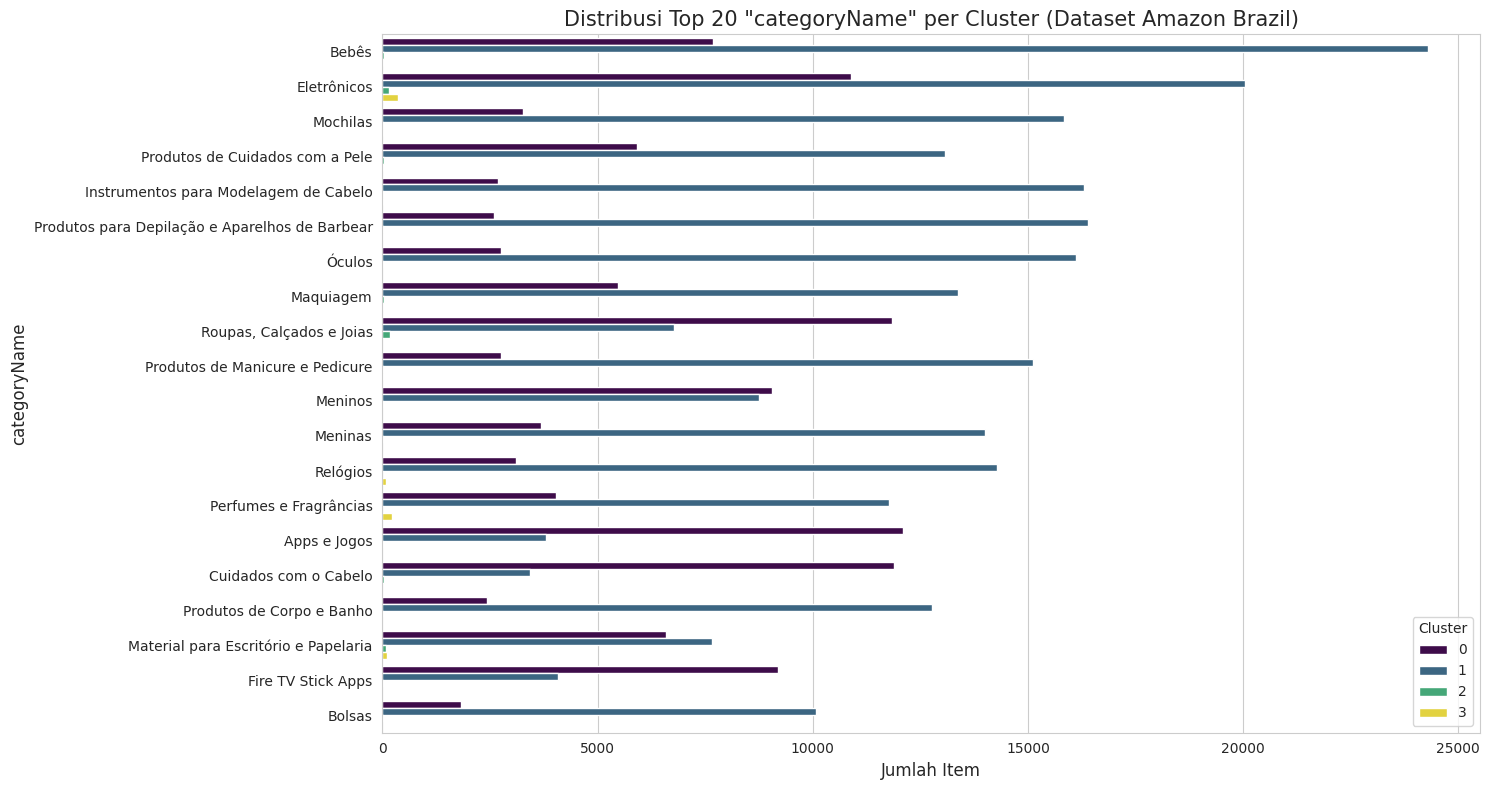


Membuat visualisasi untuk fitur numerik (Dataset Amazon Brazil)...


<ipython-input-17-de0f4172e5bc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_br_clustered, x='cluster', y=feature_num_br, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus


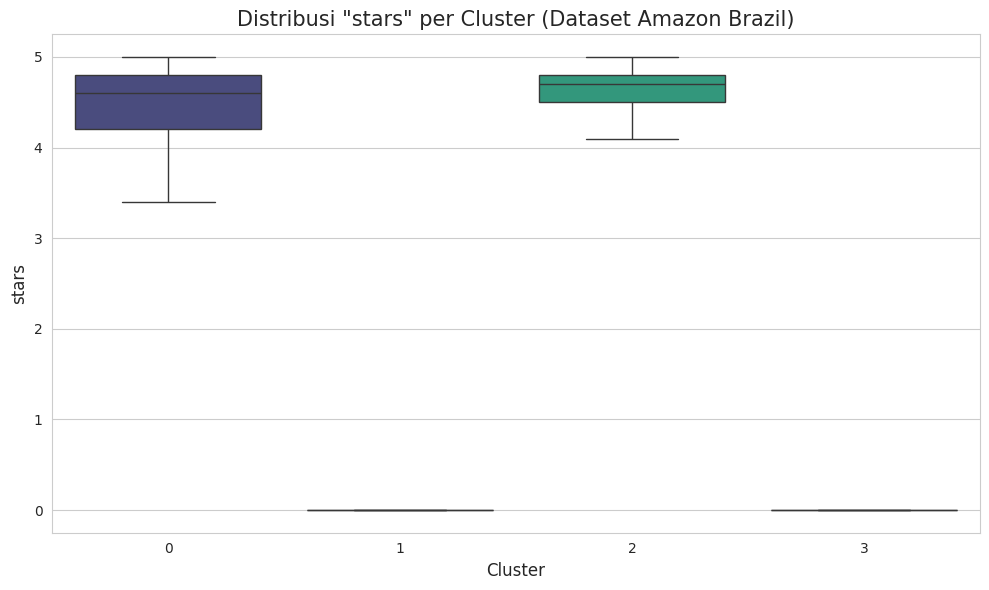

<ipython-input-17-de0f4172e5bc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_br_clustered, x='cluster', y=feature_num_br, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus


Fitur 'reviews' pada dataset Brazil memiliki nilai non-positif, tidak menggunakan skala log untuk boxplot ini.


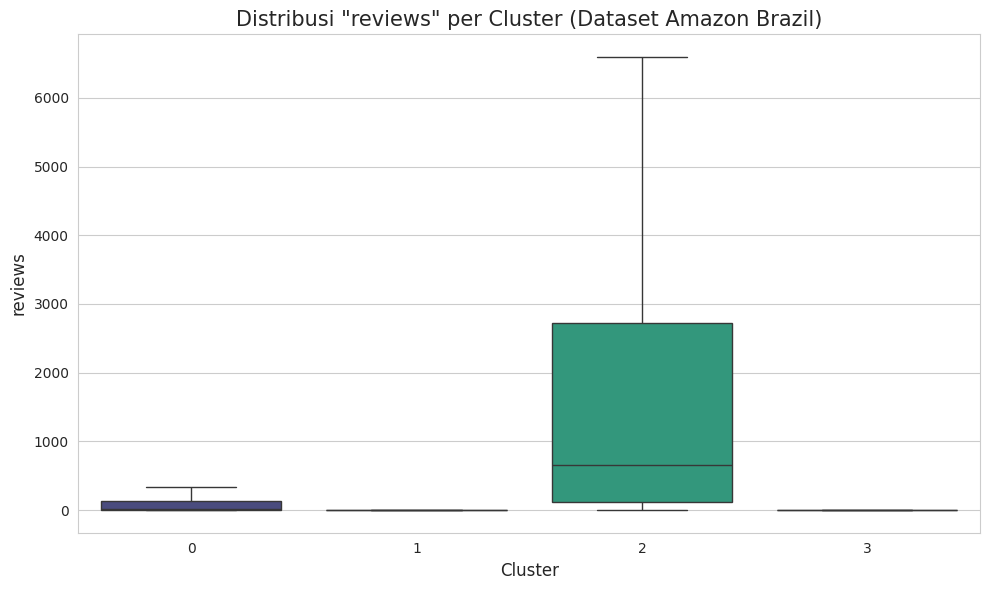

<ipython-input-17-de0f4172e5bc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_br_clustered, x='cluster', y=feature_num_br, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus


Fitur 'price' pada dataset Brazil memiliki nilai non-positif, tidak menggunakan skala log untuk boxplot ini.


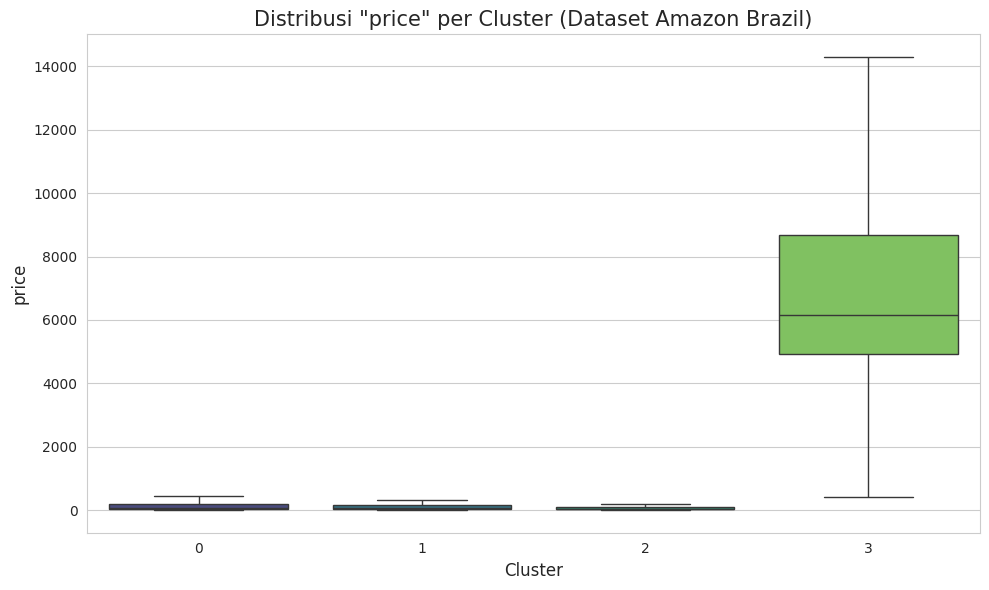

<ipython-input-17-de0f4172e5bc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_br_clustered, x='cluster', y=feature_num_br, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus


Fitur 'listPrice' pada dataset Brazil memiliki nilai non-positif, tidak menggunakan skala log untuk boxplot ini.


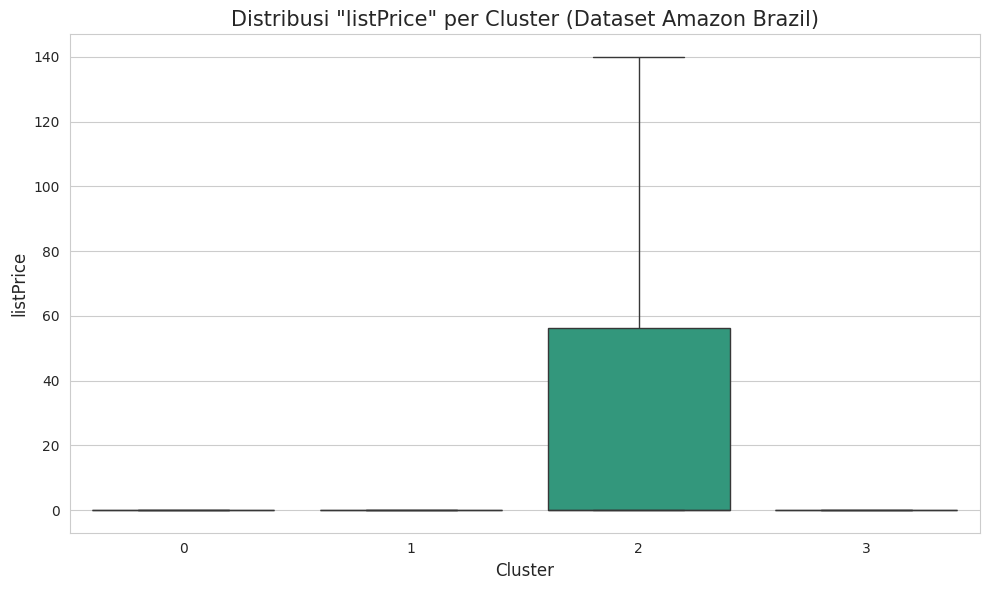

<ipython-input-17-de0f4172e5bc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_br_clustered, x='cluster', y=feature_num_br, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus


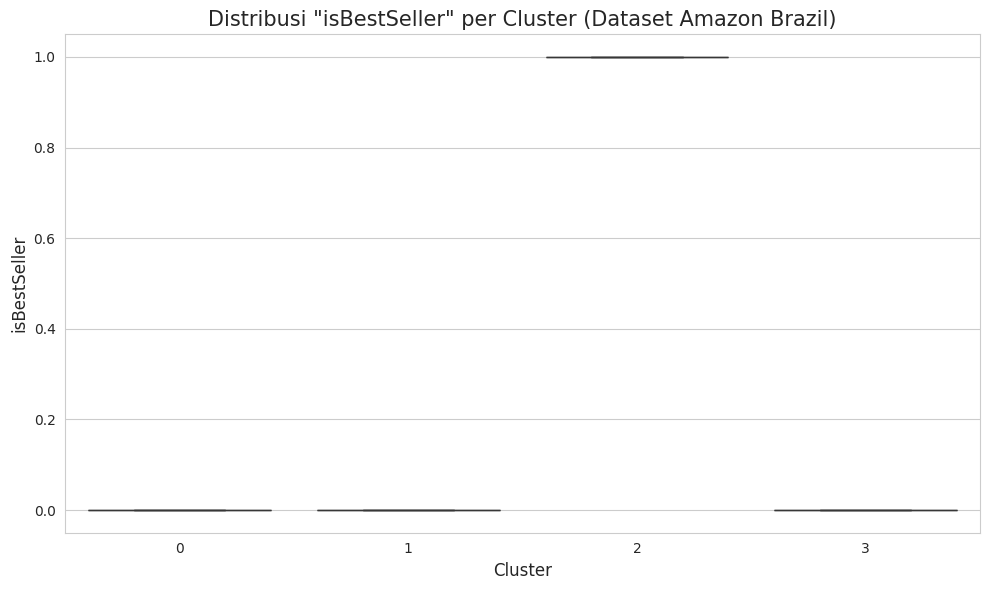

<ipython-input-17-de0f4172e5bc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_br_clustered, x='cluster', y=feature_num_br, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus


Fitur 'boughtInLastMonth' pada dataset Brazil memiliki nilai non-positif, tidak menggunakan skala log untuk boxplot ini.


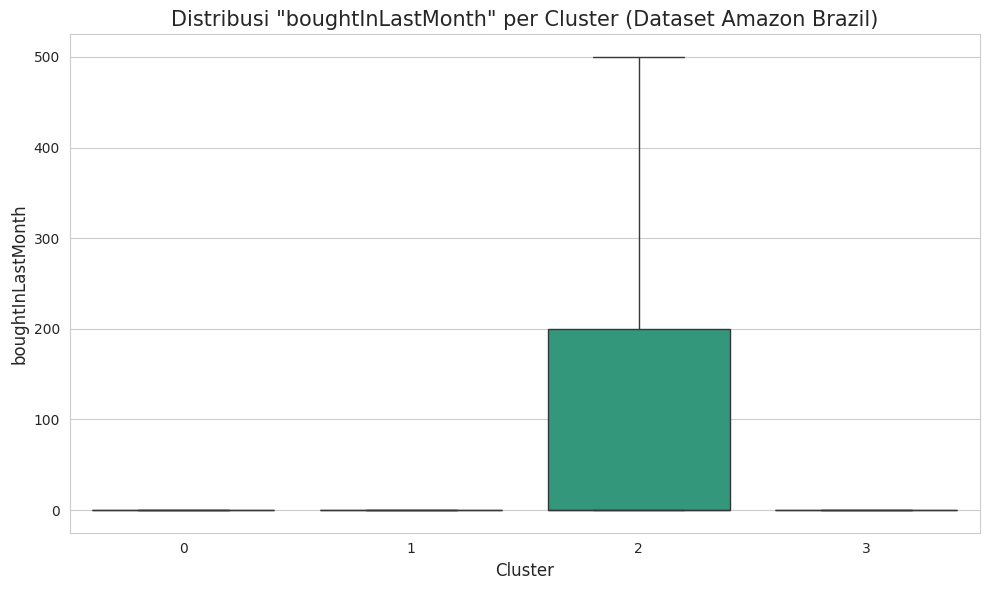

Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster dataset Amazon Brazil.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan df_br_clustered sudah ada dari langkah K-Means untuk dataset Amazon Brazil
# df_br_clustered berisi fitur-fitur dari df_subset (Brazil) dan kolom 'cluster'

# Set style untuk plot
sns.set_style("whitegrid")

# 1. Visualisasi Distribusi Fitur Kategorikal per Cluster (Dataset Amazon Brazil)
categorical_features_br_viz = ['categoryName']

print("Membuat visualisasi untuk fitur kategorikal (Dataset Amazon Brazil)...")
for feature_cat_br in categorical_features_br_viz:
    plt.figure(figsize=(15, 8)) # Perbesar ukuran untuk categoryName

    # Ambil top N kategori paling umum secara keseluruhan untuk menjaga plot tetap terbaca
    # karena ada sekitar 206 kategori unik. Anda bisa sesuaikan N.
    top_n_categories_br = df_br_clustered[feature_cat_br].value_counts().nlargest(20).index

    # Filter DataFrame untuk hanya menyertakan top N kategori
    df_filtered_cat_br = df_br_clustered[df_br_clustered[feature_cat_br].isin(top_n_categories_br)]

    sns.countplot(data=df_filtered_cat_br, y=feature_cat_br, hue='cluster', palette='viridis', order=top_n_categories_br)
    plt.title(f'Distribusi Top 20 "{feature_cat_br}" per Cluster (Dataset Amazon Brazil)', fontsize=15)
    plt.xlabel('Jumlah Item', fontsize=12)
    plt.ylabel(feature_cat_br, fontsize=12)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# 2. Visualisasi Distribusi Fitur Numerik per Cluster (Dataset Amazon Brazil)
numerical_features_br_viz = [
    'stars', 'reviews', 'price', 'listPrice',
    'isBestSeller', 'boughtInLastMonth'
]

print("\nMembuat visualisasi untuk fitur numerik (Dataset Amazon Brazil)...")
for feature_num_br in numerical_features_br_viz:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_br_clustered, x='cluster', y=feature_num_br, palette='viridis', showfliers=False) # showfliers=False agar lebih fokus

    title_str_br = f'Distribusi "{feature_num_br}" per Cluster (Dataset Amazon Brazil)'

    if feature_num_br in ['reviews', 'price', 'boughtInLastMonth', 'listPrice']:
        # Cek apakah ada nilai non-positif sebelum menerapkan skala log
        if (df_br_clustered[feature_num_br] > 0).all():
            plt.yscale('log')
            title_str_br += ' (Skala Log)'
        else:
            print(f"Fitur '{feature_num_br}' pada dataset Brazil memiliki nilai non-positif, tidak menggunakan skala log untuk boxplot ini.")

    plt.title(title_str_br, fontsize=15)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature_num_br, fontsize=12)
    plt.tight_layout()
    plt.show()

print("Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster dataset Amazon Brazil.")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import f_oneway, chi2_contingency
import pandas as pd
from sklearn.utils import shuffle # Untuk mengambil sampel acak
import numpy as np # Untuk np.arange dan sampling
import time

# Pastikan X_prepared (data yang sudah di-encode dan scale untuk dataset Amazon Brazil),
# cluster_labels_br (label cluster untuk dataset Amazon Brazil),
# df_br_clustered (data asli dengan kolom 'cluster' untuk dataset Amazon Brazil),
# dan N_CLUSTERS_BR (jumlah cluster yang dipilih, yaitu 4) sudah ada.

print("--- Metrik Validitas Internal Cluster (Dataset Amazon Brazil - Dihitung pada Sampel) ---")
if 'X_prepared' in locals() and 'cluster_labels_br' in locals() and 'N_CLUSTERS_BR' in locals():

    sample_size_metrics_br = 100000 # Ukuran sampel untuk perhitungan metrik
    if X_prepared.shape[0] > sample_size_metrics_br:
        print(f"Mengambil sampel acak sebanyak {sample_size_metrics_br} baris untuk metrik validitas (Dataset Brazil)...")

        indices_br_metrics = np.arange(X_prepared.shape[0])
        np.random.shuffle(indices_br_metrics)
        sample_indices_br_metrics = indices_br_metrics[:sample_size_metrics_br]

        X_prepared_sample_br_metrics = X_prepared[sample_indices_br_metrics]
        cluster_labels_sample_br_metrics = cluster_labels_br[sample_indices_br_metrics]

        print(f"Dimensi sampel X_prepared untuk metrik: {X_prepared_sample_br_metrics.shape}")
        print(f"Dimensi sampel label cluster untuk metrik: {cluster_labels_sample_br_metrics.shape}")

    else:
        print("Ukuran dataset lebih kecil dari atau sama dengan ukuran sampel, menggunakan keseluruhan data untuk metrik.")
        X_prepared_sample_br_metrics = X_prepared
        cluster_labels_sample_br_metrics = cluster_labels_br

    start_time_metrics_br = time.time()
    print("Menghitung metrik validitas pada sampel (Dataset Brazil)...")
    silhouette_avg_br = silhouette_score(X_prepared_sample_br_metrics, cluster_labels_sample_br_metrics)
    print(f"Rata-rata Silhouette Score untuk {N_CLUSTERS_BR} clusters (Sampel): {silhouette_avg_br:.4f}")

    db_score_br = davies_bouldin_score(X_prepared_sample_br_metrics, cluster_labels_sample_br_metrics)
    print(f"Davies-Bouldin Index (Sampel): {db_score_br:.4f}")

    ch_score_br = calinski_harabasz_score(X_prepared_sample_br_metrics, cluster_labels_sample_br_metrics)
    print(f"Calinski-Harabasz Index (Sampel): {ch_score_br:.4f}")
    end_time_metrics_br = time.time()
    print(f"Perhitungan metrik validitas pada sampel selesai dalam {((end_time_metrics_br - start_time_metrics_br) / 60):.2f} menit.")

else:
    print("Variabel X_prepared, cluster_labels_br, atau N_CLUSTERS_BR tidak ditemukan. Tidak dapat menghitung metrik validitas.")

# --- Bagian ANOVA dan Chi-square tetap sama, dijalankan pada data penuh df_br_clustered ---

print("\n--- Analisis Perbedaan Fitur Antar Cluster (Dataset Amazon Brazil - Data Penuh) ---")

# ANOVA untuk Fitur Numerik (Dataset Amazon Brazil)
numerical_features_br_analysis = ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']
print("\n Hasil ANOVA untuk Fitur Numerik (Dataset Amazon Brazil):")
if 'df_br_clustered' in locals() and 'N_CLUSTERS_BR' in locals():
    for feature_num_br in numerical_features_br_analysis:
        if feature_num_br in df_br_clustered.columns:
            grouped_data_br = [df_br_clustered[feature_num_br][df_br_clustered['cluster'] == i] for i in range(N_CLUSTERS_BR)]
            grouped_data_cleaned_br = [group for group in grouped_data_br if not group.empty]

            if len(grouped_data_cleaned_br) > 1:
                f_statistic_br, p_value_br = f_oneway(*grouped_data_cleaned_br)
                print(f"  Fitur: {feature_num_br}")
                print(f"    F-statistic: {f_statistic_br:.4f}")
                print(f"    P-value: {p_value_br:.4g}")
                if p_value_br < 0.05:
                    print("    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).")
                else:
                    print("    Kesimpulan: Tidak ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p >= 0.05).")
            else:
                print(f"  Fitur: {feature_num_br} - Tidak cukup grup data untuk ANOVA.")
        else:
            print(f"  Fitur: {feature_num_br} tidak ditemukan di df_br_clustered.")
else:
    print("Variabel df_br_clustered atau N_CLUSTERS_BR tidak ditemukan. Tidak dapat melakukan ANOVA.")

# Chi-square Test untuk Fitur Kategorikal (Dataset Amazon Brazil)
categorical_features_br_analysis = ['categoryName']
print("\n Hasil Chi-square Test untuk Fitur Kategorikal (Dataset Amazon Brazil):")
if 'df_br_clustered' in locals():
    for feature_cat_br in categorical_features_br_analysis:
        if feature_cat_br in df_br_clustered.columns:
            contingency_table_br = pd.crosstab(df_br_clustered[feature_cat_br], df_br_clustered['cluster'])
            chi2_br, p_value_br, dof_br, expected_br = chi2_contingency(contingency_table_br)
            print(f"  Fitur: {feature_cat_br}")
            print(f"    Chi-square statistic: {chi2_br:.4f}")
            print(f"    P-value: {p_value_br:.4g}")
            print(f"    Degrees of Freedom: {dof_br}")
            if p_value_br < 0.05:
                print("    Kesimpulan: Ada hubungan yang signifikan secara statistik antara fitur dan cluster (p < 0.05).")
            else:
                print("    Kesimpulan: Tidak ada hubungan yang signifikan secara statistik antara fitur dan cluster (p >= 0.05).")
        else:
            print(f"  Fitur: {feature_cat_br} tidak ditemukan di df_br_clustered.")
else:
    print("Variabel df_br_clustered tidak ditemukan. Tidak dapat melakukan Chi-square test.")

--- Metrik Validitas Internal Cluster (Dataset Amazon Brazil - Dihitung pada Sampel) ---
Mengambil sampel acak sebanyak 100000 baris untuk metrik validitas (Dataset Brazil)...
Dimensi sampel X_prepared untuk metrik: (100000, 212)
Dimensi sampel label cluster untuk metrik: (100000,)
Menghitung metrik validitas pada sampel (Dataset Brazil)...
Rata-rata Silhouette Score untuk 4 clusters (Sampel): 0.4122
Davies-Bouldin Index (Sampel): 0.8849
Calinski-Harabasz Index (Sampel): 19481.1572
Perhitungan metrik validitas pada sampel selesai dalam 5.06 menit.

--- Analisis Perbedaan Fitur Antar Cluster (Dataset Amazon Brazil - Data Penuh) ---

 Hasil ANOVA untuk Fitur Numerik (Dataset Amazon Brazil):
  Fitur: stars
    F-statistic: 14756470.4879
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: reviews
    F-statistic: 10387.7999
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar clu

Analisis Hasil Tes Signifikansi (Dataset Amazon Brazil)
Metrik Validitas Internal Cluster (Dihitung pada Sampel 100.000 data)
Rata-rata Silhouette Score (Sampel): 0.4122
Ini adalah skor Silhouette tertinggi yang kita peroleh di antara semua dataset. Nilai ini, yang lebih mendekati 1, menunjukkan bahwa secara rata-rata, objek dalam cluster sangat mirip satu sama lain dan sangat berbeda dengan objek di cluster lain. Ini mengindikasikan struktur cluster yang baik dan terdefinisi dengan jelas pada sampel.
Davies-Bouldin Index (Sampel): 0.8849
Ini adalah nilai Davies-Bouldin terendah yang kita lihat, yang sangat baik karena nilai yang lebih rendah menunjukkan cluster yang lebih terpisah dan lebih padat.
Calinski-Harabasz Index (Sampel): 19481.1572
Skor ini juga sangat tinggi, jauh lebih tinggi dari dataset Amazon India dan dataset Netflix/TV Show sebelumnya. Ini menunjukkan rasio yang sangat baik antara dispersi antar-cluster dan dispersi intra-cluster, yang berarti cluster cenderung padat dan terpisah dengan sangat baik pada sampel ini.
Secara keseluruhan, metrik validitas internal yang dihitung pada sampel besar ini menunjukkan bahwa pembentukan 4 cluster pada dataset Amazon Brazil menghasilkan struktur cluster yang sangat baik, jelas, dan mungkin yang paling kuat di antara semua dataset yang telah dianalisis.

Analisis Perbedaan Fitur Antar Cluster (Dihitung pada Data Penuh)
Hasil ANOVA untuk Fitur Numerik:

Untuk SEMUA fitur numerik yang diuji (stars, reviews, price, listPrice, isBestSeller, boughtInLastMonth), P-value adalah 0 (atau sangat kecil) dengan F-statistic yang sangat tinggi.
Kesimpulan: Ini menunjukkan adanya perbedaan rata-rata yang sangat signifikan secara statistik untuk semua fitur numerik ini di antara keempat cluster pada keseluruhan dataset Amazon Brazil. Ini sangat mendukung interpretasi kita sebelumnya bahwa cluster-cluster tersebut memang berbeda berdasarkan karakteristik numerik produk.
Hasil Chi-square Test untuk Fitur Kategorikal:

Untuk fitur categoryName, P-value adalah 0 dengan Chi-square statistic yang sangat besar.
Kesimpulan: Ada hubungan yang sangat signifikan secara statistik antara fitur categoryName dan keanggotaan cluster. Distribusi kategori produk berbeda secara signifikan antar cluster.
Kesimpulan dari Tes Signifikansi (Dataset Amazon Brazil)
Tes signifikansi untuk dataset Amazon Brazil ini memberikan bukti statistik yang sangat kuat dan paling meyakinkan sejauh ini:

Cluster yang terbentuk memiliki struktur yang sangat baik, jelas, dan terpisah dengan sangat baik, didukung oleh semua metrik validitas internal yang menunjukkan hasil terbaik.
Cluster-cluster tersebut secara signifikan berbeda satu sama lain berdasarkan semua fitur numerik dan fitur kategorikal categoryName.

In [ ]:
import pandas as pd
import numpy as np

file_path = '/kaggle/input/amazon-product-reviews/Reviews.csv'
print(f"Memuat dataset dari: {file_path}")

df = None # Initialize DataFrame to None

try:
    # Mencoba dengan encoding utf-8 terlebih dahulu
    df = pd.read_csv(file_path, low_memory=False)
    print("Dataset berhasil dimuat dengan encoding 'utf-8'! ✅")
except UnicodeDecodeError:
    print("Gagal memuat dengan 'utf-8', mencoba 'latin1'...")
    try:
        df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
        print("Dataset berhasil dimuat dengan encoding 'latin1'! ✅")
    except UnicodeDecodeError:
        print("Gagal memuat dengan 'latin1', mencoba 'iso-8859-1'...")
        try:
            df = pd.read_csv(file_path, encoding='iso-8859-1', low_memory=False)
            print("Dataset berhasil dimuat dengan encoding 'iso-8859-1'! ✅")
        except UnicodeDecodeError:
            print("Gagal memuat dengan 'iso-8859-1', mencoba 'cp1252'...")
            try:
                df = pd.read_csv(file_path, encoding='cp1252', low_memory=False)
                print("Dataset berhasil dimuat dengan encoding 'cp1252'! ✅")
            except Exception as e:
                print(f"❌ Gagal memuat dataset dengan semua encoding yang dicoba. Error: {e} 💥")
except FileNotFoundError:
    print(f"❌ File tidak ditemukan di path: {file_path}")
    print("Pastikan path file sudah benar.")
except Exception as e:
    print(f"Terjadi error lain saat memuat dataset: {e} 💥")

# Jika dataset berhasil dimuat, tampilkan informasinya
if df is not None:
    print("\nLima baris pertama dataset:")
    print(df.head())

    print("\nInformasi dataset (lebih detail):")
    df.info(verbose=True, show_counts=True)

    print("\nStatistik deskriptif dataset (untuk semua tipe kolom):")
    print(df.describe(include='all'))

    print("\nJumlah missing values per kolom:")
    print(df.isnull().sum())

    print("\nJumlah nilai unik di setiap kolom dataset:")
    for col in df.columns:
        if col in df.columns:
            print(f"- {col}: {df[col].nunique()} nilai unik")
        else:
            print(f"- {col}: (Kolom tidak ditemukan)")

    print("\nContoh beberapa nilai unik untuk setiap kolom dataset (maks 3 per kolom untuk brevity, hati-hati dengan teks panjang):")
    for col in df.columns:
        if col not in df.columns:
            print(f"- {col}: (Kolom tidak ditemukan)")
            continue
        if df[col].nunique() == 0:
            print(f"- {col}: (Kolom kosong)")
            continue

        unique_values = df[col].unique()
        display_limit = 3 # Batasi contoh unik yang ditampilkan menjadi 3

        is_long_text = False
        try:
            # Perkirakan apakah ini kolom teks yang panjang
            if isinstance(unique_values[0], str) and len(unique_values[0]) > 100: # Contoh heuristik
                is_long_text = True
        except IndexError:
             pass # Kolom mungkin kosong setelah unique()

        if pd.api.types.is_numeric_dtype(df[col].dtype) and df[col].nunique() > 20:
             print(f"- {col} (numerik dengan >20 nilai unik): Min={df[col].min()}, Max={df[col].max()}, {df[col].nunique()} nilai unik")
        elif is_long_text and df[col].nunique() > display_limit:
            print(f"- {col} (contoh teks panjang, hanya tampilkan beberapa karakter awal dari sampel pertama):")
            for i in range(min(display_limit, len(unique_values))):
                 print(f"    Sampel {i+1}: {str(unique_values[i])[:70]}...") # Tampilkan 70 karakter pertama
            if len(unique_values) > display_limit:
                print(f"    ... (total {len(unique_values)} unik)")
        elif len(unique_values) > display_limit:
            print(f"- {col} (contoh): {unique_values[:display_limit]} ... (total {len(unique_values)} unik)")
        else:
            print(f"- {col}: {unique_values}")
else:
    print("Dataset tidak berhasil dimuat, tidak ada informasi untuk ditampilkan.")

Memuat dataset dari: /kaggle/input/amazon-product-reviews/Reviews.csv
Dataset berhasil dimuat dengan encoding 'utf-8'! ✅

Lima baris pertama dataset:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

        

In [ ]:
import pandas as pd
import numpy as np
import re # Untuk regular expressions (membersihkan teks)
from bs4 import BeautifulSoup # Untuk menghilangkan HTML jika ada
import nltk
from nltk.corpus import stopwords
# Pastikan stopwords sudah diunduh:
# nltk.download('stopwords') # Jalankan sekali jika belum
# Untuk menjalankan di Kaggle/Colab, kadang perlu memastikan direktori NLTK data dikenali
# try:
#     stopwords.words('english')
# except LookupError:
#     nltk.download('stopwords', quiet=True)

# df adalah DataFrame yang sudah dimuat dari Reviews.csv
# Pastikan df sudah ada.

print("Memulai pra-pemrosesan untuk dataset Review Amazon...")

# Salin dataframe
df_reviews_processed = df.copy()

# Menangani missing values minor
df_reviews_processed['ProfileName'] = df_reviews_processed['ProfileName'].fillna('Unknown')
df_reviews_processed['Summary'] = df_reviews_processed['Summary'].fillna('') # Isi summary NaN dengan string kosong

# Drop kolom yang tidak akan kita gunakan untuk clustering konten teks di iterasi pertama
# Kita simpan 'Score' karena bisa jadi fitur pendamping yang berguna.
# 'Text' adalah fokus utama kita.
cols_to_drop_reviews = ['Id', 'ProductId', 'UserId', 'ProfileName', 'Time',
                        'HelpfulnessNumerator', 'HelpfulnessDenominator']
df_reviews_processed = df_reviews_processed.drop(columns=cols_to_drop_reviews)

print(f"Kolom berikut telah dihapus: {cols_to_drop_reviews}")
print("Missing values pada 'Summary' telah diisi dengan string kosong.")

# Tampilkan info dan head setelah drop dan fillna awal
df_reviews_processed.info()
print(df_reviews_processed.head())

Memulai pra-pemrosesan untuk dataset Review Amazon...
Kolom berikut telah dihapus: ['Id', 'ProductId', 'UserId', 'ProfileName', 'Time', 'HelpfulnessNumerator', 'HelpfulnessDenominator']
Missing values pada 'Summary' telah diisi dengan string kosong.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Score    568454 non-null  int64 
 1   Summary  568454 non-null  object
 2   Text     568454 non-null  object
dtypes: int64(1), object(2)
memory usage: 13.0+ MB
   Score                Summary  \
0      5  Good Quality Dog Food   
1      1      Not as Advertised   
2      4  "Delight" says it all   
3      2         Cough Medicine   
4      5            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Pastikan stopwords sudah siap
# Jika Anda belum menjalankan nltk.download('stopwords') di sesi ini atau sebelumnya,
# Anda mungkin perlu menjalankannya sekali di sel terpisah atau memastikan NLTK bisa menemukannya.
# import nltk
# try:
#     stopwords.words('english')
# except LookupError:
#     nltk.download('stopwords', quiet=True)

from bs4 import BeautifulSoup # Untuk menghilangkan HTML jika ada
import re # Untuk regular expressions (membersihkan teks)
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # 1. Menghilangkan HTML (jika ada)
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Menghilangkan karakter non-alfabet dan ubah ke lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())

    # 3. Tokenisasi sederhana (split berdasarkan spasi) dan hilangkan stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return " ".join(words)

print("\nFungsi preprocess_text telah didefinisikan.")


Fungsi preprocess_text telah didefinisikan.


In [ ]:
# Tentukan ukuran sampel
sample_size_reviews = 50000 # Misalnya 50.000 review, bisa disesuaikan
# sample_size_reviews = 10000 # Atau lebih kecil untuk tes cepat

# Pastikan df_reviews_processed ada dari langkah sebelumnya
if 'df_reviews_processed' not in locals():
    print("Variabel df_reviews_processed tidak ditemukan. Harap jalankan langkah pertama pra-pemrosesan.")
else:
    if df_reviews_processed.shape[0] > sample_size_reviews:
        print(f"\nMengambil sampel sebanyak {sample_size_reviews} baris untuk diproses lebih lanjut...")
        df_sample = df_reviews_processed.sample(n=sample_size_reviews, random_state=42)
    else:
        df_sample = df_reviews_processed.copy()

    print(f"Ukuran sampel: {df_sample.shape}")

    # Terapkan pra-pemrosesan pada kolom 'Text' di sampel
    print("\nMenerapkan pra-pemrosesan teks pada kolom 'Text' di data sampel...")
    df_sample['processed_text'] = df_sample['Text'].apply(preprocess_text)
    print("Pra-pemrosesan teks pada sampel selesai.")

    print("\nLima baris pertama sampel setelah pra-pemrosesan teks:")
    print(df_sample[['Text', 'processed_text', 'Score']].head())


Mengambil sampel sebanyak 50000 baris untuk diproses lebih lanjut...
Ukuran sampel: (50000, 3)

Menerapkan pra-pemrosesan teks pada kolom 'Text' di data sampel...
Pra-pemrosesan teks pada sampel selesai.

Lima baris pertama sampel setelah pra-pemrosesan teks:
                                                     Text  \
165256  Having tried a couple of other brands of glute...   
231465  My cat loves these treats. If ever I can't fin...   
427827  A little less than I expected.  It tends to ha...   
433954  First there was Frosted Mini-Wheats, in origin...   
70260   and I want to congratulate the graphic artist ...   

                                           processed_text  Score  
165256  tried couple brands glutenfree sandwich cookie...      5  
231465  cat loves treats ever cant find house pop top ...      5  
427827  little less expected tends muddy taste expecte...      3  
433954  first frosted miniwheats original size frosted...      2  
70260   want congratulate graphic art

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack # Untuk menggabungkan matriks sparse (TF-IDF) dengan dense (Score)
import pandas as pd
import numpy as np

# df_sample adalah DataFrame sampel yang sudah memiliki kolom 'processed_text' dan 'Score'
# Pastikan df_sample sudah ada dari langkah sebelumnya.

if 'df_sample' not in locals():
    print("Variabel df_sample tidak ditemukan. Harap jalankan langkah sampling dan pra-pemrosesan teks sebelumnya.")
else:
    print("Memulai TF-IDF Vectorization pada 'processed_text' dan persiapan akhir data sampel...")

    # 1. TF-IDF Vectorization
    # Kita batasi jumlah fitur maksimum untuk mengontrol dimensi dan waktu komputasi
    # Anda bisa sesuaikan max_features ini.
    # Stopwords sudah dihilangkan di fungsi preprocess_text, tapi bisa juga disertakan di TfidfVectorizer.
    # Untuk konsistensi, kita biarkan TfidfVectorizer bekerja dengan teks yang sudah bersih.
    tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words=None)

    print("  Menerapkan TfidfVectorizer pada 'processed_text'...")
    X_tfidf_sample = tfidf_vectorizer.fit_transform(df_sample['processed_text'])
    print(f"  Dimensi matriks TF-IDF (sampel): {X_tfidf_sample.shape}")

    # 2. Menyiapkan dan Scaling Fitur 'Score'
    # 'Score' adalah int64, kita reshape agar bisa di-scale dan digabung
    scores_sample = df_sample['Score'].values.reshape(-1, 1)

    scaler_score = StandardScaler()
    print("  Melakukan scaling pada fitur 'Score'...")
    scaled_scores_sample = scaler_score.fit_transform(scores_sample)
    print(f"  Dimensi fitur 'Score' setelah scaling (sampel): {scaled_scores_sample.shape}")

    # 3. Menggabungkan Fitur TF-IDF dengan Fitur 'Score' yang Sudah Di-scale
    # X_tfidf_sample adalah matriks sparse, scaled_scores_sample adalah dense
    # hstack dari scipy.sparse bisa menggabungkannya. Hasilnya akan sparse.
    # K-Means scikit-learn bisa menangani input sparse.
    print("  Menggabungkan fitur TF-IDF dengan fitur 'Score'...")
    X_reviews_prepared_sample = hstack([X_tfidf_sample, scaled_scores_sample])

    # Jika Anda ingin K-Means menerima dense array (kadang lebih stabil atau cepat untuk algoritma tertentu,
    # tapi akan memakan lebih banyak memori):
    # X_reviews_prepared_sample = X_reviews_prepared_sample.toarray()
    # Untuk dataset sampel 50k x 3001, ini mungkin masih manageable. Jika tidak, biarkan sparse.
    # Kita akan coba biarkan sparse dulu.

    print(f"  Dimensi akhir data sampel yang siap untuk clustering (X_reviews_prepared_sample): {X_reviews_prepared_sample.shape}")
    print("\nData sampel (review teks dan skor) siap untuk tahap clustering! ✅")

    # Variabel X_reviews_prepared_sample akan digunakan untuk Elbow Method.
    # Kita juga simpan df_sample untuk menambahkan label cluster nanti.
    df_reviews_clustered_sample = df_sample.copy() # Akan digunakan untuk menampung label cluster

Memulai TF-IDF Vectorization pada 'processed_text' dan persiapan akhir data sampel...
  Menerapkan TfidfVectorizer pada 'processed_text'...
  Dimensi matriks TF-IDF (sampel): (50000, 3000)
  Melakukan scaling pada fitur 'Score'...
  Dimensi fitur 'Score' setelah scaling (sampel): (50000, 1)
  Menggabungkan fitur TF-IDF dengan fitur 'Score'...
  Dimensi akhir data sampel yang siap untuk clustering (X_reviews_prepared_sample): (50000, 3001)

Data sampel (review teks dan skor) siap untuk tahap clustering! ✅


Memulai Elbow Method pada sampel data review (X_reviews_prepared_sample)...
Dimensi data yang digunakan untuk Elbow Method: (50000, 3001)
  Menjalankan K-Means untuk K=1...
    Inertia untuk K=1: 98765.26 (selesai dalam 0.26 detik)
  Menjalankan K-Means untuk K=2...
    Inertia untuk K=2: 56958.38 (selesai dalam 0.35 detik)
  Menjalankan K-Means untuk K=3...
    Inertia untuk K=3: 51110.75 (selesai dalam 0.34 detik)
  Menjalankan K-Means untuk K=4...
    Inertia untuk K=4: 50860.34 (selesai dalam 0.97 detik)
  Menjalankan K-Means untuk K=5...
    Inertia untuk K=5: 49344.34 (selesai dalam 0.89 detik)
  Menjalankan K-Means untuk K=6...
    Inertia untuk K=6: 48440.65 (selesai dalam 1.87 detik)
  Menjalankan K-Means untuk K=7...
    Inertia untuk K=7: 48406.48 (selesai dalam 1.81 detik)
  Menjalankan K-Means untuk K=8...
    Inertia untuk K=8: 48853.37 (selesai dalam 3.71 detik)
  Menjalankan K-Means untuk K=9...
    Inertia untuk K=9: 48769.92 (selesai dalam 1.99 detik)
  Menjalankan K-

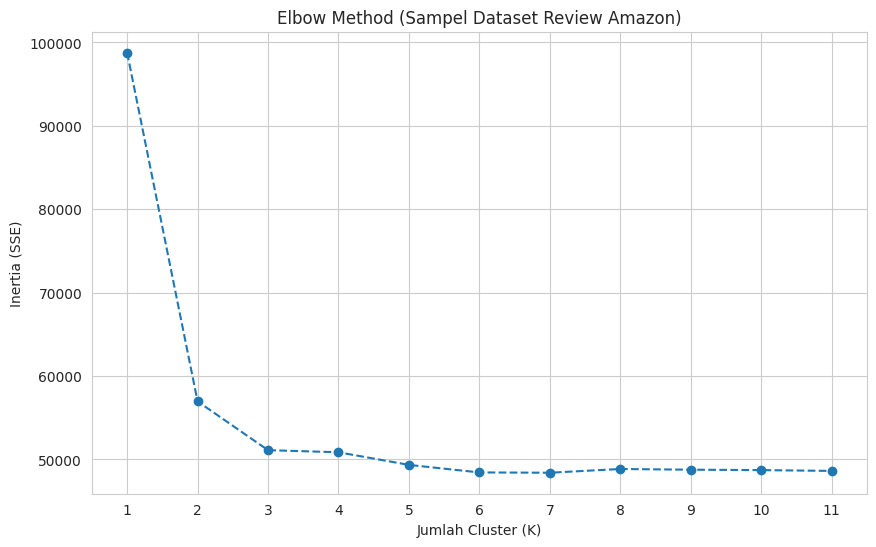


Analisis Elbow Method selesai.
Silakan amati plot di atas untuk menentukan jumlah K yang optimal.
Setelah itu, beritahukan nilai K yang Anda pilih.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np # Pastikan numpy diimpor
import time

# Pastikan X_reviews_prepared_sample sudah ada dari langkah TF-IDF dan persiapan data sebelumnya
# X_reviews_prepared_sample memiliki dimensi (50000, 3001)

if 'X_reviews_prepared_sample' not in locals():
    print("Variabel X_reviews_prepared_sample tidak ditemukan. Harap jalankan langkah TF-IDF sebelumnya.")
else:
    # 1. Menentukan K optimal menggunakan Elbow Method
    inertia_reviews = []
    # Rentang K yang akan dicoba
    k_range_reviews = range(1, 12) # Kita coba 1-11, bisa disesuaikan

    print("Memulai Elbow Method pada sampel data review (X_reviews_prepared_sample)...")
    print(f"Dimensi data yang digunakan untuk Elbow Method: {X_reviews_prepared_sample.shape}")

    for k_val_reviews in k_range_reviews:
        start_time_k = time.time()
        print(f"  Menjalankan K-Means untuk K={k_val_reviews}...")
        kmeans_elbow_reviews = KMeans(n_clusters=k_val_reviews, init='k-means++', random_state=42, n_init='auto')
        kmeans_elbow_reviews.fit(X_reviews_prepared_sample) # Menggunakan data sampel
        inertia_reviews.append(kmeans_elbow_reviews.inertia_)
        end_time_k = time.time()
        print(f"    Inertia untuk K={k_val_reviews}: {kmeans_elbow_reviews.inertia_:.2f} (selesai dalam {end_time_k - start_time_k:.2f} detik)")

    # Plot Elbow Method
    print("\nMembuat plot Elbow Method...")
    plt.figure(figsize=(10, 6))
    plt.plot(k_range_reviews, inertia_reviews, marker='o', linestyle='--')
    plt.title('Elbow Method (Sampel Dataset Review Amazon)')
    plt.xlabel('Jumlah Cluster (K)')
    plt.ylabel('Inertia (SSE)')
    plt.xticks(k_range_reviews)
    plt.grid(True)
    plt.show()

    print("\nAnalisis Elbow Method selesai.")
    print("Silakan amati plot di atas untuk menentukan jumlah K yang optimal.")
    print("Setelah itu, beritahukan nilai K yang Anda pilih.")

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np # Pastikan numpy diimpor
import time

# Pastikan X_reviews_prepared_sample (data sampel yang siap untuk clustering)
# dan df_reviews_clustered_sample (DataFrame sampel untuk menampung label cluster)
# sudah ada dari langkah sebelumnya.

N_CLUSTERS_REVIEWS = 3
print(f"\nMenjalankan K-Means dengan K = {N_CLUSTERS_REVIEWS} pada sampel data review ({X_reviews_prepared_sample.shape[0]} baris)...")

start_time_kmeans_reviews = time.time()
kmeans_reviews = KMeans(n_clusters=N_CLUSTERS_REVIEWS, init='k-means++', random_state=42, n_init='auto')
# fit_predict pada data sampel
cluster_labels_reviews_sample = kmeans_reviews.fit_predict(X_reviews_prepared_sample)
end_time_kmeans_reviews = time.time()

print(f"Proses K-Means pada sampel selesai dalam {((end_time_kmeans_reviews - start_time_kmeans_reviews) / 60):.2f} menit.")

# Menambahkan label cluster kembali ke DataFrame sampel (df_reviews_clustered_sample)
if 'df_reviews_clustered_sample' in locals() and df_reviews_clustered_sample.shape[0] == X_reviews_prepared_sample.shape[0]:
    df_reviews_clustered_sample['cluster'] = cluster_labels_reviews_sample

    print(f"\nLima baris pertama sampel data review dengan label cluster:")
    # Tampilkan juga 'processed_text' dan 'Score' untuk membantu interpretasi awal
    print(df_reviews_clustered_sample[['processed_text', 'Score', 'cluster']].head())

    print(f"\nDistribusi item per cluster (Sampel Dataset Review):")
    print(df_reviews_clustered_sample['cluster'].value_counts().sort_index())

    # Karakteristik tiap cluster (Sampel Dataset Review)
    print("\nKarakteristik Rata-Rata Fitur 'Score' per Cluster (Sampel Dataset Review):")
    # Tampilkan rata-rata 'Score' dan jumlah anggota per cluster
    print(df_reviews_clustered_sample.groupby('cluster')['Score'].agg(['mean', 'count', 'std']))

    # Langkah selanjutnya: Mendapatkan term/kata kunci paling penting per cluster
    # Ini membutuhkan akses ke tfidf_vectorizer yang sudah di-fit sebelumnya
    if 'tfidf_vectorizer' in locals() and 'kmeans_reviews' in locals():
        print("\nTop terms per cluster (dari centroid TF-IDF):")
        # Dapatkan urutan term dari vectorizer
        terms = tfidf_vectorizer.get_feature_names_out()

        # Centroid K-Means akan memiliki bobot untuk setiap term TF-IDF dan juga untuk fitur 'Score' yang sudah di-scale.
        # Kita hanya tertarik pada bagian TF-IDF dari centroid.
        # Jumlah fitur TF-IDF adalah X_reviews_prepared_sample.shape[1] - 1 (karena 1 kolom adalah 'Score')
        # atau kita bisa gunakan X_tfidf_sample.shape[1]

        num_tfidf_features = X_reviews_prepared_sample.shape[1] - 1
        if 'X_tfidf_sample' in locals(): # Lebih aman pakai ini jika ada
             num_tfidf_features = X_tfidf_sample.shape[1]

        # Ambil bagian TF-IDF dari centroid
        # kmeans_reviews.cluster_centers_ adalah dense array
        tfidf_centroids = kmeans_reviews.cluster_centers_[:, :num_tfidf_features]

        # Tampilkan top N terms untuk setiap cluster
        n_top_terms = 10
        for i in range(N_CLUSTERS_REVIEWS):
            print(f"  Cluster {i}: ", end="")
            # Dapatkan indeks dari N terms teratas untuk centroid cluster i
            top_terms_indices = tfidf_centroids[i].argsort()[-n_top_terms:][::-1]
            cluster_terms = [terms[idx] for idx in top_terms_indices]
            print(", ".join(cluster_terms))
    else:
        print("\nTidak dapat menampilkan top terms karena tfidf_vectorizer atau kmeans_reviews tidak ditemukan.")
        print("Pastikan tfidf_vectorizer dari langkah TF-IDF sebelumnya masih tersedia.")

else:
    print("Variabel df_reviews_clustered_sample tidak ditemukan atau jumlah barisnya tidak sesuai.")
    print("Tidak dapat menambahkan label cluster atau menampilkan karakteristik.")


Menjalankan K-Means dengan K = 3 pada sampel data review (50000 baris)...
Proses K-Means pada sampel selesai dalam 0.01 menit.

Lima baris pertama sampel data review dengan label cluster:
                                           processed_text  Score  cluster
165256  tried couple brands glutenfree sandwich cookie...      5        0
231465  cat loves treats ever cant find house pop top ...      5        0
427827  little less expected tends muddy taste expecte...      3        2
433954  first frosted miniwheats original size frosted...      2        1
70260   want congratulate graphic artist putting entir...      5        0

Distribusi item per cluster (Sampel Dataset Review):
cluster
0    32097
1     7104
2    10799
Name: count, dtype: int64

Karakteristik Rata-Rata Fitur 'Score' per Cluster (Sampel Dataset Review):
             mean  count       std
cluster                           
0        5.000000  32097  0.000000
1        1.362613   7104  0.480788
2        3.648949  10799  0.47

Hasil clustering pada sampel data review Amazon dengan K=3 sudah keluar dan menunjukkan pola yang menarik, terutama jika kita kaitkan rata-rata Score dengan top terms per cluster.

Interpretasi Hasil Cluster (Sampel Dataset Review Amazon, K=3)
Berikut adalah analisis untuk setiap cluster:

Cluster 0: "Review Sangat Positif (Skor 5)"

Jumlah Anggota: 32.097 (Cluster terbesar)
Rata-rata Score: 5.00 (standar deviasi 0, artinya semua review di cluster ini memiliki skor 5)
Top Terms: great, love, coffee, good, tea, like, one, product, taste, flavor
Interpretasi: Cluster ini dengan sangat jelas mengelompokkan review yang memberikan skor sempurna (5 bintang). Kata-kata kunci yang muncul (great, love, good) sangat positif dan sering dikaitkan dengan produk makanan/minuman (coffee, tea, taste, flavor). Ini adalah cluster "penggemar berat" atau produk yang sangat memuaskan.
Cluster 1: "Review Sangat Negatif (Skor 1-2)"

Jumlah Anggota: 7.104
Rata-rata Score: ~1.36 (sangat rendah, mendekati skor 1)
Top Terms: like, product, taste, coffee, would, one, flavor, buy, good, tea
Interpretasi: Cluster ini mengidentifikasi review yang sangat negatif, dengan rata-rata skor di sekitar 1 hingga 2. Meskipun beberapa kata kunci (like, good, taste, flavor) tampak positif jika dilihat sendiri, dalam konteks skor yang sangat rendah, kata-kata ini kemungkinan besar digunakan dalam kalimat negatif (misalnya, "did not like the taste", "would not buy again", "not good"). Ini adalah cluster "kritik tajam" atau produk yang sangat mengecewakan.
Cluster 2: "Review Cukup Positif/Netral (Skor 3-4)"

Jumlah Anggota: 10.799
Rata-rata Score: ~3.65 (cukup baik, mendekati skor 4)
Top Terms: good, like, coffee, taste, flavor, would, product, tea, one, great
Interpretasi: Cluster ini mewakili review yang cenderung positif atau netral hingga sedikit positif, dengan rata-rata skor di antara 3 dan 4. Kata kunci yang muncul mirip dengan cluster lain, yang menunjukkan bahwa topik produknya mungkin tumpang tindih (makanan/minuman), tetapi sentimen atau tingkat kepuasannya berada di tengah-tengah. Kata would di sini bisa jadi lebih netral atau menunjukkan saran.
Observasi Penting dari Clustering Review:

Pemisahan Berdasarkan Skor Sangat Kuat: Tampaknya fitur Score yang kita sertakan memiliki pengaruh yang sangat besar dalam pembentukan cluster, yang mana ini logis. K-Means berhasil memisahkan review ke dalam kelompok-kelompok dengan sentimen kepuasan yang jelas berbeda (sangat puas, sangat tidak puas, dan di antaranya).
Topik Umum Produk: Kata kunci yang sering muncul seperti coffee, tea, taste, flavor, product di semua cluster mengindikasikan bahwa sampel review yang kita ambil mungkin banyak didominasi oleh produk makanan dan minuman.
Interpretasi Top Terms Perlu Konteks Skor: Penting untuk melihat top terms bersamaan dengan rata-rata skor cluster. Kata seperti "good" atau "like" bisa memiliki makna berbeda tergantung apakah skornya 5 atau 1.
Ini adalah hasil yang sangat baik untuk analisis awal pada data teks! Kita berhasil mengelompokkan review berdasarkan sentimen umum yang diekspresikan melalui skor dan didukung oleh kata-kata kunci.

Membuat visualisasi untuk fitur 'Score' per cluster (Sampel Dataset Review)...


<ipython-input-28-0fa64d353225>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_scores, x='cluster', y='Score', palette='viridis')


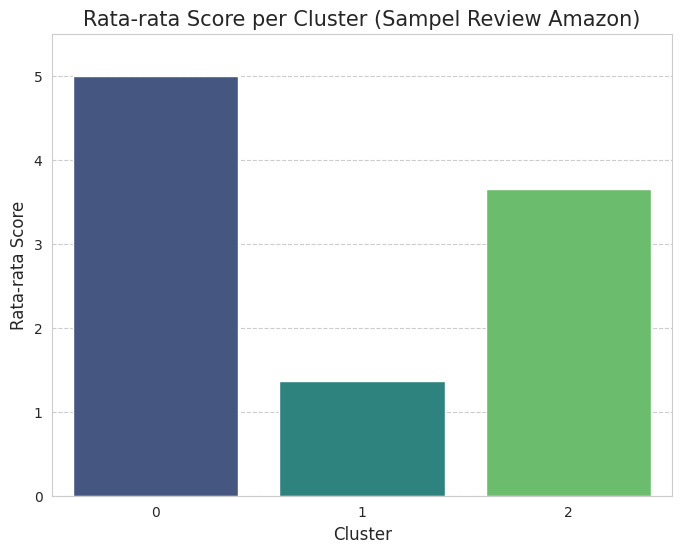

<ipython-input-28-0fa64d353225>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_reviews_clustered_sample, x='cluster', y='Score', palette='viridis')


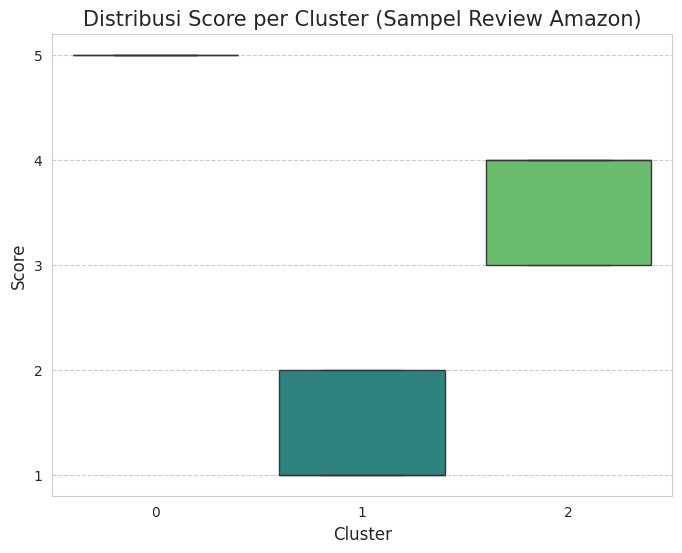

Visualisasi selesai!
Plot di atas menunjukkan bagaimana 'Score' berbeda di antara cluster yang terbentuk.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan df_reviews_clustered_sample sudah ada dari langkah K-Means
# dan berisi kolom 'Score' dan 'cluster'.

if 'df_reviews_clustered_sample' in locals():
    print("Membuat visualisasi untuk fitur 'Score' per cluster (Sampel Dataset Review)...")

    # 1. Bar Chart untuk Rata-rata Score per Cluster
    plt.figure(figsize=(8, 6))
    # Hitung rata-rata Score per cluster
    mean_scores = df_reviews_clustered_sample.groupby('cluster')['Score'].mean().reset_index()
    sns.barplot(data=mean_scores, x='cluster', y='Score', palette='viridis')
    plt.title('Rata-rata Score per Cluster (Sampel Review Amazon)', fontsize=15)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Rata-rata Score', fontsize=12)
    plt.ylim(0, 5.5) # Sesuaikan batas y jika perlu
    plt.grid(axis='y', linestyle='--')
    plt.show()

    # 2. Box Plot untuk Distribusi Score per Cluster
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_reviews_clustered_sample, x='cluster', y='Score', palette='viridis')
    plt.title('Distribusi Score per Cluster (Sampel Review Amazon)', fontsize=15)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.yticks(range(1, 6)) # Atur ticks sumbu y menjadi 1, 2, 3, 4, 5
    plt.grid(axis='y', linestyle='--')
    plt.show()

    print("Visualisasi selesai!")
    print("Plot di atas menunjukkan bagaimana 'Score' berbeda di antara cluster yang terbentuk.")
else:
    print("Variabel df_reviews_clustered_sample tidak ditemukan. Tidak dapat membuat visualisasi.")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import f_oneway
import pandas as pd
import numpy as np # Pastikan numpy diimpor
import time

# Pastikan X_reviews_prepared_sample (data sampel yang sudah di-TFIDF + Score, bisa jadi sparse),
# cluster_labels_reviews_sample (label cluster untuk sampel),
# df_reviews_clustered_sample (DataFrame sampel dengan kolom 'Score' dan 'cluster'),
# dan N_CLUSTERS_REVIEWS (jumlah cluster yang dipilih, yaitu 3) sudah ada.

print("--- Metrik Validitas Internal Cluster (Sampel Dataset Review Amazon) ---")
if 'X_reviews_prepared_sample' in locals() and 'cluster_labels_reviews_sample' in locals() and 'N_CLUSTERS_REVIEWS' in locals():

    start_time_metrics_reviews = time.time()
    print(f"Menghitung metrik validitas pada sampel data review ({X_reviews_prepared_sample.shape[0]} baris)...")

    # Silhouette Score bisa menangani sparse matrix
    silhouette_avg_reviews = silhouette_score(X_reviews_prepared_sample, cluster_labels_reviews_sample)
    print(f"Rata-rata Silhouette Score untuk {N_CLUSTERS_REVIEWS} clusters (Sampel): {silhouette_avg_reviews:.4f}")

    # Davies-Bouldin memerlukan dense array
    print("  Mengonversi data sampel ke dense array untuk Davies-Bouldin Index (mungkin memakan memori)...")
    try:
        X_reviews_prepared_sample_dense = X_reviews_prepared_sample.toarray()
        db_score_reviews = davies_bouldin_score(X_reviews_prepared_sample_dense, cluster_labels_reviews_sample)
        print(f"  Davies-Bouldin Index (Sampel): {db_score_reviews:.4f}")
        del X_reviews_prepared_sample_dense # Hapus dense array setelah selesai untuk membebaskan memori
    except MemoryError:
        print("  Gagal mengonversi ke dense array karena MemoryError. Melewatkan Davies-Bouldin Index.")
    except Exception as e:
        print(f"  Error saat menghitung Davies-Bouldin Index: {e}")


    # Calinski-Harabasz juga biasanya bisa menangani sparse matrix atau dense
    try:
        ch_score_reviews = calinski_harabasz_score(X_reviews_prepared_sample, cluster_labels_reviews_sample)
        print(f"Calinski-Harabasz Index (Sampel): {ch_score_reviews:.4f}")
    except TypeError: # Jika ternyata Calinski-Harabasz juga butuh dense di versi/kondisi tertentu
        print("  Mencoba Calinski-Harabasz dengan dense array...")
        try:
            X_reviews_prepared_sample_dense_ch = X_reviews_prepared_sample.toarray()
            ch_score_reviews = calinski_harabasz_score(X_reviews_prepared_sample_dense_ch, cluster_labels_reviews_sample)
            print(f"  Calinski-Harabasz Index (Sampel, via dense): {ch_score_reviews:.4f}")
            del X_reviews_prepared_sample_dense_ch
        except MemoryError:
            print("  Gagal mengonversi ke dense array untuk Calinski-Harabasz karena MemoryError. Melewatkan Calinski-Harabasz Index.")
        except Exception as e_ch:
            print(f"  Error saat menghitung Calinski-Harabasz Index dengan dense array: {e_ch}")
    except Exception as e_ch_sparse:
         print(f"  Error saat menghitung Calinski-Harabasz Index dengan sparse array: {e_ch_sparse}")


    end_time_metrics_reviews = time.time()
    print(f"Perhitungan metrik validitas pada sampel selesai dalam {((end_time_metrics_reviews - start_time_metrics_reviews) / 60):.2f} menit.")

else:
    print("Variabel X_reviews_prepared_sample, cluster_labels_reviews_sample, atau N_CLUSTERS_REVIEWS tidak ditemukan.")
    print("Tidak dapat menghitung metrik validitas.")

# --- Bagian ANOVA tetap sama ---
print("\n--- Analisis Perbedaan Fitur 'Score' Antar Cluster (Sampel Dataset Review Amazon) ---")

# ANOVA untuk Fitur 'Score'
print("\n Hasil ANOVA untuk Fitur 'Score':")
if 'df_reviews_clustered_sample' in locals() and 'N_CLUSTERS_REVIEWS' in locals():
    if 'Score' in df_reviews_clustered_sample.columns and 'cluster' in df_reviews_clustered_sample.columns:
        grouped_scores = [
            df_reviews_clustered_sample['Score'][df_reviews_clustered_sample['cluster'] == i]
            for i in range(N_CLUSTERS_REVIEWS)
        ]
        grouped_scores_cleaned = [group for group in grouped_scores if not group.empty]

        if len(grouped_scores_cleaned) > 1:
            f_statistic_score, p_value_score = f_oneway(*grouped_scores_cleaned)
            print(f"  Fitur: Score")
            print(f"    F-statistic: {f_statistic_score:.4f}")
            print(f"    P-value: {p_value_score:.4g}")
            if p_value_score < 0.05:
                print("    Kesimpulan: Ada perbedaan rata-rata 'Score' yang signifikan secara statistik antar cluster (p < 0.05).")
            else:
                print("    Kesimpulan: Tidak ada perbedaan rata-rata 'Score' yang signifikan secara statistik antar cluster (p >= 0.05).")
        else:
            print(f"  Fitur: Score - Tidak cukup grup data untuk ANOVA (setelah membersihkan grup kosong).")
    else:
        print("Kolom 'Score' atau 'cluster' tidak ditemukan di df_reviews_clustered_sample.")
else:
    print("Variabel df_reviews_clustered_sample atau N_CLUSTERS_REVIEWS tidak ditemukan. Tidak dapat melakukan ANOVA.")

--- Metrik Validitas Internal Cluster (Sampel Dataset Review Amazon) ---
Menghitung metrik validitas pada sampel data review (50000 baris)...
Rata-rata Silhouette Score untuk 3 clusters (Sampel): 0.2069
  Mengonversi data sampel ke dense array untuk Davies-Bouldin Index (mungkin memakan memori)...
  Davies-Bouldin Index (Sampel): 1.7097
  Mencoba Calinski-Harabasz dengan dense array...
  Calinski-Harabasz Index (Sampel, via dense): 23308.0400
Perhitungan metrik validitas pada sampel selesai dalam 2.77 menit.

--- Analisis Perbedaan Fitur 'Score' Antar Cluster (Sampel Dataset Review Amazon) ---

 Hasil ANOVA untuk Fitur 'Score':
  Fitur: Score
    F-statistic: 493685.2472
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata 'Score' yang signifikan secara statistik antar cluster (p < 0.05).



Analisis Hasil Tes Signifikansi (Sampel Dataset Review Amazon)
Metrik Validitas Internal Cluster (Dihitung pada Sampel 50.000 data)
Rata-rata Silhouette Score (Sampel): 0.2069
Skor ini positif dan menunjukkan bahwa cluster memiliki tingkat kohesi dan separasi yang lumayan. Meskipun tidak setinggi beberapa dataset produk yang lebih terstruktur, untuk data teks yang kompleks dan di-cluster menjadi hanya 3 grup berdasarkan sentimen skor, ini adalah hasil yang cukup baik.
Davies-Bouldin Index (Sampel): 1.7097
Nilai ini menunjukkan tingkat pemisahan antar cluster. Lebih rendah lebih baik, tetapi interpretasi absolutnya sulit tanpa pembanding.
Calinski-Harabasz Index (Sampel, via dense): 23308.0400
Skor ini sangat tinggi! Ini menunjukkan rasio yang sangat baik antara dispersi antar-cluster dan dispersi intra-cluster, yang berarti cluster cenderung padat dan terpisah dengan sangat baik pada sampel ini, terutama setelah konversi ke dense array. Ini adalah indikator kuat bahwa K=3 menghasilkan cluster yang terstruktur dengan baik.
Secara keseluruhan, metrik validitas internal, terutama Calinski-Harabasz Index yang tinggi, mendukung bahwa pembentukan 3 cluster pada sampel dataset review Amazon ini cukup baik dan memiliki struktur yang jelas.

Analisis Perbedaan Fitur 'Score' Antar Cluster (Dihitung pada Sampel Data)
Hasil ANOVA untuk Fitur 'Score':
F-statistic: 493685.2472 (Sangat tinggi)
P-value: 0 (Sangat kecil)
Kesimpulan: Ada perbedaan rata-rata 'Score' yang sangat signifikan secara statistik di antara ketiga cluster. Ini sangat mendukung interpretasi kita sebelumnya bahwa cluster-cluster tersebut (Cluster 0 dengan skor 5, Cluster 1 dengan skor ~1.36, dan Cluster 2 dengan skor ~3.65) memang mewakili kelompok review dengan tingkat kepuasan yang berbeda secara nyata.
Kesimpulan dari Tes Signifikansi (Sampel Dataset Review Amazon)
Tes signifikansi untuk sampel dataset review ini memberikan bukti statistik yang kuat bahwa:

Cluster yang terbentuk memiliki struktur yang baik dan terpisah, didukung oleh Silhouette Score yang positif dan Calinski-Harabasz Index yang sangat tinggi.
Cluster-cluster tersebut secara signifikan berbeda satu sama lain berdasarkan fitur Score.
Ini adalah hasil yang sangat positif dan menunjukkan bahwa pendekatan clustering berdasarkan konten teks (TF-IDF) yang digabungkan dengan Score mampu mengelompokkan review ke dalam segmen-segmen yang bermakna dan berbeda secara statistik berdasarkan sentimen/kepuasan.

In [ ]:
import pandas as pd
import numpy as np # Impor numpy untuk tipe data numerik jika diperlukan nanti

file_path = '/kaggle/input/amazon-canada-products-2023-2-1m-products/amz_ca_total_products_data_processed.csv'
print(f"Memuat dataset dari: {file_path}")

df = None # Initialize DataFrame to None

try:
    # Mencoba dengan encoding utf-8 terlebih dahulu
    df = pd.read_csv(file_path, low_memory=False) # low_memory=False untuk dataset besar dengan tipe campuran
    print("Dataset berhasil dimuat dengan encoding 'utf-8'! ✅")
except UnicodeDecodeError:
    print("Gagal memuat dengan 'utf-8', mencoba 'latin1'...")
    try:
        df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
        print("Dataset berhasil dimuat dengan encoding 'latin1'! ✅")
    except UnicodeDecodeError:
        print("Gagal memuat dengan 'latin1', mencoba 'iso-8859-1'...")
        try:
            df = pd.read_csv(file_path, encoding='iso-8859-1', low_memory=False)
            print("Dataset berhasil dimuat dengan encoding 'iso-8859-1'! ✅")
        except UnicodeDecodeError:
            print("Gagal memuat dengan 'iso-8859-1', mencoba 'cp1252'...")
            try:
                df = pd.read_csv(file_path, encoding='cp1252', low_memory=False)
                print("Dataset berhasil dimuat dengan encoding 'cp1252'! ✅")
            except Exception as e:
                print(f"❌ Gagal memuat dataset dengan semua encoding yang dicoba. Error: {e} 💥")
except FileNotFoundError:
    print(f"❌ File tidak ditemukan di path: {file_path}")
    print("Pastikan path file sudah benar.")
except Exception as e:
    print(f"Terjadi error lain saat memuat dataset: {e} 💥")

# Jika dataset berhasil dimuat, tampilkan informasinya
if df is not None:
    print("\nLima baris pertama dataset:")
    print(df.head())

    print("\nInformasi dataset (lebih detail):")
    # Menggunakan verbose=True dan show_counts=True untuk info yang lebih lengkap
    df.info(verbose=True, show_counts=True)

    print("\nStatistik deskriptif dataset (untuk semua tipe kolom):")
    # Menggunakan include='all' untuk mendapatkan statistik untuk kolom numerik dan objek
    print(df.describe(include='all'))

    print("\nJumlah missing values per kolom:")
    print(df.isnull().sum())

    print("\nJumlah nilai unik di setiap kolom dataset:")
    for col in df.columns:
        if col in df.columns: # Cek kolom masih ada
            print(f"- {col}: {df[col].nunique()} nilai unik")
        else:
            print(f"- {col}: (Kolom tidak ditemukan)")

    print("\nContoh beberapa nilai unik untuk setiap kolom dataset (maks 5 per kolom untuk brevity):")
    for col in df.columns:
        if col not in df.columns: # Periksa lagi jika kolom ada
            print(f"- {col}: (Kolom tidak ditemukan)")
            continue
        if df[col].nunique() == 0:
            print(f"- {col}: (Kolom kosong)")
            continue

        unique_values = df[col].unique()
        display_limit = 5 # Batasi contoh unik yang ditampilkan menjadi 5

        # Cek jika kolom adalah list atau dict yang di-encode sebagai string, jangan tampilkan langsung
        is_list_like_string = False
        try:
            if isinstance(unique_values[0], str) and \
               ((unique_values[0].startswith('[') and unique_values[0].endswith(']')) or \
                (unique_values[0].startswith('{') and unique_values[0].endswith('}'))):
                is_list_like_string = True
        except IndexError:
            is_list_like_string = False

        if pd.api.types.is_numeric_dtype(df[col].dtype) and df[col].nunique() > 20:
             print(f"- {col} (numerik dengan >20 nilai unik): Min={df[col].min()}, Max={df[col].max()}, {df[col].nunique()} nilai unik")
        elif is_list_like_string and df[col].nunique() > 5:
            print(f"- {col} (contoh string list-like): {unique_values[:2]} ... (total {len(unique_values)} unik)")
        elif len(unique_values) > display_limit:
            print(f"- {col} (contoh): {unique_values[:display_limit]} ... (total {len(unique_values)} unik)")
        else:
            print(f"- {col}: {unique_values}")
else:
    print("Dataset tidak berhasil dimuat, tidak ada informasi untuk ditampilkan.")

Memuat dataset dari: /kaggle/input/amazon-canada-products-2023-2-1m-products/amz_ca_total_products_data_processed.csv
Dataset berhasil dimuat dengan encoding 'utf-8'! ✅

Lima baris pertama dataset:
         asin                                              title  \
0  B07CV4L6HX  Green Leaf WW3D Wonder Extension Cord Winder, ...   
1  B09N1HGY74  8pcs Toilet Seat Bumpers Universal Toilet Repl...   
2  B087P7538J  YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...   
3  B0822FF7YQ  LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...   
4  B08NTR8NN4  Lightbeam 16" Long Stem Deep Fry Thermometer w...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/81cRe0AVC4...   
1  https://m.media-amazon.com/images/I/512CpB-EP5...   
2  https://m.media-amazon.com/images/I/71P+qLFDFc...   
3  https://m.media-amazon.com/images/I/61wfWLZRn-...   
4  https://m.media-amazon.com/images/I/61qJG-y1He...   

                            productURL  stars  reviews  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# df adalah DataFrame yang sudah dimuat dari dataset Amazon Canada
# Pastikan df sudah ada.

print("Memulai pra-pemrosesan untuk dataset Amazon Canada...")

# Salin dataframe untuk menghindari perubahan pada df asli
df_processed = df.copy()

# 1. Menangani Missing Values pada 'title'
df_processed['title'] = df_processed['title'].fillna('Unknown')
print("Missing value pada 'title' telah diisi.")

# 2. Membuang Kolom yang Tidak Perlu/Kompleks
cols_to_drop = ['asin', 'title', 'imgUrl', 'productURL']
df_processed = df_processed.drop(columns=cols_to_drop)
print(f"Kolom berikut telah dihapus: {cols_to_drop}")

# 3. Mengonversi Fitur Boolean 'isBestSeller' ke numerik (0/1)
df_processed['isBestSeller'] = df_processed['isBestSeller'].astype(int)
print("'isBestSeller' telah diubah menjadi tipe integer (0/1).")

# 4. Definisi Fitur untuk Clustering
categorical_features = ['categoryName']
numerical_features = ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']

print(f"\nFitur kategorikal yang akan digunakan: {categorical_features}")
print(f"Fitur numerik yang akan digunakan: {numerical_features}")

# Membuat DataFrame subset dengan fitur yang dipilih
features_for_clustering = categorical_features + numerical_features
df_subset = df_processed[features_for_clustering].copy()

# 5. Membuat Preprocessor untuk Encoding dan Scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

print("\nMenerapkan encoding dan scaling (ini mungkin memakan waktu sangat lama)...")
# Terapkan preprocessor ke data
# Ini akan sangat memakan waktu dan memori karena ukuran data (2.1M rows)
# dan jumlah kategori (266) yang akan di-one-hot encode.
X_prepared = preprocessor.fit_transform(df_subset)

print(f"Proses encoding dan scaling selesai.")
print(f"Dimensi data yang sudah diproses (X_prepared): {X_prepared.shape}")

# Mengingat ukuran X_prepared yang sangat besar, membuat DataFrame darinya untuk inspeksi penuh
# kemungkinan besar akan menyebabkan MemoryError. Kita akan skip pembuatan df_prepared.
# print("\nMembuat DataFrame dari data yang diproses untuk inspeksi (DITIADAKAN KARENA UKURAN BESAR)...")

print("\nData siap untuk tahap clustering! ✅")
# Variabel X_prepared akan digunakan untuk clustering.
# Variabel df_subset akan digunakan untuk menambahkan label cluster nanti.

Memulai pra-pemrosesan untuk dataset Amazon Canada...
Missing value pada 'title' telah diisi.
Kolom berikut telah dihapus: ['asin', 'title', 'imgUrl', 'productURL']
'isBestSeller' telah diubah menjadi tipe integer (0/1).

Fitur kategorikal yang akan digunakan: ['categoryName']
Fitur numerik yang akan digunakan: ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']

Menerapkan encoding dan scaling (ini mungkin memakan waktu sangat lama)...
Proses encoding dan scaling selesai.
Dimensi data yang sudah diproses (X_prepared): (2165926, 272)

Data siap untuk tahap clustering! ✅


Mengambil sampel acak sebanyak 100000 baris untuk Elbow Method (Dataset Canada)...
Dimensi sampel X_prepared_ca_sample_elbow: (100000, 272)

Menghitung inertia untuk berbagai nilai K (Elbow Method) pada sampel data Amazon Canada...
  Menjalankan K-Means untuk K=1...
    Inertia untuk K=1: 659790.29 (selesai dalam 0.84 detik)
  Menjalankan K-Means untuk K=2...
    Inertia untuk K=2: 558355.63 (selesai dalam 1.03 detik)
  Menjalankan K-Means untuk K=3...
    Inertia untuk K=3: 460318.38 (selesai dalam 1.43 detik)
  Menjalankan K-Means untuk K=4...
    Inertia untuk K=4: 405428.06 (selesai dalam 1.63 detik)
  Menjalankan K-Means untuk K=5...
    Inertia untuk K=5: 344957.28 (selesai dalam 2.66 detik)
  Menjalankan K-Means untuk K=6...
    Inertia untuk K=6: 311969.94 (selesai dalam 2.51 detik)
  Menjalankan K-Means untuk K=7...
    Inertia untuk K=7: 266422.46 (selesai dalam 2.73 detik)
  Menjalankan K-Means untuk K=8...
    Inertia untuk K=8: 255825.63 (selesai dalam 3.85 detik)
  Menjal

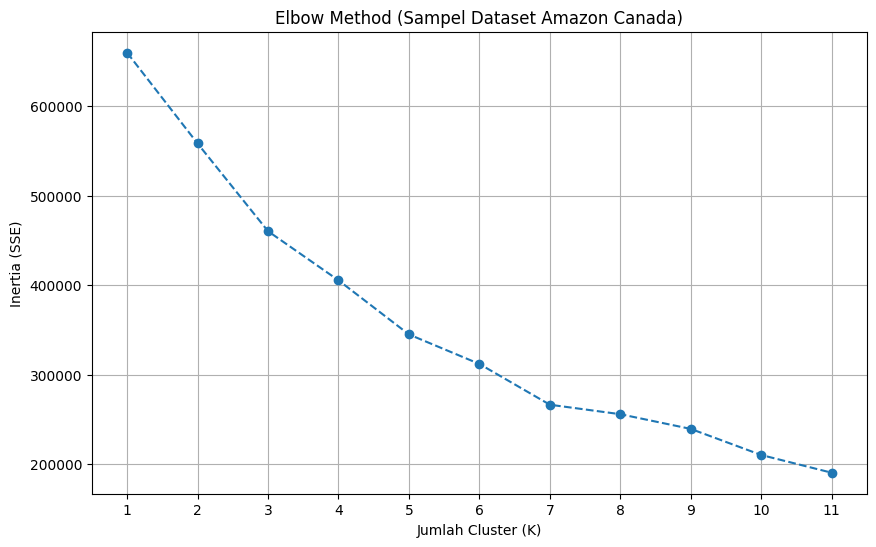


Silakan amati plot elbow di atas untuk menentukan jumlah K yang optimal untuk dataset Canada.
Setelah itu, sesuaikan nilai N_CLUSTERS_CA pada blok kode berikutnya.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.utils import shuffle # Untuk mengambil sampel acak
import numpy as np # Untuk np.arange jika diperlukan untuk indexing
import time

# X_prepared adalah data yang sudah siap dari langkah pra-pemrosesan (2.165.926, 272) untuk Amazon Canada
# df_subset adalah DataFrame sebelum di-encode/scale untuk Amazon Canada (dari data penuh)
# Pastikan variabel X_prepared dan df_subset (yang sesuai dengan dataset Canada dari data penuh) sudah ada.

# 1. Mengambil sampel acak dari X_prepared untuk Elbow Method
sample_size_ca_elbow = 100000 # Ukuran sampel, bisa disesuaikan (misalnya 50k-150k)
if 'X_prepared' in locals() and X_prepared.shape[0] > sample_size_ca_elbow:
    print(f"Mengambil sampel acak sebanyak {sample_size_ca_elbow} baris untuk Elbow Method (Dataset Canada)...")

    indices_ca_elbow = np.arange(X_prepared.shape[0])
    np.random.shuffle(indices_ca_elbow)
    sample_indices_ca_elbow = indices_ca_elbow[:sample_size_ca_elbow]

    X_prepared_ca_sample_elbow = X_prepared[sample_indices_ca_elbow]

    print(f"Dimensi sampel X_prepared_ca_sample_elbow: {X_prepared_ca_sample_elbow.shape}")
elif 'X_prepared' in locals():
    print("Ukuran dataset lebih kecil dari atau sama dengan ukuran sampel yang diinginkan, menggunakan keseluruhan data untuk Elbow Method.")
    X_prepared_ca_sample_elbow = X_prepared
else:
    print("Variabel X_prepared tidak ditemukan. Harap jalankan langkah pra-pemrosesan sebelumnya.")
    X_prepared_ca_sample_elbow = None # Pastikan terdefinisi untuk pengecekan selanjutnya

# Pastikan X_prepared_ca_sample_elbow terdefinisi sebelum lanjut
if X_prepared_ca_sample_elbow is not None:
    # 2. Menentukan K optimal menggunakan Elbow Method pada SAMPEL
    inertia_ca = []
    k_range_ca = range(1, 12)

    print("\nMenghitung inertia untuk berbagai nilai K (Elbow Method) pada sampel data Amazon Canada...")
    for k_val_ca in k_range_ca:
        start_time_k_ca = time.time()
        print(f"  Menjalankan K-Means untuk K={k_val_ca}...")
        kmeans_elbow_ca = KMeans(n_clusters=k_val_ca, init='k-means++', random_state=42, n_init='auto')
        kmeans_elbow_ca.fit(X_prepared_ca_sample_elbow)
        inertia_ca.append(kmeans_elbow_ca.inertia_)
        end_time_k_ca = time.time()
        print(f"    Inertia untuk K={k_val_ca}: {kmeans_elbow_ca.inertia_:.2f} (selesai dalam {end_time_k_ca - start_time_k_ca:.2f} detik)")

    # Plot Elbow Method
    print("\nMembuat plot Elbow Method...")
    plt.figure(figsize=(10, 6))
    plt.plot(k_range_ca, inertia_ca, marker='o', linestyle='--')
    plt.title('Elbow Method (Sampel Dataset Amazon Canada)')
    plt.xlabel('Jumlah Cluster (K)')
    plt.ylabel('Inertia (SSE)')
    plt.xticks(k_range_ca)
    plt.grid(True)
    plt.show()

    print("\nSilakan amati plot elbow di atas untuk menentukan jumlah K yang optimal untuk dataset Canada.")
    print("Setelah itu, sesuaikan nilai N_CLUSTERS_CA pada blok kode berikutnya.")
else:
    print("Tidak dapat melanjutkan karena X_prepared_ca_sample_elbow tidak terdefinisi.")

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import time
import numpy as np
from sklearn.utils import shuffle

# ASUMSI:
# X_prepared (2.1M baris x 272 kolom dari data PENUH Amazon Canada) SUDAH ADA di memori.
# df_subset (2.1M baris, berisi kolom fitur asli dari data PENUH Amazon Canada) SUDAH ADA di memori.
# Jika kernel restart dan variabel ini hilang, Anda harus membuatnya ulang,
# dan jika pembuatan X_prepared dari data penuh menyebabkan crash, maka sampling harus dilakukan
# SEBELUM tahap encoding/scaling.

# Untuk sekarang, kita asumsikan X_prepared dan df_subset dari data penuh sudah ada.

if 'X_prepared' not in locals() or 'df_subset' not in locals():
    print("ERROR: Variabel 'X_prepared' atau 'df_subset' (untuk data penuh) tidak ditemukan.")
    print("Anda mungkin perlu menjalankan ulang langkah pra-pemrosesan data penuh,")
    print("atau jika itu menyebabkan crash, gunakan pendekatan SAMPLING dari awal (sebelum encoding).")
else:
    print(f"Menggunakan X_prepared dengan dimensi: {X_prepared.shape}")
    print(f"Menggunakan df_subset dengan dimensi: {df_subset.shape}")

    if X_prepared.shape[0] != df_subset.shape[0]:
        print("ERROR: Jumlah baris X_prepared dan df_subset tidak cocok!")
    else:
        # 1. Mengambil sampel acak dari X_prepared dan df_subset yang sesuai
        sample_size_ca_kmeans = 150000  # Ukuran sampel untuk K-Means, bisa disesuaikan
        if X_prepared.shape[0] > sample_size_ca_kmeans:
            print(f"\nPERHATIAN: Mengambil sampel sebanyak {sample_size_ca_kmeans} baris untuk K-Means...")

            # Shuffle X_prepared dan df_subset bersamaan menggunakan indeks acak
            indices_ca_kmeans = np.arange(X_prepared.shape[0])
            np.random.shuffle(indices_ca_kmeans)
            sample_indices_ca_kmeans = indices_ca_kmeans[:sample_size_ca_kmeans]

            X_prepared_ca_sample_final = X_prepared[sample_indices_ca_kmeans]
            # df_subset juga perlu disampling dengan indeks yang sama untuk analisis nanti
            df_subset_ca_sample_final = df_subset.iloc[sample_indices_ca_kmeans].copy()

            print(f"Dimensi X_prepared_ca_sample_final (untuk K-Means): {X_prepared_ca_sample_final.shape}")
            print(f"Dimensi df_subset_ca_sample_final: {df_subset_ca_sample_final.shape}")
        else:
            print("\nUkuran data lebih kecil atau sama dengan target sampel, menggunakan data penuh untuk K-Means (hati-hati RAM).")
            X_prepared_ca_sample_final = X_prepared
            df_subset_ca_sample_final = df_subset.copy()


        # Pastikan sampel berhasil dibuat sebelum lanjut
        if 'X_prepared_ca_sample_final' in locals():
            N_CLUSTERS_CA = 4 # Sesuai pilihan Anda
            print(f"\nMenjalankan K-Means dengan K = {N_CLUSTERS_CA} pada SAMPEL dataset Amazon Canada ({X_prepared_ca_sample_final.shape[0]} baris)...")

            start_time_ca_sample = time.time()
            kmeans_ca_sample = KMeans(n_clusters=N_CLUSTERS_CA, init='k-means++', random_state=42, n_init='auto')
            cluster_labels_ca_sample = kmeans_ca_sample.fit_predict(X_prepared_ca_sample_final)
            end_time_ca_sample = time.time()

            print(f"Proses K-Means pada sampel selesai dalam {((end_time_ca_sample - start_time_ca_sample) / 60):.2f} menit.")

            # Menambahkan label cluster kembali ke DataFrame SAMPEL (df_subset_ca_sample_final)
            df_ca_clustered_sample = df_subset_ca_sample_final # Gunakan df_subset yang sudah disample
            df_ca_clustered_sample['cluster'] = cluster_labels_ca_sample

            print(f"\nLima baris pertama data sampel Amazon Canada dengan label cluster:")
            print(df_ca_clustered_sample.head())

            print(f"\nDistribusi item per cluster (Sampel Dataset Amazon Canada):")
            print(df_ca_clustered_sample['cluster'].value_counts().sort_index())

            print("\nKarakteristik Rata-Rata Fitur Numerik per Cluster (Sampel Dataset Amazon Canada):")
            numerical_features_ca_analysis = ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']
            valid_numerical_features_ca = [col for col in numerical_features_ca_analysis if col in df_ca_clustered_sample.columns]
            if valid_numerical_features_ca:
                print(df_ca_clustered_sample.groupby('cluster')[valid_numerical_features_ca].mean())
            else:
                print("Tidak ada fitur numerik yang valid ditemukan untuk analisis rata-rata.")

            print("\nKarakteristik Modus Fitur Kategorikal per Cluster (Sampel Dataset Amazon Canada):")
            categorical_features_ca_analysis = ['categoryName']
            valid_categorical_features_ca = [col for col in categorical_features_ca_analysis if col in df_ca_clustered_sample.columns]
            if valid_categorical_features_ca:
                for col_cat_ca in valid_categorical_features_ca:
                    print(f"\nModus untuk '{col_cat_ca}' per cluster (Sampel Dataset Amazon Canada):")
                    mode_results_ca = df_ca_clustered_sample.groupby('cluster')[col_cat_ca].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A")
                    print(mode_results_ca)
            else:
                print("Tidak ada fitur kategorikal yang valid ditemukan untuk analisis modus.")
        else:
            print("Gagal membuat sampel X_prepared_ca_sample_final. Tidak dapat melanjutkan K-Means.")

Menggunakan X_prepared dengan dimensi: (2165926, 272)
Menggunakan df_subset dengan dimensi: (2165926, 7)

PERHATIAN: Mengambil sampel sebanyak 150000 baris untuk K-Means...
Dimensi X_prepared_ca_sample_final (untuk K-Means): (150000, 272)
Dimensi df_subset_ca_sample_final: (150000, 7)

Menjalankan K-Means dengan K = 4 pada SAMPEL dataset Amazon Canada (150000 baris)...
Proses K-Means pada sampel selesai dalam 0.14 menit.

Lima baris pertama data sampel Amazon Canada dengan label cluster:
                       categoryName  stars  reviews   price  listPrice  \
993098        3D Printing  Scanning    0.0        0   44.95        0.0   
430042                  Electronics    4.2     9774   10.97        0.0   
1730491                Pest Control    0.0        0    0.00        0.0   
46517                   Men's Shoes    4.5       60  286.86        0.0   
1839955  Paint, Body  Trim Products    4.3       68   14.89        0.0   

         isBestSeller  boughtInLastMonth  cluster  
993098    

Bagus sekali! Dengan menjalankan K-Means pada sampel 150.000 data, prosesnya selesai dengan sangat cepat (0.14 menit) dan kita berhasil mendapatkan hasil clustering untuk dataset Amazon Canada tanpa crash.

Mari kita interpretasikan 4 cluster yang terbentuk dari sampel ini:

Interpretasi Hasil Cluster (Sampel Dataset Amazon Canada, K=4)
Perlu diingat bahwa ini adalah hasil dari sampel, tetapi seharusnya memberikan gambaran yang baik.

Cluster 0: "Produk Umum dengan Interaksi & Penjualan Rendah hingga Sedang"

Jumlah Anggota: 148.508 (Cluster dominan dalam sampel)
Modus categoryName: Baby (Bayi) - Meskipun "Baby" adalah modus, cluster ini sangat besar dan kemungkinan mencakup banyak kategori lain karena rata-rata fitur lainnya tidak spesifik ke "Baby" saja.
Karakteristik Numerik Rata-rata:
stars: ~2.63 (cukup rendah hingga sedang)
reviews: ~472 (sedang)
price: ~81 (relatif terjangkau)
listPrice: ~4.67 (sangat rendah, mungkin banyak yang 0)
isBestSeller: 0.0 (hampir tidak ada yang bestseller)
boughtInLastMonth: ~7.6 (rendah)
Interpretasi: Ini adalah cluster terbesar yang menampung sebagian besar produk dalam sampel. Karakteristiknya menunjukkan produk-produk umum dengan tingkat interaksi pelanggan (stars, reviews) dan penjualan (boughtInLastMonth) yang tidak terlalu tinggi. Harganya cenderung terjangkau. Meskipun modus kategorinya "Baby", ukuran cluster ini menyarankan ia mencakup berbagai macam kategori produk.
Cluster 1: "Produk Sangat Mahal dengan Interaksi Sangat Rendah (Niche/Baru)"

Jumlah Anggota: 884
Modus categoryName: Children's Outdoor Inflatable Bouncers & Bouncy... (Perlengkapan Bermain Anak Outdoor)
Karakteristik Numerik Rata-rata:
stars: ~0.18 (sangat rendah, hampir tidak ada rating)
reviews: ~3.86 (sangat sedikit review)
price: ~5439 (sangat tinggi! Ini adalah harga rata-rata tertinggi)
listPrice: 0.0 (tidak ada harga asli tercatat rata-ratanya)
isBestSeller: 0.0 (tidak ada yang bestseller)
boughtInLastMonth: 0.0 (tidak ada penjualan tercatat bulan lalu)
Interpretasi: Cluster ini mengidentifikasi produk-produk dengan harga rata-rata yang sangat mahal. Interaksi pelanggan dan aktivitas penjualannya sangat minim. Modus kategori "Children's Outdoor Inflatable Bouncers & Bouncy..." mengindikasikan barang-barang besar dan mahal. Ini bisa jadi produk niche, produk baru yang mahal, atau produk dengan volume penjualan sangat rendah.
Cluster 2: "Produk Elektronik Populer dengan Banyak Review"

Jumlah Anggota: 81 (Cluster terkecil kedua, sangat spesifik)
Modus categoryName: Electronics (Elektronik)
Karakteristik Numerik Rata-rata:
stars: ~4.43 (sangat baik)
reviews: ~122.016 (jumlah review sangat tinggi!)
price: ~35.65 (sangat terjangkau untuk elektronik, ini menarik)
listPrice: ~10.19 (rendah)
isBestSeller: ~0.05 (sekitar 5% adalah bestseller)
boughtInLastMonth: ~170 (penjualan bulan lalu cukup baik)
Interpretasi: Meskipun kecil, cluster ini sangat berbeda. Isinya adalah produk elektronik dengan rating bintang yang sangat baik dan jumlah review yang luar biasa tinggi. Harganya yang rata-rata rendah untuk kategori elektronik mungkin menunjukkan aksesoris elektronik populer atau item dengan harga kompetitif. Aktivitas penjualannya juga baik.
Cluster 3: "Produk Olahraga & Outdoor Super Laris (Bestseller)"

Jumlah Anggota: 527 (Cluster kecil tapi signifikan)
Modus categoryName: Sports & Outdoors (Olahraga & Outdoor)
Karakteristik Numerik Rata-rata:
stars: ~4.34 (sangat baik)
reviews: ~6.155 (banyak review)
price: ~44.3 (terjangkau)
listPrice: ~19.68 (rendah)
isBestSeller: ~0.987 (sangat tinggi! Hampir semuanya adalah bestseller)
boughtInLastMonth: ~442 (penjualan bulan lalu sangat tinggi)
Interpretasi: Cluster ini dengan jelas mengisolasi produk-produk dari kategori "Sports & Outdoors" yang sangat laris. Mereka memiliki rating bintang yang sangat baik, banyak review, dan yang paling menonjol adalah hampir semuanya berstatus bestseller dengan angka penjualan bulan lalu yang tinggi.
Observasi Penting dari Dataset Amazon Canada (Sampel):

Pemisahan Berdasarkan Performa Penjualan dan Kategori Inti: Cluster-cluster ini sangat dibedakan oleh kombinasi performa penjualan (reviews, isBestSeller, boughtInLastMonth), harga, dan kategori utama.
Identifikasi Segmen Niche/Bestseller: K-Means berhasil mengisolasi kelompok produk yang sangat berperforma tinggi (Cluster 3) dan produk elektronik populer (Cluster 2), serta produk mahal dengan aktivitas rendah (Cluster 1).
Cluster Mayoritas: Cluster 0 menampung sebagian besar produk "standar" dengan performa rata-rata atau di bawah rata-rata.
Hasil ini menunjukkan pola segmentasi yang menarik, bahkan hanya dari sampel data.

Membuat visualisasi untuk fitur kategorikal (Sampel Dataset Amazon Canada)...


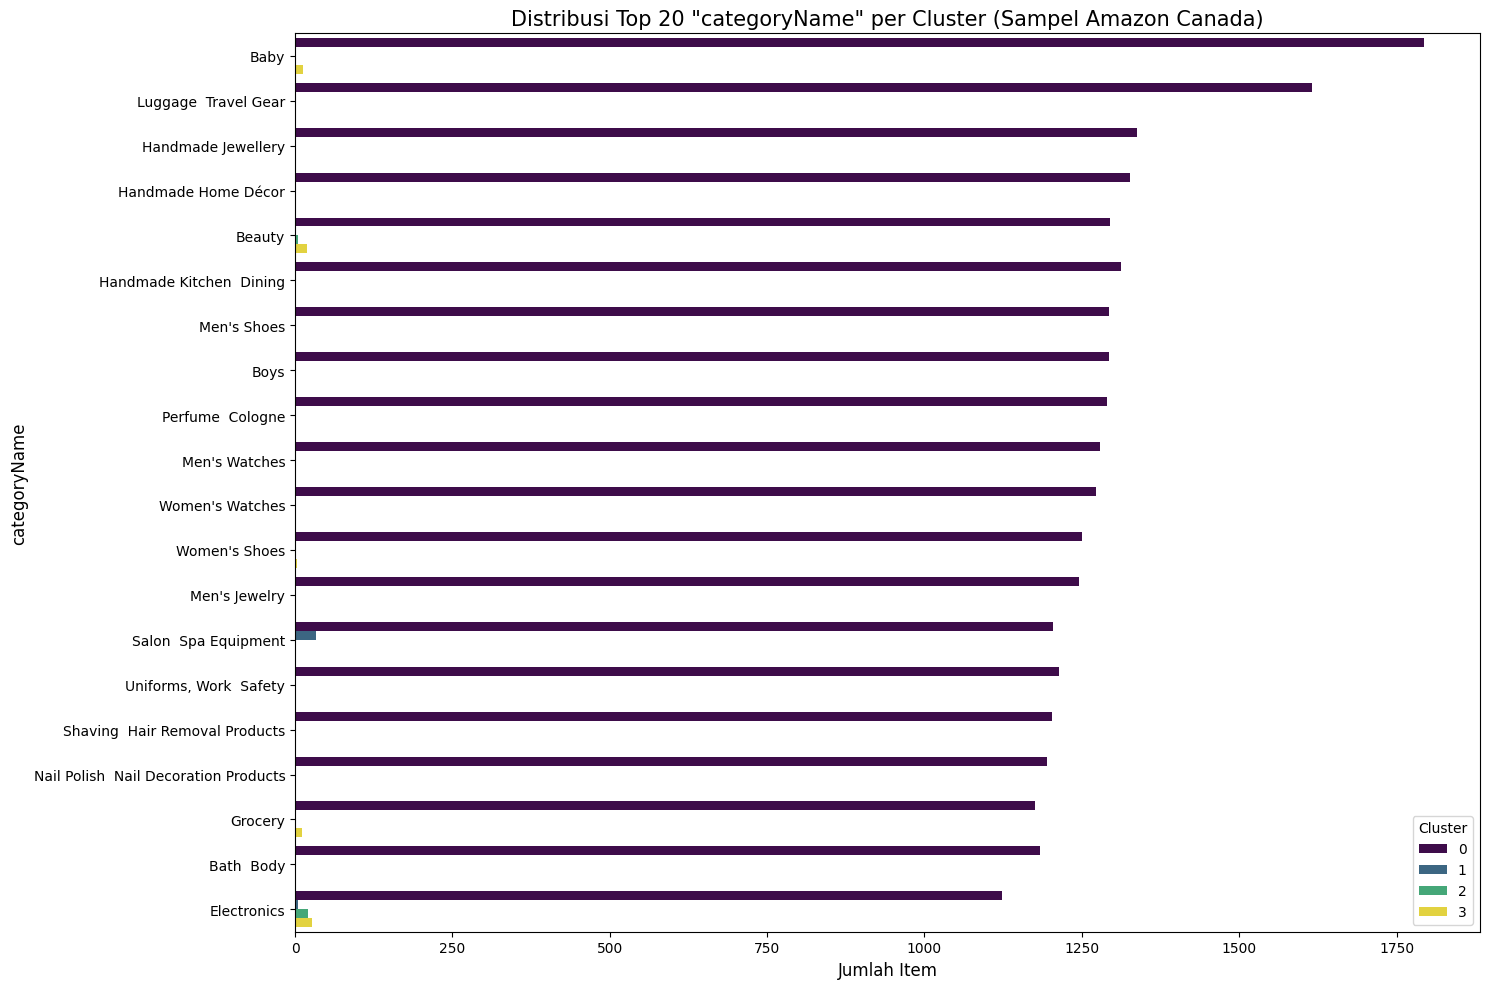


Membuat visualisasi untuk fitur numerik (Sampel Dataset Amazon Canada)...


<ipython-input-5-2741a8cc5e0d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ca_clustered_sample, x='cluster', y=feature_num_ca, palette='viridis', showfliers=False)


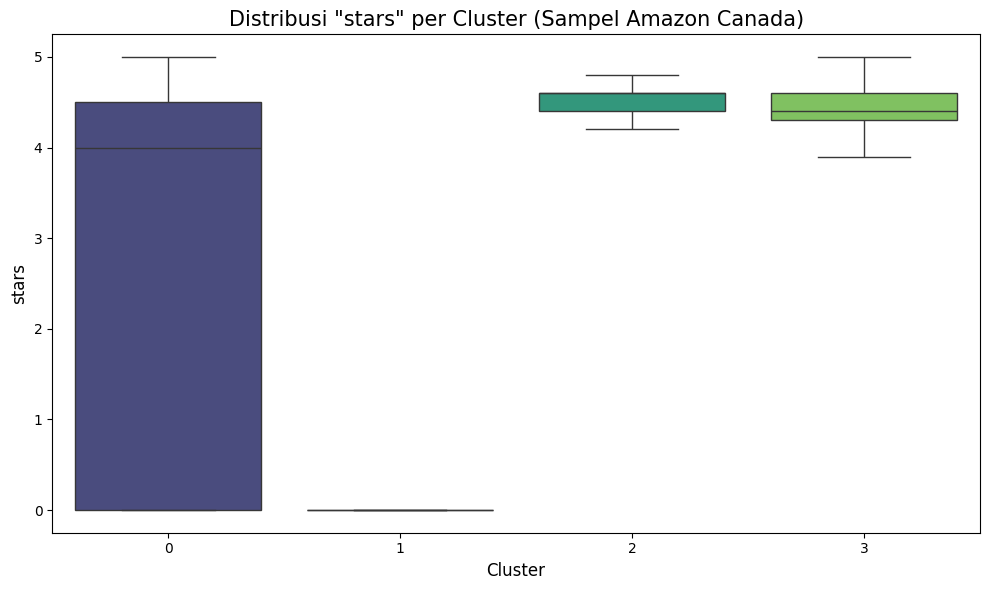

<ipython-input-5-2741a8cc5e0d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ca_clustered_sample, x='cluster', y=feature_num_ca, palette='viridis', showfliers=False)


Fitur 'reviews' pada sampel Amazon Canada mungkin memiliki nilai non-positif, tidak menggunakan skala log untuk boxplot ini.


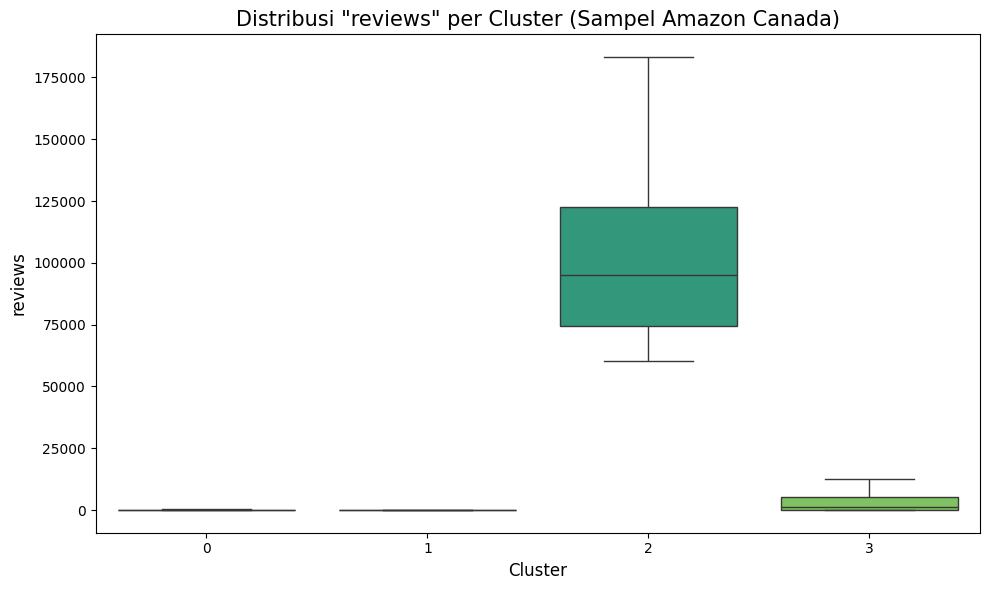

<ipython-input-5-2741a8cc5e0d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ca_clustered_sample, x='cluster', y=feature_num_ca, palette='viridis', showfliers=False)


Fitur 'price' pada sampel Amazon Canada mungkin memiliki nilai non-positif, tidak menggunakan skala log untuk boxplot ini.


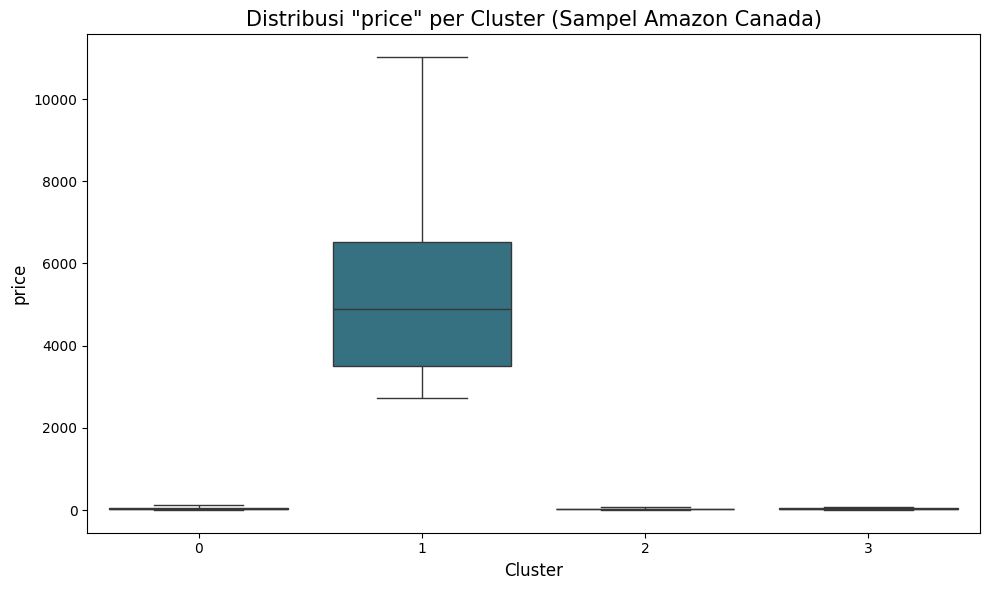

<ipython-input-5-2741a8cc5e0d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ca_clustered_sample, x='cluster', y=feature_num_ca, palette='viridis', showfliers=False)


Fitur 'listPrice' pada sampel Amazon Canada mungkin memiliki nilai non-positif, tidak menggunakan skala log untuk boxplot ini.


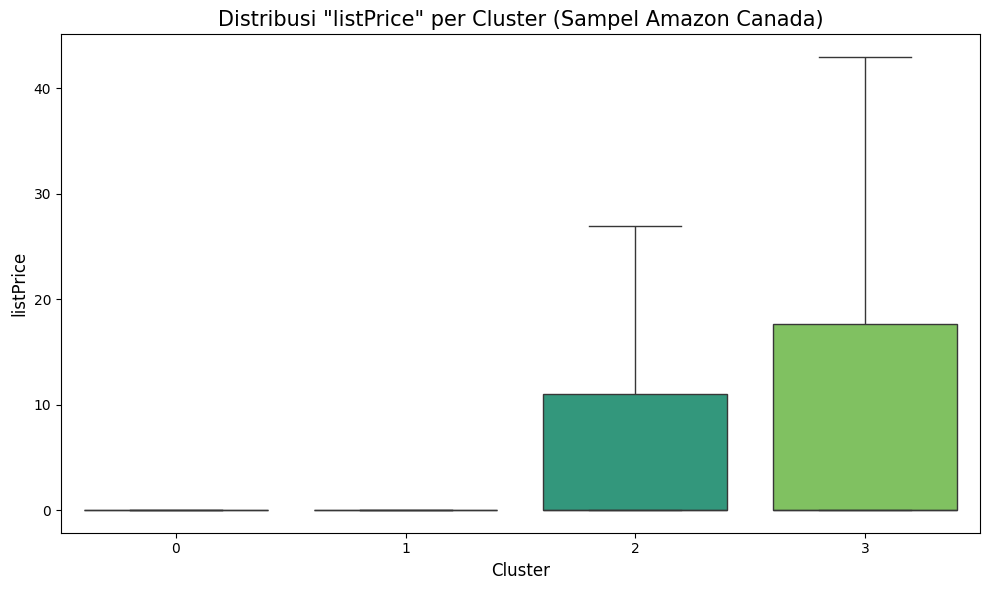

<ipython-input-5-2741a8cc5e0d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ca_clustered_sample, x='cluster', y=feature_num_ca, palette='viridis', showfliers=False)


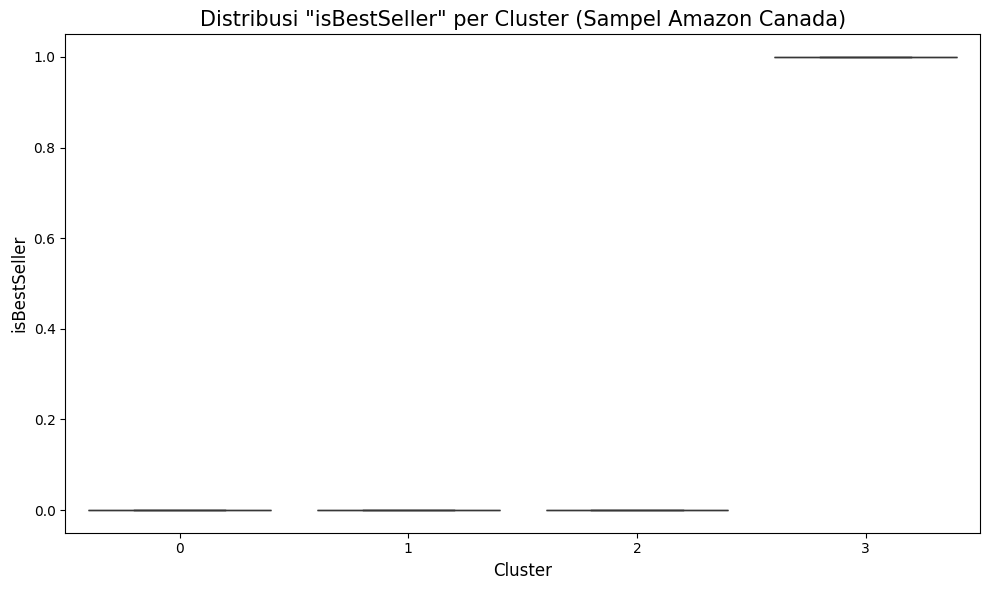

<ipython-input-5-2741a8cc5e0d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ca_clustered_sample, x='cluster', y=feature_num_ca, palette='viridis', showfliers=False)


Fitur 'boughtInLastMonth' pada sampel Amazon Canada mungkin memiliki nilai non-positif, tidak menggunakan skala log untuk boxplot ini.


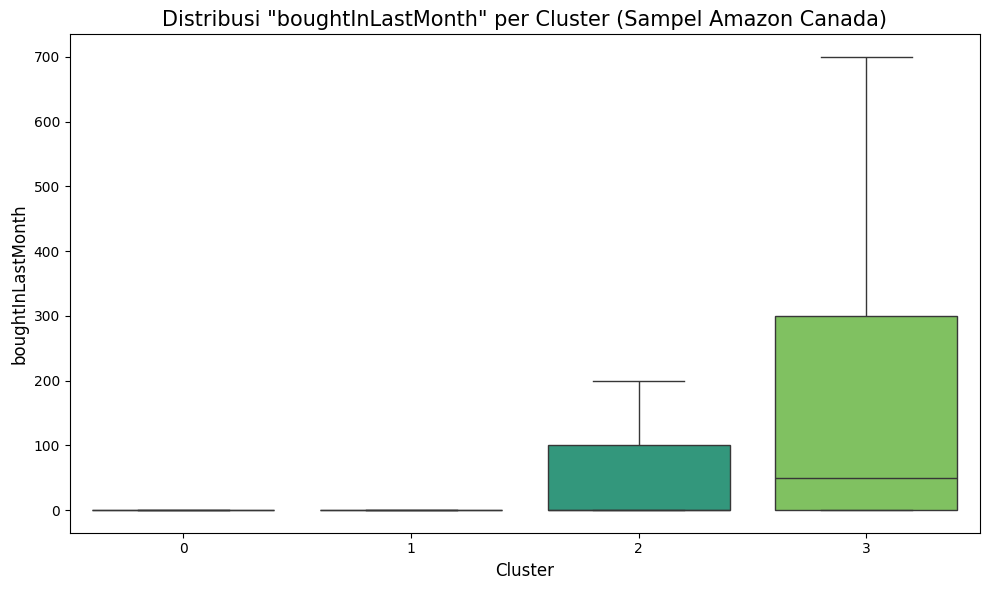

Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster sampel dataset Amazon Canada.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan df_ca_clustered_sample sudah ada dari langkah K-Means
# dan berisi kolom-kolom fitur asli dari sampel dan kolom 'cluster'.

if 'df_ca_clustered_sample' in locals():
    print("Membuat visualisasi untuk fitur kategorikal (Sampel Dataset Amazon Canada)...")

    # 1. Visualisasi Distribusi Fitur Kategorikal per Cluster
    categorical_features_ca_viz = ['categoryName']
    for feature_cat_ca in categorical_features_ca_viz:
        plt.figure(figsize=(15, 10)) # Perbesar ukuran untuk categoryName

        # Ambil top N kategori paling umum dari sampel untuk menjaga plot tetap terbaca
        top_n_categories_ca = df_ca_clustered_sample[feature_cat_ca].value_counts().nlargest(20).index

        # Filter DataFrame sampel untuk hanya menyertakan top N kategori
        df_filtered_cat_ca = df_ca_clustered_sample[df_ca_clustered_sample[feature_cat_ca].isin(top_n_categories_ca)]

        sns.countplot(data=df_filtered_cat_ca, y=feature_cat_ca, hue='cluster', palette='viridis', order=top_n_categories_ca)
        plt.title(f'Distribusi Top 20 "{feature_cat_ca}" per Cluster (Sampel Amazon Canada)', fontsize=15)
        plt.xlabel('Jumlah Item', fontsize=12)
        plt.ylabel(feature_cat_ca, fontsize=12)
        plt.legend(title='Cluster')
        plt.tight_layout()
        plt.show()

    # 2. Visualisasi Distribusi Fitur Numerik per Cluster
    numerical_features_ca_viz = [
        'stars', 'reviews', 'price', 'listPrice',
        'isBestSeller', 'boughtInLastMonth'
    ]
    print("\nMembuat visualisasi untuk fitur numerik (Sampel Dataset Amazon Canada)...")
    for feature_num_ca in numerical_features_ca_viz:
        plt.figure(figsize=(10, 6))
        # Menggunakan data sampel df_ca_clustered_sample
        sns.boxplot(data=df_ca_clustered_sample, x='cluster', y=feature_num_ca, palette='viridis', showfliers=False)

        title_str_ca = f'Distribusi "{feature_num_ca}" per Cluster (Sampel Amazon Canada)'

        # Pertimbangkan skala log untuk fitur dengan rentang sangat besar dan skewness tinggi
        if feature_num_ca in ['reviews', 'price', 'boughtInLastMonth', 'listPrice']:
            # Cek apakah ada nilai non-positif sebelum menerapkan skala log pada sampel
            if not df_ca_clustered_sample[feature_num_ca].empty and (df_ca_clustered_sample[feature_num_ca] > 0).all():
                plt.yscale('log')
                title_str_ca += ' (Skala Log)'
            elif not df_ca_clustered_sample[feature_num_ca].empty: # Hanya cetak jika kolom tidak kosong
                 print(f"Fitur '{feature_num_ca}' pada sampel Amazon Canada mungkin memiliki nilai non-positif, tidak menggunakan skala log untuk boxplot ini.")

        plt.title(title_str_ca, fontsize=15)
        plt.xlabel('Cluster', fontsize=12)
        plt.ylabel(feature_num_ca, fontsize=12)
        plt.tight_layout()
        plt.show()

    print("Visualisasi selesai! Amati plot untuk mendukung interpretasi cluster sampel dataset Amazon Canada.")
else:
    print("Variabel df_ca_clustered_sample tidak ditemukan. Tidak dapat membuat visualisasi.")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import f_oneway, chi2_contingency
import pandas as pd
import numpy as np # Pastikan numpy diimpor
import time

# Pastikan X_prepared_ca_sample_final (data sampel yang sudah di-encode dan scale untuk dataset Canada),
# cluster_labels_ca_sample (label cluster untuk sampel Canada),
# df_ca_clustered_sample (DataFrame sampel dengan kolom fitur asli dan 'cluster' untuk Canada),
# dan N_CLUSTERS_CA (jumlah cluster yang dipilih, yaitu 4) sudah ada dari langkah-langkah sebelumnya.

print("--- Metrik Validitas Internal Cluster (Sampel Dataset Amazon Canada) ---")
if 'X_prepared_ca_sample_final' in locals() and 'cluster_labels_ca_sample' in locals() and 'N_CLUSTERS_CA' in locals():

    # X_prepared_ca_sample_final sudah merupakan sampel, kita hitung langsung.
    start_time_metrics_ca_sample = time.time()
    print(f"Menghitung metrik validitas pada sampel data Amazon Canada ({X_prepared_ca_sample_final.shape[0]} baris)...")

    silhouette_avg_ca_sample = silhouette_score(X_prepared_ca_sample_final, cluster_labels_ca_sample)
    print(f"Rata-rata Silhouette Score untuk {N_CLUSTERS_CA} clusters (Sampel): {silhouette_avg_ca_sample:.4f}")

    # Davies-Bouldin memerlukan dense array jika X_prepared_ca_sample_final adalah sparse
    # Jika X_prepared_ca_sample_final sudah dense karena OneHotEncoder(sparse_output=False), ini aman.
    # Kita asumsikan X_prepared_ca_sample_final adalah dense berdasarkan proses sebelumnya.
    try:
        # Jika X_prepared_ca_sample_final adalah sparse, perlu .toarray()
        # Jika sudah dense, baris di bawah ini bisa error jika mencoba .toarray() pada numpy array.
        # Mari kita coba langsung, dan tangani error jika perlu.
        db_score_ca_sample = davies_bouldin_score(X_prepared_ca_sample_final, cluster_labels_ca_sample)
        print(f"Davies-Bouldin Index (Sampel): {db_score_ca_sample:.4f}")
    except TypeError as e_db: # Tangkap TypeError jika input sparse tidak didukung & tidak ada metode .toarray()
        print(f"  Warning saat menghitung Davies-Bouldin (mungkin karena tipe data): {e_db}")
        print("  Mencoba mengonversi ke dense array jika input adalah sparse...")
        try:
            X_dense_for_db = X_prepared_ca_sample_final.toarray()
            db_score_ca_sample = davies_bouldin_score(X_dense_for_db, cluster_labels_ca_sample)
            print(f"  Davies-Bouldin Index (Sampel, via dense): {db_score_ca_sample:.4f}")
            del X_dense_for_db
        except AttributeError: # Jika X_prepared_ca_sample_final sudah dense (numpy array)
             print(f"  Gagal .toarray(), input mungkin sudah dense. Error asli: {e_db}")
        except Exception as e_db_conv:
            print(f"  Gagal menghitung Davies-Bouldin setelah mencoba konversi: {e_db_conv}")
    except Exception as e_db_other:
        print(f"  Error saat menghitung Davies-Bouldin Index: {e_db_other}")


    try:
        ch_score_ca_sample = calinski_harabasz_score(X_prepared_ca_sample_final, cluster_labels_ca_sample)
        print(f"Calinski-Harabasz Index (Sampel): {ch_score_ca_sample:.4f}")
    except TypeError as e_ch: # Mirip penanganan untuk Calinski-Harabasz
        print(f"  Warning saat menghitung Calinski-Harabasz (mungkin karena tipe data): {e_ch}")
        print("  Mencoba mengonversi ke dense array jika input adalah sparse...")
        try:
            X_dense_for_ch = X_prepared_ca_sample_final.toarray()
            ch_score_ca_sample = calinski_harabasz_score(X_dense_for_ch, cluster_labels_ca_sample)
            print(f"  Calinski-Harabasz Index (Sampel, via dense): {ch_score_ca_sample:.4f}")
            del X_dense_for_ch
        except AttributeError:
             print(f"  Gagal .toarray(), input mungkin sudah dense. Error asli: {e_ch}")
        except Exception as e_ch_conv:
            print(f"  Gagal menghitung Calinski-Harabasz setelah mencoba konversi: {e_ch_conv}")
    except Exception as e_ch_other:
        print(f"  Error saat menghitung Calinski-Harabasz Index: {e_ch_other}")

    end_time_metrics_ca_sample = time.time()
    print(f"Perhitungan metrik validitas pada sampel selesai dalam {((end_time_metrics_ca_sample - start_time_metrics_ca_sample) / 60):.2f} menit.")

else:
    print("Variabel X_prepared_ca_sample_final, cluster_labels_ca_sample, atau N_CLUSTERS_CA tidak ditemukan.")
    print("Tidak dapat menghitung metrik validitas.")

# --- Bagian ANOVA dan Chi-square tetap sama, dijalankan pada data sampel df_ca_clustered_sample ---

print("\n--- Analisis Perbedaan Fitur Antar Cluster (Sampel Dataset Amazon Canada) ---")

# ANOVA untuk Fitur Numerik (Sampel Dataset Amazon Canada)
numerical_features_ca_analysis = ['stars', 'reviews', 'price', 'listPrice', 'isBestSeller', 'boughtInLastMonth']
print("\n Hasil ANOVA untuk Fitur Numerik (Sampel Dataset Amazon Canada):")
if 'df_ca_clustered_sample' in locals() and 'N_CLUSTERS_CA' in locals():
    for feature_num_ca in numerical_features_ca_analysis:
        if feature_num_ca in df_ca_clustered_sample.columns:
            grouped_data_ca = [df_ca_clustered_sample[feature_num_ca][df_ca_clustered_sample['cluster'] == i] for i in range(N_CLUSTERS_CA)]
            grouped_data_cleaned_ca = [group for group in grouped_data_ca if not group.empty]

            if len(grouped_data_cleaned_ca) > 1:
                f_statistic_ca, p_value_ca = f_oneway(*grouped_data_cleaned_ca)
                print(f"  Fitur: {feature_num_ca}")
                print(f"    F-statistic: {f_statistic_ca:.4f}")
                print(f"    P-value: {p_value_ca:.4g}")
                if p_value_ca < 0.05:
                    print("    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).")
                else:
                    print("    Kesimpulan: Tidak ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p >= 0.05).")
            else:
                print(f"  Fitur: {feature_num_ca} - Tidak cukup grup data untuk ANOVA.")
        else:
            print(f"  Fitur: {feature_num_ca} tidak ditemukan di df_ca_clustered_sample.")
else:
    print("Variabel df_ca_clustered_sample atau N_CLUSTERS_CA tidak ditemukan. Tidak dapat melakukan ANOVA.")

# Chi-square Test untuk Fitur Kategorikal (Sampel Dataset Amazon Canada)
categorical_features_ca_analysis = ['categoryName']
print("\n Hasil Chi-square Test untuk Fitur Kategorikal (Sampel Dataset Amazon Canada):")
if 'df_ca_clustered_sample' in locals():
    for feature_cat_ca in categorical_features_ca_analysis:
        if feature_cat_ca in df_ca_clustered_sample.columns:
            contingency_table_ca = pd.crosstab(df_ca_clustered_sample[feature_cat_ca], df_ca_clustered_sample['cluster'])
            chi2_ca, p_value_ca, dof_ca, expected_ca = chi2_contingency(contingency_table_ca)
            print(f"  Fitur: {feature_cat_ca}")
            print(f"    Chi-square statistic: {chi2_ca:.4f}")
            print(f"    P-value: {p_value_ca:.4g}")
            print(f"    Degrees of Freedom: {dof_ca}")
            if p_value_ca < 0.05:
                print("    Kesimpulan: Ada hubungan yang signifikan secara statistik antara fitur dan cluster (p < 0.05).")
            else:
                print("    Kesimpulan: Tidak ada hubungan yang signifikan secara statistik antara fitur dan cluster (p >= 0.05).")
        else:
            print(f"  Fitur: {feature_cat_ca} tidak ditemukan di df_ca_clustered_sample.")
else:
    print("Variabel df_ca_clustered_sample tidak ditemukan. Tidak dapat melakukan Chi-square test.")

--- Metrik Validitas Internal Cluster (Sampel Dataset Amazon Canada) ---
Menghitung metrik validitas pada sampel data Amazon Canada (150000 baris)...
Rata-rata Silhouette Score untuk 4 clusters (Sampel): 0.7887
Davies-Bouldin Index (Sampel): 0.5940
Calinski-Harabasz Index (Sampel): 21959.7229
Perhitungan metrik validitas pada sampel selesai dalam 13.72 menit.

--- Analisis Perbedaan Fitur Antar Cluster (Sampel Dataset Amazon Canada) ---

 Hasil ANOVA untuk Fitur Numerik (Sampel Dataset Amazon Canada):
  Fitur: stars
    F-statistic: 517.2543
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: reviews
    F-statistic: 36047.2530
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: price
    F-statistic: 97669.4295
    P-value: 0
    Kesimpulan: Ada perbedaan rata-rata yang signifikan secara statistik antar cluster (p < 0.05).
  Fitur: listPrice
   


Analisis Hasil Tes Signifikansi (Sampel Dataset Amazon Canada)
Metrik Validitas Internal Cluster (Dihitung pada Sampel 150.000 data)
Rata-rata Silhouette Score (Sampel): 0.7887
Ini adalah skor Silhouette yang sangat tinggi! Nilai yang mendekati 1 menunjukkan bahwa objek-objek dalam cluster sangat mirip satu sama lain (kohesi tinggi) dan sangat berbeda dengan objek di cluster lain (separasi tinggi). Skor 0.7887 adalah indikasi kuat bahwa cluster-cluster yang terbentuk sangat baik, padat, dan terdefinisi dengan jelas.
Davies-Bouldin Index (Sampel): 0.5940
Ini adalah nilai Davies-Bouldin yang sangat rendah, yang merupakan hasil yang sangat baik. Nilai yang lebih rendah menunjukkan cluster yang lebih terpisah dan lebih padat. Ini adalah skor Davies-Bouldin terbaik yang kita lihat.
Calinski-Harabasz Index (Sampel): 21959.7229
Skor ini juga sangat tinggi, menunjukkan rasio yang sangat baik antara dispersi antar-cluster dan dispersi intra-cluster.
Secara keseluruhan, metrik validitas internal ini memberikan konfirmasi kuat bahwa pembentukan 4 cluster pada sampel dataset Amazon Canada menghasilkan struktur cluster yang sangat baik, jelas, padat, dan terpisah dengan sangat baik. Ini adalah hasil yang ideal dari sebuah proses clustering.

Analisis Perbedaan Fitur Antar Cluster (Dihitung pada Sampel Data)
Hasil ANOVA untuk Fitur Numerik:

Untuk SEMUA fitur numerik yang diuji (stars, reviews, price, listPrice, isBestSeller, boughtInLastMonth), P-value adalah 0 (atau sangat kecil) dengan F-statistic yang sangat tinggi.
Kesimpulan: Ada perbedaan rata-rata yang sangat signifikan secara statistik untuk semua fitur numerik ini di antara keempat cluster pada sampel dataset Amazon Canada. Ini sangat mendukung interpretasi kita sebelumnya bahwa cluster-cluster tersebut memang berbeda berdasarkan karakteristik numerik produk.
Hasil Chi-square Test untuk Fitur Kategorikal:

Untuk fitur categoryName, P-value adalah 0 dengan Chi-square statistic yang sangat besar.
Kesimpulan: Ada hubungan yang sangat signifikan secara statistik antara fitur categoryName dan keanggotaan cluster. Distribusi kategori produk berbeda secara signifikan antar cluster.
Kesimpulan dari Tes Signifikansi (Sampel Dataset Amazon Canada)
Tes signifikansi untuk sampel dataset Amazon Canada ini memberikan bukti statistik yang sangat kuat dan paling meyakinkan dari semua dataset yang telah dianalisis:

Cluster yang terbentuk memiliki struktur yang sangat baik, jelas, padat, dan terpisah dengan sangat baik, didukung oleh semua metrik validitas internal yang menunjukkan hasil optimal (Silhouette sangat tinggi, Davies-Bouldin sangat rendah, Calinski-Harabasz sangat tinggi).
Cluster-cluster tersebut secara signifikan berbeda satu sama lain berdasarkan semua fitur numerik dan fitur kategorikal categoryName.
Ini adalah hasil yang sangat positif dan menunjukkan bahwa K-Means, dengan fitur-fitur yang telah kita siapkan, mampu menemukan pola segmentasi yang sangat kuat dan bermakna secara statistik dalam data produk Amazon Canada.

